In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=[20,15]

In [70]:
train=pd.read_csv('~/Downloads/Train_aBjfeNk.csv')
test=pd.read_csv('~/Downloads/Test_LqhgPWU.csv')

In [71]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [72]:
combined=pd.concat([train,test],ignore_index=True)

In [73]:
combined.shape

(10695, 11)

In [74]:
combined

ID  Gender Ever_Married  Age Graduated     Profession  \
0      462809    Male           No   22        No     Healthcare   
1      462643  Female          Yes   38       Yes       Engineer   
2      466315  Female          Yes   67       Yes       Engineer   
3      461735    Male          Yes   67       Yes         Lawyer   
4      462669  Female          Yes   40       Yes  Entertainment   
...       ...     ...          ...  ...       ...            ...   
10690  467954    Male           No   29        No     Healthcare   
10691  467958  Female           No   35       Yes         Doctor   
10692  467960  Female           No   53       Yes  Entertainment   
10693  467961    Male          Yes   47       Yes      Executive   
10694  467968  Female           No   43       Yes     Healthcare   

       Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                  1.0            Low          4.0  Cat_4            D  
1                  NaN        Average          3.0  Cat_4            A  
2                  1.0            Low          1.0  Cat_6            B  
3                  0.0           High          2.0  Cat_6            B  
4                  NaN           High          6.0  Cat_6            A  
...                ...            ...          ...    ...          ...  
10690              9.0            Low          4.0  Cat_6          NaN  
10691              1.0            Low          1.0  Cat_6          NaN  
10692              NaN            Low          2.0  Cat_6          NaN  
10693              1.0           High          5.0  Cat_4          NaN  
10694              9.0            Low          3.0  Cat_7          NaN  

[10695 rows x 11 columns]

In [75]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [76]:
# statistical test to varify spending score with segmentation
# Ho: Spending score has no effect on the segmentation
# Ha: Spending score has effect on the segmentation

tbl=pd.crosstab(train.Spending_Score, train.Segmentation)

In [77]:
import scipy.stats as stats
tstats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
print(tstats, pvalue)

1516.8787583775006 0.0


In [78]:
# Inference: We reject the Ho meaning that spending score is significant

In [79]:
pd.DataFrame(combined.groupby('Segmentation')['Spending_Score'].value_counts())

Spending_Score
Segmentation Spending_Score                
A            Low                       1358
             Average                    343
             High                       271
B            Low                        884
             Average                    590
             High                       384
C            Average                    903
             Low                        662
             High                       405
D            Low                       1974
             High                       156
             Average                    138

In [80]:
# C segment has the highest number of High spenders
# D segment has the highest number of Low spenders
# Maximum average spenders - C
# NOTE - Clusters count will be 4 in this dataset as the segmentationis done in 4 parts A, B, C, D.

In [81]:
mapped={'D':0,'A':1,'B':2,'C':3}
combined['Segmentation']=combined.Segmentation.map(mapped)

# Univariate and Bivariate analysis

In [82]:
combined.select_dtypes(exclude=np.number).columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

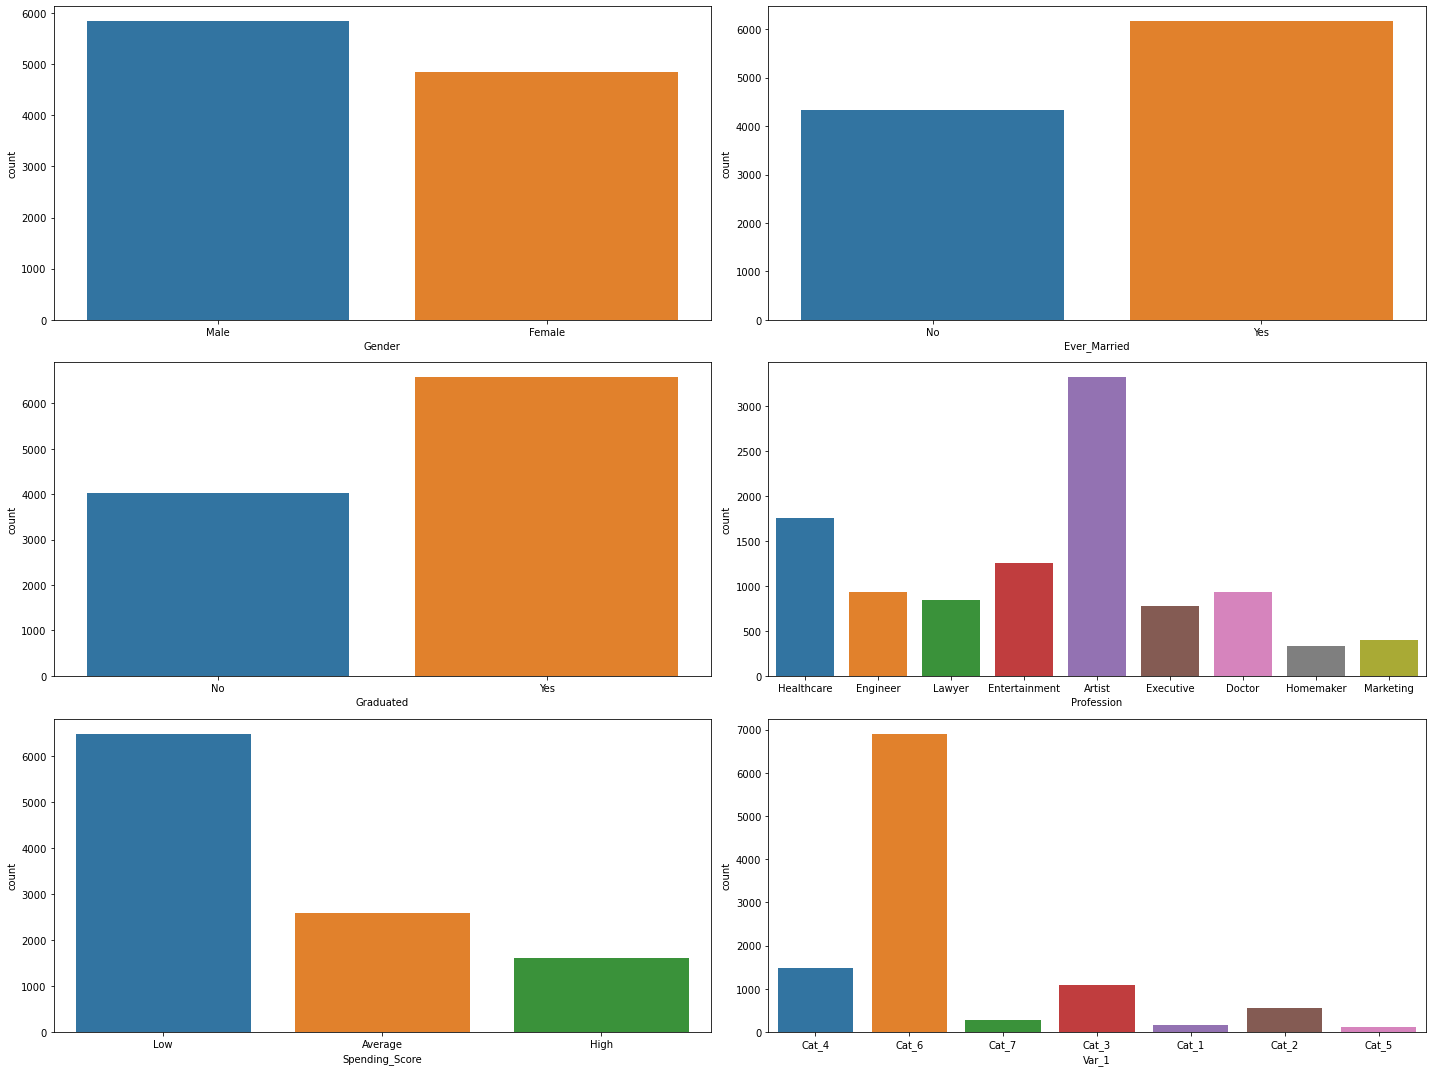

In [83]:
cols=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1']
a=3
b=2
c=1
for i in cols:
    plt.subplot(a,b,c)
    sns.countplot(combined.loc[:,i])
    c=c+1
plt.tight_layout()
plt.show()

# Inference
* More Males than Females followed by Graduation-Yes.
* Most of the people are Married and most Artist followed by Healthcare.
* Most of the people in the Data are Low Spenders.
* Highest freq of Var1 is Cat_6 followed by Cat_4, Cat_3 and Cat_2.

In [84]:
combined.select_dtypes(include=np.number).columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation'], dtype='object')

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

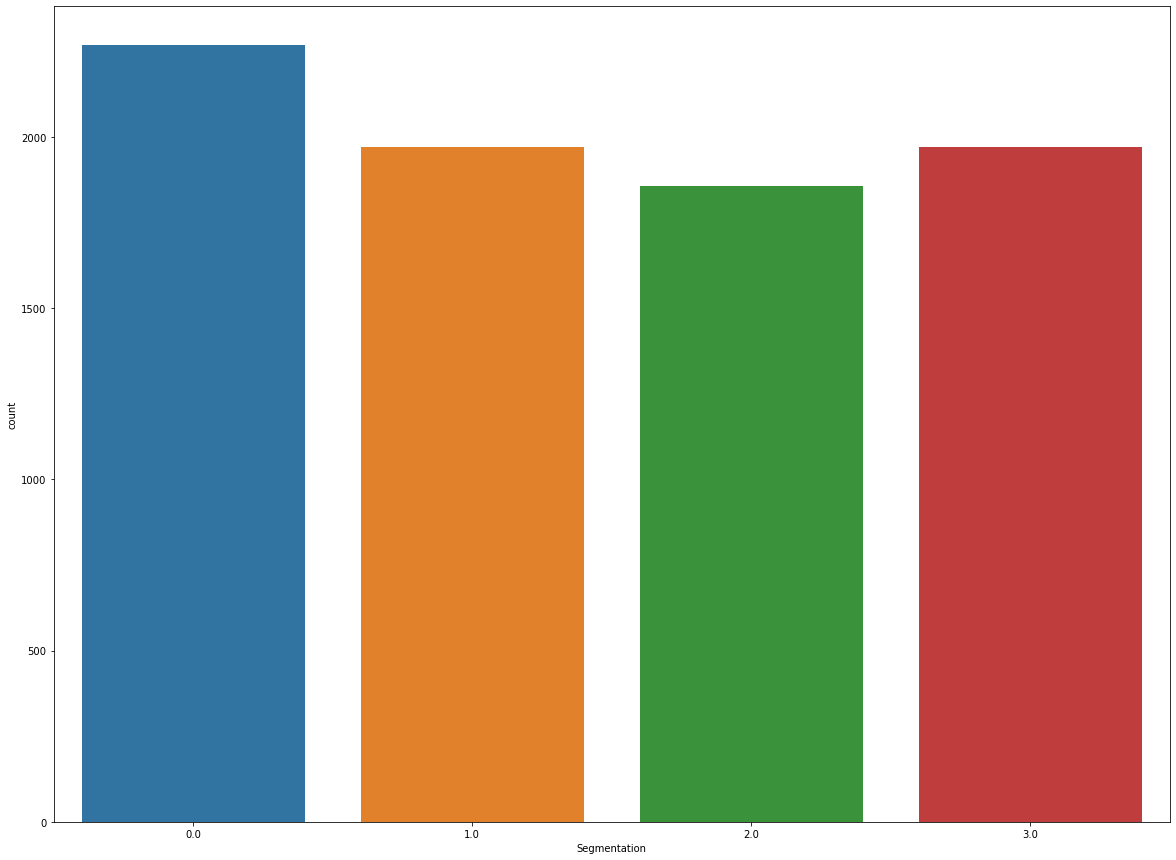

In [85]:
# Segmentation
sns.countplot(combined['Segmentation'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

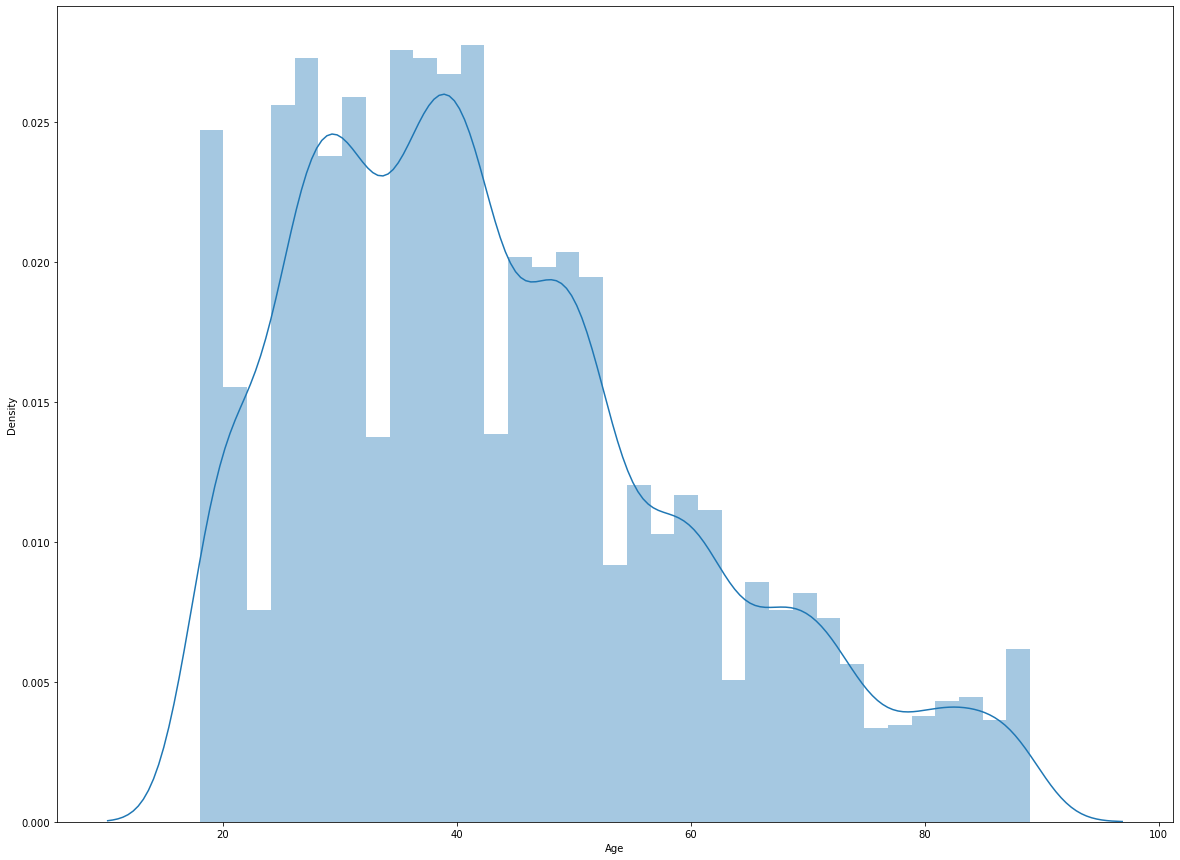

In [86]:
sns.distplot(combined.Age)

In [87]:
# Lets explore age basis spending score and segmentation
combined.groupby(['Spending_Score','Segmentation'])['Age'].describe()

count       mean        std   min   25%   50%  \
Spending_Score Segmentation                                                   
Average        0.0            138.0  37.746377  11.353035  18.0  30.0  36.0   
               1.0            343.0  42.157434  11.885602  20.0  35.0  40.0   
               2.0            590.0  46.866102  10.451637  25.0  38.0  46.0   
               3.0            903.0  50.053156  10.195182  22.0  42.0  50.0   
High           0.0            156.0  48.192308  20.404653  18.0  30.0  42.0   
               1.0            271.0  58.494465  20.482490  18.0  39.5  59.0   
               2.0            384.0  58.643229  16.154292  18.0  45.0  58.0   
               3.0            405.0  60.167901  14.733489  19.0  49.0  60.0   
Low            0.0           1974.0  31.915907  14.833252  18.0  22.0  28.0   
               1.0           1358.0  42.916053  15.138088  18.0  32.0  40.0   
               2.0            884.0  44.554299  14.597057  18.0  33.0  42.0   
               3.0            662.0  41.160121  14.793844  18.0  30.0  38.0   

                               75%   max  
Spending_Score Segmentation               
Average        0.0           41.75  72.0  
               1.0           48.50  89.0  
               2.0           53.00  74.0  
               3.0           57.00  88.0  
High           0.0           68.00  89.0  
               1.0           77.00  89.0  
               2.0           72.00  89.0  
               3.0           71.00  89.0  
Low            0.0           35.00  89.0  
               1.0           50.00  89.0  
               2.0           53.00  89.0  
               3.0           50.00  88.0

In [88]:
def agegroup(x):
    if x<25:
        return('')

In [89]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Ho: Age has no impact on Segmentation
# Ha: Age has an impact on Segmentation
# This means we have to explore and specify the age brackets for effective targeting
model=ols('Age~Segmentation',data=train).fit()
anova_lm(model)

df        sum_sq        mean_sq           F         PR(>F)
Segmentation     3.0  3.396070e+05  113202.343669  477.102025  2.188783e-285
Residual      8064.0  1.913351e+06     237.270726         NaN            NaN

In [90]:
# Age is significant for the target

In [91]:
# Lets deal with age
combined.loc[(combined.Age<=25)&(combined.Age>=18),'Age_category']=1
combined.loc[(combined.Age<=30)&(combined.Age>25),'Age_category']=2
combined.loc[(combined.Age<=40)&(combined.Age>=30),'Age_category']=3
combined.loc[(combined.Age<=50)&(combined.Age>=40),'Age_category']=4
combined.loc[(combined.Age>50),'Age_category']=5

In [92]:
combined.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1  Segmentation  Age_category  
0            Low          4.0  Cat_4           0.0           1.0  
1        Average          3.0  Cat_4           1.0           3.0  
2            Low          1.0  Cat_6           2.0           5.0  
3           High          2.0  Cat_6           2.0           5.0  
4           High          6.0  Cat_6           1.0           4.0

<AxesSubplot:xlabel='Age_category', ylabel='count'>

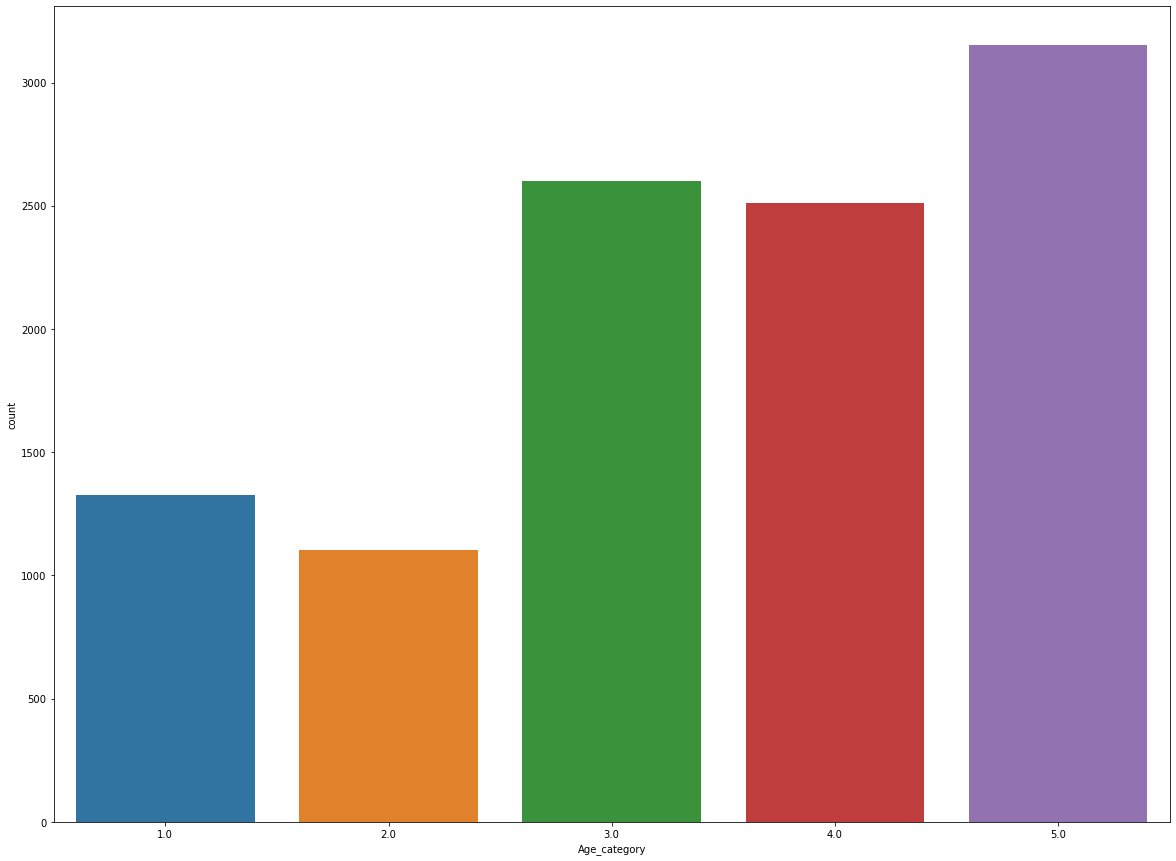

In [93]:
sns.countplot(combined.Age_category)

In [94]:
# Missing values
combined.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_category          0
dtype: int64

In [95]:
# Imputing unknown in the missing values
combined['Ever_Married']=combined.Ever_Married.fillna('unknown')
combined['Graduated']=combined.Graduated.fillna('unknown')
combined['Profession']=combined.Profession.fillna('unknown')
combined['Work_Experience']=combined.Work_Experience.fillna(-1)
combined['Family_Size']=combined.Family_Size.fillna(-1)
combined['Var_1']=combined.Var_1.fillna('unknown')

In [96]:
combined.Profession.value_counts().index

Index(['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
       'Executive', 'Marketing', 'Homemaker', 'unknown'],
      dtype='object')

In [97]:
combined['Gender']=combined.Gender.map({'Male':1,'Female':2})
combined['Ever_Married']=combined.Ever_Married.map({'No':1,'Yes':2,'unknown':3})
combined['Graduated']=combined.Graduated.map({'No':1,'Yes':2,'unknown':3})
combined['Spending_Score']=combined.Spending_Score.map({'Low':1,'Average':2,'High':3})
combined['Var_1']=combined.Var_1.map({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7,'unknown':8})
combined['Profession']=combined.Profession.map({'Artist':1, 'Healthcare':2, 'Entertainment':3, 'Engineer':4, 'Doctor':5,
                                                'Lawyer':6,'Executive':7, 'Marketing':8, 'Homemaker':9, 'unknown':10})

In [98]:
# Family category
combined.loc[combined.Family_Size<=2,'Family_Cat']=1
combined.loc[(combined.Family_Size>2)&(combined.Family_Size<=5),'Family_Cat']=2
combined.loc[combined.Family_Size>5,'Family_Cat']=3

In [99]:
combined.loc[combined.Work_Experience<=0,'Work_Cat']=0
combined.loc[combined.Work_Experience==1,'Work_Cat']=1
combined.loc[(combined.Work_Experience>=2)&(combined.Work_Experience<=5),'Work_Cat']=2
combined.loc[(combined.Work_Experience>5)&(combined.Work_Experience<=10),'Work_Cat']=3
combined.loc[combined.Work_Experience>10,'Work_Cat']=4

In [100]:
combined.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_category', 'Family_Cat', 'Work_Cat'],
      dtype='object')

In [101]:
temp=combined.groupby('Age').agg({'Spending_Score':['count','min','mean','max'],'Family_Cat':['count','min','max'],
                             'Work_Experience':['count','min','mean','max'],'Profession':['count','min','max'],
                                  'Var_1':['count','min','max']})

In [102]:
temp

Spending_Score                   Family_Cat           Work_Experience  \
             count min      mean max      count  min  max           count   
Age                                                                         
18             174   1  1.051724   3        174  1.0  3.0             174   
19             184   1  1.043478   3        184  1.0  3.0             184   
20             178   1  1.050562   3        178  1.0  3.0             178   
21             153   1  1.013072   3        153  1.0  3.0             153   
22             184   1  1.092391   3        184  1.0  3.0             184   
..             ...  ..       ...  ..        ...  ...  ...             ...   
85              32   1  1.781250   3         32  1.0  2.0              32   
86              47   1  1.957447   3         47  1.0  2.0              47   
87              44   1  1.977273   3         44  1.0  2.0              44   
88              44   1  2.000000   3         44  1.0  2.0              44   
89              46   1  2.195652   3         46  1.0  2.0              46   

                         Profession         Var_1          
     min      mean   max      count min max count min max  
Age                                                        
18  -1.0  1.902299  14.0        174   1  10   174   1   8  
19  -1.0  2.027174  13.0        184   1  10   184   1   8  
20  -1.0  1.724719  14.0        178   1  10   178   1   8  
21  -1.0  1.856209  13.0        153   1  10   153   1   8  
22  -1.0  1.820652  11.0        184   1  10   184   1   8  
..   ...       ...   ...        ...  ..  ..   ...  ..  ..  
85  -1.0  0.562500   5.0         32   1   9    32   2   8  
86  -1.0  0.829787  13.0         47   1   8    47   2   8  
87  -1.0  0.568182   9.0         44   1   7    44   2   8  
88  -1.0  0.590909   7.0         44   1  10    44   2   8  
89  -1.0  1.195652  13.0         46   1   8    46   2   6  

[67 rows x 17 columns]

In [103]:
temp.columns=['_'.join(x) for x in temp.columns]

In [104]:
new=pd.merge(left=combined,right=temp,on='Age',how='left')

In [105]:
# split the data in train and test
newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

In [106]:
newtrain.shape,newtest.shape

((8068, 31), (2627, 31))

In [107]:
x=newtrain.drop(['ID','Segmentation'],axis=1)
y=newtrain.Segmentation
newtest=newtest.drop(['ID','Segmentation'],axis=1)

In [108]:
del temp, combined

# Generating cluster labels

In [109]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=420)
x['clusters']=kmeans.fit_predict(x)

In [110]:
kmeans=KMeans(n_clusters=4,random_state=420)
newtest['clusters']=kmeans.fit_predict(newtest)

# Model buliding
* We will build all the models by splitting train data as website has some submission issues.
1. Split the train data in train and test
2. build loggistic regression, random forest model, gradient boosting followed by xgbboost model.
3. We will separately build LGBM & cat boost
4. We will see which models gets highest accuracy. we will use crossvalidation.We will use Cross Validation to build
   CV model where CV = 5
5. Stacking Classification Model

In [112]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=420,stratify=x['clusters'])

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [115]:
lg=LGBMClassifier(random_state=140)
rf=RandomForestClassifier(random_state=598,criterion='entropy')
gbm=GradientBoostingClassifier(random_state=150)
xgb=XGBClassifier(random_state=138)
lgbm=LGBMClassifier(random_state=438)
cboost=CatBoostClassifier(random_state=660)

In [116]:
from sklearn.metrics import accuracy_score
for model, name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost']):
    model.fit(xtrain,ytrain)
    print('{} model generates an accuracy score of {}'.format(name,accuracy_score(ytest,model.predict(xtest))))
    

lg model generates an accuracy score of 0.5198265179677819
rf model generates an accuracy score of 0.46592317224287483
gbm model generates an accuracy score of 0.5266418835192069
xgb model generates an accuracy score of 0.5037174721189591
lgbm model generates an accuracy score of 0.5198265179677819
Learning rate set to 0.087021
0:	learn: 1.3369357	total: 177ms	remaining: 2m 56s
1:	learn: 1.2996413	total: 188ms	remaining: 1m 33s
2:	learn: 1.2719065	total: 198ms	remaining: 1m 5s
3:	learn: 1.2454523	total: 208ms	remaining: 51.8s
4:	learn: 1.2245699	total: 217ms	remaining: 43.2s
5:	learn: 1.2039211	total: 226ms	remaining: 37.5s
6:	learn: 1.1873308	total: 235ms	remaining: 33.4s
7:	learn: 1.1739913	total: 243ms	remaining: 30.1s
8:	learn: 1.1609958	total: 250ms	remaining: 27.5s
9:	learn: 1.1491037	total: 257ms	remaining: 25.4s
10:	learn: 1.1383708	total: 263ms	remaining: 23.7s
11:	learn: 1.1300945	total: 269ms	remaining: 22.1s
12:	learn: 1.1208940	total: 274ms	remaining: 20.8s
13:	learn: 1.11

202:	learn: 0.9011027	total: 900ms	remaining: 3.53s
203:	learn: 0.9002633	total: 904ms	remaining: 3.53s
204:	learn: 0.8997098	total: 908ms	remaining: 3.52s
205:	learn: 0.8986964	total: 913ms	remaining: 3.52s
206:	learn: 0.8981887	total: 916ms	remaining: 3.51s
207:	learn: 0.8976389	total: 920ms	remaining: 3.5s
208:	learn: 0.8971545	total: 923ms	remaining: 3.49s
209:	learn: 0.8967433	total: 926ms	remaining: 3.48s
210:	learn: 0.8961486	total: 930ms	remaining: 3.48s
211:	learn: 0.8957443	total: 933ms	remaining: 3.47s
212:	learn: 0.8950935	total: 936ms	remaining: 3.46s
213:	learn: 0.8941828	total: 940ms	remaining: 3.45s
214:	learn: 0.8936927	total: 943ms	remaining: 3.44s
215:	learn: 0.8927105	total: 946ms	remaining: 3.43s
216:	learn: 0.8917816	total: 950ms	remaining: 3.43s
217:	learn: 0.8911561	total: 953ms	remaining: 3.42s
218:	learn: 0.8905228	total: 957ms	remaining: 3.41s
219:	learn: 0.8897726	total: 960ms	remaining: 3.4s
220:	learn: 0.8896091	total: 963ms	remaining: 3.39s
221:	learn: 0.

367:	learn: 0.8191793	total: 1.45s	remaining: 2.48s
368:	learn: 0.8188299	total: 1.45s	remaining: 2.48s
369:	learn: 0.8182516	total: 1.46s	remaining: 2.48s
370:	learn: 0.8178541	total: 1.46s	remaining: 2.47s
371:	learn: 0.8176101	total: 1.46s	remaining: 2.47s
372:	learn: 0.8173612	total: 1.47s	remaining: 2.46s
373:	learn: 0.8168687	total: 1.47s	remaining: 2.46s
374:	learn: 0.8161948	total: 1.47s	remaining: 2.46s
375:	learn: 0.8155469	total: 1.48s	remaining: 2.45s
376:	learn: 0.8152614	total: 1.48s	remaining: 2.45s
377:	learn: 0.8147708	total: 1.48s	remaining: 2.44s
378:	learn: 0.8142835	total: 1.49s	remaining: 2.44s
379:	learn: 0.8139910	total: 1.49s	remaining: 2.43s
380:	learn: 0.8137022	total: 1.5s	remaining: 2.43s
381:	learn: 0.8133582	total: 1.5s	remaining: 2.42s
382:	learn: 0.8129332	total: 1.5s	remaining: 2.42s
383:	learn: 0.8125709	total: 1.51s	remaining: 2.42s
384:	learn: 0.8122295	total: 1.51s	remaining: 2.41s
385:	learn: 0.8118720	total: 1.51s	remaining: 2.41s
386:	learn: 0.8

538:	learn: 0.7530476	total: 1.99s	remaining: 1.71s
539:	learn: 0.7526952	total: 2s	remaining: 1.7s
540:	learn: 0.7521869	total: 2s	remaining: 1.7s
541:	learn: 0.7519172	total: 2s	remaining: 1.69s
542:	learn: 0.7516227	total: 2.01s	remaining: 1.69s
543:	learn: 0.7513709	total: 2.01s	remaining: 1.69s
544:	learn: 0.7510789	total: 2.02s	remaining: 1.68s
545:	learn: 0.7507467	total: 2.02s	remaining: 1.68s
546:	learn: 0.7504403	total: 2.02s	remaining: 1.67s
547:	learn: 0.7500540	total: 2.02s	remaining: 1.67s
548:	learn: 0.7498307	total: 2.03s	remaining: 1.67s
549:	learn: 0.7496113	total: 2.03s	remaining: 1.66s
550:	learn: 0.7493226	total: 2.03s	remaining: 1.66s
551:	learn: 0.7490490	total: 2.04s	remaining: 1.65s
552:	learn: 0.7488805	total: 2.04s	remaining: 1.65s
553:	learn: 0.7484774	total: 2.04s	remaining: 1.64s
554:	learn: 0.7480598	total: 2.04s	remaining: 1.64s
555:	learn: 0.7477104	total: 2.05s	remaining: 1.64s
556:	learn: 0.7474633	total: 2.05s	remaining: 1.63s
557:	learn: 0.7470120	t

740:	learn: 0.6872903	total: 2.72s	remaining: 950ms
741:	learn: 0.6869894	total: 2.72s	remaining: 946ms
742:	learn: 0.6867634	total: 2.73s	remaining: 943ms
743:	learn: 0.6864859	total: 2.73s	remaining: 939ms
744:	learn: 0.6862342	total: 2.73s	remaining: 935ms
745:	learn: 0.6860212	total: 2.73s	remaining: 931ms
746:	learn: 0.6857569	total: 2.74s	remaining: 928ms
747:	learn: 0.6855254	total: 2.74s	remaining: 924ms
748:	learn: 0.6853192	total: 2.75s	remaining: 920ms
749:	learn: 0.6850274	total: 2.75s	remaining: 916ms
750:	learn: 0.6845575	total: 2.75s	remaining: 913ms
751:	learn: 0.6843976	total: 2.75s	remaining: 909ms
752:	learn: 0.6840419	total: 2.76s	remaining: 905ms
753:	learn: 0.6837679	total: 2.76s	remaining: 901ms
754:	learn: 0.6835857	total: 2.77s	remaining: 897ms
755:	learn: 0.6833132	total: 2.77s	remaining: 894ms
756:	learn: 0.6830549	total: 2.77s	remaining: 890ms
757:	learn: 0.6826293	total: 2.77s	remaining: 886ms
758:	learn: 0.6822705	total: 2.78s	remaining: 882ms
759:	learn: 

901:	learn: 0.6433995	total: 3.27s	remaining: 355ms
902:	learn: 0.6429709	total: 3.27s	remaining: 351ms
903:	learn: 0.6427105	total: 3.27s	remaining: 348ms
904:	learn: 0.6425979	total: 3.28s	remaining: 344ms
905:	learn: 0.6423693	total: 3.28s	remaining: 340ms
906:	learn: 0.6422120	total: 3.28s	remaining: 337ms
907:	learn: 0.6420227	total: 3.29s	remaining: 333ms
908:	learn: 0.6418756	total: 3.29s	remaining: 329ms
909:	learn: 0.6417371	total: 3.29s	remaining: 326ms
910:	learn: 0.6415309	total: 3.3s	remaining: 322ms
911:	learn: 0.6411133	total: 3.3s	remaining: 318ms
912:	learn: 0.6409235	total: 3.3s	remaining: 315ms
913:	learn: 0.6407631	total: 3.31s	remaining: 311ms
914:	learn: 0.6403347	total: 3.31s	remaining: 308ms
915:	learn: 0.6399992	total: 3.32s	remaining: 304ms
916:	learn: 0.6396732	total: 3.32s	remaining: 301ms
917:	learn: 0.6394189	total: 3.32s	remaining: 297ms
918:	learn: 0.6392440	total: 3.33s	remaining: 293ms
919:	learn: 0.6389309	total: 3.33s	remaining: 290ms
920:	learn: 0.6

In [117]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [118]:
smote_xsamp,smote_y=smote.fit_resample(x,y)

In [119]:
sxtrain,sxtest,sytrain,sytest=train_test_split(smote_xsamp,smote_y,test_size=0.20,random_state=420,
                                               stratify=smote_xsamp['clusters'])

In [120]:
for model, name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost'],):
    model.fit(xtrain,ytrain)
    print('{} model generates an accuracy score of {}'.format(name,accuracy_score(sytest,model.predict(sxtest))))

lg model generates an accuracy score of 0.6110192837465565
rf model generates an accuracy score of 0.7074380165289256
gbm model generates an accuracy score of 0.5564738292011019
xgb model generates an accuracy score of 0.6380165289256199
lgbm model generates an accuracy score of 0.6110192837465565
Learning rate set to 0.087021
0:	learn: 1.3369357	total: 4.8ms	remaining: 4.8s
1:	learn: 1.2996413	total: 8.84ms	remaining: 4.41s
2:	learn: 1.2719065	total: 12.8ms	remaining: 4.26s
3:	learn: 1.2454523	total: 16.7ms	remaining: 4.15s
4:	learn: 1.2245699	total: 20.6ms	remaining: 4.1s
5:	learn: 1.2039211	total: 24.6ms	remaining: 4.07s
6:	learn: 1.1873308	total: 28.4ms	remaining: 4.03s
7:	learn: 1.1739913	total: 32.2ms	remaining: 3.99s
8:	learn: 1.1609958	total: 36.1ms	remaining: 3.97s
9:	learn: 1.1491037	total: 39.6ms	remaining: 3.92s
10:	learn: 1.1383708	total: 42.8ms	remaining: 3.85s
11:	learn: 1.1300945	total: 46.2ms	remaining: 3.8s
12:	learn: 1.1208940	total: 50ms	remaining: 3.79s
13:	learn: 

209:	learn: 0.8967433	total: 685ms	remaining: 2.58s
210:	learn: 0.8961486	total: 688ms	remaining: 2.57s
211:	learn: 0.8957443	total: 691ms	remaining: 2.57s
212:	learn: 0.8950935	total: 695ms	remaining: 2.57s
213:	learn: 0.8941828	total: 699ms	remaining: 2.57s
214:	learn: 0.8936927	total: 703ms	remaining: 2.57s
215:	learn: 0.8927105	total: 707ms	remaining: 2.56s
216:	learn: 0.8917816	total: 710ms	remaining: 2.56s
217:	learn: 0.8911561	total: 713ms	remaining: 2.56s
218:	learn: 0.8905228	total: 716ms	remaining: 2.55s
219:	learn: 0.8897726	total: 719ms	remaining: 2.55s
220:	learn: 0.8896091	total: 722ms	remaining: 2.54s
221:	learn: 0.8892096	total: 725ms	remaining: 2.54s
222:	learn: 0.8884723	total: 728ms	remaining: 2.54s
223:	learn: 0.8881173	total: 731ms	remaining: 2.53s
224:	learn: 0.8873751	total: 734ms	remaining: 2.53s
225:	learn: 0.8869591	total: 737ms	remaining: 2.52s
226:	learn: 0.8865148	total: 739ms	remaining: 2.52s
227:	learn: 0.8856312	total: 742ms	remaining: 2.51s
228:	learn: 

387:	learn: 0.8110077	total: 1.23s	remaining: 1.94s
388:	learn: 0.8105424	total: 1.23s	remaining: 1.93s
389:	learn: 0.8102781	total: 1.23s	remaining: 1.93s
390:	learn: 0.8099912	total: 1.24s	remaining: 1.93s
391:	learn: 0.8095531	total: 1.24s	remaining: 1.93s
392:	learn: 0.8089349	total: 1.24s	remaining: 1.92s
393:	learn: 0.8086129	total: 1.25s	remaining: 1.92s
394:	learn: 0.8082503	total: 1.25s	remaining: 1.92s
395:	learn: 0.8080041	total: 1.25s	remaining: 1.91s
396:	learn: 0.8075750	total: 1.26s	remaining: 1.91s
397:	learn: 0.8073523	total: 1.26s	remaining: 1.91s
398:	learn: 0.8069302	total: 1.26s	remaining: 1.9s
399:	learn: 0.8064466	total: 1.27s	remaining: 1.9s
400:	learn: 0.8059990	total: 1.27s	remaining: 1.9s
401:	learn: 0.8054860	total: 1.27s	remaining: 1.89s
402:	learn: 0.8051901	total: 1.28s	remaining: 1.89s
403:	learn: 0.8048072	total: 1.28s	remaining: 1.89s
404:	learn: 0.8043378	total: 1.28s	remaining: 1.88s
405:	learn: 0.8037368	total: 1.28s	remaining: 1.88s
406:	learn: 0.8

563:	learn: 0.7445706	total: 1.77s	remaining: 1.37s
564:	learn: 0.7442260	total: 1.77s	remaining: 1.36s
565:	learn: 0.7434296	total: 1.78s	remaining: 1.36s
566:	learn: 0.7431738	total: 1.78s	remaining: 1.36s
567:	learn: 0.7429292	total: 1.78s	remaining: 1.36s
568:	learn: 0.7425849	total: 1.79s	remaining: 1.35s
569:	learn: 0.7423901	total: 1.79s	remaining: 1.35s
570:	learn: 0.7420028	total: 1.79s	remaining: 1.35s
571:	learn: 0.7416519	total: 1.8s	remaining: 1.34s
572:	learn: 0.7414829	total: 1.8s	remaining: 1.34s
573:	learn: 0.7411785	total: 1.8s	remaining: 1.34s
574:	learn: 0.7408192	total: 1.8s	remaining: 1.33s
575:	learn: 0.7405076	total: 1.81s	remaining: 1.33s
576:	learn: 0.7401408	total: 1.81s	remaining: 1.33s
577:	learn: 0.7398940	total: 1.81s	remaining: 1.32s
578:	learn: 0.7394034	total: 1.82s	remaining: 1.32s
579:	learn: 0.7390951	total: 1.82s	remaining: 1.32s
580:	learn: 0.7387763	total: 1.82s	remaining: 1.32s
581:	learn: 0.7382245	total: 1.83s	remaining: 1.31s
582:	learn: 0.73

731:	learn: 0.6900679	total: 2.31s	remaining: 845ms
732:	learn: 0.6896706	total: 2.31s	remaining: 843ms
733:	learn: 0.6892254	total: 2.32s	remaining: 840ms
734:	learn: 0.6889957	total: 2.32s	remaining: 837ms
735:	learn: 0.6887723	total: 2.32s	remaining: 834ms
736:	learn: 0.6884554	total: 2.33s	remaining: 831ms
737:	learn: 0.6881204	total: 2.33s	remaining: 828ms
738:	learn: 0.6876943	total: 2.34s	remaining: 825ms
739:	learn: 0.6875228	total: 2.34s	remaining: 822ms
740:	learn: 0.6872903	total: 2.34s	remaining: 819ms
741:	learn: 0.6869894	total: 2.35s	remaining: 816ms
742:	learn: 0.6867634	total: 2.35s	remaining: 813ms
743:	learn: 0.6864859	total: 2.35s	remaining: 809ms
744:	learn: 0.6862342	total: 2.35s	remaining: 806ms
745:	learn: 0.6860212	total: 2.36s	remaining: 803ms
746:	learn: 0.6857569	total: 2.36s	remaining: 800ms
747:	learn: 0.6855254	total: 2.36s	remaining: 797ms
748:	learn: 0.6853192	total: 2.37s	remaining: 794ms
749:	learn: 0.6850274	total: 2.37s	remaining: 790ms
750:	learn: 

908:	learn: 0.6418756	total: 2.87s	remaining: 287ms
909:	learn: 0.6417371	total: 2.87s	remaining: 284ms
910:	learn: 0.6415309	total: 2.87s	remaining: 280ms
911:	learn: 0.6411133	total: 2.87s	remaining: 277ms
912:	learn: 0.6409235	total: 2.88s	remaining: 274ms
913:	learn: 0.6407631	total: 2.88s	remaining: 271ms
914:	learn: 0.6403347	total: 2.88s	remaining: 268ms
915:	learn: 0.6399992	total: 2.89s	remaining: 265ms
916:	learn: 0.6396732	total: 2.89s	remaining: 262ms
917:	learn: 0.6394189	total: 2.9s	remaining: 259ms
918:	learn: 0.6392440	total: 2.9s	remaining: 255ms
919:	learn: 0.6389309	total: 2.9s	remaining: 252ms
920:	learn: 0.6387815	total: 2.9s	remaining: 249ms
921:	learn: 0.6385339	total: 2.91s	remaining: 246ms
922:	learn: 0.6383661	total: 2.91s	remaining: 243ms
923:	learn: 0.6380282	total: 2.91s	remaining: 240ms
924:	learn: 0.6377956	total: 2.92s	remaining: 236ms
925:	learn: 0.6375495	total: 2.92s	remaining: 233ms
926:	learn: 0.6372261	total: 2.92s	remaining: 230ms
927:	learn: 0.63

In [122]:
from sklearn.ensemble import StackingClassifier
level0=[('xgb',xgb),('gbm',gbm),('cboost',cboost)]
level1=lgbm
stack=StackingClassifier(estimators=level0,final_estimator=level1,cv=5)
pred_stack=stack.fit(sxtrain,sytrain).predict(xtest)
print('{} model generates an accuracy score of {}'.format(name,accuracy_score(ytest,pred_stack)))

Learning rate set to 0.087543
0:	learn: 1.3396572	total: 8.04ms	remaining: 8.03s
1:	learn: 1.3031753	total: 13.9ms	remaining: 6.95s
2:	learn: 1.2745580	total: 20.2ms	remaining: 6.72s
3:	learn: 1.2503355	total: 25.7ms	remaining: 6.39s
4:	learn: 1.2297730	total: 31.2ms	remaining: 6.2s
5:	learn: 1.2099288	total: 36.5ms	remaining: 6.04s
6:	learn: 1.1935480	total: 42ms	remaining: 5.96s
7:	learn: 1.1781608	total: 47.7ms	remaining: 5.91s
8:	learn: 1.1654436	total: 53.1ms	remaining: 5.84s
9:	learn: 1.1550657	total: 58.1ms	remaining: 5.75s
10:	learn: 1.1448193	total: 63.3ms	remaining: 5.69s
11:	learn: 1.1351402	total: 68.8ms	remaining: 5.67s
12:	learn: 1.1270284	total: 73.9ms	remaining: 5.61s
13:	learn: 1.1211639	total: 78.8ms	remaining: 5.55s
14:	learn: 1.1150671	total: 84.6ms	remaining: 5.56s
15:	learn: 1.1093679	total: 89.8ms	remaining: 5.52s
16:	learn: 1.1045754	total: 94.9ms	remaining: 5.49s
17:	learn: 1.0994511	total: 100ms	remaining: 5.46s
18:	learn: 1.0958787	total: 105ms	remaining: 5.4

190:	learn: 0.9116830	total: 927ms	remaining: 3.93s
191:	learn: 0.9109119	total: 933ms	remaining: 3.92s
192:	learn: 0.9101786	total: 938ms	remaining: 3.92s
193:	learn: 0.9094411	total: 944ms	remaining: 3.92s
194:	learn: 0.9087952	total: 949ms	remaining: 3.92s
195:	learn: 0.9081523	total: 954ms	remaining: 3.91s
196:	learn: 0.9076274	total: 958ms	remaining: 3.9s
197:	learn: 0.9068812	total: 963ms	remaining: 3.9s
198:	learn: 0.9064100	total: 968ms	remaining: 3.9s
199:	learn: 0.9057236	total: 972ms	remaining: 3.89s
200:	learn: 0.9049393	total: 977ms	remaining: 3.88s
201:	learn: 0.9043171	total: 981ms	remaining: 3.88s
202:	learn: 0.9036630	total: 986ms	remaining: 3.87s
203:	learn: 0.9030530	total: 991ms	remaining: 3.87s
204:	learn: 0.9026331	total: 996ms	remaining: 3.86s
205:	learn: 0.9020399	total: 1s	remaining: 3.85s
206:	learn: 0.9014639	total: 1s	remaining: 3.85s
207:	learn: 0.9008773	total: 1.01s	remaining: 3.85s
208:	learn: 0.9001714	total: 1.01s	remaining: 3.84s
209:	learn: 0.8998621

382:	learn: 0.8128499	total: 1.87s	remaining: 3.01s
383:	learn: 0.8124075	total: 1.88s	remaining: 3.01s
384:	learn: 0.8118381	total: 1.88s	remaining: 3s
385:	learn: 0.8109021	total: 1.89s	remaining: 3s
386:	learn: 0.8103701	total: 1.89s	remaining: 3s
387:	learn: 0.8097170	total: 1.9s	remaining: 2.99s
388:	learn: 0.8093307	total: 1.9s	remaining: 2.99s
389:	learn: 0.8090441	total: 1.91s	remaining: 2.98s
390:	learn: 0.8087011	total: 1.91s	remaining: 2.98s
391:	learn: 0.8082393	total: 1.92s	remaining: 2.97s
392:	learn: 0.8078481	total: 1.92s	remaining: 2.96s
393:	learn: 0.8076605	total: 1.92s	remaining: 2.96s
394:	learn: 0.8068645	total: 1.93s	remaining: 2.96s
395:	learn: 0.8063786	total: 1.93s	remaining: 2.95s
396:	learn: 0.8061409	total: 1.94s	remaining: 2.94s
397:	learn: 0.8054938	total: 1.94s	remaining: 2.94s
398:	learn: 0.8048509	total: 1.96s	remaining: 2.95s
399:	learn: 0.8043829	total: 1.97s	remaining: 2.95s
400:	learn: 0.8040305	total: 1.97s	remaining: 2.94s
401:	learn: 0.8035751	t

571:	learn: 0.7377875	total: 2.79s	remaining: 2.09s
572:	learn: 0.7373369	total: 2.79s	remaining: 2.08s
573:	learn: 0.7369363	total: 2.8s	remaining: 2.08s
574:	learn: 0.7367190	total: 2.8s	remaining: 2.07s
575:	learn: 0.7365234	total: 2.81s	remaining: 2.07s
576:	learn: 0.7359953	total: 2.81s	remaining: 2.06s
577:	learn: 0.7356555	total: 2.82s	remaining: 2.06s
578:	learn: 0.7354093	total: 2.82s	remaining: 2.05s
579:	learn: 0.7351466	total: 2.83s	remaining: 2.05s
580:	learn: 0.7346993	total: 2.83s	remaining: 2.04s
581:	learn: 0.7345932	total: 2.84s	remaining: 2.04s
582:	learn: 0.7342703	total: 2.84s	remaining: 2.03s
583:	learn: 0.7340653	total: 2.85s	remaining: 2.03s
584:	learn: 0.7339435	total: 2.85s	remaining: 2.02s
585:	learn: 0.7333898	total: 2.85s	remaining: 2.02s
586:	learn: 0.7331808	total: 2.86s	remaining: 2.01s
587:	learn: 0.7327832	total: 2.87s	remaining: 2.01s
588:	learn: 0.7324848	total: 2.87s	remaining: 2s
589:	learn: 0.7323229	total: 2.87s	remaining: 2s
590:	learn: 0.731946

759:	learn: 0.6778414	total: 3.71s	remaining: 1.17s
760:	learn: 0.6773832	total: 3.72s	remaining: 1.17s
761:	learn: 0.6767925	total: 3.73s	remaining: 1.16s
762:	learn: 0.6765386	total: 3.73s	remaining: 1.16s
763:	learn: 0.6763673	total: 3.73s	remaining: 1.15s
764:	learn: 0.6761432	total: 3.74s	remaining: 1.15s
765:	learn: 0.6756555	total: 3.75s	remaining: 1.14s
766:	learn: 0.6753623	total: 3.75s	remaining: 1.14s
767:	learn: 0.6751583	total: 3.75s	remaining: 1.13s
768:	learn: 0.6746783	total: 3.76s	remaining: 1.13s
769:	learn: 0.6743569	total: 3.77s	remaining: 1.12s
770:	learn: 0.6741365	total: 3.77s	remaining: 1.12s
771:	learn: 0.6736561	total: 3.77s	remaining: 1.11s
772:	learn: 0.6731095	total: 3.78s	remaining: 1.11s
773:	learn: 0.6728339	total: 3.79s	remaining: 1.1s
774:	learn: 0.6723659	total: 3.79s	remaining: 1.1s
775:	learn: 0.6721021	total: 3.79s	remaining: 1.09s
776:	learn: 0.6719492	total: 3.8s	remaining: 1.09s
777:	learn: 0.6717143	total: 3.8s	remaining: 1.08s
778:	learn: 0.67

943:	learn: 0.6284141	total: 4.62s	remaining: 274ms
944:	learn: 0.6282676	total: 4.62s	remaining: 269ms
945:	learn: 0.6280328	total: 4.63s	remaining: 264ms
946:	learn: 0.6279416	total: 4.63s	remaining: 259ms
947:	learn: 0.6276072	total: 4.64s	remaining: 255ms
948:	learn: 0.6274544	total: 4.64s	remaining: 250ms
949:	learn: 0.6271360	total: 4.65s	remaining: 245ms
950:	learn: 0.6269193	total: 4.65s	remaining: 240ms
951:	learn: 0.6268042	total: 4.66s	remaining: 235ms
952:	learn: 0.6265712	total: 4.66s	remaining: 230ms
953:	learn: 0.6263155	total: 4.67s	remaining: 225ms
954:	learn: 0.6260962	total: 4.67s	remaining: 220ms
955:	learn: 0.6259704	total: 4.68s	remaining: 215ms
956:	learn: 0.6258317	total: 4.68s	remaining: 210ms
957:	learn: 0.6256351	total: 4.69s	remaining: 205ms
958:	learn: 0.6252368	total: 4.69s	remaining: 201ms
959:	learn: 0.6250328	total: 4.7s	remaining: 196ms
960:	learn: 0.6248935	total: 4.7s	remaining: 191ms
961:	learn: 0.6245031	total: 4.7s	remaining: 186ms
962:	learn: 0.6

125:	learn: 0.9434911	total: 573ms	remaining: 3.98s
126:	learn: 0.9431382	total: 578ms	remaining: 3.97s
127:	learn: 0.9423794	total: 583ms	remaining: 3.97s
128:	learn: 0.9417498	total: 588ms	remaining: 3.97s
129:	learn: 0.9407533	total: 593ms	remaining: 3.97s
130:	learn: 0.9400001	total: 597ms	remaining: 3.96s
131:	learn: 0.9390551	total: 601ms	remaining: 3.95s
132:	learn: 0.9384662	total: 606ms	remaining: 3.95s
133:	learn: 0.9375217	total: 610ms	remaining: 3.94s
134:	learn: 0.9365286	total: 615ms	remaining: 3.94s
135:	learn: 0.9358941	total: 619ms	remaining: 3.93s
136:	learn: 0.9342280	total: 623ms	remaining: 3.92s
137:	learn: 0.9329951	total: 628ms	remaining: 3.92s
138:	learn: 0.9316507	total: 632ms	remaining: 3.91s
139:	learn: 0.9306922	total: 637ms	remaining: 3.91s
140:	learn: 0.9298984	total: 641ms	remaining: 3.91s
141:	learn: 0.9290613	total: 646ms	remaining: 3.9s
142:	learn: 0.9277186	total: 650ms	remaining: 3.9s
143:	learn: 0.9264094	total: 654ms	remaining: 3.89s
144:	learn: 0.

317:	learn: 0.8147789	total: 1.48s	remaining: 3.17s
318:	learn: 0.8145129	total: 1.48s	remaining: 3.16s
319:	learn: 0.8141749	total: 1.49s	remaining: 3.16s
320:	learn: 0.8139006	total: 1.49s	remaining: 3.16s
321:	learn: 0.8133286	total: 1.5s	remaining: 3.15s
322:	learn: 0.8127181	total: 1.5s	remaining: 3.15s
323:	learn: 0.8120414	total: 1.51s	remaining: 3.14s
324:	learn: 0.8117379	total: 1.51s	remaining: 3.14s
325:	learn: 0.8114484	total: 1.51s	remaining: 3.13s
326:	learn: 0.8107025	total: 1.52s	remaining: 3.13s
327:	learn: 0.8101481	total: 1.52s	remaining: 3.12s
328:	learn: 0.8098981	total: 1.53s	remaining: 3.12s
329:	learn: 0.8097157	total: 1.53s	remaining: 3.11s
330:	learn: 0.8093073	total: 1.54s	remaining: 3.11s
331:	learn: 0.8088365	total: 1.54s	remaining: 3.1s
332:	learn: 0.8080361	total: 1.55s	remaining: 3.1s
333:	learn: 0.8071615	total: 1.55s	remaining: 3.09s
334:	learn: 0.8069317	total: 1.56s	remaining: 3.09s
335:	learn: 0.8063902	total: 1.56s	remaining: 3.08s
336:	learn: 0.80

478:	learn: 0.7392002	total: 2.22s	remaining: 2.42s
479:	learn: 0.7388183	total: 2.23s	remaining: 2.41s
480:	learn: 0.7382351	total: 2.23s	remaining: 2.41s
481:	learn: 0.7377783	total: 2.24s	remaining: 2.4s
482:	learn: 0.7373811	total: 2.24s	remaining: 2.4s
483:	learn: 0.7369750	total: 2.25s	remaining: 2.39s
484:	learn: 0.7364910	total: 2.25s	remaining: 2.39s
485:	learn: 0.7360768	total: 2.26s	remaining: 2.39s
486:	learn: 0.7356669	total: 2.26s	remaining: 2.38s
487:	learn: 0.7351519	total: 2.27s	remaining: 2.38s
488:	learn: 0.7346202	total: 2.27s	remaining: 2.37s
489:	learn: 0.7341455	total: 2.28s	remaining: 2.37s
490:	learn: 0.7336834	total: 2.28s	remaining: 2.36s
491:	learn: 0.7334022	total: 2.29s	remaining: 2.36s
492:	learn: 0.7328986	total: 2.29s	remaining: 2.35s
493:	learn: 0.7321400	total: 2.29s	remaining: 2.35s
494:	learn: 0.7317600	total: 2.3s	remaining: 2.35s
495:	learn: 0.7314631	total: 2.3s	remaining: 2.34s
496:	learn: 0.7309774	total: 2.31s	remaining: 2.34s
497:	learn: 0.73

667:	learn: 0.6680666	total: 3.11s	remaining: 1.55s
668:	learn: 0.6678151	total: 3.12s	remaining: 1.54s
669:	learn: 0.6674583	total: 3.12s	remaining: 1.54s
670:	learn: 0.6670233	total: 3.13s	remaining: 1.53s
671:	learn: 0.6668180	total: 3.13s	remaining: 1.53s
672:	learn: 0.6666011	total: 3.14s	remaining: 1.52s
673:	learn: 0.6662848	total: 3.14s	remaining: 1.52s
674:	learn: 0.6659150	total: 3.15s	remaining: 1.51s
675:	learn: 0.6654515	total: 3.15s	remaining: 1.51s
676:	learn: 0.6651634	total: 3.16s	remaining: 1.51s
677:	learn: 0.6650271	total: 3.16s	remaining: 1.5s
678:	learn: 0.6647369	total: 3.17s	remaining: 1.5s
679:	learn: 0.6643109	total: 3.17s	remaining: 1.49s
680:	learn: 0.6640937	total: 3.17s	remaining: 1.49s
681:	learn: 0.6636060	total: 3.18s	remaining: 1.48s
682:	learn: 0.6632475	total: 3.18s	remaining: 1.48s
683:	learn: 0.6630547	total: 3.19s	remaining: 1.47s
684:	learn: 0.6626368	total: 3.19s	remaining: 1.47s
685:	learn: 0.6622478	total: 3.2s	remaining: 1.46s
686:	learn: 0.6

846:	learn: 0.6148827	total: 4.02s	remaining: 726ms
847:	learn: 0.6144706	total: 4.02s	remaining: 721ms
848:	learn: 0.6142644	total: 4.03s	remaining: 717ms
849:	learn: 0.6140698	total: 4.03s	remaining: 712ms
850:	learn: 0.6139106	total: 4.04s	remaining: 707ms
851:	learn: 0.6136009	total: 4.04s	remaining: 703ms
852:	learn: 0.6133684	total: 4.05s	remaining: 698ms
853:	learn: 0.6131557	total: 4.05s	remaining: 693ms
854:	learn: 0.6130284	total: 4.06s	remaining: 688ms
855:	learn: 0.6125486	total: 4.06s	remaining: 683ms
856:	learn: 0.6120426	total: 4.07s	remaining: 679ms
857:	learn: 0.6117845	total: 4.07s	remaining: 674ms
858:	learn: 0.6114232	total: 4.08s	remaining: 669ms
859:	learn: 0.6111600	total: 4.08s	remaining: 664ms
860:	learn: 0.6109368	total: 4.08s	remaining: 659ms
861:	learn: 0.6104992	total: 4.09s	remaining: 655ms
862:	learn: 0.6102051	total: 4.09s	remaining: 650ms
863:	learn: 0.6100725	total: 4.1s	remaining: 645ms
864:	learn: 0.6096797	total: 4.1s	remaining: 640ms
865:	learn: 0.

33:	learn: 1.0567871	total: 195ms	remaining: 5.53s
34:	learn: 1.0549198	total: 199ms	remaining: 5.49s
35:	learn: 1.0517825	total: 204ms	remaining: 5.47s
36:	learn: 1.0488585	total: 211ms	remaining: 5.48s
37:	learn: 1.0460542	total: 217ms	remaining: 5.5s
38:	learn: 1.0441688	total: 222ms	remaining: 5.48s
39:	learn: 1.0423292	total: 227ms	remaining: 5.46s
40:	learn: 1.0411742	total: 232ms	remaining: 5.43s
41:	learn: 1.0398158	total: 237ms	remaining: 5.41s
42:	learn: 1.0381151	total: 243ms	remaining: 5.4s
43:	learn: 1.0360783	total: 247ms	remaining: 5.37s
44:	learn: 1.0342057	total: 252ms	remaining: 5.34s
45:	learn: 1.0332961	total: 256ms	remaining: 5.32s
46:	learn: 1.0310033	total: 261ms	remaining: 5.29s
47:	learn: 1.0285254	total: 266ms	remaining: 5.27s
48:	learn: 1.0274357	total: 270ms	remaining: 5.25s
49:	learn: 1.0262605	total: 276ms	remaining: 5.24s
50:	learn: 1.0249277	total: 281ms	remaining: 5.23s
51:	learn: 1.0233472	total: 285ms	remaining: 5.2s
52:	learn: 1.0219219	total: 290ms	

218:	learn: 0.8800992	total: 1.1s	remaining: 3.94s
219:	learn: 0.8790895	total: 1.11s	remaining: 3.93s
220:	learn: 0.8781794	total: 1.11s	remaining: 3.93s
221:	learn: 0.8774792	total: 1.12s	remaining: 3.92s
222:	learn: 0.8767905	total: 1.12s	remaining: 3.91s
223:	learn: 0.8759770	total: 1.13s	remaining: 3.91s
224:	learn: 0.8756291	total: 1.13s	remaining: 3.9s
225:	learn: 0.8752652	total: 1.14s	remaining: 3.9s
226:	learn: 0.8744580	total: 1.14s	remaining: 3.89s
227:	learn: 0.8736100	total: 1.15s	remaining: 3.89s
228:	learn: 0.8726782	total: 1.15s	remaining: 3.88s
229:	learn: 0.8720504	total: 1.16s	remaining: 3.88s
230:	learn: 0.8713065	total: 1.17s	remaining: 3.88s
231:	learn: 0.8710058	total: 1.17s	remaining: 3.88s
232:	learn: 0.8699789	total: 1.18s	remaining: 3.88s
233:	learn: 0.8694478	total: 1.18s	remaining: 3.88s
234:	learn: 0.8690153	total: 1.19s	remaining: 3.87s
235:	learn: 0.8684372	total: 1.2s	remaining: 3.87s
236:	learn: 0.8680675	total: 1.2s	remaining: 3.86s
237:	learn: 0.867

393:	learn: 0.7874863	total: 2.03s	remaining: 3.12s
394:	learn: 0.7864243	total: 2.03s	remaining: 3.11s
395:	learn: 0.7855782	total: 2.04s	remaining: 3.11s
396:	learn: 0.7848538	total: 2.04s	remaining: 3.1s
397:	learn: 0.7843412	total: 2.05s	remaining: 3.1s
398:	learn: 0.7838685	total: 2.06s	remaining: 3.1s
399:	learn: 0.7832761	total: 2.06s	remaining: 3.09s
400:	learn: 0.7828425	total: 2.06s	remaining: 3.08s
401:	learn: 0.7825221	total: 2.07s	remaining: 3.08s
402:	learn: 0.7820530	total: 2.07s	remaining: 3.07s
403:	learn: 0.7814469	total: 2.08s	remaining: 3.07s
404:	learn: 0.7809339	total: 2.08s	remaining: 3.06s
405:	learn: 0.7807082	total: 2.09s	remaining: 3.06s
406:	learn: 0.7800770	total: 2.1s	remaining: 3.05s
407:	learn: 0.7798676	total: 2.1s	remaining: 3.05s
408:	learn: 0.7792341	total: 2.11s	remaining: 3.04s
409:	learn: 0.7789444	total: 2.11s	remaining: 3.04s
410:	learn: 0.7781951	total: 2.12s	remaining: 3.03s
411:	learn: 0.7779823	total: 2.12s	remaining: 3.03s
412:	learn: 0.777

584:	learn: 0.7066894	total: 2.93s	remaining: 2.08s
585:	learn: 0.7064404	total: 2.94s	remaining: 2.08s
586:	learn: 0.7058302	total: 2.94s	remaining: 2.07s
587:	learn: 0.7054665	total: 2.95s	remaining: 2.07s
588:	learn: 0.7051852	total: 2.95s	remaining: 2.06s
589:	learn: 0.7049308	total: 2.96s	remaining: 2.06s
590:	learn: 0.7043246	total: 2.96s	remaining: 2.05s
591:	learn: 0.7040774	total: 2.97s	remaining: 2.04s
592:	learn: 0.7037503	total: 2.97s	remaining: 2.04s
593:	learn: 0.7034078	total: 2.98s	remaining: 2.03s
594:	learn: 0.7030801	total: 2.98s	remaining: 2.03s
595:	learn: 0.7029237	total: 2.98s	remaining: 2.02s
596:	learn: 0.7025412	total: 2.99s	remaining: 2.02s
597:	learn: 0.7022698	total: 2.99s	remaining: 2.01s
598:	learn: 0.7020461	total: 3s	remaining: 2.01s
599:	learn: 0.7017753	total: 3s	remaining: 2s
600:	learn: 0.7014773	total: 3.01s	remaining: 2s
601:	learn: 0.7011294	total: 3.01s	remaining: 1.99s
602:	learn: 0.7005985	total: 3.02s	remaining: 1.99s
603:	learn: 0.7001856	to

767:	learn: 0.6452477	total: 3.84s	remaining: 1.16s
768:	learn: 0.6450528	total: 3.85s	remaining: 1.16s
769:	learn: 0.6448465	total: 3.85s	remaining: 1.15s
770:	learn: 0.6445693	total: 3.86s	remaining: 1.15s
771:	learn: 0.6442613	total: 3.87s	remaining: 1.14s
772:	learn: 0.6437986	total: 3.88s	remaining: 1.14s
773:	learn: 0.6435745	total: 3.88s	remaining: 1.13s
774:	learn: 0.6432192	total: 3.89s	remaining: 1.13s
775:	learn: 0.6429876	total: 3.9s	remaining: 1.13s
776:	learn: 0.6427492	total: 3.9s	remaining: 1.12s
777:	learn: 0.6425604	total: 3.91s	remaining: 1.11s
778:	learn: 0.6420340	total: 3.92s	remaining: 1.11s
779:	learn: 0.6413887	total: 3.92s	remaining: 1.11s
780:	learn: 0.6410516	total: 3.93s	remaining: 1.1s
781:	learn: 0.6407496	total: 3.94s	remaining: 1.1s
782:	learn: 0.6405112	total: 3.94s	remaining: 1.09s
783:	learn: 0.6403304	total: 3.95s	remaining: 1.09s
784:	learn: 0.6400642	total: 3.96s	remaining: 1.08s
785:	learn: 0.6395843	total: 3.96s	remaining: 1.08s
786:	learn: 0.63

946:	learn: 0.5922156	total: 4.96s	remaining: 277ms
947:	learn: 0.5919725	total: 4.96s	remaining: 272ms
948:	learn: 0.5916739	total: 4.98s	remaining: 268ms
949:	learn: 0.5915415	total: 4.99s	remaining: 262ms
950:	learn: 0.5913088	total: 4.99s	remaining: 257ms
951:	learn: 0.5911161	total: 5s	remaining: 252ms
952:	learn: 0.5909155	total: 5s	remaining: 247ms
953:	learn: 0.5904711	total: 5.01s	remaining: 242ms
954:	learn: 0.5903388	total: 5.01s	remaining: 236ms
955:	learn: 0.5900407	total: 5.02s	remaining: 231ms
956:	learn: 0.5898000	total: 5.03s	remaining: 226ms
957:	learn: 0.5896342	total: 5.03s	remaining: 221ms
958:	learn: 0.5893396	total: 5.04s	remaining: 215ms
959:	learn: 0.5891149	total: 5.04s	remaining: 210ms
960:	learn: 0.5887857	total: 5.05s	remaining: 205ms
961:	learn: 0.5884361	total: 5.05s	remaining: 200ms
962:	learn: 0.5881528	total: 5.06s	remaining: 194ms
963:	learn: 0.5876790	total: 5.07s	remaining: 189ms
964:	learn: 0.5874701	total: 5.07s	remaining: 184ms
965:	learn: 0.5873

107:	learn: 0.9579197	total: 718ms	remaining: 5.93s
108:	learn: 0.9572660	total: 724ms	remaining: 5.92s
109:	learn: 0.9566170	total: 730ms	remaining: 5.91s
110:	learn: 0.9558117	total: 737ms	remaining: 5.9s
111:	learn: 0.9550240	total: 742ms	remaining: 5.88s
112:	learn: 0.9543673	total: 748ms	remaining: 5.87s
113:	learn: 0.9534238	total: 754ms	remaining: 5.86s
114:	learn: 0.9525168	total: 759ms	remaining: 5.84s
115:	learn: 0.9516854	total: 764ms	remaining: 5.82s
116:	learn: 0.9510725	total: 771ms	remaining: 5.82s
117:	learn: 0.9504514	total: 776ms	remaining: 5.8s
118:	learn: 0.9491152	total: 782ms	remaining: 5.79s
119:	learn: 0.9483752	total: 788ms	remaining: 5.78s
120:	learn: 0.9473493	total: 794ms	remaining: 5.77s
121:	learn: 0.9467114	total: 800ms	remaining: 5.76s
122:	learn: 0.9458099	total: 806ms	remaining: 5.75s
123:	learn: 0.9446512	total: 813ms	remaining: 5.74s
124:	learn: 0.9436643	total: 819ms	remaining: 5.73s
125:	learn: 0.9427173	total: 824ms	remaining: 5.72s
126:	learn: 0.

285:	learn: 0.8319214	total: 1.81s	remaining: 4.51s
286:	learn: 0.8312535	total: 1.81s	remaining: 4.51s
287:	learn: 0.8308082	total: 1.82s	remaining: 4.5s
288:	learn: 0.8301618	total: 1.83s	remaining: 4.5s
289:	learn: 0.8294508	total: 1.83s	remaining: 4.49s
290:	learn: 0.8291360	total: 1.84s	remaining: 4.48s
291:	learn: 0.8287202	total: 1.85s	remaining: 4.48s
292:	learn: 0.8282916	total: 1.85s	remaining: 4.47s
293:	learn: 0.8276731	total: 1.86s	remaining: 4.46s
294:	learn: 0.8269906	total: 1.86s	remaining: 4.45s
295:	learn: 0.8266121	total: 1.87s	remaining: 4.45s
296:	learn: 0.8257782	total: 1.88s	remaining: 4.44s
297:	learn: 0.8253727	total: 1.88s	remaining: 4.43s
298:	learn: 0.8246076	total: 1.89s	remaining: 4.43s
299:	learn: 0.8239411	total: 1.89s	remaining: 4.42s
300:	learn: 0.8233947	total: 1.9s	remaining: 4.41s
301:	learn: 0.8228013	total: 1.91s	remaining: 4.41s
302:	learn: 0.8220990	total: 1.91s	remaining: 4.4s
303:	learn: 0.8215954	total: 1.92s	remaining: 4.39s
304:	learn: 0.82

445:	learn: 0.7516269	total: 2.91s	remaining: 3.61s
446:	learn: 0.7510326	total: 2.91s	remaining: 3.6s
447:	learn: 0.7506917	total: 2.92s	remaining: 3.6s
448:	learn: 0.7503320	total: 2.93s	remaining: 3.59s
449:	learn: 0.7498191	total: 2.93s	remaining: 3.59s
450:	learn: 0.7494209	total: 2.94s	remaining: 3.58s
451:	learn: 0.7491469	total: 2.95s	remaining: 3.58s
452:	learn: 0.7489012	total: 2.95s	remaining: 3.57s
453:	learn: 0.7487227	total: 2.96s	remaining: 3.56s
454:	learn: 0.7482960	total: 2.97s	remaining: 3.56s
455:	learn: 0.7479503	total: 2.98s	remaining: 3.55s
456:	learn: 0.7476978	total: 2.98s	remaining: 3.54s
457:	learn: 0.7469480	total: 2.99s	remaining: 3.54s
458:	learn: 0.7463684	total: 3s	remaining: 3.53s
459:	learn: 0.7456026	total: 3s	remaining: 3.52s
460:	learn: 0.7452546	total: 3.01s	remaining: 3.52s
461:	learn: 0.7449052	total: 3.02s	remaining: 3.51s
462:	learn: 0.7443935	total: 3.02s	remaining: 3.5s
463:	learn: 0.7442090	total: 3.03s	remaining: 3.5s
464:	learn: 0.7436981	

605:	learn: 0.6894281	total: 4s	remaining: 2.6s
606:	learn: 0.6892099	total: 4s	remaining: 2.59s
607:	learn: 0.6890952	total: 4.01s	remaining: 2.58s
608:	learn: 0.6888139	total: 4.02s	remaining: 2.58s
609:	learn: 0.6884761	total: 4.02s	remaining: 2.57s
610:	learn: 0.6881479	total: 4.03s	remaining: 2.56s
611:	learn: 0.6878089	total: 4.04s	remaining: 2.56s
612:	learn: 0.6875271	total: 4.04s	remaining: 2.55s
613:	learn: 0.6873533	total: 4.05s	remaining: 2.55s
614:	learn: 0.6869810	total: 4.06s	remaining: 2.54s
615:	learn: 0.6867752	total: 4.06s	remaining: 2.53s
616:	learn: 0.6861142	total: 4.07s	remaining: 2.53s
617:	learn: 0.6859283	total: 4.08s	remaining: 2.52s
618:	learn: 0.6855702	total: 4.09s	remaining: 2.52s
619:	learn: 0.6851790	total: 4.09s	remaining: 2.51s
620:	learn: 0.6845752	total: 4.1s	remaining: 2.5s
621:	learn: 0.6843935	total: 4.11s	remaining: 2.5s
622:	learn: 0.6838454	total: 4.11s	remaining: 2.49s
623:	learn: 0.6831967	total: 4.12s	remaining: 2.48s
624:	learn: 0.6830753	

768:	learn: 0.6369735	total: 5.09s	remaining: 1.53s
769:	learn: 0.6367835	total: 5.1s	remaining: 1.52s
770:	learn: 0.6364616	total: 5.1s	remaining: 1.51s
771:	learn: 0.6359301	total: 5.11s	remaining: 1.51s
772:	learn: 0.6356420	total: 5.12s	remaining: 1.5s
773:	learn: 0.6355410	total: 5.12s	remaining: 1.5s
774:	learn: 0.6350916	total: 5.13s	remaining: 1.49s
775:	learn: 0.6348298	total: 5.14s	remaining: 1.48s
776:	learn: 0.6343267	total: 5.15s	remaining: 1.48s
777:	learn: 0.6340760	total: 5.16s	remaining: 1.47s
778:	learn: 0.6338645	total: 5.17s	remaining: 1.47s
779:	learn: 0.6334627	total: 5.17s	remaining: 1.46s
780:	learn: 0.6332652	total: 5.18s	remaining: 1.45s
781:	learn: 0.6331411	total: 5.19s	remaining: 1.45s
782:	learn: 0.6328742	total: 5.19s	remaining: 1.44s
783:	learn: 0.6326371	total: 5.2s	remaining: 1.43s
784:	learn: 0.6322879	total: 5.21s	remaining: 1.43s
785:	learn: 0.6321006	total: 5.22s	remaining: 1.42s
786:	learn: 0.6316891	total: 5.22s	remaining: 1.41s
787:	learn: 0.631

928:	learn: 0.5914989	total: 6.22s	remaining: 475ms
929:	learn: 0.5912358	total: 6.23s	remaining: 469ms
930:	learn: 0.5907460	total: 6.24s	remaining: 462ms
931:	learn: 0.5903836	total: 6.25s	remaining: 456ms
932:	learn: 0.5901489	total: 6.26s	remaining: 450ms
933:	learn: 0.5898961	total: 6.27s	remaining: 443ms
934:	learn: 0.5895010	total: 6.28s	remaining: 437ms
935:	learn: 0.5893367	total: 6.29s	remaining: 430ms
936:	learn: 0.5889936	total: 6.29s	remaining: 423ms
937:	learn: 0.5888701	total: 6.3s	remaining: 417ms
938:	learn: 0.5885905	total: 6.31s	remaining: 410ms
939:	learn: 0.5884432	total: 6.32s	remaining: 403ms
940:	learn: 0.5882233	total: 6.32s	remaining: 396ms
941:	learn: 0.5880016	total: 6.33s	remaining: 390ms
942:	learn: 0.5878220	total: 6.34s	remaining: 383ms
943:	learn: 0.5876950	total: 6.34s	remaining: 376ms
944:	learn: 0.5875624	total: 6.35s	remaining: 370ms
945:	learn: 0.5874619	total: 6.36s	remaining: 363ms
946:	learn: 0.5871744	total: 6.37s	remaining: 356ms
947:	learn: 0

96:	learn: 0.9731947	total: 581ms	remaining: 5.4s
97:	learn: 0.9720561	total: 586ms	remaining: 5.39s
98:	learn: 0.9709792	total: 592ms	remaining: 5.39s
99:	learn: 0.9698909	total: 598ms	remaining: 5.38s
100:	learn: 0.9691454	total: 603ms	remaining: 5.37s
101:	learn: 0.9683854	total: 608ms	remaining: 5.35s
102:	learn: 0.9671829	total: 613ms	remaining: 5.34s
103:	learn: 0.9658544	total: 618ms	remaining: 5.33s
104:	learn: 0.9649295	total: 624ms	remaining: 5.32s
105:	learn: 0.9640527	total: 630ms	remaining: 5.31s
106:	learn: 0.9623984	total: 635ms	remaining: 5.3s
107:	learn: 0.9614496	total: 641ms	remaining: 5.29s
108:	learn: 0.9608245	total: 646ms	remaining: 5.28s
109:	learn: 0.9605540	total: 651ms	remaining: 5.27s
110:	learn: 0.9593502	total: 657ms	remaining: 5.26s
111:	learn: 0.9587583	total: 663ms	remaining: 5.26s
112:	learn: 0.9581222	total: 669ms	remaining: 5.25s
113:	learn: 0.9573797	total: 676ms	remaining: 5.25s
114:	learn: 0.9563370	total: 682ms	remaining: 5.25s
115:	learn: 0.9554

274:	learn: 0.8403494	total: 1.67s	remaining: 4.41s
275:	learn: 0.8397192	total: 1.68s	remaining: 4.4s
276:	learn: 0.8389895	total: 1.68s	remaining: 4.39s
277:	learn: 0.8382380	total: 1.69s	remaining: 4.39s
278:	learn: 0.8376481	total: 1.7s	remaining: 4.39s
279:	learn: 0.8371543	total: 1.71s	remaining: 4.39s
280:	learn: 0.8365506	total: 1.71s	remaining: 4.38s
281:	learn: 0.8358017	total: 1.72s	remaining: 4.38s
282:	learn: 0.8351610	total: 1.73s	remaining: 4.38s
283:	learn: 0.8344318	total: 1.74s	remaining: 4.37s
284:	learn: 0.8337725	total: 1.74s	remaining: 4.37s
285:	learn: 0.8331799	total: 1.75s	remaining: 4.37s
286:	learn: 0.8327389	total: 1.76s	remaining: 4.37s
287:	learn: 0.8322113	total: 1.76s	remaining: 4.36s
288:	learn: 0.8317678	total: 1.77s	remaining: 4.36s
289:	learn: 0.8313537	total: 1.78s	remaining: 4.35s
290:	learn: 0.8306160	total: 1.78s	remaining: 4.35s
291:	learn: 0.8299377	total: 1.79s	remaining: 4.35s
292:	learn: 0.8293135	total: 1.8s	remaining: 4.34s
293:	learn: 0.8

439:	learn: 0.7572430	total: 2.75s	remaining: 3.5s
440:	learn: 0.7568430	total: 2.76s	remaining: 3.5s
441:	learn: 0.7565527	total: 2.77s	remaining: 3.5s
442:	learn: 0.7558659	total: 2.78s	remaining: 3.49s
443:	learn: 0.7553121	total: 2.78s	remaining: 3.49s
444:	learn: 0.7550181	total: 2.79s	remaining: 3.48s
445:	learn: 0.7545669	total: 2.8s	remaining: 3.47s
446:	learn: 0.7538783	total: 2.8s	remaining: 3.47s
447:	learn: 0.7531825	total: 2.81s	remaining: 3.46s
448:	learn: 0.7524923	total: 2.82s	remaining: 3.46s
449:	learn: 0.7520845	total: 2.82s	remaining: 3.45s
450:	learn: 0.7516248	total: 2.83s	remaining: 3.45s
451:	learn: 0.7509709	total: 2.84s	remaining: 3.44s
452:	learn: 0.7504944	total: 2.84s	remaining: 3.43s
453:	learn: 0.7503356	total: 2.85s	remaining: 3.43s
454:	learn: 0.7498944	total: 2.86s	remaining: 3.42s
455:	learn: 0.7496317	total: 2.87s	remaining: 3.42s
456:	learn: 0.7491324	total: 2.87s	remaining: 3.41s
457:	learn: 0.7487189	total: 2.88s	remaining: 3.41s
458:	learn: 0.748

611:	learn: 0.6854914	total: 3.85s	remaining: 2.44s
612:	learn: 0.6852212	total: 3.86s	remaining: 2.44s
613:	learn: 0.6847784	total: 3.87s	remaining: 2.43s
614:	learn: 0.6845553	total: 3.87s	remaining: 2.42s
615:	learn: 0.6839787	total: 3.88s	remaining: 2.42s
616:	learn: 0.6835006	total: 3.88s	remaining: 2.41s
617:	learn: 0.6833523	total: 3.89s	remaining: 2.4s
618:	learn: 0.6830270	total: 3.89s	remaining: 2.4s
619:	learn: 0.6827663	total: 3.9s	remaining: 2.39s
620:	learn: 0.6823951	total: 3.9s	remaining: 2.38s
621:	learn: 0.6819853	total: 3.91s	remaining: 2.37s
622:	learn: 0.6818693	total: 3.91s	remaining: 2.37s
623:	learn: 0.6815284	total: 3.92s	remaining: 2.36s
624:	learn: 0.6812768	total: 3.92s	remaining: 2.35s
625:	learn: 0.6810436	total: 3.93s	remaining: 2.35s
626:	learn: 0.6807665	total: 3.93s	remaining: 2.34s
627:	learn: 0.6803935	total: 3.94s	remaining: 2.33s
628:	learn: 0.6801600	total: 3.94s	remaining: 2.33s
629:	learn: 0.6799143	total: 3.95s	remaining: 2.32s
630:	learn: 0.67

788:	learn: 0.6266950	total: 4.98s	remaining: 1.33s
789:	learn: 0.6264253	total: 4.98s	remaining: 1.32s
790:	learn: 0.6262603	total: 4.99s	remaining: 1.32s
791:	learn: 0.6258334	total: 5s	remaining: 1.31s
792:	learn: 0.6253672	total: 5s	remaining: 1.31s
793:	learn: 0.6252290	total: 5.01s	remaining: 1.3s
794:	learn: 0.6250228	total: 5.01s	remaining: 1.29s
795:	learn: 0.6246772	total: 5.02s	remaining: 1.29s
796:	learn: 0.6243177	total: 5.04s	remaining: 1.28s
797:	learn: 0.6241334	total: 5.05s	remaining: 1.28s
798:	learn: 0.6237164	total: 5.06s	remaining: 1.27s
799:	learn: 0.6235472	total: 5.07s	remaining: 1.27s
800:	learn: 0.6232735	total: 5.07s	remaining: 1.26s
801:	learn: 0.6230438	total: 5.08s	remaining: 1.25s
802:	learn: 0.6227362	total: 5.09s	remaining: 1.25s
803:	learn: 0.6223247	total: 5.1s	remaining: 1.24s
804:	learn: 0.6219943	total: 5.11s	remaining: 1.24s
805:	learn: 0.6215331	total: 5.11s	remaining: 1.23s
806:	learn: 0.6214145	total: 5.12s	remaining: 1.22s
807:	learn: 0.621068

949:	learn: 0.5815207	total: 6.07s	remaining: 320ms
950:	learn: 0.5809509	total: 6.08s	remaining: 313ms
951:	learn: 0.5807592	total: 6.09s	remaining: 307ms
952:	learn: 0.5804276	total: 6.1s	remaining: 301ms
953:	learn: 0.5801069	total: 6.1s	remaining: 294ms
954:	learn: 0.5798798	total: 6.11s	remaining: 288ms
955:	learn: 0.5797041	total: 6.12s	remaining: 281ms
956:	learn: 0.5794133	total: 6.12s	remaining: 275ms
957:	learn: 0.5788957	total: 6.13s	remaining: 269ms
958:	learn: 0.5787004	total: 6.13s	remaining: 262ms
959:	learn: 0.5784043	total: 6.14s	remaining: 256ms
960:	learn: 0.5782728	total: 6.15s	remaining: 249ms
961:	learn: 0.5780315	total: 6.15s	remaining: 243ms
962:	learn: 0.5778583	total: 6.16s	remaining: 237ms
963:	learn: 0.5776764	total: 6.17s	remaining: 230ms
964:	learn: 0.5774975	total: 6.17s	remaining: 224ms
965:	learn: 0.5771609	total: 6.18s	remaining: 217ms
966:	learn: 0.5770475	total: 6.18s	remaining: 211ms
967:	learn: 0.5768094	total: 6.19s	remaining: 205ms
968:	learn: 0.

134:	learn: 0.9404796	total: 1s	remaining: 6.44s
135:	learn: 0.9398794	total: 1.01s	remaining: 6.43s
136:	learn: 0.9389801	total: 1.02s	remaining: 6.41s
137:	learn: 0.9379152	total: 1.02s	remaining: 6.4s
138:	learn: 0.9372242	total: 1.03s	remaining: 6.38s
139:	learn: 0.9364370	total: 1.04s	remaining: 6.37s
140:	learn: 0.9357458	total: 1.04s	remaining: 6.35s
141:	learn: 0.9344905	total: 1.05s	remaining: 6.34s
142:	learn: 0.9336018	total: 1.05s	remaining: 6.32s
143:	learn: 0.9330098	total: 1.06s	remaining: 6.3s
144:	learn: 0.9323087	total: 1.07s	remaining: 6.29s
145:	learn: 0.9315108	total: 1.07s	remaining: 6.27s
146:	learn: 0.9311083	total: 1.08s	remaining: 6.25s
147:	learn: 0.9305149	total: 1.08s	remaining: 6.24s
148:	learn: 0.9295532	total: 1.09s	remaining: 6.22s
149:	learn: 0.9289646	total: 1.09s	remaining: 6.21s
150:	learn: 0.9280880	total: 1.1s	remaining: 6.19s
151:	learn: 0.9271124	total: 1.11s	remaining: 6.18s
152:	learn: 0.9263426	total: 1.11s	remaining: 6.17s
153:	learn: 0.9253

299:	learn: 0.8284463	total: 2.1s	remaining: 4.91s
300:	learn: 0.8278733	total: 2.11s	remaining: 4.91s
301:	learn: 0.8274421	total: 2.12s	remaining: 4.9s
302:	learn: 0.8267873	total: 2.13s	remaining: 4.89s
303:	learn: 0.8255871	total: 2.13s	remaining: 4.88s
304:	learn: 0.8253121	total: 2.14s	remaining: 4.88s
305:	learn: 0.8248843	total: 2.15s	remaining: 4.87s
306:	learn: 0.8245402	total: 2.15s	remaining: 4.86s
307:	learn: 0.8241591	total: 2.16s	remaining: 4.85s
308:	learn: 0.8235674	total: 2.17s	remaining: 4.84s
309:	learn: 0.8229357	total: 2.17s	remaining: 4.83s
310:	learn: 0.8225247	total: 2.18s	remaining: 4.83s
311:	learn: 0.8218740	total: 2.18s	remaining: 4.82s
312:	learn: 0.8210689	total: 2.19s	remaining: 4.81s
313:	learn: 0.8205288	total: 2.2s	remaining: 4.8s
314:	learn: 0.8201756	total: 2.2s	remaining: 4.79s
315:	learn: 0.8196698	total: 2.21s	remaining: 4.78s
316:	learn: 0.8188276	total: 2.21s	remaining: 4.77s
317:	learn: 0.8181710	total: 2.22s	remaining: 4.76s
318:	learn: 0.817

485:	learn: 0.7416766	total: 3.23s	remaining: 3.41s
486:	learn: 0.7409137	total: 3.23s	remaining: 3.4s
487:	learn: 0.7404265	total: 3.24s	remaining: 3.4s
488:	learn: 0.7400814	total: 3.24s	remaining: 3.39s
489:	learn: 0.7395929	total: 3.25s	remaining: 3.38s
490:	learn: 0.7388739	total: 3.25s	remaining: 3.37s
491:	learn: 0.7383502	total: 3.26s	remaining: 3.37s
492:	learn: 0.7380490	total: 3.27s	remaining: 3.36s
493:	learn: 0.7376791	total: 3.27s	remaining: 3.35s
494:	learn: 0.7372286	total: 3.28s	remaining: 3.35s
495:	learn: 0.7368811	total: 3.28s	remaining: 3.34s
496:	learn: 0.7363672	total: 3.29s	remaining: 3.33s
497:	learn: 0.7358333	total: 3.3s	remaining: 3.32s
498:	learn: 0.7355048	total: 3.3s	remaining: 3.32s
499:	learn: 0.7351029	total: 3.31s	remaining: 3.31s
500:	learn: 0.7346392	total: 3.31s	remaining: 3.3s
501:	learn: 0.7344278	total: 3.32s	remaining: 3.29s
502:	learn: 0.7341692	total: 3.33s	remaining: 3.29s
503:	learn: 0.7338066	total: 3.33s	remaining: 3.28s
504:	learn: 0.733

657:	learn: 0.6753275	total: 4.33s	remaining: 2.25s
658:	learn: 0.6749921	total: 4.33s	remaining: 2.24s
659:	learn: 0.6748200	total: 4.34s	remaining: 2.24s
660:	learn: 0.6744562	total: 4.35s	remaining: 2.23s
661:	learn: 0.6743159	total: 4.36s	remaining: 2.22s
662:	learn: 0.6740350	total: 4.36s	remaining: 2.22s
663:	learn: 0.6736827	total: 4.37s	remaining: 2.21s
664:	learn: 0.6734526	total: 4.37s	remaining: 2.2s
665:	learn: 0.6731846	total: 4.38s	remaining: 2.2s
666:	learn: 0.6725749	total: 4.39s	remaining: 2.19s
667:	learn: 0.6721816	total: 4.39s	remaining: 2.18s
668:	learn: 0.6717867	total: 4.4s	remaining: 2.18s
669:	learn: 0.6716071	total: 4.41s	remaining: 2.17s
670:	learn: 0.6711252	total: 4.41s	remaining: 2.16s
671:	learn: 0.6709110	total: 4.42s	remaining: 2.16s
672:	learn: 0.6706000	total: 4.43s	remaining: 2.15s
673:	learn: 0.6703786	total: 4.43s	remaining: 2.14s
674:	learn: 0.6700114	total: 4.44s	remaining: 2.14s
675:	learn: 0.6696645	total: 4.44s	remaining: 2.13s
676:	learn: 0.6

842:	learn: 0.6181201	total: 5.44s	remaining: 1.01s
843:	learn: 0.6178493	total: 5.45s	remaining: 1.01s
844:	learn: 0.6176849	total: 5.46s	remaining: 1s
845:	learn: 0.6174486	total: 5.46s	remaining: 994ms
846:	learn: 0.6171951	total: 5.47s	remaining: 988ms
847:	learn: 0.6171066	total: 5.47s	remaining: 981ms
848:	learn: 0.6167122	total: 5.48s	remaining: 975ms
849:	learn: 0.6165999	total: 5.49s	remaining: 968ms
850:	learn: 0.6163783	total: 5.49s	remaining: 962ms
851:	learn: 0.6162506	total: 5.5s	remaining: 955ms
852:	learn: 0.6160472	total: 5.5s	remaining: 949ms
853:	learn: 0.6157829	total: 5.51s	remaining: 942ms
854:	learn: 0.6156028	total: 5.52s	remaining: 936ms
855:	learn: 0.6153888	total: 5.52s	remaining: 929ms
856:	learn: 0.6149974	total: 5.53s	remaining: 923ms
857:	learn: 0.6148793	total: 5.53s	remaining: 916ms
858:	learn: 0.6144400	total: 5.54s	remaining: 909ms
859:	learn: 0.6141729	total: 5.55s	remaining: 903ms
860:	learn: 0.6137977	total: 5.55s	remaining: 896ms
861:	learn: 0.613

cboost model generates an accuracy score of 0.5947955390334573


In [123]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5,shuffle=True)
level0=[('xgb',xgb),('gbm',gbm),('cboost',cboost)]
level1=lgbm
stack=StackingClassifier(estimators=level0,final_estimator=level1,cv=5)
pred_model=pd.DataFrame()
n=10
for i in range(n):
    folds=next(kfold.split(smote_xsamp,smote_y))
    sxtrain=smote_xsamp.iloc[folds[0]]
    sytrain=smote_y.iloc[folds[0]]
    pred_model[i]=stack.fit(sxtrain,sytrain).predict(xtest)
vals=pred_model.mode(axis=1)
print(accuracy_score(ytest,vals[0]))

Learning rate set to 0.087543
0:	learn: 1.3415985	total: 6.92ms	remaining: 6.91s
1:	learn: 1.3055856	total: 13ms	remaining: 6.47s
2:	learn: 1.2765528	total: 19ms	remaining: 6.31s
3:	learn: 1.2510619	total: 24ms	remaining: 5.98s
4:	learn: 1.2304588	total: 29.6ms	remaining: 5.9s
5:	learn: 1.2124091	total: 35ms	remaining: 5.79s
6:	learn: 1.1983049	total: 40.5ms	remaining: 5.75s
7:	learn: 1.1839387	total: 46.3ms	remaining: 5.74s
8:	learn: 1.1708738	total: 51ms	remaining: 5.62s
9:	learn: 1.1606619	total: 56.2ms	remaining: 5.56s
10:	learn: 1.1495198	total: 61.3ms	remaining: 5.51s
11:	learn: 1.1414755	total: 66.7ms	remaining: 5.49s
12:	learn: 1.1335709	total: 72.2ms	remaining: 5.48s
13:	learn: 1.1271210	total: 77.2ms	remaining: 5.43s
14:	learn: 1.1205496	total: 82.4ms	remaining: 5.41s
15:	learn: 1.1141178	total: 87.3ms	remaining: 5.37s
16:	learn: 1.1080208	total: 92.4ms	remaining: 5.34s
17:	learn: 1.1024379	total: 97.3ms	remaining: 5.31s
18:	learn: 1.0966183	total: 102ms	remaining: 5.28s
19:	

186:	learn: 0.9178570	total: 921ms	remaining: 4s
187:	learn: 0.9172487	total: 926ms	remaining: 4s
188:	learn: 0.9167995	total: 932ms	remaining: 4s
189:	learn: 0.9162999	total: 937ms	remaining: 3.99s
190:	learn: 0.9155368	total: 942ms	remaining: 3.99s
191:	learn: 0.9145886	total: 947ms	remaining: 3.99s
192:	learn: 0.9141844	total: 952ms	remaining: 3.98s
193:	learn: 0.9136255	total: 957ms	remaining: 3.98s
194:	learn: 0.9132773	total: 962ms	remaining: 3.97s
195:	learn: 0.9125067	total: 967ms	remaining: 3.97s
196:	learn: 0.9119655	total: 972ms	remaining: 3.96s
197:	learn: 0.9113311	total: 977ms	remaining: 3.96s
198:	learn: 0.9105953	total: 981ms	remaining: 3.95s
199:	learn: 0.9100541	total: 986ms	remaining: 3.94s
200:	learn: 0.9093688	total: 991ms	remaining: 3.94s
201:	learn: 0.9089856	total: 996ms	remaining: 3.93s
202:	learn: 0.9085231	total: 1s	remaining: 3.93s
203:	learn: 0.9080475	total: 1s	remaining: 3.92s
204:	learn: 0.9074226	total: 1.01s	remaining: 3.92s
205:	learn: 0.9066643	total

376:	learn: 0.8199124	total: 1.85s	remaining: 3.06s
377:	learn: 0.8195750	total: 1.86s	remaining: 3.06s
378:	learn: 0.8193061	total: 1.87s	remaining: 3.06s
379:	learn: 0.8189403	total: 1.87s	remaining: 3.05s
380:	learn: 0.8184110	total: 1.88s	remaining: 3.05s
381:	learn: 0.8176838	total: 1.88s	remaining: 3.05s
382:	learn: 0.8172532	total: 1.89s	remaining: 3.04s
383:	learn: 0.8170473	total: 1.89s	remaining: 3.04s
384:	learn: 0.8164665	total: 1.9s	remaining: 3.03s
385:	learn: 0.8158579	total: 1.9s	remaining: 3.03s
386:	learn: 0.8153058	total: 1.91s	remaining: 3.02s
387:	learn: 0.8148524	total: 1.91s	remaining: 3.02s
388:	learn: 0.8142395	total: 1.92s	remaining: 3.01s
389:	learn: 0.8139618	total: 1.92s	remaining: 3s
390:	learn: 0.8130741	total: 1.93s	remaining: 3s
391:	learn: 0.8128445	total: 1.93s	remaining: 2.99s
392:	learn: 0.8124441	total: 1.93s	remaining: 2.99s
393:	learn: 0.8120569	total: 1.94s	remaining: 2.98s
394:	learn: 0.8114378	total: 1.94s	remaining: 2.98s
395:	learn: 0.811124

570:	learn: 0.7441348	total: 2.79s	remaining: 2.1s
571:	learn: 0.7437192	total: 2.8s	remaining: 2.09s
572:	learn: 0.7431149	total: 2.8s	remaining: 2.09s
573:	learn: 0.7429008	total: 2.81s	remaining: 2.08s
574:	learn: 0.7425289	total: 2.81s	remaining: 2.08s
575:	learn: 0.7421068	total: 2.82s	remaining: 2.07s
576:	learn: 0.7417303	total: 2.82s	remaining: 2.07s
577:	learn: 0.7413650	total: 2.83s	remaining: 2.06s
578:	learn: 0.7411246	total: 2.83s	remaining: 2.06s
579:	learn: 0.7408358	total: 2.84s	remaining: 2.05s
580:	learn: 0.7404119	total: 2.84s	remaining: 2.05s
581:	learn: 0.7402042	total: 2.85s	remaining: 2.04s
582:	learn: 0.7398106	total: 2.85s	remaining: 2.04s
583:	learn: 0.7395699	total: 2.86s	remaining: 2.04s
584:	learn: 0.7392905	total: 2.86s	remaining: 2.03s
585:	learn: 0.7390009	total: 2.87s	remaining: 2.03s
586:	learn: 0.7386010	total: 2.87s	remaining: 2.02s
587:	learn: 0.7382229	total: 2.88s	remaining: 2.02s
588:	learn: 0.7379831	total: 2.88s	remaining: 2.01s
589:	learn: 0.7

753:	learn: 0.6847112	total: 3.72s	remaining: 1.21s
754:	learn: 0.6845122	total: 3.73s	remaining: 1.21s
755:	learn: 0.6844403	total: 3.73s	remaining: 1.2s
756:	learn: 0.6841253	total: 3.74s	remaining: 1.2s
757:	learn: 0.6839040	total: 3.74s	remaining: 1.19s
758:	learn: 0.6837050	total: 3.75s	remaining: 1.19s
759:	learn: 0.6834497	total: 3.75s	remaining: 1.18s
760:	learn: 0.6832152	total: 3.75s	remaining: 1.18s
761:	learn: 0.6830302	total: 3.76s	remaining: 1.17s
762:	learn: 0.6827427	total: 3.76s	remaining: 1.17s
763:	learn: 0.6825365	total: 3.77s	remaining: 1.16s
764:	learn: 0.6820922	total: 3.77s	remaining: 1.16s
765:	learn: 0.6815262	total: 3.78s	remaining: 1.15s
766:	learn: 0.6812521	total: 3.78s	remaining: 1.15s
767:	learn: 0.6811212	total: 3.79s	remaining: 1.14s
768:	learn: 0.6806313	total: 3.79s	remaining: 1.14s
769:	learn: 0.6801121	total: 3.8s	remaining: 1.13s
770:	learn: 0.6797180	total: 3.8s	remaining: 1.13s
771:	learn: 0.6795133	total: 3.81s	remaining: 1.12s
772:	learn: 0.67

946:	learn: 0.6360653	total: 4.65s	remaining: 260ms
947:	learn: 0.6357692	total: 4.66s	remaining: 256ms
948:	learn: 0.6356537	total: 4.67s	remaining: 251ms
949:	learn: 0.6354567	total: 4.67s	remaining: 246ms
950:	learn: 0.6353283	total: 4.67s	remaining: 241ms
951:	learn: 0.6350947	total: 4.68s	remaining: 236ms
952:	learn: 0.6346748	total: 4.68s	remaining: 231ms
953:	learn: 0.6344027	total: 4.69s	remaining: 226ms
954:	learn: 0.6341537	total: 4.69s	remaining: 221ms
955:	learn: 0.6338161	total: 4.7s	remaining: 216ms
956:	learn: 0.6335468	total: 4.7s	remaining: 211ms
957:	learn: 0.6332979	total: 4.71s	remaining: 206ms
958:	learn: 0.6332391	total: 4.71s	remaining: 201ms
959:	learn: 0.6329349	total: 4.72s	remaining: 197ms
960:	learn: 0.6324434	total: 4.72s	remaining: 192ms
961:	learn: 0.6320733	total: 4.73s	remaining: 187ms
962:	learn: 0.6318001	total: 4.73s	remaining: 182ms
963:	learn: 0.6312877	total: 4.74s	remaining: 177ms
964:	learn: 0.6310342	total: 4.74s	remaining: 172ms
965:	learn: 0.

135:	learn: 0.9385732	total: 730ms	remaining: 4.64s
136:	learn: 0.9380231	total: 735ms	remaining: 4.63s
137:	learn: 0.9370725	total: 742ms	remaining: 4.63s
138:	learn: 0.9364167	total: 748ms	remaining: 4.63s
139:	learn: 0.9356762	total: 754ms	remaining: 4.63s
140:	learn: 0.9346777	total: 759ms	remaining: 4.62s
141:	learn: 0.9340321	total: 763ms	remaining: 4.61s
142:	learn: 0.9330324	total: 768ms	remaining: 4.6s
143:	learn: 0.9321556	total: 774ms	remaining: 4.6s
144:	learn: 0.9308685	total: 779ms	remaining: 4.59s
145:	learn: 0.9300111	total: 783ms	remaining: 4.58s
146:	learn: 0.9294079	total: 789ms	remaining: 4.58s
147:	learn: 0.9287622	total: 793ms	remaining: 4.57s
148:	learn: 0.9280045	total: 798ms	remaining: 4.56s
149:	learn: 0.9272135	total: 804ms	remaining: 4.56s
150:	learn: 0.9263677	total: 809ms	remaining: 4.55s
151:	learn: 0.9252678	total: 813ms	remaining: 4.54s
152:	learn: 0.9250031	total: 819ms	remaining: 4.54s
153:	learn: 0.9244220	total: 825ms	remaining: 4.53s
154:	learn: 0.

312:	learn: 0.8243670	total: 1.63s	remaining: 3.57s
313:	learn: 0.8239664	total: 1.63s	remaining: 3.57s
314:	learn: 0.8233831	total: 1.64s	remaining: 3.56s
315:	learn: 0.8226527	total: 1.64s	remaining: 3.56s
316:	learn: 0.8219584	total: 1.65s	remaining: 3.56s
317:	learn: 0.8213375	total: 1.66s	remaining: 3.55s
318:	learn: 0.8206951	total: 1.66s	remaining: 3.55s
319:	learn: 0.8201529	total: 1.67s	remaining: 3.54s
320:	learn: 0.8197813	total: 1.67s	remaining: 3.54s
321:	learn: 0.8189250	total: 1.68s	remaining: 3.53s
322:	learn: 0.8181967	total: 1.68s	remaining: 3.53s
323:	learn: 0.8179108	total: 1.69s	remaining: 3.52s
324:	learn: 0.8174021	total: 1.69s	remaining: 3.52s
325:	learn: 0.8162520	total: 1.7s	remaining: 3.51s
326:	learn: 0.8157972	total: 1.7s	remaining: 3.51s
327:	learn: 0.8153073	total: 1.71s	remaining: 3.5s
328:	learn: 0.8146371	total: 1.71s	remaining: 3.5s
329:	learn: 0.8141715	total: 1.72s	remaining: 3.49s
330:	learn: 0.8134619	total: 1.72s	remaining: 3.48s
331:	learn: 0.81

480:	learn: 0.7417468	total: 2.53s	remaining: 2.73s
481:	learn: 0.7414478	total: 2.54s	remaining: 2.73s
482:	learn: 0.7408256	total: 2.54s	remaining: 2.72s
483:	learn: 0.7403954	total: 2.55s	remaining: 2.72s
484:	learn: 0.7400889	total: 2.56s	remaining: 2.72s
485:	learn: 0.7396302	total: 2.56s	remaining: 2.71s
486:	learn: 0.7391668	total: 2.57s	remaining: 2.71s
487:	learn: 0.7387885	total: 2.58s	remaining: 2.7s
488:	learn: 0.7386931	total: 2.58s	remaining: 2.7s
489:	learn: 0.7384530	total: 2.59s	remaining: 2.69s
490:	learn: 0.7380525	total: 2.59s	remaining: 2.69s
491:	learn: 0.7378630	total: 2.6s	remaining: 2.68s
492:	learn: 0.7375666	total: 2.6s	remaining: 2.68s
493:	learn: 0.7372653	total: 2.61s	remaining: 2.67s
494:	learn: 0.7369708	total: 2.61s	remaining: 2.66s
495:	learn: 0.7362515	total: 2.62s	remaining: 2.66s
496:	learn: 0.7358654	total: 2.62s	remaining: 2.66s
497:	learn: 0.7355548	total: 2.63s	remaining: 2.65s
498:	learn: 0.7350189	total: 2.63s	remaining: 2.65s
499:	learn: 0.73

658:	learn: 0.6740004	total: 3.44s	remaining: 1.78s
659:	learn: 0.6735836	total: 3.44s	remaining: 1.77s
660:	learn: 0.6731753	total: 3.45s	remaining: 1.77s
661:	learn: 0.6724972	total: 3.46s	remaining: 1.76s
662:	learn: 0.6723448	total: 3.46s	remaining: 1.76s
663:	learn: 0.6719196	total: 3.47s	remaining: 1.75s
664:	learn: 0.6715349	total: 3.47s	remaining: 1.75s
665:	learn: 0.6711325	total: 3.48s	remaining: 1.74s
666:	learn: 0.6708617	total: 3.49s	remaining: 1.74s
667:	learn: 0.6705180	total: 3.49s	remaining: 1.74s
668:	learn: 0.6701775	total: 3.5s	remaining: 1.73s
669:	learn: 0.6696840	total: 3.5s	remaining: 1.73s
670:	learn: 0.6693753	total: 3.51s	remaining: 1.72s
671:	learn: 0.6691556	total: 3.51s	remaining: 1.71s
672:	learn: 0.6689794	total: 3.52s	remaining: 1.71s
673:	learn: 0.6686119	total: 3.52s	remaining: 1.7s
674:	learn: 0.6681243	total: 3.53s	remaining: 1.7s
675:	learn: 0.6676879	total: 3.53s	remaining: 1.69s
676:	learn: 0.6673486	total: 3.54s	remaining: 1.69s
677:	learn: 0.66

830:	learn: 0.6173930	total: 4.34s	remaining: 883ms
831:	learn: 0.6171699	total: 4.34s	remaining: 877ms
832:	learn: 0.6169205	total: 4.35s	remaining: 872ms
833:	learn: 0.6165473	total: 4.36s	remaining: 867ms
834:	learn: 0.6164200	total: 4.36s	remaining: 862ms
835:	learn: 0.6162104	total: 4.38s	remaining: 859ms
836:	learn: 0.6157081	total: 4.38s	remaining: 853ms
837:	learn: 0.6152644	total: 4.39s	remaining: 848ms
838:	learn: 0.6149832	total: 4.39s	remaining: 843ms
839:	learn: 0.6146315	total: 4.4s	remaining: 838ms
840:	learn: 0.6143293	total: 4.4s	remaining: 832ms
841:	learn: 0.6138146	total: 4.41s	remaining: 827ms
842:	learn: 0.6135404	total: 4.41s	remaining: 822ms
843:	learn: 0.6133389	total: 4.42s	remaining: 817ms
844:	learn: 0.6130306	total: 4.42s	remaining: 812ms
845:	learn: 0.6125559	total: 4.43s	remaining: 806ms
846:	learn: 0.6122014	total: 4.44s	remaining: 801ms
847:	learn: 0.6120365	total: 4.44s	remaining: 796ms
848:	learn: 0.6118728	total: 4.45s	remaining: 791ms
849:	learn: 0.

995:	learn: 0.5719264	total: 5.24s	remaining: 21ms
996:	learn: 0.5716643	total: 5.24s	remaining: 15.8ms
997:	learn: 0.5715149	total: 5.25s	remaining: 10.5ms
998:	learn: 0.5714482	total: 5.25s	remaining: 5.25ms
999:	learn: 0.5711068	total: 5.25s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3416690	total: 13.4ms	remaining: 13.4s
1:	learn: 1.3044398	total: 26.7ms	remaining: 13.3s
2:	learn: 1.2749088	total: 37.2ms	remaining: 12.4s
3:	learn: 1.2499465	total: 48.4ms	remaining: 12.1s
4:	learn: 1.2290704	total: 56.3ms	remaining: 11.2s
5:	learn: 1.2097741	total: 63.3ms	remaining: 10.5s
6:	learn: 1.1956735	total: 70.1ms	remaining: 9.94s
7:	learn: 1.1805393	total: 76.4ms	remaining: 9.47s
8:	learn: 1.1675810	total: 81.6ms	remaining: 8.99s
9:	learn: 1.1583535	total: 87.1ms	remaining: 8.62s
10:	learn: 1.1482477	total: 91.9ms	remaining: 8.26s
11:	learn: 1.1385835	total: 97ms	remaining: 7.99s
12:	learn: 1.1309899	total: 103ms	remaining: 7.79s
13:	learn: 1.1256439	total: 109ms	remaining: 7.

179:	learn: 0.8998215	total: 948ms	remaining: 4.32s
180:	learn: 0.8991775	total: 954ms	remaining: 4.32s
181:	learn: 0.8988503	total: 959ms	remaining: 4.31s
182:	learn: 0.8984255	total: 965ms	remaining: 4.31s
183:	learn: 0.8980193	total: 970ms	remaining: 4.3s
184:	learn: 0.8975688	total: 976ms	remaining: 4.3s
185:	learn: 0.8965844	total: 983ms	remaining: 4.3s
186:	learn: 0.8959751	total: 988ms	remaining: 4.29s
187:	learn: 0.8952445	total: 993ms	remaining: 4.29s
188:	learn: 0.8945532	total: 1000ms	remaining: 4.29s
189:	learn: 0.8938579	total: 1s	remaining: 4.29s
190:	learn: 0.8929780	total: 1.01s	remaining: 4.29s
191:	learn: 0.8921301	total: 1.02s	remaining: 4.29s
192:	learn: 0.8913991	total: 1.02s	remaining: 4.28s
193:	learn: 0.8902048	total: 1.03s	remaining: 4.29s
194:	learn: 0.8893945	total: 1.04s	remaining: 4.29s
195:	learn: 0.8887095	total: 1.04s	remaining: 4.28s
196:	learn: 0.8880511	total: 1.05s	remaining: 4.28s
197:	learn: 0.8875127	total: 1.06s	remaining: 4.28s
198:	learn: 0.886

355:	learn: 0.7937013	total: 2.05s	remaining: 3.72s
356:	learn: 0.7930506	total: 2.06s	remaining: 3.71s
357:	learn: 0.7926587	total: 2.07s	remaining: 3.71s
358:	learn: 0.7923453	total: 2.08s	remaining: 3.71s
359:	learn: 0.7917121	total: 2.08s	remaining: 3.71s
360:	learn: 0.7912343	total: 2.09s	remaining: 3.7s
361:	learn: 0.7902771	total: 2.1s	remaining: 3.7s
362:	learn: 0.7898856	total: 2.11s	remaining: 3.7s
363:	learn: 0.7893715	total: 2.11s	remaining: 3.69s
364:	learn: 0.7889491	total: 2.12s	remaining: 3.69s
365:	learn: 0.7879734	total: 2.13s	remaining: 3.69s
366:	learn: 0.7875625	total: 2.13s	remaining: 3.68s
367:	learn: 0.7870136	total: 2.14s	remaining: 3.68s
368:	learn: 0.7863248	total: 2.15s	remaining: 3.67s
369:	learn: 0.7856897	total: 2.15s	remaining: 3.67s
370:	learn: 0.7850839	total: 2.16s	remaining: 3.66s
371:	learn: 0.7845829	total: 2.17s	remaining: 3.66s
372:	learn: 0.7836331	total: 2.17s	remaining: 3.65s
373:	learn: 0.7831909	total: 2.18s	remaining: 3.65s
374:	learn: 0.78

527:	learn: 0.7179284	total: 3.35s	remaining: 3s
528:	learn: 0.7176239	total: 3.36s	remaining: 2.99s
529:	learn: 0.7173259	total: 3.37s	remaining: 2.99s
530:	learn: 0.7165942	total: 3.38s	remaining: 2.99s
531:	learn: 0.7160174	total: 3.39s	remaining: 2.98s
532:	learn: 0.7156949	total: 3.4s	remaining: 2.98s
533:	learn: 0.7153229	total: 3.41s	remaining: 2.97s
534:	learn: 0.7148506	total: 3.42s	remaining: 2.97s
535:	learn: 0.7142129	total: 3.42s	remaining: 2.96s
536:	learn: 0.7136175	total: 3.43s	remaining: 2.96s
537:	learn: 0.7133643	total: 3.44s	remaining: 2.95s
538:	learn: 0.7129964	total: 3.45s	remaining: 2.95s
539:	learn: 0.7125696	total: 3.45s	remaining: 2.94s
540:	learn: 0.7121894	total: 3.46s	remaining: 2.94s
541:	learn: 0.7116726	total: 3.47s	remaining: 2.93s
542:	learn: 0.7114436	total: 3.48s	remaining: 2.93s
543:	learn: 0.7112633	total: 3.49s	remaining: 2.92s
544:	learn: 0.7108452	total: 3.49s	remaining: 2.92s
545:	learn: 0.7104668	total: 3.5s	remaining: 2.91s
546:	learn: 0.710

700:	learn: 0.6546159	total: 4.63s	remaining: 1.98s
701:	learn: 0.6543795	total: 4.64s	remaining: 1.97s
702:	learn: 0.6539758	total: 4.65s	remaining: 1.96s
703:	learn: 0.6535392	total: 4.66s	remaining: 1.96s
704:	learn: 0.6529540	total: 4.66s	remaining: 1.95s
705:	learn: 0.6525425	total: 4.67s	remaining: 1.95s
706:	learn: 0.6523129	total: 4.68s	remaining: 1.94s
707:	learn: 0.6519658	total: 4.69s	remaining: 1.93s
708:	learn: 0.6517789	total: 4.7s	remaining: 1.93s
709:	learn: 0.6514820	total: 4.7s	remaining: 1.92s
710:	learn: 0.6512922	total: 4.71s	remaining: 1.92s
711:	learn: 0.6510068	total: 4.72s	remaining: 1.91s
712:	learn: 0.6508044	total: 4.73s	remaining: 1.9s
713:	learn: 0.6504139	total: 4.74s	remaining: 1.9s
714:	learn: 0.6501226	total: 4.74s	remaining: 1.89s
715:	learn: 0.6499052	total: 4.75s	remaining: 1.88s
716:	learn: 0.6495964	total: 4.76s	remaining: 1.88s
717:	learn: 0.6492918	total: 4.76s	remaining: 1.87s
718:	learn: 0.6487785	total: 4.78s	remaining: 1.87s
719:	learn: 0.64

870:	learn: 0.6019500	total: 5.92s	remaining: 877ms
871:	learn: 0.6016864	total: 5.92s	remaining: 870ms
872:	learn: 0.6013961	total: 5.93s	remaining: 863ms
873:	learn: 0.6011652	total: 5.94s	remaining: 856ms
874:	learn: 0.6010697	total: 5.95s	remaining: 850ms
875:	learn: 0.6008827	total: 5.95s	remaining: 843ms
876:	learn: 0.6002645	total: 5.96s	remaining: 836ms
877:	learn: 0.5999488	total: 5.97s	remaining: 829ms
878:	learn: 0.5996245	total: 5.97s	remaining: 822ms
879:	learn: 0.5992708	total: 5.98s	remaining: 816ms
880:	learn: 0.5990650	total: 5.99s	remaining: 809ms
881:	learn: 0.5988120	total: 6s	remaining: 802ms
882:	learn: 0.5985292	total: 6s	remaining: 795ms
883:	learn: 0.5984580	total: 6.01s	remaining: 789ms
884:	learn: 0.5982615	total: 6.02s	remaining: 782ms
885:	learn: 0.5981365	total: 6.02s	remaining: 775ms
886:	learn: 0.5979380	total: 6.03s	remaining: 768ms
887:	learn: 0.5977284	total: 6.04s	remaining: 761ms
888:	learn: 0.5976022	total: 6.04s	remaining: 755ms
889:	learn: 0.5971

50:	learn: 1.0288856	total: 364ms	remaining: 6.77s
51:	learn: 1.0278987	total: 370ms	remaining: 6.74s
52:	learn: 1.0263565	total: 376ms	remaining: 6.72s
53:	learn: 1.0248194	total: 383ms	remaining: 6.71s
54:	learn: 1.0226930	total: 390ms	remaining: 6.7s
55:	learn: 1.0203718	total: 397ms	remaining: 6.68s
56:	learn: 1.0202755	total: 399ms	remaining: 6.6s
57:	learn: 1.0188834	total: 405ms	remaining: 6.57s
58:	learn: 1.0177350	total: 411ms	remaining: 6.55s
59:	learn: 1.0163825	total: 417ms	remaining: 6.53s
60:	learn: 1.0151792	total: 422ms	remaining: 6.49s
61:	learn: 1.0144984	total: 427ms	remaining: 6.47s
62:	learn: 1.0133043	total: 434ms	remaining: 6.45s
63:	learn: 1.0118900	total: 439ms	remaining: 6.43s
64:	learn: 1.0106384	total: 445ms	remaining: 6.41s
65:	learn: 1.0088834	total: 451ms	remaining: 6.39s
66:	learn: 1.0073471	total: 458ms	remaining: 6.37s
67:	learn: 1.0056464	total: 464ms	remaining: 6.36s
68:	learn: 1.0046295	total: 471ms	remaining: 6.36s
69:	learn: 1.0038527	total: 477ms

218:	learn: 0.8764195	total: 1.48s	remaining: 5.26s
219:	learn: 0.8758553	total: 1.48s	remaining: 5.26s
220:	learn: 0.8749843	total: 1.49s	remaining: 5.26s
221:	learn: 0.8742558	total: 1.5s	remaining: 5.25s
222:	learn: 0.8736852	total: 1.5s	remaining: 5.24s
223:	learn: 0.8730688	total: 1.51s	remaining: 5.24s
224:	learn: 0.8721058	total: 1.52s	remaining: 5.24s
225:	learn: 0.8715671	total: 1.53s	remaining: 5.23s
226:	learn: 0.8709193	total: 1.53s	remaining: 5.22s
227:	learn: 0.8703388	total: 1.54s	remaining: 5.22s
228:	learn: 0.8700344	total: 1.55s	remaining: 5.21s
229:	learn: 0.8690651	total: 1.55s	remaining: 5.2s
230:	learn: 0.8687739	total: 1.56s	remaining: 5.19s
231:	learn: 0.8681416	total: 1.57s	remaining: 5.19s
232:	learn: 0.8673993	total: 1.57s	remaining: 5.18s
233:	learn: 0.8669444	total: 1.58s	remaining: 5.18s
234:	learn: 0.8661634	total: 1.59s	remaining: 5.17s
235:	learn: 0.8657914	total: 1.6s	remaining: 5.17s
236:	learn: 0.8652509	total: 1.6s	remaining: 5.16s
237:	learn: 0.864

396:	learn: 0.7808757	total: 2.75s	remaining: 4.18s
397:	learn: 0.7804792	total: 2.76s	remaining: 4.17s
398:	learn: 0.7799461	total: 2.77s	remaining: 4.17s
399:	learn: 0.7796380	total: 2.77s	remaining: 4.16s
400:	learn: 0.7792559	total: 2.78s	remaining: 4.15s
401:	learn: 0.7787765	total: 2.79s	remaining: 4.14s
402:	learn: 0.7783662	total: 2.79s	remaining: 4.14s
403:	learn: 0.7780977	total: 2.8s	remaining: 4.13s
404:	learn: 0.7777678	total: 2.81s	remaining: 4.12s
405:	learn: 0.7773299	total: 2.81s	remaining: 4.11s
406:	learn: 0.7769221	total: 2.82s	remaining: 4.11s
407:	learn: 0.7765273	total: 2.83s	remaining: 4.1s
408:	learn: 0.7761091	total: 2.83s	remaining: 4.09s
409:	learn: 0.7758213	total: 2.84s	remaining: 4.08s
410:	learn: 0.7754291	total: 2.85s	remaining: 4.08s
411:	learn: 0.7748991	total: 2.85s	remaining: 4.07s
412:	learn: 0.7744936	total: 2.86s	remaining: 4.06s
413:	learn: 0.7741783	total: 2.87s	remaining: 4.05s
414:	learn: 0.7735457	total: 2.87s	remaining: 4.05s
415:	learn: 0.

574:	learn: 0.7023173	total: 4.03s	remaining: 2.98s
575:	learn: 0.7020309	total: 4.03s	remaining: 2.97s
576:	learn: 0.7017549	total: 4.04s	remaining: 2.96s
577:	learn: 0.7014040	total: 4.05s	remaining: 2.96s
578:	learn: 0.7012642	total: 4.05s	remaining: 2.95s
579:	learn: 0.7011049	total: 4.06s	remaining: 2.94s
580:	learn: 0.7008351	total: 4.07s	remaining: 2.93s
581:	learn: 0.7003754	total: 4.07s	remaining: 2.93s
582:	learn: 0.6998427	total: 4.08s	remaining: 2.92s
583:	learn: 0.6995145	total: 4.09s	remaining: 2.91s
584:	learn: 0.6989792	total: 4.09s	remaining: 2.9s
585:	learn: 0.6983793	total: 4.1s	remaining: 2.9s
586:	learn: 0.6980422	total: 4.11s	remaining: 2.89s
587:	learn: 0.6975957	total: 4.12s	remaining: 2.88s
588:	learn: 0.6971873	total: 4.12s	remaining: 2.88s
589:	learn: 0.6967592	total: 4.13s	remaining: 2.87s
590:	learn: 0.6962936	total: 4.13s	remaining: 2.86s
591:	learn: 0.6958361	total: 4.14s	remaining: 2.85s
592:	learn: 0.6955537	total: 4.15s	remaining: 2.85s
593:	learn: 0.6

739:	learn: 0.6442089	total: 5.13s	remaining: 1.8s
740:	learn: 0.6439547	total: 5.14s	remaining: 1.79s
741:	learn: 0.6434512	total: 5.14s	remaining: 1.79s
742:	learn: 0.6432258	total: 5.15s	remaining: 1.78s
743:	learn: 0.6425853	total: 5.16s	remaining: 1.77s
744:	learn: 0.6422104	total: 5.16s	remaining: 1.77s
745:	learn: 0.6416577	total: 5.17s	remaining: 1.76s
746:	learn: 0.6411733	total: 5.18s	remaining: 1.75s
747:	learn: 0.6410574	total: 5.18s	remaining: 1.75s
748:	learn: 0.6406286	total: 5.19s	remaining: 1.74s
749:	learn: 0.6402722	total: 5.2s	remaining: 1.73s
750:	learn: 0.6401580	total: 5.2s	remaining: 1.73s
751:	learn: 0.6397144	total: 5.21s	remaining: 1.72s
752:	learn: 0.6390928	total: 5.22s	remaining: 1.71s
753:	learn: 0.6388345	total: 5.22s	remaining: 1.7s
754:	learn: 0.6386394	total: 5.23s	remaining: 1.7s
755:	learn: 0.6382868	total: 5.24s	remaining: 1.69s
756:	learn: 0.6379652	total: 5.24s	remaining: 1.68s
757:	learn: 0.6377656	total: 5.25s	remaining: 1.68s
758:	learn: 0.637

900:	learn: 0.5956522	total: 6.22s	remaining: 684ms
901:	learn: 0.5955488	total: 6.23s	remaining: 677ms
902:	learn: 0.5952509	total: 6.24s	remaining: 670ms
903:	learn: 0.5951164	total: 6.25s	remaining: 663ms
904:	learn: 0.5949246	total: 6.25s	remaining: 656ms
905:	learn: 0.5947879	total: 6.26s	remaining: 649ms
906:	learn: 0.5945748	total: 6.26s	remaining: 642ms
907:	learn: 0.5944400	total: 6.27s	remaining: 635ms
908:	learn: 0.5941399	total: 6.28s	remaining: 628ms
909:	learn: 0.5939276	total: 6.28s	remaining: 621ms
910:	learn: 0.5935075	total: 6.29s	remaining: 614ms
911:	learn: 0.5932581	total: 6.29s	remaining: 607ms
912:	learn: 0.5928861	total: 6.3s	remaining: 600ms
913:	learn: 0.5923614	total: 6.31s	remaining: 593ms
914:	learn: 0.5920235	total: 6.31s	remaining: 586ms
915:	learn: 0.5916959	total: 6.32s	remaining: 579ms
916:	learn: 0.5913334	total: 6.32s	remaining: 572ms
917:	learn: 0.5908653	total: 6.33s	remaining: 565ms
918:	learn: 0.5907713	total: 6.33s	remaining: 558ms
919:	learn: 0

66:	learn: 1.0037223	total: 368ms	remaining: 5.12s
67:	learn: 1.0028985	total: 374ms	remaining: 5.12s
68:	learn: 1.0025760	total: 380ms	remaining: 5.12s
69:	learn: 1.0012661	total: 386ms	remaining: 5.13s
70:	learn: 1.0002849	total: 392ms	remaining: 5.13s
71:	learn: 0.9994843	total: 398ms	remaining: 5.13s
72:	learn: 0.9978129	total: 404ms	remaining: 5.13s
73:	learn: 0.9968467	total: 409ms	remaining: 5.12s
74:	learn: 0.9958985	total: 415ms	remaining: 5.12s
75:	learn: 0.9952376	total: 421ms	remaining: 5.12s
76:	learn: 0.9937823	total: 427ms	remaining: 5.12s
77:	learn: 0.9923148	total: 433ms	remaining: 5.12s
78:	learn: 0.9913462	total: 439ms	remaining: 5.12s
79:	learn: 0.9900846	total: 445ms	remaining: 5.12s
80:	learn: 0.9892669	total: 451ms	remaining: 5.12s
81:	learn: 0.9883668	total: 457ms	remaining: 5.11s
82:	learn: 0.9870110	total: 462ms	remaining: 5.11s
83:	learn: 0.9863147	total: 468ms	remaining: 5.1s
84:	learn: 0.9855469	total: 474ms	remaining: 5.1s
85:	learn: 0.9844962	total: 479ms

243:	learn: 0.8565027	total: 1.46s	remaining: 4.52s
244:	learn: 0.8559378	total: 1.47s	remaining: 4.52s
245:	learn: 0.8551395	total: 1.47s	remaining: 4.51s
246:	learn: 0.8548264	total: 1.48s	remaining: 4.51s
247:	learn: 0.8542322	total: 1.48s	remaining: 4.5s
248:	learn: 0.8538205	total: 1.49s	remaining: 4.49s
249:	learn: 0.8535899	total: 1.49s	remaining: 4.48s
250:	learn: 0.8525588	total: 1.5s	remaining: 4.48s
251:	learn: 0.8520831	total: 1.51s	remaining: 4.47s
252:	learn: 0.8513577	total: 1.51s	remaining: 4.47s
253:	learn: 0.8502799	total: 1.52s	remaining: 4.46s
254:	learn: 0.8494467	total: 1.52s	remaining: 4.45s
255:	learn: 0.8490084	total: 1.53s	remaining: 4.45s
256:	learn: 0.8479176	total: 1.54s	remaining: 4.44s
257:	learn: 0.8473594	total: 1.54s	remaining: 4.44s
258:	learn: 0.8466539	total: 1.55s	remaining: 4.43s
259:	learn: 0.8461083	total: 1.55s	remaining: 4.42s
260:	learn: 0.8453478	total: 1.56s	remaining: 4.42s
261:	learn: 0.8444857	total: 1.57s	remaining: 4.42s
262:	learn: 0.

421:	learn: 0.7604277	total: 2.58s	remaining: 3.53s
422:	learn: 0.7600411	total: 2.58s	remaining: 3.52s
423:	learn: 0.7598108	total: 2.59s	remaining: 3.52s
424:	learn: 0.7594211	total: 2.6s	remaining: 3.52s
425:	learn: 0.7590499	total: 2.61s	remaining: 3.51s
426:	learn: 0.7581870	total: 2.61s	remaining: 3.5s
427:	learn: 0.7576880	total: 2.62s	remaining: 3.5s
428:	learn: 0.7571997	total: 2.63s	remaining: 3.49s
429:	learn: 0.7564186	total: 2.63s	remaining: 3.49s
430:	learn: 0.7559614	total: 2.64s	remaining: 3.48s
431:	learn: 0.7555532	total: 2.64s	remaining: 3.48s
432:	learn: 0.7550019	total: 2.65s	remaining: 3.47s
433:	learn: 0.7544633	total: 2.66s	remaining: 3.47s
434:	learn: 0.7538259	total: 2.67s	remaining: 3.46s
435:	learn: 0.7533981	total: 2.67s	remaining: 3.46s
436:	learn: 0.7530917	total: 2.68s	remaining: 3.45s
437:	learn: 0.7526992	total: 2.69s	remaining: 3.45s
438:	learn: 0.7522124	total: 2.69s	remaining: 3.44s
439:	learn: 0.7520181	total: 2.7s	remaining: 3.44s
440:	learn: 0.75

589:	learn: 0.6923153	total: 3.66s	remaining: 2.55s
590:	learn: 0.6918736	total: 3.67s	remaining: 2.54s
591:	learn: 0.6914297	total: 3.68s	remaining: 2.53s
592:	learn: 0.6912217	total: 3.68s	remaining: 2.53s
593:	learn: 0.6910063	total: 3.69s	remaining: 2.52s
594:	learn: 0.6906929	total: 3.69s	remaining: 2.51s
595:	learn: 0.6903895	total: 3.7s	remaining: 2.51s
596:	learn: 0.6899915	total: 3.7s	remaining: 2.5s
597:	learn: 0.6896835	total: 3.71s	remaining: 2.49s
598:	learn: 0.6895567	total: 3.71s	remaining: 2.49s
599:	learn: 0.6891736	total: 3.72s	remaining: 2.48s
600:	learn: 0.6886655	total: 3.73s	remaining: 2.47s
601:	learn: 0.6881151	total: 3.73s	remaining: 2.47s
602:	learn: 0.6875013	total: 3.74s	remaining: 2.46s
603:	learn: 0.6873163	total: 3.74s	remaining: 2.45s
604:	learn: 0.6867067	total: 3.75s	remaining: 2.45s
605:	learn: 0.6863584	total: 3.75s	remaining: 2.44s
606:	learn: 0.6861737	total: 3.76s	remaining: 2.43s
607:	learn: 0.6858444	total: 3.77s	remaining: 2.43s
608:	learn: 0.6

771:	learn: 0.6336482	total: 4.79s	remaining: 1.41s
772:	learn: 0.6333122	total: 4.8s	remaining: 1.41s
773:	learn: 0.6330404	total: 4.8s	remaining: 1.4s
774:	learn: 0.6328181	total: 4.81s	remaining: 1.4s
775:	learn: 0.6326859	total: 4.82s	remaining: 1.39s
776:	learn: 0.6324896	total: 4.82s	remaining: 1.38s
777:	learn: 0.6323360	total: 4.83s	remaining: 1.38s
778:	learn: 0.6322043	total: 4.83s	remaining: 1.37s
779:	learn: 0.6318772	total: 4.84s	remaining: 1.36s
780:	learn: 0.6314717	total: 4.85s	remaining: 1.36s
781:	learn: 0.6312962	total: 4.85s	remaining: 1.35s
782:	learn: 0.6309809	total: 4.86s	remaining: 1.35s
783:	learn: 0.6305683	total: 4.87s	remaining: 1.34s
784:	learn: 0.6301842	total: 4.87s	remaining: 1.33s
785:	learn: 0.6300635	total: 4.88s	remaining: 1.33s
786:	learn: 0.6297505	total: 4.89s	remaining: 1.32s
787:	learn: 0.6294447	total: 4.89s	remaining: 1.32s
788:	learn: 0.6291190	total: 4.9s	remaining: 1.31s
789:	learn: 0.6287349	total: 4.91s	remaining: 1.3s
790:	learn: 0.6283

949:	learn: 0.5863256	total: 5.88s	remaining: 310ms
950:	learn: 0.5860025	total: 5.89s	remaining: 303ms
951:	learn: 0.5856084	total: 5.89s	remaining: 297ms
952:	learn: 0.5852885	total: 5.9s	remaining: 291ms
953:	learn: 0.5849351	total: 5.91s	remaining: 285ms
954:	learn: 0.5847642	total: 5.91s	remaining: 279ms
955:	learn: 0.5842379	total: 5.92s	remaining: 272ms
956:	learn: 0.5839914	total: 5.92s	remaining: 266ms
957:	learn: 0.5838355	total: 5.93s	remaining: 260ms
958:	learn: 0.5835810	total: 5.94s	remaining: 254ms
959:	learn: 0.5834323	total: 5.94s	remaining: 248ms
960:	learn: 0.5831808	total: 5.95s	remaining: 241ms
961:	learn: 0.5828529	total: 5.96s	remaining: 235ms
962:	learn: 0.5826039	total: 5.96s	remaining: 229ms
963:	learn: 0.5822542	total: 5.97s	remaining: 223ms
964:	learn: 0.5820257	total: 5.97s	remaining: 217ms
965:	learn: 0.5816287	total: 5.98s	remaining: 211ms
966:	learn: 0.5811061	total: 5.99s	remaining: 204ms
967:	learn: 0.5808465	total: 5.99s	remaining: 198ms
968:	learn: 0

130:	learn: 0.9630514	total: 545ms	remaining: 3.62s
131:	learn: 0.9617360	total: 550ms	remaining: 3.62s
132:	learn: 0.9610609	total: 554ms	remaining: 3.61s
133:	learn: 0.9596414	total: 559ms	remaining: 3.61s
134:	learn: 0.9581259	total: 565ms	remaining: 3.62s
135:	learn: 0.9576565	total: 569ms	remaining: 3.62s
136:	learn: 0.9571007	total: 574ms	remaining: 3.62s
137:	learn: 0.9564821	total: 579ms	remaining: 3.62s
138:	learn: 0.9556355	total: 586ms	remaining: 3.63s
139:	learn: 0.9551452	total: 594ms	remaining: 3.65s
140:	learn: 0.9545353	total: 602ms	remaining: 3.67s
141:	learn: 0.9541303	total: 609ms	remaining: 3.68s
142:	learn: 0.9535151	total: 615ms	remaining: 3.69s
143:	learn: 0.9520437	total: 622ms	remaining: 3.7s
144:	learn: 0.9516184	total: 628ms	remaining: 3.7s
145:	learn: 0.9508811	total: 634ms	remaining: 3.71s
146:	learn: 0.9499437	total: 641ms	remaining: 3.72s
147:	learn: 0.9493914	total: 648ms	remaining: 3.73s
148:	learn: 0.9486271	total: 654ms	remaining: 3.73s
149:	learn: 0.

290:	learn: 0.8643406	total: 1.26s	remaining: 3.07s
291:	learn: 0.8638256	total: 1.26s	remaining: 3.06s
292:	learn: 0.8635567	total: 1.27s	remaining: 3.06s
293:	learn: 0.8626464	total: 1.27s	remaining: 3.05s
294:	learn: 0.8621038	total: 1.28s	remaining: 3.05s
295:	learn: 0.8618020	total: 1.28s	remaining: 3.04s
296:	learn: 0.8615778	total: 1.28s	remaining: 3.04s
297:	learn: 0.8609899	total: 1.29s	remaining: 3.03s
298:	learn: 0.8606832	total: 1.29s	remaining: 3.03s
299:	learn: 0.8602462	total: 1.29s	remaining: 3.02s
300:	learn: 0.8594704	total: 1.3s	remaining: 3.02s
301:	learn: 0.8588089	total: 1.3s	remaining: 3.01s
302:	learn: 0.8583265	total: 1.31s	remaining: 3.01s
303:	learn: 0.8576383	total: 1.31s	remaining: 3s
304:	learn: 0.8571575	total: 1.31s	remaining: 3s
305:	learn: 0.8566446	total: 1.32s	remaining: 2.99s
306:	learn: 0.8559834	total: 1.32s	remaining: 2.99s
307:	learn: 0.8552280	total: 1.33s	remaining: 2.98s
308:	learn: 0.8546750	total: 1.33s	remaining: 2.97s
309:	learn: 0.854290

467:	learn: 0.7786668	total: 1.99s	remaining: 2.26s
468:	learn: 0.7784531	total: 1.99s	remaining: 2.25s
469:	learn: 0.7781138	total: 2s	remaining: 2.25s
470:	learn: 0.7777831	total: 2s	remaining: 2.25s
471:	learn: 0.7773713	total: 2.01s	remaining: 2.24s
472:	learn: 0.7771207	total: 2.01s	remaining: 2.24s
473:	learn: 0.7766919	total: 2.01s	remaining: 2.23s
474:	learn: 0.7762101	total: 2.02s	remaining: 2.23s
475:	learn: 0.7756087	total: 2.02s	remaining: 2.23s
476:	learn: 0.7749891	total: 2.02s	remaining: 2.22s
477:	learn: 0.7745314	total: 2.03s	remaining: 2.22s
478:	learn: 0.7741346	total: 2.03s	remaining: 2.21s
479:	learn: 0.7738325	total: 2.04s	remaining: 2.21s
480:	learn: 0.7733592	total: 2.04s	remaining: 2.2s
481:	learn: 0.7727813	total: 2.05s	remaining: 2.2s
482:	learn: 0.7724598	total: 2.05s	remaining: 2.19s
483:	learn: 0.7720291	total: 2.05s	remaining: 2.19s
484:	learn: 0.7714756	total: 2.06s	remaining: 2.19s
485:	learn: 0.7711798	total: 2.06s	remaining: 2.18s
486:	learn: 0.770808

642:	learn: 0.7127500	total: 2.71s	remaining: 1.5s
643:	learn: 0.7125407	total: 2.71s	remaining: 1.5s
644:	learn: 0.7120358	total: 2.71s	remaining: 1.49s
645:	learn: 0.7116898	total: 2.72s	remaining: 1.49s
646:	learn: 0.7111861	total: 2.72s	remaining: 1.49s
647:	learn: 0.7110154	total: 2.73s	remaining: 1.48s
648:	learn: 0.7107371	total: 2.73s	remaining: 1.48s
649:	learn: 0.7105086	total: 2.73s	remaining: 1.47s
650:	learn: 0.7102195	total: 2.74s	remaining: 1.47s
651:	learn: 0.7100436	total: 2.74s	remaining: 1.46s
652:	learn: 0.7097175	total: 2.75s	remaining: 1.46s
653:	learn: 0.7094867	total: 2.75s	remaining: 1.46s
654:	learn: 0.7089430	total: 2.75s	remaining: 1.45s
655:	learn: 0.7086224	total: 2.76s	remaining: 1.45s
656:	learn: 0.7082369	total: 2.76s	remaining: 1.44s
657:	learn: 0.7078637	total: 2.77s	remaining: 1.44s
658:	learn: 0.7077035	total: 2.77s	remaining: 1.43s
659:	learn: 0.7075054	total: 2.77s	remaining: 1.43s
660:	learn: 0.7072348	total: 2.78s	remaining: 1.42s
661:	learn: 0.

827:	learn: 0.6548219	total: 3.45s	remaining: 717ms
828:	learn: 0.6545885	total: 3.46s	remaining: 713ms
829:	learn: 0.6543629	total: 3.46s	remaining: 709ms
830:	learn: 0.6540513	total: 3.46s	remaining: 704ms
831:	learn: 0.6537718	total: 3.47s	remaining: 700ms
832:	learn: 0.6534499	total: 3.47s	remaining: 696ms
833:	learn: 0.6532777	total: 3.48s	remaining: 692ms
834:	learn: 0.6527530	total: 3.48s	remaining: 688ms
835:	learn: 0.6524963	total: 3.48s	remaining: 684ms
836:	learn: 0.6519667	total: 3.49s	remaining: 679ms
837:	learn: 0.6517526	total: 3.49s	remaining: 675ms
838:	learn: 0.6515956	total: 3.5s	remaining: 671ms
839:	learn: 0.6514778	total: 3.5s	remaining: 667ms
840:	learn: 0.6510802	total: 3.5s	remaining: 663ms
841:	learn: 0.6509042	total: 3.51s	remaining: 658ms
842:	learn: 0.6507653	total: 3.51s	remaining: 654ms
843:	learn: 0.6505569	total: 3.52s	remaining: 650ms
844:	learn: 0.6503986	total: 3.52s	remaining: 646ms
845:	learn: 0.6501958	total: 3.52s	remaining: 642ms
846:	learn: 0.6

991:	learn: 0.6116153	total: 4.16s	remaining: 33.5ms
992:	learn: 0.6111903	total: 4.16s	remaining: 29.4ms
993:	learn: 0.6110494	total: 4.17s	remaining: 25.2ms
994:	learn: 0.6108242	total: 4.17s	remaining: 21ms
995:	learn: 0.6106243	total: 4.18s	remaining: 16.8ms
996:	learn: 0.6101707	total: 4.18s	remaining: 12.6ms
997:	learn: 0.6099228	total: 4.19s	remaining: 8.39ms
998:	learn: 0.6096208	total: 4.19s	remaining: 4.2ms
999:	learn: 0.6093722	total: 4.2s	remaining: 0us
Learning rate set to 0.087543
0:	learn: 1.3401462	total: 7.84ms	remaining: 7.84s
1:	learn: 1.3023048	total: 14.3ms	remaining: 7.13s
2:	learn: 1.2733040	total: 20.6ms	remaining: 6.86s
3:	learn: 1.2480156	total: 25.9ms	remaining: 6.45s
4:	learn: 1.2267753	total: 31.2ms	remaining: 6.22s
5:	learn: 1.2098557	total: 36.4ms	remaining: 6.02s
6:	learn: 1.1971690	total: 41.6ms	remaining: 5.91s
7:	learn: 1.1821995	total: 47ms	remaining: 5.82s
8:	learn: 1.1689720	total: 52.6ms	remaining: 5.79s
9:	learn: 1.1590653	total: 57.8ms	remaining

164:	learn: 0.9275551	total: 921ms	remaining: 4.66s
165:	learn: 0.9270121	total: 928ms	remaining: 4.66s
166:	learn: 0.9262520	total: 935ms	remaining: 4.66s
167:	learn: 0.9259230	total: 941ms	remaining: 4.66s
168:	learn: 0.9253892	total: 946ms	remaining: 4.65s
169:	learn: 0.9245450	total: 952ms	remaining: 4.65s
170:	learn: 0.9239381	total: 958ms	remaining: 4.64s
171:	learn: 0.9232360	total: 964ms	remaining: 4.64s
172:	learn: 0.9226515	total: 971ms	remaining: 4.64s
173:	learn: 0.9217340	total: 978ms	remaining: 4.64s
174:	learn: 0.9210226	total: 983ms	remaining: 4.64s
175:	learn: 0.9205645	total: 990ms	remaining: 4.63s
176:	learn: 0.9199663	total: 996ms	remaining: 4.63s
177:	learn: 0.9194314	total: 1s	remaining: 4.63s
178:	learn: 0.9186726	total: 1.01s	remaining: 4.62s
179:	learn: 0.9181154	total: 1.01s	remaining: 4.62s
180:	learn: 0.9172495	total: 1.02s	remaining: 4.62s
181:	learn: 0.9165416	total: 1.03s	remaining: 4.61s
182:	learn: 0.9159047	total: 1.03s	remaining: 4.61s
183:	learn: 0.9

336:	learn: 0.8326541	total: 2.04s	remaining: 4.02s
337:	learn: 0.8323031	total: 2.05s	remaining: 4.01s
338:	learn: 0.8315763	total: 2.06s	remaining: 4.01s
339:	learn: 0.8309138	total: 2.06s	remaining: 4.01s
340:	learn: 0.8303944	total: 2.07s	remaining: 4s
341:	learn: 0.8299204	total: 2.08s	remaining: 4s
342:	learn: 0.8289327	total: 2.08s	remaining: 3.99s
343:	learn: 0.8283313	total: 2.09s	remaining: 3.98s
344:	learn: 0.8280636	total: 2.09s	remaining: 3.98s
345:	learn: 0.8278232	total: 2.1s	remaining: 3.97s
346:	learn: 0.8272942	total: 2.11s	remaining: 3.96s
347:	learn: 0.8267491	total: 2.11s	remaining: 3.96s
348:	learn: 0.8262259	total: 2.12s	remaining: 3.95s
349:	learn: 0.8258992	total: 2.12s	remaining: 3.94s
350:	learn: 0.8254056	total: 2.13s	remaining: 3.94s
351:	learn: 0.8251036	total: 2.14s	remaining: 3.93s
352:	learn: 0.8245878	total: 2.14s	remaining: 3.93s
353:	learn: 0.8239233	total: 2.15s	remaining: 3.92s
354:	learn: 0.8235644	total: 2.15s	remaining: 3.92s
355:	learn: 0.82267

503:	learn: 0.7638203	total: 3.17s	remaining: 3.12s
504:	learn: 0.7634443	total: 3.17s	remaining: 3.11s
505:	learn: 0.7629680	total: 3.18s	remaining: 3.1s
506:	learn: 0.7622774	total: 3.19s	remaining: 3.1s
507:	learn: 0.7619396	total: 3.19s	remaining: 3.09s
508:	learn: 0.7614225	total: 3.2s	remaining: 3.09s
509:	learn: 0.7609344	total: 3.21s	remaining: 3.08s
510:	learn: 0.7603196	total: 3.21s	remaining: 3.08s
511:	learn: 0.7601492	total: 3.22s	remaining: 3.07s
512:	learn: 0.7600009	total: 3.23s	remaining: 3.06s
513:	learn: 0.7593844	total: 3.23s	remaining: 3.06s
514:	learn: 0.7587110	total: 3.24s	remaining: 3.05s
515:	learn: 0.7579185	total: 3.25s	remaining: 3.04s
516:	learn: 0.7576542	total: 3.25s	remaining: 3.04s
517:	learn: 0.7574696	total: 3.26s	remaining: 3.03s
518:	learn: 0.7572615	total: 3.26s	remaining: 3.02s
519:	learn: 0.7570971	total: 3.27s	remaining: 3.02s
520:	learn: 0.7568316	total: 3.28s	remaining: 3.01s
521:	learn: 0.7562966	total: 3.28s	remaining: 3s
522:	learn: 0.7559

668:	learn: 0.7050455	total: 4.26s	remaining: 2.11s
669:	learn: 0.7047685	total: 4.27s	remaining: 2.1s
670:	learn: 0.7045599	total: 4.29s	remaining: 2.1s
671:	learn: 0.7042610	total: 4.3s	remaining: 2.1s
672:	learn: 0.7041338	total: 4.31s	remaining: 2.09s
673:	learn: 0.7035984	total: 4.31s	remaining: 2.09s
674:	learn: 0.7034201	total: 4.32s	remaining: 2.08s
675:	learn: 0.7032053	total: 4.33s	remaining: 2.07s
676:	learn: 0.7028607	total: 4.33s	remaining: 2.07s
677:	learn: 0.7025987	total: 4.34s	remaining: 2.06s
678:	learn: 0.7022384	total: 4.35s	remaining: 2.06s
679:	learn: 0.7017969	total: 4.36s	remaining: 2.05s
680:	learn: 0.7015242	total: 4.36s	remaining: 2.04s
681:	learn: 0.7013348	total: 4.37s	remaining: 2.04s
682:	learn: 0.7011529	total: 4.38s	remaining: 2.03s
683:	learn: 0.7007136	total: 4.39s	remaining: 2.03s
684:	learn: 0.7005882	total: 4.39s	remaining: 2.02s
685:	learn: 0.7002507	total: 4.4s	remaining: 2.01s
686:	learn: 0.7000315	total: 4.41s	remaining: 2.01s
687:	learn: 0.699

832:	learn: 0.6563231	total: 5.39s	remaining: 1.08s
833:	learn: 0.6561054	total: 5.4s	remaining: 1.07s
834:	learn: 0.6559561	total: 5.41s	remaining: 1.07s
835:	learn: 0.6557105	total: 5.42s	remaining: 1.06s
836:	learn: 0.6554053	total: 5.42s	remaining: 1.06s
837:	learn: 0.6551891	total: 5.43s	remaining: 1.05s
838:	learn: 0.6550123	total: 5.44s	remaining: 1.04s
839:	learn: 0.6546787	total: 5.44s	remaining: 1.04s
840:	learn: 0.6541385	total: 5.45s	remaining: 1.03s
841:	learn: 0.6538002	total: 5.46s	remaining: 1.02s
842:	learn: 0.6535856	total: 5.46s	remaining: 1.02s
843:	learn: 0.6534311	total: 5.47s	remaining: 1.01s
844:	learn: 0.6530061	total: 5.48s	remaining: 1s
845:	learn: 0.6528636	total: 5.49s	remaining: 999ms
846:	learn: 0.6525418	total: 5.49s	remaining: 992ms
847:	learn: 0.6522848	total: 5.5s	remaining: 986ms
848:	learn: 0.6518179	total: 5.51s	remaining: 979ms
849:	learn: 0.6515547	total: 5.51s	remaining: 973ms
850:	learn: 0.6512234	total: 5.52s	remaining: 967ms
851:	learn: 0.651

997:	learn: 0.6141770	total: 6.51s	remaining: 13.1ms
998:	learn: 0.6139383	total: 6.52s	remaining: 6.53ms
999:	learn: 0.6137172	total: 6.53s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3410741	total: 5.53ms	remaining: 5.52s
1:	learn: 1.3041764	total: 12.1ms	remaining: 6.04s
2:	learn: 1.2759503	total: 17.7ms	remaining: 5.88s
3:	learn: 1.2511556	total: 22.7ms	remaining: 5.64s
4:	learn: 1.2302329	total: 27.7ms	remaining: 5.51s
5:	learn: 1.2132008	total: 32.4ms	remaining: 5.37s
6:	learn: 1.1996167	total: 37.9ms	remaining: 5.38s
7:	learn: 1.1835738	total: 43.1ms	remaining: 5.34s
8:	learn: 1.1702762	total: 48.4ms	remaining: 5.33s
9:	learn: 1.1603625	total: 53.5ms	remaining: 5.3s
10:	learn: 1.1494336	total: 58.5ms	remaining: 5.26s
11:	learn: 1.1412979	total: 63.3ms	remaining: 5.21s
12:	learn: 1.1330566	total: 68.2ms	remaining: 5.18s
13:	learn: 1.1269204	total: 72.6ms	remaining: 5.12s
14:	learn: 1.1213707	total: 77.6ms	remaining: 5.1s
15:	learn: 1.1150983	total: 82.1ms	remaining: 

191:	learn: 0.8943901	total: 892ms	remaining: 3.75s
192:	learn: 0.8935716	total: 897ms	remaining: 3.75s
193:	learn: 0.8929621	total: 901ms	remaining: 3.74s
194:	learn: 0.8925837	total: 906ms	remaining: 3.74s
195:	learn: 0.8916337	total: 911ms	remaining: 3.74s
196:	learn: 0.8911231	total: 916ms	remaining: 3.73s
197:	learn: 0.8903897	total: 921ms	remaining: 3.73s
198:	learn: 0.8891509	total: 927ms	remaining: 3.73s
199:	learn: 0.8887178	total: 931ms	remaining: 3.73s
200:	learn: 0.8880022	total: 935ms	remaining: 3.72s
201:	learn: 0.8872917	total: 940ms	remaining: 3.71s
202:	learn: 0.8867616	total: 944ms	remaining: 3.71s
203:	learn: 0.8860781	total: 949ms	remaining: 3.7s
204:	learn: 0.8852438	total: 954ms	remaining: 3.7s
205:	learn: 0.8846136	total: 958ms	remaining: 3.69s
206:	learn: 0.8839389	total: 962ms	remaining: 3.69s
207:	learn: 0.8828757	total: 967ms	remaining: 3.68s
208:	learn: 0.8822958	total: 972ms	remaining: 3.68s
209:	learn: 0.8818910	total: 976ms	remaining: 3.67s
210:	learn: 0.

359:	learn: 0.7908218	total: 1.65s	remaining: 2.93s
360:	learn: 0.7899681	total: 1.65s	remaining: 2.93s
361:	learn: 0.7895740	total: 1.66s	remaining: 2.93s
362:	learn: 0.7892877	total: 1.67s	remaining: 2.92s
363:	learn: 0.7887591	total: 1.67s	remaining: 2.92s
364:	learn: 0.7881922	total: 1.67s	remaining: 2.91s
365:	learn: 0.7879455	total: 1.68s	remaining: 2.91s
366:	learn: 0.7874701	total: 1.68s	remaining: 2.9s
367:	learn: 0.7868067	total: 1.69s	remaining: 2.9s
368:	learn: 0.7862526	total: 1.69s	remaining: 2.9s
369:	learn: 0.7857340	total: 1.7s	remaining: 2.89s
370:	learn: 0.7851703	total: 1.7s	remaining: 2.89s
371:	learn: 0.7846035	total: 1.71s	remaining: 2.88s
372:	learn: 0.7842615	total: 1.71s	remaining: 2.88s
373:	learn: 0.7836840	total: 1.72s	remaining: 2.87s
374:	learn: 0.7833015	total: 1.72s	remaining: 2.87s
375:	learn: 0.7828040	total: 1.73s	remaining: 2.87s
376:	learn: 0.7823602	total: 1.73s	remaining: 2.86s
377:	learn: 0.7819923	total: 1.74s	remaining: 2.86s
378:	learn: 0.781

520:	learn: 0.7180521	total: 2.56s	remaining: 2.35s
521:	learn: 0.7177092	total: 2.57s	remaining: 2.35s
522:	learn: 0.7175203	total: 2.58s	remaining: 2.35s
523:	learn: 0.7172643	total: 2.58s	remaining: 2.35s
524:	learn: 0.7168313	total: 2.59s	remaining: 2.34s
525:	learn: 0.7163743	total: 2.6s	remaining: 2.34s
526:	learn: 0.7159892	total: 2.6s	remaining: 2.34s
527:	learn: 0.7156140	total: 2.61s	remaining: 2.33s
528:	learn: 0.7151615	total: 2.62s	remaining: 2.33s
529:	learn: 0.7144604	total: 2.62s	remaining: 2.33s
530:	learn: 0.7139147	total: 2.63s	remaining: 2.32s
531:	learn: 0.7131891	total: 2.64s	remaining: 2.32s
532:	learn: 0.7128034	total: 2.64s	remaining: 2.32s
533:	learn: 0.7122468	total: 2.65s	remaining: 2.31s
534:	learn: 0.7119703	total: 2.66s	remaining: 2.31s
535:	learn: 0.7116322	total: 2.67s	remaining: 2.31s
536:	learn: 0.7112236	total: 2.67s	remaining: 2.3s
537:	learn: 0.7109717	total: 2.68s	remaining: 2.3s
538:	learn: 0.7106282	total: 2.69s	remaining: 2.3s
539:	learn: 0.710

687:	learn: 0.6548164	total: 3.66s	remaining: 1.66s
688:	learn: 0.6544955	total: 3.67s	remaining: 1.66s
689:	learn: 0.6542641	total: 3.68s	remaining: 1.65s
690:	learn: 0.6540403	total: 3.69s	remaining: 1.65s
691:	learn: 0.6538174	total: 3.69s	remaining: 1.64s
692:	learn: 0.6533555	total: 3.7s	remaining: 1.64s
693:	learn: 0.6527104	total: 3.71s	remaining: 1.63s
694:	learn: 0.6521717	total: 3.71s	remaining: 1.63s
695:	learn: 0.6517682	total: 3.72s	remaining: 1.63s
696:	learn: 0.6515194	total: 3.73s	remaining: 1.62s
697:	learn: 0.6511953	total: 3.73s	remaining: 1.61s
698:	learn: 0.6510605	total: 3.74s	remaining: 1.61s
699:	learn: 0.6505493	total: 3.75s	remaining: 1.61s
700:	learn: 0.6502939	total: 3.75s	remaining: 1.6s
701:	learn: 0.6499437	total: 3.76s	remaining: 1.6s
702:	learn: 0.6496706	total: 3.77s	remaining: 1.59s
703:	learn: 0.6493250	total: 3.77s	remaining: 1.59s
704:	learn: 0.6489266	total: 3.78s	remaining: 1.58s
705:	learn: 0.6486696	total: 3.79s	remaining: 1.58s
706:	learn: 0.6

859:	learn: 0.6001780	total: 4.78s	remaining: 779ms
860:	learn: 0.5997774	total: 4.79s	remaining: 773ms
861:	learn: 0.5994692	total: 4.8s	remaining: 768ms
862:	learn: 0.5990814	total: 4.8s	remaining: 763ms
863:	learn: 0.5988789	total: 4.81s	remaining: 757ms
864:	learn: 0.5986636	total: 4.82s	remaining: 752ms
865:	learn: 0.5984217	total: 4.82s	remaining: 746ms
866:	learn: 0.5982451	total: 4.83s	remaining: 741ms
867:	learn: 0.5977946	total: 4.84s	remaining: 735ms
868:	learn: 0.5975746	total: 4.84s	remaining: 730ms
869:	learn: 0.5972311	total: 4.85s	remaining: 725ms
870:	learn: 0.5968298	total: 4.86s	remaining: 719ms
871:	learn: 0.5965170	total: 4.87s	remaining: 714ms
872:	learn: 0.5963586	total: 4.87s	remaining: 709ms
873:	learn: 0.5959991	total: 4.88s	remaining: 703ms
874:	learn: 0.5958583	total: 4.88s	remaining: 698ms
875:	learn: 0.5956944	total: 4.89s	remaining: 692ms
876:	learn: 0.5952253	total: 4.9s	remaining: 687ms
877:	learn: 0.5950295	total: 4.9s	remaining: 681ms
878:	learn: 0.59

33:	learn: 1.0440843	total: 192ms	remaining: 5.45s
34:	learn: 1.0426034	total: 198ms	remaining: 5.45s
35:	learn: 1.0417047	total: 203ms	remaining: 5.45s
36:	learn: 1.0383378	total: 213ms	remaining: 5.54s
37:	learn: 1.0365334	total: 220ms	remaining: 5.58s
38:	learn: 1.0349462	total: 227ms	remaining: 5.61s
39:	learn: 1.0341154	total: 234ms	remaining: 5.61s
40:	learn: 1.0325457	total: 241ms	remaining: 5.63s
41:	learn: 1.0312211	total: 247ms	remaining: 5.64s
42:	learn: 1.0304315	total: 253ms	remaining: 5.64s
43:	learn: 1.0289747	total: 260ms	remaining: 5.65s
44:	learn: 1.0279969	total: 267ms	remaining: 5.66s
45:	learn: 1.0274153	total: 273ms	remaining: 5.66s
46:	learn: 1.0261903	total: 279ms	remaining: 5.67s
47:	learn: 1.0252306	total: 286ms	remaining: 5.67s
48:	learn: 1.0242988	total: 293ms	remaining: 5.68s
49:	learn: 1.0229293	total: 299ms	remaining: 5.68s
50:	learn: 1.0210033	total: 305ms	remaining: 5.67s
51:	learn: 1.0194685	total: 312ms	remaining: 5.69s
52:	learn: 1.0182244	total: 318

209:	learn: 0.8727480	total: 1.32s	remaining: 4.96s
210:	learn: 0.8718981	total: 1.32s	remaining: 4.95s
211:	learn: 0.8713039	total: 1.33s	remaining: 4.94s
212:	learn: 0.8708814	total: 1.34s	remaining: 4.94s
213:	learn: 0.8702557	total: 1.34s	remaining: 4.93s
214:	learn: 0.8695388	total: 1.35s	remaining: 4.92s
215:	learn: 0.8690299	total: 1.35s	remaining: 4.92s
216:	learn: 0.8683481	total: 1.36s	remaining: 4.92s
217:	learn: 0.8680362	total: 1.37s	remaining: 4.91s
218:	learn: 0.8671534	total: 1.37s	remaining: 4.9s
219:	learn: 0.8667830	total: 1.38s	remaining: 4.89s
220:	learn: 0.8660200	total: 1.39s	remaining: 4.88s
221:	learn: 0.8650801	total: 1.39s	remaining: 4.88s
222:	learn: 0.8644376	total: 1.4s	remaining: 4.87s
223:	learn: 0.8638936	total: 1.4s	remaining: 4.86s
224:	learn: 0.8632915	total: 1.41s	remaining: 4.85s
225:	learn: 0.8626758	total: 1.41s	remaining: 4.84s
226:	learn: 0.8619080	total: 1.42s	remaining: 4.84s
227:	learn: 0.8609228	total: 1.43s	remaining: 4.83s
228:	learn: 0.8

394:	learn: 0.7669105	total: 2.43s	remaining: 3.72s
395:	learn: 0.7663255	total: 2.43s	remaining: 3.71s
396:	learn: 0.7658065	total: 2.44s	remaining: 3.71s
397:	learn: 0.7652378	total: 2.45s	remaining: 3.7s
398:	learn: 0.7649418	total: 2.45s	remaining: 3.69s
399:	learn: 0.7645798	total: 2.46s	remaining: 3.69s
400:	learn: 0.7638314	total: 2.47s	remaining: 3.68s
401:	learn: 0.7634005	total: 2.47s	remaining: 3.68s
402:	learn: 0.7629774	total: 2.48s	remaining: 3.67s
403:	learn: 0.7623489	total: 2.49s	remaining: 3.67s
404:	learn: 0.7619958	total: 2.49s	remaining: 3.66s
405:	learn: 0.7615479	total: 2.5s	remaining: 3.66s
406:	learn: 0.7611864	total: 2.5s	remaining: 3.65s
407:	learn: 0.7607409	total: 2.51s	remaining: 3.64s
408:	learn: 0.7604310	total: 2.52s	remaining: 3.64s
409:	learn: 0.7600767	total: 2.52s	remaining: 3.63s
410:	learn: 0.7597992	total: 2.53s	remaining: 3.63s
411:	learn: 0.7593025	total: 2.54s	remaining: 3.62s
412:	learn: 0.7588114	total: 2.54s	remaining: 3.61s
413:	learn: 0.7

571:	learn: 0.6928696	total: 3.56s	remaining: 2.66s
572:	learn: 0.6924928	total: 3.56s	remaining: 2.65s
573:	learn: 0.6921298	total: 3.57s	remaining: 2.65s
574:	learn: 0.6917369	total: 3.57s	remaining: 2.64s
575:	learn: 0.6915633	total: 3.58s	remaining: 2.63s
576:	learn: 0.6912319	total: 3.59s	remaining: 2.63s
577:	learn: 0.6907978	total: 3.59s	remaining: 2.62s
578:	learn: 0.6901208	total: 3.6s	remaining: 2.62s
579:	learn: 0.6895791	total: 3.61s	remaining: 2.61s
580:	learn: 0.6893761	total: 3.61s	remaining: 2.6s
581:	learn: 0.6888197	total: 3.62s	remaining: 2.6s
582:	learn: 0.6886042	total: 3.63s	remaining: 2.59s
583:	learn: 0.6881716	total: 3.63s	remaining: 2.59s
584:	learn: 0.6879708	total: 3.64s	remaining: 2.58s
585:	learn: 0.6874622	total: 3.65s	remaining: 2.58s
586:	learn: 0.6872800	total: 3.65s	remaining: 2.57s
587:	learn: 0.6870380	total: 3.66s	remaining: 2.56s
588:	learn: 0.6868456	total: 3.66s	remaining: 2.56s
589:	learn: 0.6865035	total: 3.67s	remaining: 2.55s
590:	learn: 0.6

742:	learn: 0.6344839	total: 4.65s	remaining: 1.61s
743:	learn: 0.6342206	total: 4.66s	remaining: 1.6s
744:	learn: 0.6338029	total: 4.67s	remaining: 1.6s
745:	learn: 0.6334262	total: 4.67s	remaining: 1.59s
746:	learn: 0.6332099	total: 4.68s	remaining: 1.58s
747:	learn: 0.6329778	total: 4.69s	remaining: 1.58s
748:	learn: 0.6324682	total: 4.69s	remaining: 1.57s
749:	learn: 0.6323289	total: 4.7s	remaining: 1.57s
750:	learn: 0.6321128	total: 4.71s	remaining: 1.56s
751:	learn: 0.6318957	total: 4.71s	remaining: 1.55s
752:	learn: 0.6315092	total: 4.72s	remaining: 1.55s
753:	learn: 0.6313273	total: 4.72s	remaining: 1.54s
754:	learn: 0.6312316	total: 4.73s	remaining: 1.53s
755:	learn: 0.6308667	total: 4.74s	remaining: 1.53s
756:	learn: 0.6306834	total: 4.74s	remaining: 1.52s
757:	learn: 0.6304068	total: 4.75s	remaining: 1.52s
758:	learn: 0.6303295	total: 4.75s	remaining: 1.51s
759:	learn: 0.6300150	total: 4.76s	remaining: 1.5s
760:	learn: 0.6296403	total: 4.77s	remaining: 1.5s
761:	learn: 0.629

914:	learn: 0.5857431	total: 5.75s	remaining: 534ms
915:	learn: 0.5853428	total: 5.76s	remaining: 528ms
916:	learn: 0.5851489	total: 5.77s	remaining: 522ms
917:	learn: 0.5846666	total: 5.77s	remaining: 516ms
918:	learn: 0.5843420	total: 5.78s	remaining: 509ms
919:	learn: 0.5840842	total: 5.78s	remaining: 503ms
920:	learn: 0.5839210	total: 5.79s	remaining: 497ms
921:	learn: 0.5838166	total: 5.8s	remaining: 490ms
922:	learn: 0.5837047	total: 5.8s	remaining: 484ms
923:	learn: 0.5833263	total: 5.81s	remaining: 478ms
924:	learn: 0.5829687	total: 5.81s	remaining: 471ms
925:	learn: 0.5828290	total: 5.82s	remaining: 465ms
926:	learn: 0.5825831	total: 5.83s	remaining: 459ms
927:	learn: 0.5824464	total: 5.83s	remaining: 453ms
928:	learn: 0.5822112	total: 5.84s	remaining: 446ms
929:	learn: 0.5819622	total: 5.85s	remaining: 440ms
930:	learn: 0.5814892	total: 5.86s	remaining: 434ms
931:	learn: 0.5810987	total: 5.86s	remaining: 428ms
932:	learn: 0.5806559	total: 5.87s	remaining: 422ms
933:	learn: 0.

86:	learn: 0.9840999	total: 562ms	remaining: 5.9s
87:	learn: 0.9836690	total: 568ms	remaining: 5.89s
88:	learn: 0.9823431	total: 574ms	remaining: 5.88s
89:	learn: 0.9807830	total: 582ms	remaining: 5.88s
90:	learn: 0.9793364	total: 588ms	remaining: 5.88s
91:	learn: 0.9786273	total: 595ms	remaining: 5.87s
92:	learn: 0.9779348	total: 602ms	remaining: 5.87s
93:	learn: 0.9771353	total: 608ms	remaining: 5.86s
94:	learn: 0.9761384	total: 615ms	remaining: 5.86s
95:	learn: 0.9753105	total: 621ms	remaining: 5.84s
96:	learn: 0.9745583	total: 627ms	remaining: 5.84s
97:	learn: 0.9738908	total: 633ms	remaining: 5.83s
98:	learn: 0.9722228	total: 640ms	remaining: 5.83s
99:	learn: 0.9713186	total: 647ms	remaining: 5.82s
100:	learn: 0.9707500	total: 653ms	remaining: 5.81s
101:	learn: 0.9694694	total: 660ms	remaining: 5.81s
102:	learn: 0.9688396	total: 667ms	remaining: 5.8s
103:	learn: 0.9681867	total: 672ms	remaining: 5.79s
104:	learn: 0.9669257	total: 678ms	remaining: 5.78s
105:	learn: 0.9658276	total:

268:	learn: 0.8425483	total: 1.66s	remaining: 4.5s
269:	learn: 0.8421685	total: 1.66s	remaining: 4.49s
270:	learn: 0.8416517	total: 1.67s	remaining: 4.48s
271:	learn: 0.8409480	total: 1.67s	remaining: 4.47s
272:	learn: 0.8405615	total: 1.68s	remaining: 4.47s
273:	learn: 0.8399649	total: 1.68s	remaining: 4.46s
274:	learn: 0.8391070	total: 1.69s	remaining: 4.45s
275:	learn: 0.8381015	total: 1.69s	remaining: 4.44s
276:	learn: 0.8376893	total: 1.7s	remaining: 4.44s
277:	learn: 0.8370898	total: 1.71s	remaining: 4.43s
278:	learn: 0.8364792	total: 1.71s	remaining: 4.42s
279:	learn: 0.8361655	total: 1.72s	remaining: 4.41s
280:	learn: 0.8356326	total: 1.72s	remaining: 4.41s
281:	learn: 0.8351221	total: 1.73s	remaining: 4.4s
282:	learn: 0.8344796	total: 1.73s	remaining: 4.39s
283:	learn: 0.8338836	total: 1.74s	remaining: 4.39s
284:	learn: 0.8336198	total: 1.75s	remaining: 4.38s
285:	learn: 0.8329658	total: 1.75s	remaining: 4.37s
286:	learn: 0.8322912	total: 1.76s	remaining: 4.37s
287:	learn: 0.8

449:	learn: 0.7510590	total: 2.75s	remaining: 3.37s
450:	learn: 0.7504031	total: 2.76s	remaining: 3.36s
451:	learn: 0.7501925	total: 2.77s	remaining: 3.36s
452:	learn: 0.7493592	total: 2.77s	remaining: 3.35s
453:	learn: 0.7490596	total: 2.78s	remaining: 3.34s
454:	learn: 0.7484303	total: 2.79s	remaining: 3.34s
455:	learn: 0.7480294	total: 2.79s	remaining: 3.33s
456:	learn: 0.7474387	total: 2.8s	remaining: 3.32s
457:	learn: 0.7468285	total: 2.8s	remaining: 3.32s
458:	learn: 0.7464666	total: 2.81s	remaining: 3.31s
459:	learn: 0.7462415	total: 2.82s	remaining: 3.31s
460:	learn: 0.7460396	total: 2.82s	remaining: 3.3s
461:	learn: 0.7457344	total: 2.83s	remaining: 3.29s
462:	learn: 0.7450603	total: 2.83s	remaining: 3.29s
463:	learn: 0.7448149	total: 2.84s	remaining: 3.28s
464:	learn: 0.7443214	total: 2.84s	remaining: 3.27s
465:	learn: 0.7440984	total: 2.85s	remaining: 3.27s
466:	learn: 0.7437745	total: 2.86s	remaining: 3.26s
467:	learn: 0.7435013	total: 2.86s	remaining: 3.25s
468:	learn: 0.7

636:	learn: 0.6742088	total: 3.89s	remaining: 2.22s
637:	learn: 0.6736554	total: 3.9s	remaining: 2.21s
638:	learn: 0.6731366	total: 3.91s	remaining: 2.21s
639:	learn: 0.6729411	total: 3.91s	remaining: 2.2s
640:	learn: 0.6725962	total: 3.92s	remaining: 2.19s
641:	learn: 0.6722935	total: 3.92s	remaining: 2.19s
642:	learn: 0.6717480	total: 3.93s	remaining: 2.18s
643:	learn: 0.6713453	total: 3.94s	remaining: 2.18s
644:	learn: 0.6708609	total: 3.94s	remaining: 2.17s
645:	learn: 0.6702594	total: 3.95s	remaining: 2.17s
646:	learn: 0.6700235	total: 3.96s	remaining: 2.16s
647:	learn: 0.6697970	total: 3.96s	remaining: 2.15s
648:	learn: 0.6694112	total: 3.97s	remaining: 2.15s
649:	learn: 0.6692339	total: 3.98s	remaining: 2.14s
650:	learn: 0.6690564	total: 3.98s	remaining: 2.13s
651:	learn: 0.6688634	total: 3.99s	remaining: 2.13s
652:	learn: 0.6686920	total: 4s	remaining: 2.12s
653:	learn: 0.6680353	total: 4s	remaining: 2.12s
654:	learn: 0.6675486	total: 4.01s	remaining: 2.11s
655:	learn: 0.667367

809:	learn: 0.6180728	total: 4.97s	remaining: 1.17s
810:	learn: 0.6179119	total: 4.98s	remaining: 1.16s
811:	learn: 0.6176503	total: 4.99s	remaining: 1.16s
812:	learn: 0.6173341	total: 5s	remaining: 1.15s
813:	learn: 0.6171171	total: 5s	remaining: 1.14s
814:	learn: 0.6169574	total: 5.01s	remaining: 1.14s
815:	learn: 0.6168714	total: 5.01s	remaining: 1.13s
816:	learn: 0.6165316	total: 5.02s	remaining: 1.12s
817:	learn: 0.6162559	total: 5.03s	remaining: 1.12s
818:	learn: 0.6160644	total: 5.03s	remaining: 1.11s
819:	learn: 0.6157652	total: 5.04s	remaining: 1.11s
820:	learn: 0.6152162	total: 5.04s	remaining: 1.1s
821:	learn: 0.6147502	total: 5.05s	remaining: 1.09s
822:	learn: 0.6143304	total: 5.06s	remaining: 1.09s
823:	learn: 0.6139145	total: 5.07s	remaining: 1.08s
824:	learn: 0.6134783	total: 5.07s	remaining: 1.08s
825:	learn: 0.6132244	total: 5.08s	remaining: 1.07s
826:	learn: 0.6126843	total: 5.08s	remaining: 1.06s
827:	learn: 0.6124501	total: 5.09s	remaining: 1.06s
828:	learn: 0.61219

984:	learn: 0.5680553	total: 6.07s	remaining: 92.4ms
985:	learn: 0.5678288	total: 6.07s	remaining: 86.3ms
986:	learn: 0.5675933	total: 6.08s	remaining: 80.1ms
987:	learn: 0.5673385	total: 6.09s	remaining: 74ms
988:	learn: 0.5669238	total: 6.09s	remaining: 67.8ms
989:	learn: 0.5667249	total: 6.1s	remaining: 61.6ms
990:	learn: 0.5662418	total: 6.11s	remaining: 55.5ms
991:	learn: 0.5659643	total: 6.11s	remaining: 49.3ms
992:	learn: 0.5658306	total: 6.12s	remaining: 43.1ms
993:	learn: 0.5657455	total: 6.13s	remaining: 37ms
994:	learn: 0.5656105	total: 6.13s	remaining: 30.8ms
995:	learn: 0.5652638	total: 6.14s	remaining: 24.7ms
996:	learn: 0.5651721	total: 6.14s	remaining: 18.5ms
997:	learn: 0.5647695	total: 6.15s	remaining: 12.3ms
998:	learn: 0.5645724	total: 6.16s	remaining: 6.17ms
999:	learn: 0.5643656	total: 6.17s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3433355	total: 6.67ms	remaining: 6.67s
1:	learn: 1.3077674	total: 12ms	remaining: 6.01s
2:	learn: 1.2790177	total: 17.

159:	learn: 0.9182449	total: 948ms	remaining: 4.98s
160:	learn: 0.9174573	total: 955ms	remaining: 4.97s
161:	learn: 0.9164654	total: 961ms	remaining: 4.97s
162:	learn: 0.9156486	total: 967ms	remaining: 4.97s
163:	learn: 0.9147285	total: 973ms	remaining: 4.96s
164:	learn: 0.9133486	total: 978ms	remaining: 4.95s
165:	learn: 0.9126955	total: 984ms	remaining: 4.95s
166:	learn: 0.9119970	total: 990ms	remaining: 4.94s
167:	learn: 0.9113364	total: 996ms	remaining: 4.93s
168:	learn: 0.9105968	total: 1s	remaining: 4.92s
169:	learn: 0.9095490	total: 1.01s	remaining: 4.91s
170:	learn: 0.9087565	total: 1.01s	remaining: 4.91s
171:	learn: 0.9078900	total: 1.02s	remaining: 4.9s
172:	learn: 0.9068178	total: 1.02s	remaining: 4.89s
173:	learn: 0.9055578	total: 1.03s	remaining: 4.88s
174:	learn: 0.9048915	total: 1.03s	remaining: 4.88s
175:	learn: 0.9044762	total: 1.04s	remaining: 4.87s
176:	learn: 0.9038271	total: 1.04s	remaining: 4.86s
177:	learn: 0.9027554	total: 1.05s	remaining: 4.86s
178:	learn: 0.90

336:	learn: 0.8029137	total: 2.08s	remaining: 4.08s
337:	learn: 0.8022464	total: 2.08s	remaining: 4.08s
338:	learn: 0.8018759	total: 2.09s	remaining: 4.08s
339:	learn: 0.8013908	total: 2.1s	remaining: 4.07s
340:	learn: 0.8009056	total: 2.1s	remaining: 4.06s
341:	learn: 0.8004120	total: 2.11s	remaining: 4.06s
342:	learn: 0.7999750	total: 2.12s	remaining: 4.05s
343:	learn: 0.7988067	total: 2.12s	remaining: 4.05s
344:	learn: 0.7983717	total: 2.13s	remaining: 4.04s
345:	learn: 0.7978478	total: 2.13s	remaining: 4.03s
346:	learn: 0.7975042	total: 2.14s	remaining: 4.03s
347:	learn: 0.7972055	total: 2.15s	remaining: 4.02s
348:	learn: 0.7965776	total: 2.15s	remaining: 4.01s
349:	learn: 0.7963490	total: 2.16s	remaining: 4.01s
350:	learn: 0.7959060	total: 2.16s	remaining: 4s
351:	learn: 0.7954136	total: 2.17s	remaining: 3.99s
352:	learn: 0.7947187	total: 2.17s	remaining: 3.99s
353:	learn: 0.7941237	total: 2.18s	remaining: 3.98s
354:	learn: 0.7936240	total: 2.19s	remaining: 3.98s
355:	learn: 0.793

522:	learn: 0.7185705	total: 3.19s	remaining: 2.91s
523:	learn: 0.7181036	total: 3.2s	remaining: 2.9s
524:	learn: 0.7177904	total: 3.2s	remaining: 2.9s
525:	learn: 0.7174595	total: 3.21s	remaining: 2.89s
526:	learn: 0.7171271	total: 3.22s	remaining: 2.89s
527:	learn: 0.7166490	total: 3.22s	remaining: 2.88s
528:	learn: 0.7160605	total: 3.23s	remaining: 2.88s
529:	learn: 0.7157936	total: 3.24s	remaining: 2.87s
530:	learn: 0.7152841	total: 3.24s	remaining: 2.86s
531:	learn: 0.7147034	total: 3.25s	remaining: 2.86s
532:	learn: 0.7141891	total: 3.26s	remaining: 2.85s
533:	learn: 0.7139928	total: 3.26s	remaining: 2.85s
534:	learn: 0.7135186	total: 3.27s	remaining: 2.84s
535:	learn: 0.7130880	total: 3.27s	remaining: 2.83s
536:	learn: 0.7126349	total: 3.28s	remaining: 2.83s
537:	learn: 0.7125594	total: 3.29s	remaining: 2.82s
538:	learn: 0.7123782	total: 3.29s	remaining: 2.82s
539:	learn: 0.7119693	total: 3.3s	remaining: 2.81s
540:	learn: 0.7116547	total: 3.3s	remaining: 2.8s
541:	learn: 0.71144

696:	learn: 0.6556451	total: 4.29s	remaining: 1.87s
697:	learn: 0.6552839	total: 4.3s	remaining: 1.86s
698:	learn: 0.6547838	total: 4.31s	remaining: 1.85s
699:	learn: 0.6545539	total: 4.31s	remaining: 1.85s
700:	learn: 0.6543351	total: 4.32s	remaining: 1.84s
701:	learn: 0.6539248	total: 4.32s	remaining: 1.83s
702:	learn: 0.6535815	total: 4.33s	remaining: 1.83s
703:	learn: 0.6533459	total: 4.33s	remaining: 1.82s
704:	learn: 0.6528755	total: 4.34s	remaining: 1.82s
705:	learn: 0.6527168	total: 4.35s	remaining: 1.81s
706:	learn: 0.6521571	total: 4.35s	remaining: 1.8s
707:	learn: 0.6519548	total: 4.36s	remaining: 1.8s
708:	learn: 0.6516923	total: 4.37s	remaining: 1.79s
709:	learn: 0.6515256	total: 4.37s	remaining: 1.78s
710:	learn: 0.6511923	total: 4.38s	remaining: 1.78s
711:	learn: 0.6504587	total: 4.38s	remaining: 1.77s
712:	learn: 0.6500946	total: 4.39s	remaining: 1.77s
713:	learn: 0.6497653	total: 4.39s	remaining: 1.76s
714:	learn: 0.6495946	total: 4.4s	remaining: 1.75s
715:	learn: 0.64

875:	learn: 0.6005623	total: 5.42s	remaining: 768ms
876:	learn: 0.6001693	total: 5.43s	remaining: 762ms
877:	learn: 0.5995516	total: 5.45s	remaining: 757ms
878:	learn: 0.5989470	total: 5.46s	remaining: 752ms
879:	learn: 0.5985474	total: 5.47s	remaining: 745ms
880:	learn: 0.5984136	total: 5.47s	remaining: 739ms
881:	learn: 0.5980832	total: 5.48s	remaining: 733ms
882:	learn: 0.5979117	total: 5.49s	remaining: 727ms
883:	learn: 0.5974313	total: 5.5s	remaining: 721ms
884:	learn: 0.5972407	total: 5.5s	remaining: 715ms
885:	learn: 0.5968584	total: 5.51s	remaining: 709ms
886:	learn: 0.5964847	total: 5.52s	remaining: 703ms
887:	learn: 0.5963092	total: 5.52s	remaining: 697ms
888:	learn: 0.5959244	total: 5.53s	remaining: 691ms
889:	learn: 0.5957969	total: 5.54s	remaining: 685ms
890:	learn: 0.5954998	total: 5.54s	remaining: 678ms
891:	learn: 0.5951343	total: 5.55s	remaining: 672ms
892:	learn: 0.5948882	total: 5.56s	remaining: 666ms
893:	learn: 0.5944493	total: 5.56s	remaining: 660ms
894:	learn: 0.

36:	learn: 1.0497396	total: 179ms	remaining: 4.65s
37:	learn: 1.0482114	total: 183ms	remaining: 4.64s
38:	learn: 1.0469164	total: 188ms	remaining: 4.63s
39:	learn: 1.0445452	total: 193ms	remaining: 4.64s
40:	learn: 1.0424152	total: 198ms	remaining: 4.63s
41:	learn: 1.0414061	total: 202ms	remaining: 4.6s
42:	learn: 1.0398744	total: 206ms	remaining: 4.58s
43:	learn: 1.0373332	total: 210ms	remaining: 4.56s
44:	learn: 1.0359380	total: 214ms	remaining: 4.53s
45:	learn: 1.0345390	total: 217ms	remaining: 4.51s
46:	learn: 1.0326814	total: 222ms	remaining: 4.5s
47:	learn: 1.0320033	total: 225ms	remaining: 4.47s
48:	learn: 1.0311257	total: 229ms	remaining: 4.44s
49:	learn: 1.0298292	total: 233ms	remaining: 4.42s
50:	learn: 1.0291102	total: 236ms	remaining: 4.4s
51:	learn: 1.0276976	total: 240ms	remaining: 4.38s
52:	learn: 1.0262676	total: 244ms	remaining: 4.36s
53:	learn: 1.0254811	total: 248ms	remaining: 4.34s
54:	learn: 1.0242308	total: 252ms	remaining: 4.33s
55:	learn: 1.0234909	total: 256ms	

226:	learn: 0.8966054	total: 916ms	remaining: 3.12s
227:	learn: 0.8956326	total: 920ms	remaining: 3.12s
228:	learn: 0.8951521	total: 925ms	remaining: 3.11s
229:	learn: 0.8947672	total: 929ms	remaining: 3.11s
230:	learn: 0.8939851	total: 933ms	remaining: 3.11s
231:	learn: 0.8935333	total: 937ms	remaining: 3.1s
232:	learn: 0.8930467	total: 941ms	remaining: 3.1s
233:	learn: 0.8921901	total: 946ms	remaining: 3.1s
234:	learn: 0.8915119	total: 950ms	remaining: 3.09s
235:	learn: 0.8908776	total: 954ms	remaining: 3.09s
236:	learn: 0.8900339	total: 958ms	remaining: 3.08s
237:	learn: 0.8894319	total: 963ms	remaining: 3.08s
238:	learn: 0.8887222	total: 967ms	remaining: 3.08s
239:	learn: 0.8882799	total: 972ms	remaining: 3.08s
240:	learn: 0.8874077	total: 976ms	remaining: 3.07s
241:	learn: 0.8869367	total: 980ms	remaining: 3.07s
242:	learn: 0.8863999	total: 985ms	remaining: 3.07s
243:	learn: 0.8856181	total: 989ms	remaining: 3.06s
244:	learn: 0.8851995	total: 994ms	remaining: 3.06s
245:	learn: 0.8

402:	learn: 0.8044369	total: 1.66s	remaining: 2.46s
403:	learn: 0.8041782	total: 1.67s	remaining: 2.46s
404:	learn: 0.8038778	total: 1.67s	remaining: 2.45s
405:	learn: 0.8033997	total: 1.67s	remaining: 2.45s
406:	learn: 0.8028650	total: 1.68s	remaining: 2.45s
407:	learn: 0.8026509	total: 1.68s	remaining: 2.44s
408:	learn: 0.8023041	total: 1.69s	remaining: 2.44s
409:	learn: 0.8019323	total: 1.69s	remaining: 2.43s
410:	learn: 0.8010391	total: 1.7s	remaining: 2.43s
411:	learn: 0.8005939	total: 1.7s	remaining: 2.43s
412:	learn: 0.8002968	total: 1.7s	remaining: 2.42s
413:	learn: 0.7998310	total: 1.71s	remaining: 2.42s
414:	learn: 0.7991034	total: 1.71s	remaining: 2.41s
415:	learn: 0.7987302	total: 1.72s	remaining: 2.41s
416:	learn: 0.7982634	total: 1.72s	remaining: 2.4s
417:	learn: 0.7979102	total: 1.72s	remaining: 2.4s
418:	learn: 0.7976241	total: 1.73s	remaining: 2.4s
419:	learn: 0.7974881	total: 1.73s	remaining: 2.39s
420:	learn: 0.7970975	total: 1.74s	remaining: 2.39s
421:	learn: 0.7966

579:	learn: 0.7355384	total: 2.38s	remaining: 1.72s
580:	learn: 0.7350070	total: 2.39s	remaining: 1.72s
581:	learn: 0.7346995	total: 2.39s	remaining: 1.72s
582:	learn: 0.7344841	total: 2.39s	remaining: 1.71s
583:	learn: 0.7342092	total: 2.4s	remaining: 1.71s
584:	learn: 0.7339530	total: 2.4s	remaining: 1.7s
585:	learn: 0.7335622	total: 2.41s	remaining: 1.7s
586:	learn: 0.7328905	total: 2.41s	remaining: 1.7s
587:	learn: 0.7327507	total: 2.41s	remaining: 1.69s
588:	learn: 0.7325304	total: 2.42s	remaining: 1.69s
589:	learn: 0.7322983	total: 2.42s	remaining: 1.68s
590:	learn: 0.7319502	total: 2.42s	remaining: 1.68s
591:	learn: 0.7314491	total: 2.43s	remaining: 1.67s
592:	learn: 0.7310708	total: 2.43s	remaining: 1.67s
593:	learn: 0.7309190	total: 2.44s	remaining: 1.67s
594:	learn: 0.7306350	total: 2.44s	remaining: 1.66s
595:	learn: 0.7301325	total: 2.44s	remaining: 1.66s
596:	learn: 0.7298091	total: 2.45s	remaining: 1.65s
597:	learn: 0.7293369	total: 2.45s	remaining: 1.65s
598:	learn: 0.728

751:	learn: 0.6772800	total: 3.11s	remaining: 1.02s
752:	learn: 0.6771571	total: 3.12s	remaining: 1.02s
753:	learn: 0.6765408	total: 3.12s	remaining: 1.02s
754:	learn: 0.6762077	total: 3.12s	remaining: 1.01s
755:	learn: 0.6759737	total: 3.13s	remaining: 1.01s
756:	learn: 0.6757007	total: 3.13s	remaining: 1s
757:	learn: 0.6755408	total: 3.14s	remaining: 1s
758:	learn: 0.6752018	total: 3.14s	remaining: 997ms
759:	learn: 0.6748121	total: 3.15s	remaining: 993ms
760:	learn: 0.6745054	total: 3.15s	remaining: 989ms
761:	learn: 0.6741863	total: 3.15s	remaining: 985ms
762:	learn: 0.6739566	total: 3.16s	remaining: 981ms
763:	learn: 0.6737429	total: 3.16s	remaining: 977ms
764:	learn: 0.6735540	total: 3.17s	remaining: 973ms
765:	learn: 0.6730815	total: 3.17s	remaining: 969ms
766:	learn: 0.6727276	total: 3.18s	remaining: 965ms
767:	learn: 0.6726241	total: 3.18s	remaining: 961ms
768:	learn: 0.6722041	total: 3.18s	remaining: 957ms
769:	learn: 0.6717350	total: 3.19s	remaining: 952ms
770:	learn: 0.6712

938:	learn: 0.6251868	total: 3.87s	remaining: 251ms
939:	learn: 0.6249338	total: 3.87s	remaining: 247ms
940:	learn: 0.6247455	total: 3.88s	remaining: 243ms
941:	learn: 0.6245965	total: 3.88s	remaining: 239ms
942:	learn: 0.6242537	total: 3.88s	remaining: 235ms
943:	learn: 0.6238808	total: 3.89s	remaining: 231ms
944:	learn: 0.6234634	total: 3.9s	remaining: 227ms
945:	learn: 0.6230334	total: 3.9s	remaining: 223ms
946:	learn: 0.6228108	total: 3.9s	remaining: 218ms
947:	learn: 0.6224131	total: 3.91s	remaining: 214ms
948:	learn: 0.6221048	total: 3.91s	remaining: 210ms
949:	learn: 0.6216827	total: 3.92s	remaining: 206ms
950:	learn: 0.6215171	total: 3.92s	remaining: 202ms
951:	learn: 0.6213007	total: 3.92s	remaining: 198ms
952:	learn: 0.6210946	total: 3.93s	remaining: 194ms
953:	learn: 0.6207262	total: 3.93s	remaining: 190ms
954:	learn: 0.6203655	total: 3.94s	remaining: 186ms
955:	learn: 0.6201727	total: 3.94s	remaining: 181ms
956:	learn: 0.6199121	total: 3.95s	remaining: 177ms
957:	learn: 0.6

107:	learn: 0.9744531	total: 546ms	remaining: 4.51s
108:	learn: 0.9738411	total: 551ms	remaining: 4.51s
109:	learn: 0.9729646	total: 559ms	remaining: 4.52s
110:	learn: 0.9721922	total: 565ms	remaining: 4.52s
111:	learn: 0.9711397	total: 571ms	remaining: 4.53s
112:	learn: 0.9703140	total: 577ms	remaining: 4.53s
113:	learn: 0.9695198	total: 582ms	remaining: 4.53s
114:	learn: 0.9688153	total: 588ms	remaining: 4.53s
115:	learn: 0.9673713	total: 594ms	remaining: 4.52s
116:	learn: 0.9661142	total: 599ms	remaining: 4.52s
117:	learn: 0.9652837	total: 605ms	remaining: 4.52s
118:	learn: 0.9643963	total: 611ms	remaining: 4.52s
119:	learn: 0.9637187	total: 616ms	remaining: 4.52s
120:	learn: 0.9629994	total: 622ms	remaining: 4.52s
121:	learn: 0.9622729	total: 628ms	remaining: 4.52s
122:	learn: 0.9616904	total: 634ms	remaining: 4.52s
123:	learn: 0.9606244	total: 639ms	remaining: 4.52s
124:	learn: 0.9597291	total: 645ms	remaining: 4.51s
125:	learn: 0.9589038	total: 650ms	remaining: 4.51s
126:	learn: 

285:	learn: 0.8575506	total: 1.67s	remaining: 4.18s
286:	learn: 0.8572894	total: 1.68s	remaining: 4.18s
287:	learn: 0.8568049	total: 1.69s	remaining: 4.17s
288:	learn: 0.8564911	total: 1.7s	remaining: 4.17s
289:	learn: 0.8559760	total: 1.7s	remaining: 4.17s
290:	learn: 0.8554165	total: 1.71s	remaining: 4.17s
291:	learn: 0.8547259	total: 1.72s	remaining: 4.17s
292:	learn: 0.8540835	total: 1.72s	remaining: 4.16s
293:	learn: 0.8536408	total: 1.73s	remaining: 4.16s
294:	learn: 0.8533329	total: 1.74s	remaining: 4.15s
295:	learn: 0.8529553	total: 1.74s	remaining: 4.14s
296:	learn: 0.8526682	total: 1.75s	remaining: 4.14s
297:	learn: 0.8518277	total: 1.75s	remaining: 4.13s
298:	learn: 0.8509622	total: 1.76s	remaining: 4.13s
299:	learn: 0.8507394	total: 1.77s	remaining: 4.13s
300:	learn: 0.8503205	total: 1.77s	remaining: 4.12s
301:	learn: 0.8497142	total: 1.78s	remaining: 4.12s
302:	learn: 0.8490415	total: 1.79s	remaining: 4.11s
303:	learn: 0.8486470	total: 1.79s	remaining: 4.11s
304:	learn: 0.

468:	learn: 0.7743149	total: 2.82s	remaining: 3.19s
469:	learn: 0.7739339	total: 2.83s	remaining: 3.19s
470:	learn: 0.7735693	total: 2.83s	remaining: 3.18s
471:	learn: 0.7729909	total: 2.84s	remaining: 3.17s
472:	learn: 0.7723664	total: 2.85s	remaining: 3.17s
473:	learn: 0.7719480	total: 2.85s	remaining: 3.17s
474:	learn: 0.7715668	total: 2.86s	remaining: 3.16s
475:	learn: 0.7713082	total: 2.87s	remaining: 3.16s
476:	learn: 0.7709873	total: 2.87s	remaining: 3.15s
477:	learn: 0.7703249	total: 2.88s	remaining: 3.14s
478:	learn: 0.7699311	total: 2.88s	remaining: 3.14s
479:	learn: 0.7693494	total: 2.89s	remaining: 3.13s
480:	learn: 0.7690070	total: 2.9s	remaining: 3.13s
481:	learn: 0.7686094	total: 2.9s	remaining: 3.12s
482:	learn: 0.7681628	total: 2.91s	remaining: 3.11s
483:	learn: 0.7678047	total: 2.92s	remaining: 3.11s
484:	learn: 0.7675567	total: 2.92s	remaining: 3.1s
485:	learn: 0.7672028	total: 2.93s	remaining: 3.1s
486:	learn: 0.7669877	total: 2.93s	remaining: 3.09s
487:	learn: 0.76

634:	learn: 0.7169242	total: 3.93s	remaining: 2.26s
635:	learn: 0.7164970	total: 3.94s	remaining: 2.25s
636:	learn: 0.7161231	total: 3.94s	remaining: 2.25s
637:	learn: 0.7158062	total: 3.95s	remaining: 2.24s
638:	learn: 0.7155590	total: 3.96s	remaining: 2.24s
639:	learn: 0.7152593	total: 3.96s	remaining: 2.23s
640:	learn: 0.7145402	total: 3.97s	remaining: 2.22s
641:	learn: 0.7143773	total: 3.98s	remaining: 2.22s
642:	learn: 0.7141791	total: 3.98s	remaining: 2.21s
643:	learn: 0.7138019	total: 3.99s	remaining: 2.21s
644:	learn: 0.7135531	total: 4s	remaining: 2.2s
645:	learn: 0.7134784	total: 4s	remaining: 2.19s
646:	learn: 0.7131408	total: 4.01s	remaining: 2.19s
647:	learn: 0.7129085	total: 4.02s	remaining: 2.18s
648:	learn: 0.7125384	total: 4.02s	remaining: 2.17s
649:	learn: 0.7120593	total: 4.03s	remaining: 2.17s
650:	learn: 0.7117472	total: 4.04s	remaining: 2.16s
651:	learn: 0.7115803	total: 4.04s	remaining: 2.16s
652:	learn: 0.7114133	total: 4.05s	remaining: 2.15s
653:	learn: 0.71107

805:	learn: 0.6694847	total: 5.04s	remaining: 1.21s
806:	learn: 0.6690488	total: 5.04s	remaining: 1.21s
807:	learn: 0.6687289	total: 5.05s	remaining: 1.2s
808:	learn: 0.6685493	total: 5.06s	remaining: 1.19s
809:	learn: 0.6683475	total: 5.07s	remaining: 1.19s
810:	learn: 0.6681458	total: 5.07s	remaining: 1.18s
811:	learn: 0.6677599	total: 5.08s	remaining: 1.18s
812:	learn: 0.6673598	total: 5.08s	remaining: 1.17s
813:	learn: 0.6670296	total: 5.09s	remaining: 1.16s
814:	learn: 0.6668877	total: 5.1s	remaining: 1.16s
815:	learn: 0.6665936	total: 5.11s	remaining: 1.15s
816:	learn: 0.6661519	total: 5.11s	remaining: 1.15s
817:	learn: 0.6659000	total: 5.12s	remaining: 1.14s
818:	learn: 0.6655599	total: 5.13s	remaining: 1.13s
819:	learn: 0.6653382	total: 5.13s	remaining: 1.13s
820:	learn: 0.6648806	total: 5.14s	remaining: 1.12s
821:	learn: 0.6647258	total: 5.15s	remaining: 1.11s
822:	learn: 0.6645629	total: 5.15s	remaining: 1.11s
823:	learn: 0.6641518	total: 5.16s	remaining: 1.1s
824:	learn: 0.6

969:	learn: 0.6261816	total: 6.15s	remaining: 190ms
970:	learn: 0.6260491	total: 6.15s	remaining: 184ms
971:	learn: 0.6257125	total: 6.16s	remaining: 178ms
972:	learn: 0.6255642	total: 6.17s	remaining: 171ms
973:	learn: 0.6252359	total: 6.18s	remaining: 165ms
974:	learn: 0.6249718	total: 6.18s	remaining: 159ms
975:	learn: 0.6246600	total: 6.19s	remaining: 152ms
976:	learn: 0.6243874	total: 6.2s	remaining: 146ms
977:	learn: 0.6241462	total: 6.2s	remaining: 140ms
978:	learn: 0.6237974	total: 6.21s	remaining: 133ms
979:	learn: 0.6236834	total: 6.21s	remaining: 127ms
980:	learn: 0.6235835	total: 6.22s	remaining: 120ms
981:	learn: 0.6231829	total: 6.23s	remaining: 114ms
982:	learn: 0.6230621	total: 6.23s	remaining: 108ms
983:	learn: 0.6228984	total: 6.24s	remaining: 101ms
984:	learn: 0.6226871	total: 6.25s	remaining: 95.2ms
985:	learn: 0.6224106	total: 6.25s	remaining: 88.8ms
986:	learn: 0.6220930	total: 6.26s	remaining: 82.5ms
987:	learn: 0.6218556	total: 6.27s	remaining: 76.1ms
988:	learn

161:	learn: 0.9150332	total: 740ms	remaining: 3.83s
162:	learn: 0.9137443	total: 745ms	remaining: 3.83s
163:	learn: 0.9134025	total: 749ms	remaining: 3.82s
164:	learn: 0.9127278	total: 755ms	remaining: 3.82s
165:	learn: 0.9120018	total: 759ms	remaining: 3.81s
166:	learn: 0.9112042	total: 764ms	remaining: 3.81s
167:	learn: 0.9105442	total: 768ms	remaining: 3.8s
168:	learn: 0.9099817	total: 772ms	remaining: 3.8s
169:	learn: 0.9088754	total: 776ms	remaining: 3.79s
170:	learn: 0.9079471	total: 781ms	remaining: 3.78s
171:	learn: 0.9071246	total: 785ms	remaining: 3.78s
172:	learn: 0.9067344	total: 789ms	remaining: 3.77s
173:	learn: 0.9062094	total: 793ms	remaining: 3.76s
174:	learn: 0.9051848	total: 797ms	remaining: 3.76s
175:	learn: 0.9046075	total: 801ms	remaining: 3.75s
176:	learn: 0.9036754	total: 806ms	remaining: 3.75s
177:	learn: 0.9028350	total: 810ms	remaining: 3.74s
178:	learn: 0.9022442	total: 814ms	remaining: 3.73s
179:	learn: 0.9017667	total: 818ms	remaining: 3.73s
180:	learn: 0.

320:	learn: 0.8125808	total: 1.46s	remaining: 3.09s
321:	learn: 0.8120170	total: 1.47s	remaining: 3.08s
322:	learn: 0.8116463	total: 1.47s	remaining: 3.08s
323:	learn: 0.8110871	total: 1.47s	remaining: 3.08s
324:	learn: 0.8104286	total: 1.48s	remaining: 3.07s
325:	learn: 0.8101381	total: 1.48s	remaining: 3.07s
326:	learn: 0.8094234	total: 1.49s	remaining: 3.06s
327:	learn: 0.8087631	total: 1.49s	remaining: 3.06s
328:	learn: 0.8082915	total: 1.5s	remaining: 3.05s
329:	learn: 0.8076470	total: 1.5s	remaining: 3.05s
330:	learn: 0.8074282	total: 1.5s	remaining: 3.04s
331:	learn: 0.8071275	total: 1.51s	remaining: 3.04s
332:	learn: 0.8060411	total: 1.51s	remaining: 3.03s
333:	learn: 0.8055505	total: 1.52s	remaining: 3.03s
334:	learn: 0.8050480	total: 1.52s	remaining: 3.02s
335:	learn: 0.8045097	total: 1.53s	remaining: 3.02s
336:	learn: 0.8039078	total: 1.53s	remaining: 3.01s
337:	learn: 0.8035572	total: 1.54s	remaining: 3.01s
338:	learn: 0.8030895	total: 1.54s	remaining: 3s
339:	learn: 0.8022

492:	learn: 0.7291724	total: 2.39s	remaining: 2.46s
493:	learn: 0.7287752	total: 2.4s	remaining: 2.45s
494:	learn: 0.7283647	total: 2.4s	remaining: 2.45s
495:	learn: 0.7277031	total: 2.41s	remaining: 2.45s
496:	learn: 0.7272842	total: 2.41s	remaining: 2.44s
497:	learn: 0.7268958	total: 2.42s	remaining: 2.44s
498:	learn: 0.7263703	total: 2.42s	remaining: 2.43s
499:	learn: 0.7259862	total: 2.43s	remaining: 2.43s
500:	learn: 0.7253658	total: 2.44s	remaining: 2.43s
501:	learn: 0.7250453	total: 2.44s	remaining: 2.42s
502:	learn: 0.7246724	total: 2.45s	remaining: 2.42s
503:	learn: 0.7242891	total: 2.45s	remaining: 2.42s
504:	learn: 0.7235553	total: 2.46s	remaining: 2.41s
505:	learn: 0.7226791	total: 2.47s	remaining: 2.41s
506:	learn: 0.7223245	total: 2.47s	remaining: 2.4s
507:	learn: 0.7220038	total: 2.48s	remaining: 2.4s
508:	learn: 0.7217590	total: 2.48s	remaining: 2.4s
509:	learn: 0.7212723	total: 2.49s	remaining: 2.39s
510:	learn: 0.7209141	total: 2.5s	remaining: 2.39s
511:	learn: 0.7206

670:	learn: 0.6611112	total: 3.48s	remaining: 1.71s
671:	learn: 0.6608106	total: 3.48s	remaining: 1.7s
672:	learn: 0.6605117	total: 3.49s	remaining: 1.7s
673:	learn: 0.6602569	total: 3.5s	remaining: 1.69s
674:	learn: 0.6600240	total: 3.5s	remaining: 1.69s
675:	learn: 0.6595873	total: 3.51s	remaining: 1.68s
676:	learn: 0.6591914	total: 3.52s	remaining: 1.68s
677:	learn: 0.6588601	total: 3.52s	remaining: 1.67s
678:	learn: 0.6585810	total: 3.53s	remaining: 1.67s
679:	learn: 0.6581835	total: 3.54s	remaining: 1.66s
680:	learn: 0.6577997	total: 3.54s	remaining: 1.66s
681:	learn: 0.6574041	total: 3.55s	remaining: 1.65s
682:	learn: 0.6572166	total: 3.56s	remaining: 1.65s
683:	learn: 0.6569807	total: 3.56s	remaining: 1.65s
684:	learn: 0.6567943	total: 3.57s	remaining: 1.64s
685:	learn: 0.6564920	total: 3.57s	remaining: 1.64s
686:	learn: 0.6560095	total: 3.58s	remaining: 1.63s
687:	learn: 0.6556217	total: 3.59s	remaining: 1.63s
688:	learn: 0.6553091	total: 3.59s	remaining: 1.62s
689:	learn: 0.65

856:	learn: 0.6047276	total: 4.76s	remaining: 794ms
857:	learn: 0.6042990	total: 4.76s	remaining: 789ms
858:	learn: 0.6041834	total: 4.77s	remaining: 783ms
859:	learn: 0.6039507	total: 4.78s	remaining: 778ms
860:	learn: 0.6035188	total: 4.78s	remaining: 772ms
861:	learn: 0.6030008	total: 4.79s	remaining: 767ms
862:	learn: 0.6025451	total: 4.79s	remaining: 761ms
863:	learn: 0.6022605	total: 4.8s	remaining: 756ms
864:	learn: 0.6020457	total: 4.81s	remaining: 750ms
865:	learn: 0.6017693	total: 4.81s	remaining: 745ms
866:	learn: 0.6015410	total: 4.82s	remaining: 739ms
867:	learn: 0.6012785	total: 4.83s	remaining: 734ms
868:	learn: 0.6010874	total: 4.83s	remaining: 728ms
869:	learn: 0.6008524	total: 4.84s	remaining: 723ms
870:	learn: 0.6005106	total: 4.84s	remaining: 717ms
871:	learn: 0.6001646	total: 4.85s	remaining: 712ms
872:	learn: 0.5999384	total: 4.86s	remaining: 706ms
873:	learn: 0.5997479	total: 4.86s	remaining: 701ms
874:	learn: 0.5994804	total: 4.87s	remaining: 695ms
875:	learn: 0

36:	learn: 1.0477215	total: 238ms	remaining: 6.21s
37:	learn: 1.0447364	total: 245ms	remaining: 6.19s
38:	learn: 1.0431988	total: 251ms	remaining: 6.18s
39:	learn: 1.0412209	total: 258ms	remaining: 6.18s
40:	learn: 1.0393733	total: 264ms	remaining: 6.17s
41:	learn: 1.0375758	total: 269ms	remaining: 6.13s
42:	learn: 1.0350005	total: 275ms	remaining: 6.12s
43:	learn: 1.0329077	total: 282ms	remaining: 6.12s
44:	learn: 1.0307864	total: 288ms	remaining: 6.11s
45:	learn: 1.0293227	total: 294ms	remaining: 6.09s
46:	learn: 1.0285224	total: 300ms	remaining: 6.07s
47:	learn: 1.0264579	total: 306ms	remaining: 6.07s
48:	learn: 1.0255524	total: 312ms	remaining: 6.05s
49:	learn: 1.0234420	total: 318ms	remaining: 6.04s
50:	learn: 1.0224603	total: 323ms	remaining: 6.02s
51:	learn: 1.0216275	total: 329ms	remaining: 6s
52:	learn: 1.0203324	total: 335ms	remaining: 5.99s
53:	learn: 1.0193719	total: 341ms	remaining: 5.98s
54:	learn: 1.0181585	total: 347ms	remaining: 5.97s
55:	learn: 1.0167776	total: 354ms	

217:	learn: 0.8750370	total: 1.35s	remaining: 4.85s
218:	learn: 0.8743518	total: 1.36s	remaining: 4.84s
219:	learn: 0.8735902	total: 1.36s	remaining: 4.84s
220:	learn: 0.8729865	total: 1.37s	remaining: 4.83s
221:	learn: 0.8723221	total: 1.38s	remaining: 4.83s
222:	learn: 0.8718485	total: 1.38s	remaining: 4.82s
223:	learn: 0.8714174	total: 1.39s	remaining: 4.81s
224:	learn: 0.8706568	total: 1.39s	remaining: 4.8s
225:	learn: 0.8699197	total: 1.4s	remaining: 4.8s
226:	learn: 0.8692014	total: 1.41s	remaining: 4.79s
227:	learn: 0.8684811	total: 1.41s	remaining: 4.79s
228:	learn: 0.8679893	total: 1.42s	remaining: 4.78s
229:	learn: 0.8672757	total: 1.43s	remaining: 4.77s
230:	learn: 0.8665854	total: 1.43s	remaining: 4.77s
231:	learn: 0.8661883	total: 1.44s	remaining: 4.76s
232:	learn: 0.8657103	total: 1.44s	remaining: 4.75s
233:	learn: 0.8649280	total: 1.45s	remaining: 4.75s
234:	learn: 0.8641948	total: 1.46s	remaining: 4.74s
235:	learn: 0.8633863	total: 1.46s	remaining: 4.73s
236:	learn: 0.8

385:	learn: 0.7823909	total: 2.45s	remaining: 3.9s
386:	learn: 0.7817775	total: 2.46s	remaining: 3.9s
387:	learn: 0.7808517	total: 2.46s	remaining: 3.89s
388:	learn: 0.7805301	total: 2.47s	remaining: 3.88s
389:	learn: 0.7799405	total: 2.48s	remaining: 3.88s
390:	learn: 0.7795505	total: 2.48s	remaining: 3.87s
391:	learn: 0.7790028	total: 2.49s	remaining: 3.86s
392:	learn: 0.7784116	total: 2.5s	remaining: 3.85s
393:	learn: 0.7780346	total: 2.5s	remaining: 3.85s
394:	learn: 0.7776080	total: 2.51s	remaining: 3.84s
395:	learn: 0.7767875	total: 2.51s	remaining: 3.83s
396:	learn: 0.7762371	total: 2.52s	remaining: 3.83s
397:	learn: 0.7759223	total: 2.52s	remaining: 3.82s
398:	learn: 0.7756180	total: 2.53s	remaining: 3.81s
399:	learn: 0.7749304	total: 2.54s	remaining: 3.8s
400:	learn: 0.7741512	total: 2.54s	remaining: 3.8s
401:	learn: 0.7739283	total: 2.55s	remaining: 3.79s
402:	learn: 0.7735855	total: 2.55s	remaining: 3.78s
403:	learn: 0.7732065	total: 2.56s	remaining: 3.78s
404:	learn: 0.7728

572:	learn: 0.7024728	total: 3.55s	remaining: 2.65s
573:	learn: 0.7020431	total: 3.56s	remaining: 2.64s
574:	learn: 0.7016237	total: 3.56s	remaining: 2.63s
575:	learn: 0.7013802	total: 3.57s	remaining: 2.63s
576:	learn: 0.7007619	total: 3.57s	remaining: 2.62s
577:	learn: 0.7003573	total: 3.58s	remaining: 2.61s
578:	learn: 0.7002047	total: 3.59s	remaining: 2.61s
579:	learn: 0.6998017	total: 3.59s	remaining: 2.6s
580:	learn: 0.6992473	total: 3.6s	remaining: 2.6s
581:	learn: 0.6986438	total: 3.6s	remaining: 2.59s
582:	learn: 0.6983173	total: 3.61s	remaining: 2.58s
583:	learn: 0.6978945	total: 3.62s	remaining: 2.58s
584:	learn: 0.6976060	total: 3.62s	remaining: 2.57s
585:	learn: 0.6970533	total: 3.63s	remaining: 2.56s
586:	learn: 0.6966803	total: 3.63s	remaining: 2.56s
587:	learn: 0.6961437	total: 3.64s	remaining: 2.55s
588:	learn: 0.6956644	total: 3.65s	remaining: 2.54s
589:	learn: 0.6953885	total: 3.65s	remaining: 2.54s
590:	learn: 0.6951405	total: 3.66s	remaining: 2.53s
591:	learn: 0.69

746:	learn: 0.6410075	total: 4.66s	remaining: 1.58s
747:	learn: 0.6407255	total: 4.66s	remaining: 1.57s
748:	learn: 0.6402336	total: 4.67s	remaining: 1.56s
749:	learn: 0.6400079	total: 4.68s	remaining: 1.56s
750:	learn: 0.6395378	total: 4.68s	remaining: 1.55s
751:	learn: 0.6392683	total: 4.69s	remaining: 1.55s
752:	learn: 0.6388846	total: 4.69s	remaining: 1.54s
753:	learn: 0.6387704	total: 4.7s	remaining: 1.53s
754:	learn: 0.6385995	total: 4.71s	remaining: 1.53s
755:	learn: 0.6384827	total: 4.71s	remaining: 1.52s
756:	learn: 0.6378513	total: 4.72s	remaining: 1.51s
757:	learn: 0.6375480	total: 4.72s	remaining: 1.51s
758:	learn: 0.6370975	total: 4.73s	remaining: 1.5s
759:	learn: 0.6368123	total: 4.73s	remaining: 1.49s
760:	learn: 0.6366046	total: 4.74s	remaining: 1.49s
761:	learn: 0.6364214	total: 4.74s	remaining: 1.48s
762:	learn: 0.6363131	total: 4.75s	remaining: 1.48s
763:	learn: 0.6361094	total: 4.75s	remaining: 1.47s
764:	learn: 0.6359368	total: 4.76s	remaining: 1.46s
765:	learn: 0.

931:	learn: 0.5866245	total: 5.78s	remaining: 422ms
932:	learn: 0.5865453	total: 5.79s	remaining: 416ms
933:	learn: 0.5863912	total: 5.79s	remaining: 409ms
934:	learn: 0.5860116	total: 5.8s	remaining: 403ms
935:	learn: 0.5857605	total: 5.81s	remaining: 397ms
936:	learn: 0.5855117	total: 5.81s	remaining: 391ms
937:	learn: 0.5852849	total: 5.82s	remaining: 385ms
938:	learn: 0.5851435	total: 5.83s	remaining: 379ms
939:	learn: 0.5849615	total: 5.83s	remaining: 372ms
940:	learn: 0.5847063	total: 5.84s	remaining: 366ms
941:	learn: 0.5841226	total: 5.85s	remaining: 360ms
942:	learn: 0.5836960	total: 5.86s	remaining: 354ms
943:	learn: 0.5833942	total: 5.86s	remaining: 348ms
944:	learn: 0.5831687	total: 5.87s	remaining: 342ms
945:	learn: 0.5830487	total: 5.88s	remaining: 335ms
946:	learn: 0.5826849	total: 5.88s	remaining: 329ms
947:	learn: 0.5823741	total: 5.89s	remaining: 323ms
948:	learn: 0.5822175	total: 5.89s	remaining: 317ms
949:	learn: 0.5819261	total: 5.9s	remaining: 311ms
950:	learn: 0.

107:	learn: 0.9619556	total: 718ms	remaining: 5.93s
108:	learn: 0.9611416	total: 726ms	remaining: 5.93s
109:	learn: 0.9602787	total: 733ms	remaining: 5.93s
110:	learn: 0.9591583	total: 740ms	remaining: 5.93s
111:	learn: 0.9583511	total: 747ms	remaining: 5.92s
112:	learn: 0.9576427	total: 753ms	remaining: 5.91s
113:	learn: 0.9564625	total: 760ms	remaining: 5.9s
114:	learn: 0.9553457	total: 766ms	remaining: 5.9s
115:	learn: 0.9545195	total: 772ms	remaining: 5.89s
116:	learn: 0.9539095	total: 779ms	remaining: 5.88s
117:	learn: 0.9528404	total: 785ms	remaining: 5.87s
118:	learn: 0.9517846	total: 791ms	remaining: 5.86s
119:	learn: 0.9506557	total: 798ms	remaining: 5.85s
120:	learn: 0.9492960	total: 804ms	remaining: 5.84s
121:	learn: 0.9479189	total: 811ms	remaining: 5.84s
122:	learn: 0.9469232	total: 818ms	remaining: 5.83s
123:	learn: 0.9461370	total: 824ms	remaining: 5.82s
124:	learn: 0.9446536	total: 830ms	remaining: 5.81s
125:	learn: 0.9437314	total: 837ms	remaining: 5.8s
126:	learn: 0.9

291:	learn: 0.8240567	total: 2s	remaining: 4.84s
292:	learn: 0.8234555	total: 2s	remaining: 4.84s
293:	learn: 0.8229690	total: 2.01s	remaining: 4.83s
294:	learn: 0.8222840	total: 2.02s	remaining: 4.82s
295:	learn: 0.8216616	total: 2.02s	remaining: 4.81s
296:	learn: 0.8211124	total: 2.03s	remaining: 4.8s
297:	learn: 0.8206364	total: 2.04s	remaining: 4.79s
298:	learn: 0.8198748	total: 2.04s	remaining: 4.79s
299:	learn: 0.8194566	total: 2.05s	remaining: 4.78s
300:	learn: 0.8190315	total: 2.05s	remaining: 4.77s
301:	learn: 0.8186407	total: 2.06s	remaining: 4.76s
302:	learn: 0.8178885	total: 2.06s	remaining: 4.75s
303:	learn: 0.8173701	total: 2.07s	remaining: 4.74s
304:	learn: 0.8170779	total: 2.08s	remaining: 4.73s
305:	learn: 0.8165417	total: 2.08s	remaining: 4.72s
306:	learn: 0.8156563	total: 2.09s	remaining: 4.72s
307:	learn: 0.8151696	total: 2.1s	remaining: 4.71s
308:	learn: 0.8144913	total: 2.1s	remaining: 4.7s
309:	learn: 0.8138745	total: 2.11s	remaining: 4.69s
310:	learn: 0.8133405	

469:	learn: 0.7369596	total: 3.1s	remaining: 3.5s
470:	learn: 0.7361957	total: 3.11s	remaining: 3.49s
471:	learn: 0.7359306	total: 3.12s	remaining: 3.48s
472:	learn: 0.7357611	total: 3.12s	remaining: 3.48s
473:	learn: 0.7356381	total: 3.13s	remaining: 3.47s
474:	learn: 0.7352729	total: 3.13s	remaining: 3.46s
475:	learn: 0.7348179	total: 3.14s	remaining: 3.46s
476:	learn: 0.7343209	total: 3.15s	remaining: 3.45s
477:	learn: 0.7337985	total: 3.15s	remaining: 3.44s
478:	learn: 0.7335318	total: 3.16s	remaining: 3.44s
479:	learn: 0.7330428	total: 3.17s	remaining: 3.43s
480:	learn: 0.7326615	total: 3.17s	remaining: 3.42s
481:	learn: 0.7321013	total: 3.18s	remaining: 3.42s
482:	learn: 0.7318606	total: 3.18s	remaining: 3.41s
483:	learn: 0.7316601	total: 3.19s	remaining: 3.4s
484:	learn: 0.7311074	total: 3.2s	remaining: 3.39s
485:	learn: 0.7305379	total: 3.2s	remaining: 3.39s
486:	learn: 0.7302247	total: 3.21s	remaining: 3.38s
487:	learn: 0.7300152	total: 3.21s	remaining: 3.37s
488:	learn: 0.729

643:	learn: 0.6707543	total: 4.2s	remaining: 2.32s
644:	learn: 0.6705218	total: 4.2s	remaining: 2.31s
645:	learn: 0.6702604	total: 4.21s	remaining: 2.31s
646:	learn: 0.6700063	total: 4.22s	remaining: 2.3s
647:	learn: 0.6697115	total: 4.22s	remaining: 2.29s
648:	learn: 0.6692067	total: 4.23s	remaining: 2.29s
649:	learn: 0.6687231	total: 4.24s	remaining: 2.28s
650:	learn: 0.6683388	total: 4.24s	remaining: 2.27s
651:	learn: 0.6681430	total: 4.25s	remaining: 2.27s
652:	learn: 0.6679005	total: 4.25s	remaining: 2.26s
653:	learn: 0.6673440	total: 4.26s	remaining: 2.25s
654:	learn: 0.6667321	total: 4.27s	remaining: 2.25s
655:	learn: 0.6663259	total: 4.27s	remaining: 2.24s
656:	learn: 0.6659790	total: 4.28s	remaining: 2.23s
657:	learn: 0.6657232	total: 4.28s	remaining: 2.23s
658:	learn: 0.6654434	total: 4.29s	remaining: 2.22s
659:	learn: 0.6648278	total: 4.3s	remaining: 2.21s
660:	learn: 0.6642406	total: 4.3s	remaining: 2.21s
661:	learn: 0.6641415	total: 4.31s	remaining: 2.2s
662:	learn: 0.6638

819:	learn: 0.6143780	total: 5.28s	remaining: 1.16s
820:	learn: 0.6137496	total: 5.29s	remaining: 1.15s
821:	learn: 0.6133820	total: 5.3s	remaining: 1.15s
822:	learn: 0.6131208	total: 5.3s	remaining: 1.14s
823:	learn: 0.6125778	total: 5.31s	remaining: 1.13s
824:	learn: 0.6122057	total: 5.32s	remaining: 1.13s
825:	learn: 0.6118957	total: 5.32s	remaining: 1.12s
826:	learn: 0.6115309	total: 5.33s	remaining: 1.11s
827:	learn: 0.6113191	total: 5.34s	remaining: 1.11s
828:	learn: 0.6110214	total: 5.34s	remaining: 1.1s
829:	learn: 0.6107597	total: 5.35s	remaining: 1.1s
830:	learn: 0.6106258	total: 5.36s	remaining: 1.09s
831:	learn: 0.6102045	total: 5.37s	remaining: 1.08s
832:	learn: 0.6100157	total: 5.37s	remaining: 1.08s
833:	learn: 0.6097936	total: 5.38s	remaining: 1.07s
834:	learn: 0.6092049	total: 5.39s	remaining: 1.06s
835:	learn: 0.6088413	total: 5.39s	remaining: 1.06s
836:	learn: 0.6086624	total: 5.4s	remaining: 1.05s
837:	learn: 0.6085115	total: 5.41s	remaining: 1.04s
838:	learn: 0.608

990:	learn: 0.5646322	total: 6.39s	remaining: 58.1ms
991:	learn: 0.5644200	total: 6.4s	remaining: 51.6ms
992:	learn: 0.5641341	total: 6.41s	remaining: 45.2ms
993:	learn: 0.5639990	total: 6.41s	remaining: 38.7ms
994:	learn: 0.5637827	total: 6.42s	remaining: 32.3ms
995:	learn: 0.5635347	total: 6.42s	remaining: 25.8ms
996:	learn: 0.5632930	total: 6.43s	remaining: 19.4ms
997:	learn: 0.5630521	total: 6.44s	remaining: 12.9ms
998:	learn: 0.5628610	total: 6.44s	remaining: 6.45ms
999:	learn: 0.5627517	total: 6.45s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3429542	total: 10.2ms	remaining: 10.2s
1:	learn: 1.3080041	total: 19ms	remaining: 9.5s
2:	learn: 1.2770426	total: 27.3ms	remaining: 9.06s
3:	learn: 1.2518800	total: 36.7ms	remaining: 9.15s
4:	learn: 1.2320215	total: 45.8ms	remaining: 9.12s
5:	learn: 1.2150891	total: 53.3ms	remaining: 8.83s
6:	learn: 1.1994293	total: 61.3ms	remaining: 8.7s
7:	learn: 1.1863074	total: 68.8ms	remaining: 8.53s
8:	learn: 1.1732444	total: 75.9ms	remain

163:	learn: 0.9117566	total: 982ms	remaining: 5s
164:	learn: 0.9108586	total: 988ms	remaining: 5s
165:	learn: 0.9102415	total: 994ms	remaining: 4.99s
166:	learn: 0.9094954	total: 1s	remaining: 4.99s
167:	learn: 0.9087605	total: 1.01s	remaining: 4.99s
168:	learn: 0.9080789	total: 1.01s	remaining: 4.98s
169:	learn: 0.9072828	total: 1.02s	remaining: 4.98s
170:	learn: 0.9065947	total: 1.02s	remaining: 4.97s
171:	learn: 0.9059462	total: 1.03s	remaining: 4.96s
172:	learn: 0.9052704	total: 1.04s	remaining: 4.96s
173:	learn: 0.9046532	total: 1.04s	remaining: 4.95s
174:	learn: 0.9039572	total: 1.05s	remaining: 4.95s
175:	learn: 0.9036929	total: 1.05s	remaining: 4.94s
176:	learn: 0.9028337	total: 1.06s	remaining: 4.93s
177:	learn: 0.9023091	total: 1.07s	remaining: 4.93s
178:	learn: 0.9017971	total: 1.07s	remaining: 4.92s
179:	learn: 0.9008344	total: 1.08s	remaining: 4.91s
180:	learn: 0.8999511	total: 1.08s	remaining: 4.91s
181:	learn: 0.8991294	total: 1.09s	remaining: 4.9s
182:	learn: 0.8983103	

348:	learn: 0.7959711	total: 2.1s	remaining: 3.91s
349:	learn: 0.7956445	total: 2.1s	remaining: 3.9s
350:	learn: 0.7950987	total: 2.11s	remaining: 3.9s
351:	learn: 0.7945963	total: 2.11s	remaining: 3.89s
352:	learn: 0.7942767	total: 2.12s	remaining: 3.89s
353:	learn: 0.7938101	total: 2.13s	remaining: 3.88s
354:	learn: 0.7933393	total: 2.13s	remaining: 3.87s
355:	learn: 0.7926431	total: 2.14s	remaining: 3.87s
356:	learn: 0.7921771	total: 2.14s	remaining: 3.86s
357:	learn: 0.7916235	total: 2.15s	remaining: 3.85s
358:	learn: 0.7910924	total: 2.15s	remaining: 3.85s
359:	learn: 0.7907067	total: 2.16s	remaining: 3.84s
360:	learn: 0.7903606	total: 2.17s	remaining: 3.83s
361:	learn: 0.7898844	total: 2.17s	remaining: 3.83s
362:	learn: 0.7890467	total: 2.18s	remaining: 3.82s
363:	learn: 0.7887766	total: 2.18s	remaining: 3.81s
364:	learn: 0.7884880	total: 2.19s	remaining: 3.81s
365:	learn: 0.7878869	total: 2.19s	remaining: 3.8s
366:	learn: 0.7874308	total: 2.2s	remaining: 3.8s
367:	learn: 0.78712

525:	learn: 0.7156534	total: 3.2s	remaining: 2.88s
526:	learn: 0.7151597	total: 3.2s	remaining: 2.87s
527:	learn: 0.7148809	total: 3.21s	remaining: 2.87s
528:	learn: 0.7145183	total: 3.21s	remaining: 2.86s
529:	learn: 0.7142830	total: 3.22s	remaining: 2.85s
530:	learn: 0.7140097	total: 3.23s	remaining: 2.85s
531:	learn: 0.7133395	total: 3.23s	remaining: 2.84s
532:	learn: 0.7129065	total: 3.24s	remaining: 2.84s
533:	learn: 0.7124684	total: 3.24s	remaining: 2.83s
534:	learn: 0.7123197	total: 3.25s	remaining: 2.82s
535:	learn: 0.7118198	total: 3.25s	remaining: 2.82s
536:	learn: 0.7114769	total: 3.26s	remaining: 2.81s
537:	learn: 0.7110019	total: 3.27s	remaining: 2.81s
538:	learn: 0.7104834	total: 3.27s	remaining: 2.8s
539:	learn: 0.7100792	total: 3.28s	remaining: 2.79s
540:	learn: 0.7098367	total: 3.28s	remaining: 2.79s
541:	learn: 0.7094272	total: 3.29s	remaining: 2.78s
542:	learn: 0.7090834	total: 3.3s	remaining: 2.77s
543:	learn: 0.7089645	total: 3.3s	remaining: 2.77s
544:	learn: 0.708

703:	learn: 0.6495775	total: 4.32s	remaining: 1.81s
704:	learn: 0.6492415	total: 4.33s	remaining: 1.81s
705:	learn: 0.6489253	total: 4.33s	remaining: 1.8s
706:	learn: 0.6487126	total: 4.34s	remaining: 1.8s
707:	learn: 0.6483814	total: 4.34s	remaining: 1.79s
708:	learn: 0.6479422	total: 4.35s	remaining: 1.78s
709:	learn: 0.6476674	total: 4.36s	remaining: 1.78s
710:	learn: 0.6474692	total: 4.36s	remaining: 1.77s
711:	learn: 0.6472824	total: 4.37s	remaining: 1.77s
712:	learn: 0.6469947	total: 4.37s	remaining: 1.76s
713:	learn: 0.6468574	total: 4.38s	remaining: 1.75s
714:	learn: 0.6466210	total: 4.39s	remaining: 1.75s
715:	learn: 0.6463949	total: 4.39s	remaining: 1.74s
716:	learn: 0.6460237	total: 4.4s	remaining: 1.74s
717:	learn: 0.6458310	total: 4.41s	remaining: 1.73s
718:	learn: 0.6455782	total: 4.41s	remaining: 1.72s
719:	learn: 0.6451728	total: 4.42s	remaining: 1.72s
720:	learn: 0.6449436	total: 4.42s	remaining: 1.71s
721:	learn: 0.6448117	total: 4.43s	remaining: 1.71s
722:	learn: 0.6

879:	learn: 0.5975099	total: 5.46s	remaining: 745ms
880:	learn: 0.5972759	total: 5.47s	remaining: 739ms
881:	learn: 0.5969176	total: 5.47s	remaining: 732ms
882:	learn: 0.5967239	total: 5.48s	remaining: 726ms
883:	learn: 0.5964877	total: 5.49s	remaining: 720ms
884:	learn: 0.5962037	total: 5.49s	remaining: 714ms
885:	learn: 0.5959494	total: 5.5s	remaining: 708ms
886:	learn: 0.5957202	total: 5.51s	remaining: 702ms
887:	learn: 0.5951906	total: 5.51s	remaining: 695ms
888:	learn: 0.5949066	total: 5.52s	remaining: 689ms
889:	learn: 0.5946606	total: 5.53s	remaining: 683ms
890:	learn: 0.5942427	total: 5.53s	remaining: 677ms
891:	learn: 0.5940720	total: 5.54s	remaining: 671ms
892:	learn: 0.5936972	total: 5.55s	remaining: 665ms
893:	learn: 0.5934443	total: 5.55s	remaining: 659ms
894:	learn: 0.5930479	total: 5.56s	remaining: 652ms
895:	learn: 0.5928177	total: 5.57s	remaining: 646ms
896:	learn: 0.5924653	total: 5.57s	remaining: 640ms
897:	learn: 0.5920317	total: 5.58s	remaining: 634ms
898:	learn: 0

38:	learn: 1.0439210	total: 187ms	remaining: 4.61s
39:	learn: 1.0432192	total: 192ms	remaining: 4.61s
40:	learn: 1.0410547	total: 197ms	remaining: 4.61s
41:	learn: 1.0403423	total: 202ms	remaining: 4.62s
42:	learn: 1.0388560	total: 208ms	remaining: 4.62s
43:	learn: 1.0380286	total: 212ms	remaining: 4.6s
44:	learn: 1.0367670	total: 216ms	remaining: 4.58s
45:	learn: 1.0358690	total: 220ms	remaining: 4.57s
46:	learn: 1.0349731	total: 225ms	remaining: 4.56s
47:	learn: 1.0340706	total: 229ms	remaining: 4.54s
48:	learn: 1.0323899	total: 233ms	remaining: 4.53s
49:	learn: 1.0316727	total: 237ms	remaining: 4.5s
50:	learn: 1.0310850	total: 241ms	remaining: 4.49s
51:	learn: 1.0294476	total: 246ms	remaining: 4.48s
52:	learn: 1.0282410	total: 250ms	remaining: 4.46s
53:	learn: 1.0262928	total: 254ms	remaining: 4.46s
54:	learn: 1.0257103	total: 259ms	remaining: 4.45s
55:	learn: 1.0249398	total: 263ms	remaining: 4.43s
56:	learn: 1.0233168	total: 267ms	remaining: 4.42s
57:	learn: 1.0220282	total: 273ms

229:	learn: 0.8879606	total: 951ms	remaining: 3.18s
230:	learn: 0.8875427	total: 955ms	remaining: 3.18s
231:	learn: 0.8870545	total: 959ms	remaining: 3.17s
232:	learn: 0.8863572	total: 963ms	remaining: 3.17s
233:	learn: 0.8857483	total: 967ms	remaining: 3.17s
234:	learn: 0.8850900	total: 971ms	remaining: 3.16s
235:	learn: 0.8843308	total: 975ms	remaining: 3.16s
236:	learn: 0.8839446	total: 978ms	remaining: 3.15s
237:	learn: 0.8829997	total: 982ms	remaining: 3.14s
238:	learn: 0.8824677	total: 986ms	remaining: 3.14s
239:	learn: 0.8819192	total: 989ms	remaining: 3.13s
240:	learn: 0.8812699	total: 993ms	remaining: 3.13s
241:	learn: 0.8808431	total: 997ms	remaining: 3.12s
242:	learn: 0.8802020	total: 1s	remaining: 3.12s
243:	learn: 0.8795179	total: 1s	remaining: 3.11s
244:	learn: 0.8789019	total: 1.01s	remaining: 3.1s
245:	learn: 0.8786706	total: 1.01s	remaining: 3.1s
246:	learn: 0.8778489	total: 1.01s	remaining: 3.09s
247:	learn: 0.8771128	total: 1.02s	remaining: 3.09s
248:	learn: 0.876667

406:	learn: 0.7997777	total: 1.69s	remaining: 2.46s
407:	learn: 0.7994165	total: 1.69s	remaining: 2.46s
408:	learn: 0.7987760	total: 1.7s	remaining: 2.46s
409:	learn: 0.7980175	total: 1.7s	remaining: 2.45s
410:	learn: 0.7975381	total: 1.71s	remaining: 2.45s
411:	learn: 0.7969618	total: 1.71s	remaining: 2.44s
412:	learn: 0.7964973	total: 1.72s	remaining: 2.44s
413:	learn: 0.7960082	total: 1.72s	remaining: 2.44s
414:	learn: 0.7953819	total: 1.73s	remaining: 2.43s
415:	learn: 0.7946233	total: 1.73s	remaining: 2.43s
416:	learn: 0.7943388	total: 1.74s	remaining: 2.43s
417:	learn: 0.7941249	total: 1.74s	remaining: 2.42s
418:	learn: 0.7938268	total: 1.74s	remaining: 2.42s
419:	learn: 0.7933333	total: 1.75s	remaining: 2.41s
420:	learn: 0.7926199	total: 1.75s	remaining: 2.41s
421:	learn: 0.7921002	total: 1.76s	remaining: 2.4s
422:	learn: 0.7916625	total: 1.76s	remaining: 2.4s
423:	learn: 0.7913792	total: 1.76s	remaining: 2.4s
424:	learn: 0.7911092	total: 1.77s	remaining: 2.39s
425:	learn: 0.790

581:	learn: 0.7290907	total: 2.42s	remaining: 1.74s
582:	learn: 0.7287763	total: 2.42s	remaining: 1.73s
583:	learn: 0.7283840	total: 2.43s	remaining: 1.73s
584:	learn: 0.7280408	total: 2.43s	remaining: 1.73s
585:	learn: 0.7275880	total: 2.45s	remaining: 1.73s
586:	learn: 0.7269258	total: 2.45s	remaining: 1.73s
587:	learn: 0.7267177	total: 2.46s	remaining: 1.72s
588:	learn: 0.7264014	total: 2.46s	remaining: 1.72s
589:	learn: 0.7260598	total: 2.47s	remaining: 1.71s
590:	learn: 0.7257070	total: 2.47s	remaining: 1.71s
591:	learn: 0.7252003	total: 2.48s	remaining: 1.71s
592:	learn: 0.7247610	total: 2.48s	remaining: 1.7s
593:	learn: 0.7241500	total: 2.48s	remaining: 1.7s
594:	learn: 0.7238777	total: 2.49s	remaining: 1.69s
595:	learn: 0.7234366	total: 2.49s	remaining: 1.69s
596:	learn: 0.7232427	total: 2.5s	remaining: 1.69s
597:	learn: 0.7228661	total: 2.5s	remaining: 1.68s
598:	learn: 0.7225073	total: 2.5s	remaining: 1.68s
599:	learn: 0.7223448	total: 2.51s	remaining: 1.67s
600:	learn: 0.722

755:	learn: 0.6725968	total: 3.15s	remaining: 1.01s
756:	learn: 0.6722118	total: 3.15s	remaining: 1.01s
757:	learn: 0.6718683	total: 3.16s	remaining: 1.01s
758:	learn: 0.6715481	total: 3.16s	remaining: 1s
759:	learn: 0.6714009	total: 3.17s	remaining: 1000ms
760:	learn: 0.6711247	total: 3.17s	remaining: 996ms
761:	learn: 0.6709947	total: 3.17s	remaining: 991ms
762:	learn: 0.6708437	total: 3.18s	remaining: 987ms
763:	learn: 0.6701963	total: 3.18s	remaining: 983ms
764:	learn: 0.6699953	total: 3.19s	remaining: 979ms
765:	learn: 0.6697541	total: 3.19s	remaining: 974ms
766:	learn: 0.6694979	total: 3.19s	remaining: 970ms
767:	learn: 0.6692175	total: 3.2s	remaining: 966ms
768:	learn: 0.6690291	total: 3.2s	remaining: 962ms
769:	learn: 0.6685233	total: 3.21s	remaining: 958ms
770:	learn: 0.6682946	total: 3.21s	remaining: 953ms
771:	learn: 0.6679727	total: 3.21s	remaining: 949ms
772:	learn: 0.6676575	total: 3.22s	remaining: 945ms
773:	learn: 0.6672384	total: 3.22s	remaining: 941ms
774:	learn: 0.66

933:	learn: 0.6215486	total: 3.88s	remaining: 274ms
934:	learn: 0.6213722	total: 3.89s	remaining: 270ms
935:	learn: 0.6211587	total: 3.89s	remaining: 266ms
936:	learn: 0.6209390	total: 3.89s	remaining: 262ms
937:	learn: 0.6206980	total: 3.9s	remaining: 258ms
938:	learn: 0.6204969	total: 3.9s	remaining: 254ms
939:	learn: 0.6203577	total: 3.91s	remaining: 250ms
940:	learn: 0.6200505	total: 3.91s	remaining: 245ms
941:	learn: 0.6197273	total: 3.92s	remaining: 241ms
942:	learn: 0.6194264	total: 3.92s	remaining: 237ms
943:	learn: 0.6193468	total: 3.93s	remaining: 233ms
944:	learn: 0.6190342	total: 3.93s	remaining: 229ms
945:	learn: 0.6188693	total: 3.94s	remaining: 225ms
946:	learn: 0.6185144	total: 3.94s	remaining: 221ms
947:	learn: 0.6180840	total: 3.94s	remaining: 216ms
948:	learn: 0.6176922	total: 3.95s	remaining: 212ms
949:	learn: 0.6174466	total: 3.95s	remaining: 208ms
950:	learn: 0.6172931	total: 3.96s	remaining: 204ms
951:	learn: 0.6171797	total: 3.96s	remaining: 200ms
952:	learn: 0.

104:	learn: 0.9744514	total: 549ms	remaining: 4.68s
105:	learn: 0.9736810	total: 556ms	remaining: 4.69s
106:	learn: 0.9724683	total: 564ms	remaining: 4.71s
107:	learn: 0.9718877	total: 571ms	remaining: 4.71s
108:	learn: 0.9711414	total: 577ms	remaining: 4.71s
109:	learn: 0.9705371	total: 582ms	remaining: 4.71s
110:	learn: 0.9694477	total: 588ms	remaining: 4.71s
111:	learn: 0.9686345	total: 594ms	remaining: 4.71s
112:	learn: 0.9671601	total: 600ms	remaining: 4.71s
113:	learn: 0.9663502	total: 606ms	remaining: 4.71s
114:	learn: 0.9656429	total: 612ms	remaining: 4.71s
115:	learn: 0.9646566	total: 619ms	remaining: 4.72s
116:	learn: 0.9638414	total: 625ms	remaining: 4.71s
117:	learn: 0.9631561	total: 630ms	remaining: 4.71s
118:	learn: 0.9625698	total: 635ms	remaining: 4.7s
119:	learn: 0.9614585	total: 641ms	remaining: 4.7s
120:	learn: 0.9604482	total: 649ms	remaining: 4.71s
121:	learn: 0.9595785	total: 655ms	remaining: 4.71s
122:	learn: 0.9588107	total: 660ms	remaining: 4.71s
123:	learn: 0.

281:	learn: 0.8570287	total: 1.68s	remaining: 4.29s
282:	learn: 0.8566432	total: 1.69s	remaining: 4.29s
283:	learn: 0.8561383	total: 1.7s	remaining: 4.29s
284:	learn: 0.8555491	total: 1.71s	remaining: 4.28s
285:	learn: 0.8548754	total: 1.71s	remaining: 4.28s
286:	learn: 0.8544882	total: 1.72s	remaining: 4.28s
287:	learn: 0.8541756	total: 1.73s	remaining: 4.27s
288:	learn: 0.8535950	total: 1.73s	remaining: 4.27s
289:	learn: 0.8528935	total: 1.74s	remaining: 4.26s
290:	learn: 0.8521372	total: 1.75s	remaining: 4.26s
291:	learn: 0.8513655	total: 1.75s	remaining: 4.25s
292:	learn: 0.8508356	total: 1.76s	remaining: 4.25s
293:	learn: 0.8503207	total: 1.77s	remaining: 4.25s
294:	learn: 0.8499465	total: 1.77s	remaining: 4.24s
295:	learn: 0.8491475	total: 1.78s	remaining: 4.24s
296:	learn: 0.8486223	total: 1.79s	remaining: 4.23s
297:	learn: 0.8480744	total: 1.8s	remaining: 4.23s
298:	learn: 0.8474542	total: 1.8s	remaining: 4.23s
299:	learn: 0.8471609	total: 1.81s	remaining: 4.22s
300:	learn: 0.8

443:	learn: 0.7835249	total: 2.77s	remaining: 3.47s
444:	learn: 0.7830921	total: 2.78s	remaining: 3.47s
445:	learn: 0.7827402	total: 2.79s	remaining: 3.46s
446:	learn: 0.7823384	total: 2.8s	remaining: 3.46s
447:	learn: 0.7817761	total: 2.8s	remaining: 3.45s
448:	learn: 0.7813875	total: 2.81s	remaining: 3.45s
449:	learn: 0.7808830	total: 2.81s	remaining: 3.44s
450:	learn: 0.7801469	total: 2.82s	remaining: 3.44s
451:	learn: 0.7797117	total: 2.83s	remaining: 3.43s
452:	learn: 0.7792380	total: 2.83s	remaining: 3.42s
453:	learn: 0.7790068	total: 2.84s	remaining: 3.42s
454:	learn: 0.7784312	total: 2.85s	remaining: 3.41s
455:	learn: 0.7781457	total: 2.86s	remaining: 3.41s
456:	learn: 0.7777308	total: 2.86s	remaining: 3.4s
457:	learn: 0.7773104	total: 2.87s	remaining: 3.4s
458:	learn: 0.7765407	total: 2.88s	remaining: 3.39s
459:	learn: 0.7759124	total: 2.88s	remaining: 3.38s
460:	learn: 0.7754821	total: 2.89s	remaining: 3.38s
461:	learn: 0.7750279	total: 2.9s	remaining: 3.37s
462:	learn: 0.774

613:	learn: 0.7183832	total: 3.9s	remaining: 2.45s
614:	learn: 0.7181933	total: 3.91s	remaining: 2.45s
615:	learn: 0.7178824	total: 3.92s	remaining: 2.44s
616:	learn: 0.7175365	total: 3.92s	remaining: 2.44s
617:	learn: 0.7172168	total: 3.93s	remaining: 2.43s
618:	learn: 0.7168793	total: 3.94s	remaining: 2.42s
619:	learn: 0.7166206	total: 3.94s	remaining: 2.42s
620:	learn: 0.7164293	total: 3.95s	remaining: 2.41s
621:	learn: 0.7160654	total: 3.96s	remaining: 2.4s
622:	learn: 0.7157525	total: 3.96s	remaining: 2.4s
623:	learn: 0.7155192	total: 3.97s	remaining: 2.39s
624:	learn: 0.7152914	total: 3.98s	remaining: 2.39s
625:	learn: 0.7149969	total: 3.98s	remaining: 2.38s
626:	learn: 0.7146220	total: 3.99s	remaining: 2.37s
627:	learn: 0.7140742	total: 4s	remaining: 2.37s
628:	learn: 0.7138032	total: 4s	remaining: 2.36s
629:	learn: 0.7134662	total: 4.01s	remaining: 2.36s
630:	learn: 0.7130774	total: 4.02s	remaining: 2.35s
631:	learn: 0.7128478	total: 4.03s	remaining: 2.35s
632:	learn: 0.7123390

777:	learn: 0.6685960	total: 5.03s	remaining: 1.44s
778:	learn: 0.6683009	total: 5.04s	remaining: 1.43s
779:	learn: 0.6676882	total: 5.04s	remaining: 1.42s
780:	learn: 0.6674007	total: 5.05s	remaining: 1.42s
781:	learn: 0.6669952	total: 5.06s	remaining: 1.41s
782:	learn: 0.6666550	total: 5.06s	remaining: 1.4s
783:	learn: 0.6663526	total: 5.07s	remaining: 1.4s
784:	learn: 0.6660403	total: 5.08s	remaining: 1.39s
785:	learn: 0.6657391	total: 5.08s	remaining: 1.38s
786:	learn: 0.6651600	total: 5.09s	remaining: 1.38s
787:	learn: 0.6646908	total: 5.09s	remaining: 1.37s
788:	learn: 0.6644209	total: 5.1s	remaining: 1.36s
789:	learn: 0.6641365	total: 5.11s	remaining: 1.36s
790:	learn: 0.6639242	total: 5.12s	remaining: 1.35s
791:	learn: 0.6637062	total: 5.12s	remaining: 1.34s
792:	learn: 0.6634344	total: 5.13s	remaining: 1.34s
793:	learn: 0.6631880	total: 5.13s	remaining: 1.33s
794:	learn: 0.6629008	total: 5.14s	remaining: 1.32s
795:	learn: 0.6626915	total: 5.14s	remaining: 1.32s
796:	learn: 0.6

945:	learn: 0.6235647	total: 6.15s	remaining: 351ms
946:	learn: 0.6234578	total: 6.16s	remaining: 345ms
947:	learn: 0.6231146	total: 6.17s	remaining: 338ms
948:	learn: 0.6229828	total: 6.17s	remaining: 332ms
949:	learn: 0.6227338	total: 6.18s	remaining: 325ms
950:	learn: 0.6224463	total: 6.18s	remaining: 319ms
951:	learn: 0.6222066	total: 6.19s	remaining: 312ms
952:	learn: 0.6220770	total: 6.2s	remaining: 306ms
953:	learn: 0.6218710	total: 6.21s	remaining: 299ms
954:	learn: 0.6215754	total: 6.21s	remaining: 293ms
955:	learn: 0.6214126	total: 6.22s	remaining: 286ms
956:	learn: 0.6209970	total: 6.23s	remaining: 280ms
957:	learn: 0.6206804	total: 6.23s	remaining: 273ms
958:	learn: 0.6203624	total: 6.24s	remaining: 267ms
959:	learn: 0.6201720	total: 6.25s	remaining: 260ms
960:	learn: 0.6199746	total: 6.25s	remaining: 254ms
961:	learn: 0.6198716	total: 6.26s	remaining: 247ms
962:	learn: 0.6197374	total: 6.27s	remaining: 241ms
963:	learn: 0.6194065	total: 6.28s	remaining: 234ms
964:	learn: 0

118:	learn: 0.9417990	total: 574ms	remaining: 4.25s
119:	learn: 0.9408041	total: 579ms	remaining: 4.25s
120:	learn: 0.9398766	total: 584ms	remaining: 4.24s
121:	learn: 0.9389346	total: 590ms	remaining: 4.25s
122:	learn: 0.9379550	total: 595ms	remaining: 4.24s
123:	learn: 0.9373226	total: 600ms	remaining: 4.24s
124:	learn: 0.9366683	total: 604ms	remaining: 4.22s
125:	learn: 0.9355862	total: 608ms	remaining: 4.21s
126:	learn: 0.9343608	total: 612ms	remaining: 4.21s
127:	learn: 0.9334612	total: 616ms	remaining: 4.2s
128:	learn: 0.9322112	total: 621ms	remaining: 4.19s
129:	learn: 0.9314782	total: 625ms	remaining: 4.18s
130:	learn: 0.9309004	total: 629ms	remaining: 4.17s
131:	learn: 0.9298404	total: 633ms	remaining: 4.16s
132:	learn: 0.9291972	total: 637ms	remaining: 4.15s
133:	learn: 0.9277643	total: 641ms	remaining: 4.14s
134:	learn: 0.9270392	total: 646ms	remaining: 4.14s
135:	learn: 0.9262005	total: 650ms	remaining: 4.13s
136:	learn: 0.9253584	total: 655ms	remaining: 4.13s
137:	learn: 0

278:	learn: 0.8263083	total: 1.31s	remaining: 3.38s
279:	learn: 0.8257275	total: 1.31s	remaining: 3.38s
280:	learn: 0.8251648	total: 1.32s	remaining: 3.38s
281:	learn: 0.8243515	total: 1.33s	remaining: 3.38s
282:	learn: 0.8235953	total: 1.33s	remaining: 3.37s
283:	learn: 0.8230946	total: 1.34s	remaining: 3.37s
284:	learn: 0.8223161	total: 1.34s	remaining: 3.36s
285:	learn: 0.8216847	total: 1.35s	remaining: 3.36s
286:	learn: 0.8206913	total: 1.35s	remaining: 3.36s
287:	learn: 0.8200702	total: 1.36s	remaining: 3.36s
288:	learn: 0.8194986	total: 1.36s	remaining: 3.35s
289:	learn: 0.8184873	total: 1.37s	remaining: 3.35s
290:	learn: 0.8178066	total: 1.37s	remaining: 3.35s
291:	learn: 0.8174150	total: 1.38s	remaining: 3.34s
292:	learn: 0.8166835	total: 1.38s	remaining: 3.34s
293:	learn: 0.8163454	total: 1.39s	remaining: 3.34s
294:	learn: 0.8159522	total: 1.4s	remaining: 3.33s
295:	learn: 0.8154235	total: 1.4s	remaining: 3.33s
296:	learn: 0.8148131	total: 1.41s	remaining: 3.33s
297:	learn: 0.

441:	learn: 0.7402011	total: 2.21s	remaining: 2.79s
442:	learn: 0.7396923	total: 2.22s	remaining: 2.79s
443:	learn: 0.7392768	total: 2.22s	remaining: 2.78s
444:	learn: 0.7388371	total: 2.23s	remaining: 2.78s
445:	learn: 0.7383389	total: 2.23s	remaining: 2.78s
446:	learn: 0.7379618	total: 2.24s	remaining: 2.77s
447:	learn: 0.7377674	total: 2.25s	remaining: 2.77s
448:	learn: 0.7374785	total: 2.25s	remaining: 2.77s
449:	learn: 0.7371812	total: 2.26s	remaining: 2.76s
450:	learn: 0.7366812	total: 2.27s	remaining: 2.76s
451:	learn: 0.7364698	total: 2.27s	remaining: 2.75s
452:	learn: 0.7360338	total: 2.28s	remaining: 2.75s
453:	learn: 0.7355702	total: 2.28s	remaining: 2.75s
454:	learn: 0.7352866	total: 2.29s	remaining: 2.74s
455:	learn: 0.7349303	total: 2.29s	remaining: 2.74s
456:	learn: 0.7342168	total: 2.3s	remaining: 2.73s
457:	learn: 0.7337616	total: 2.31s	remaining: 2.73s
458:	learn: 0.7334579	total: 2.31s	remaining: 2.73s
459:	learn: 0.7329994	total: 2.32s	remaining: 2.72s
460:	learn: 0

617:	learn: 0.6726878	total: 3.33s	remaining: 2.06s
618:	learn: 0.6718501	total: 3.34s	remaining: 2.05s
619:	learn: 0.6716332	total: 3.35s	remaining: 2.05s
620:	learn: 0.6712418	total: 3.35s	remaining: 2.04s
621:	learn: 0.6709689	total: 3.36s	remaining: 2.04s
622:	learn: 0.6707141	total: 3.37s	remaining: 2.04s
623:	learn: 0.6701983	total: 3.37s	remaining: 2.03s
624:	learn: 0.6696439	total: 3.38s	remaining: 2.03s
625:	learn: 0.6693418	total: 3.38s	remaining: 2.02s
626:	learn: 0.6690092	total: 3.39s	remaining: 2.02s
627:	learn: 0.6688453	total: 3.4s	remaining: 2.01s
628:	learn: 0.6685682	total: 3.4s	remaining: 2.01s
629:	learn: 0.6681274	total: 3.41s	remaining: 2s
630:	learn: 0.6678492	total: 3.42s	remaining: 2s
631:	learn: 0.6675170	total: 3.42s	remaining: 1.99s
632:	learn: 0.6671009	total: 3.43s	remaining: 1.99s
633:	learn: 0.6667882	total: 3.44s	remaining: 1.99s
634:	learn: 0.6663664	total: 3.45s	remaining: 1.98s
635:	learn: 0.6660059	total: 3.45s	remaining: 1.98s
636:	learn: 0.665764

790:	learn: 0.6146185	total: 4.44s	remaining: 1.17s
791:	learn: 0.6143356	total: 4.45s	remaining: 1.17s
792:	learn: 0.6138761	total: 4.46s	remaining: 1.16s
793:	learn: 0.6136724	total: 4.46s	remaining: 1.16s
794:	learn: 0.6133726	total: 4.47s	remaining: 1.15s
795:	learn: 0.6132229	total: 4.48s	remaining: 1.15s
796:	learn: 0.6127019	total: 4.49s	remaining: 1.14s
797:	learn: 0.6125034	total: 4.49s	remaining: 1.14s
798:	learn: 0.6123096	total: 4.5s	remaining: 1.13s
799:	learn: 0.6119837	total: 4.5s	remaining: 1.13s
800:	learn: 0.6114152	total: 4.51s	remaining: 1.12s
801:	learn: 0.6112439	total: 4.52s	remaining: 1.11s
802:	learn: 0.6110924	total: 4.53s	remaining: 1.11s
803:	learn: 0.6109418	total: 4.53s	remaining: 1.1s
804:	learn: 0.6105854	total: 4.54s	remaining: 1.1s
805:	learn: 0.6104535	total: 4.54s	remaining: 1.09s
806:	learn: 0.6100917	total: 4.55s	remaining: 1.09s
807:	learn: 0.6096779	total: 4.56s	remaining: 1.08s
808:	learn: 0.6093987	total: 4.57s	remaining: 1.08s
809:	learn: 0.60

967:	learn: 0.5659002	total: 5.57s	remaining: 184ms
968:	learn: 0.5654775	total: 5.58s	remaining: 179ms
969:	learn: 0.5652750	total: 5.59s	remaining: 173ms
970:	learn: 0.5649483	total: 5.59s	remaining: 167ms
971:	learn: 0.5645097	total: 5.6s	remaining: 161ms
972:	learn: 0.5642143	total: 5.61s	remaining: 156ms
973:	learn: 0.5638960	total: 5.61s	remaining: 150ms
974:	learn: 0.5636889	total: 5.62s	remaining: 144ms
975:	learn: 0.5633521	total: 5.63s	remaining: 138ms
976:	learn: 0.5631593	total: 5.63s	remaining: 133ms
977:	learn: 0.5628822	total: 5.64s	remaining: 127ms
978:	learn: 0.5624530	total: 5.64s	remaining: 121ms
979:	learn: 0.5621401	total: 5.65s	remaining: 115ms
980:	learn: 0.5618823	total: 5.66s	remaining: 110ms
981:	learn: 0.5615000	total: 5.66s	remaining: 104ms
982:	learn: 0.5613902	total: 5.67s	remaining: 98ms
983:	learn: 0.5611181	total: 5.67s	remaining: 92.3ms
984:	learn: 0.5605071	total: 5.68s	remaining: 86.5ms
985:	learn: 0.5601487	total: 5.69s	remaining: 80.7ms
986:	learn:

152:	learn: 0.9143559	total: 940ms	remaining: 5.21s
153:	learn: 0.9137651	total: 947ms	remaining: 5.2s
154:	learn: 0.9130251	total: 955ms	remaining: 5.2s
155:	learn: 0.9119282	total: 961ms	remaining: 5.2s
156:	learn: 0.9109088	total: 968ms	remaining: 5.2s
157:	learn: 0.9098492	total: 974ms	remaining: 5.19s
158:	learn: 0.9091184	total: 980ms	remaining: 5.18s
159:	learn: 0.9082978	total: 986ms	remaining: 5.17s
160:	learn: 0.9079774	total: 991ms	remaining: 5.17s
161:	learn: 0.9072067	total: 998ms	remaining: 5.16s
162:	learn: 0.9064973	total: 1s	remaining: 5.16s
163:	learn: 0.9054827	total: 1.01s	remaining: 5.15s
164:	learn: 0.9050040	total: 1.02s	remaining: 5.14s
165:	learn: 0.9045146	total: 1.02s	remaining: 5.13s
166:	learn: 0.9036677	total: 1.03s	remaining: 5.13s
167:	learn: 0.9023446	total: 1.03s	remaining: 5.12s
168:	learn: 0.9013607	total: 1.04s	remaining: 5.12s
169:	learn: 0.9004604	total: 1.05s	remaining: 5.12s
170:	learn: 0.8996535	total: 1.05s	remaining: 5.11s
171:	learn: 0.89915

327:	learn: 0.8005730	total: 2.01s	remaining: 4.13s
328:	learn: 0.7999437	total: 2.02s	remaining: 4.12s
329:	learn: 0.7995657	total: 2.03s	remaining: 4.12s
330:	learn: 0.7990606	total: 2.03s	remaining: 4.11s
331:	learn: 0.7984791	total: 2.04s	remaining: 4.1s
332:	learn: 0.7980097	total: 2.04s	remaining: 4.1s
333:	learn: 0.7973740	total: 2.05s	remaining: 4.09s
334:	learn: 0.7970221	total: 2.06s	remaining: 4.08s
335:	learn: 0.7964849	total: 2.06s	remaining: 4.08s
336:	learn: 0.7957060	total: 2.07s	remaining: 4.07s
337:	learn: 0.7951138	total: 2.08s	remaining: 4.07s
338:	learn: 0.7944135	total: 2.08s	remaining: 4.06s
339:	learn: 0.7939964	total: 2.09s	remaining: 4.05s
340:	learn: 0.7936819	total: 2.09s	remaining: 4.04s
341:	learn: 0.7928362	total: 2.1s	remaining: 4.04s
342:	learn: 0.7919459	total: 2.1s	remaining: 4.03s
343:	learn: 0.7914934	total: 2.11s	remaining: 4.03s
344:	learn: 0.7907058	total: 2.12s	remaining: 4.02s
345:	learn: 0.7900027	total: 2.13s	remaining: 4.02s
346:	learn: 0.78

502:	learn: 0.7164945	total: 3.13s	remaining: 3.09s
503:	learn: 0.7162799	total: 3.14s	remaining: 3.09s
504:	learn: 0.7161003	total: 3.14s	remaining: 3.08s
505:	learn: 0.7158890	total: 3.15s	remaining: 3.07s
506:	learn: 0.7153542	total: 3.16s	remaining: 3.07s
507:	learn: 0.7151446	total: 3.16s	remaining: 3.06s
508:	learn: 0.7147358	total: 3.17s	remaining: 3.06s
509:	learn: 0.7144128	total: 3.18s	remaining: 3.05s
510:	learn: 0.7140082	total: 3.18s	remaining: 3.04s
511:	learn: 0.7135869	total: 3.19s	remaining: 3.04s
512:	learn: 0.7133459	total: 3.19s	remaining: 3.03s
513:	learn: 0.7127594	total: 3.2s	remaining: 3.03s
514:	learn: 0.7124255	total: 3.21s	remaining: 3.02s
515:	learn: 0.7121821	total: 3.21s	remaining: 3.02s
516:	learn: 0.7117506	total: 3.22s	remaining: 3.01s
517:	learn: 0.7115084	total: 3.23s	remaining: 3s
518:	learn: 0.7111767	total: 3.23s	remaining: 3s
519:	learn: 0.7106375	total: 3.24s	remaining: 2.99s
520:	learn: 0.7102955	total: 3.25s	remaining: 2.98s
521:	learn: 0.70978

677:	learn: 0.6525170	total: 4.23s	remaining: 2.01s
678:	learn: 0.6523878	total: 4.23s	remaining: 2s
679:	learn: 0.6518638	total: 4.24s	remaining: 2s
680:	learn: 0.6516970	total: 4.25s	remaining: 1.99s
681:	learn: 0.6515119	total: 4.25s	remaining: 1.98s
682:	learn: 0.6513135	total: 4.26s	remaining: 1.98s
683:	learn: 0.6511644	total: 4.27s	remaining: 1.97s
684:	learn: 0.6508340	total: 4.28s	remaining: 1.97s
685:	learn: 0.6505100	total: 4.28s	remaining: 1.96s
686:	learn: 0.6500967	total: 4.29s	remaining: 1.95s
687:	learn: 0.6498134	total: 4.3s	remaining: 1.95s
688:	learn: 0.6495070	total: 4.3s	remaining: 1.94s
689:	learn: 0.6492079	total: 4.31s	remaining: 1.94s
690:	learn: 0.6489534	total: 4.32s	remaining: 1.93s
691:	learn: 0.6486095	total: 4.32s	remaining: 1.92s
692:	learn: 0.6480705	total: 4.33s	remaining: 1.92s
693:	learn: 0.6478907	total: 4.33s	remaining: 1.91s
694:	learn: 0.6472045	total: 4.34s	remaining: 1.91s
695:	learn: 0.6469305	total: 4.35s	remaining: 1.9s
696:	learn: 0.6467423

851:	learn: 0.5965225	total: 5.36s	remaining: 931ms
852:	learn: 0.5962860	total: 5.37s	remaining: 925ms
853:	learn: 0.5957837	total: 5.37s	remaining: 919ms
854:	learn: 0.5954981	total: 5.38s	remaining: 912ms
855:	learn: 0.5953442	total: 5.38s	remaining: 906ms
856:	learn: 0.5951196	total: 5.39s	remaining: 899ms
857:	learn: 0.5947936	total: 5.4s	remaining: 893ms
858:	learn: 0.5945949	total: 5.4s	remaining: 887ms
859:	learn: 0.5943895	total: 5.41s	remaining: 880ms
860:	learn: 0.5938230	total: 5.41s	remaining: 874ms
861:	learn: 0.5936538	total: 5.42s	remaining: 868ms
862:	learn: 0.5931994	total: 5.42s	remaining: 861ms
863:	learn: 0.5928177	total: 5.43s	remaining: 855ms
864:	learn: 0.5921386	total: 5.44s	remaining: 849ms
865:	learn: 0.5917694	total: 5.44s	remaining: 842ms
866:	learn: 0.5916156	total: 5.45s	remaining: 836ms
867:	learn: 0.5914583	total: 5.45s	remaining: 830ms
868:	learn: 0.5911967	total: 5.46s	remaining: 823ms
869:	learn: 0.5910877	total: 5.47s	remaining: 817ms
870:	learn: 0.

36:	learn: 1.0373225	total: 233ms	remaining: 6.06s
37:	learn: 1.0347159	total: 239ms	remaining: 6.04s
38:	learn: 1.0323136	total: 245ms	remaining: 6.03s
39:	learn: 1.0307098	total: 251ms	remaining: 6.03s
40:	learn: 1.0285426	total: 257ms	remaining: 6.02s
41:	learn: 1.0263040	total: 262ms	remaining: 5.99s
42:	learn: 1.0245863	total: 268ms	remaining: 5.97s
43:	learn: 1.0221540	total: 274ms	remaining: 5.96s
44:	learn: 1.0207393	total: 280ms	remaining: 5.94s
45:	learn: 1.0197012	total: 285ms	remaining: 5.92s
46:	learn: 1.0174281	total: 291ms	remaining: 5.91s
47:	learn: 1.0167632	total: 297ms	remaining: 5.89s
48:	learn: 1.0156866	total: 302ms	remaining: 5.87s
49:	learn: 1.0148805	total: 308ms	remaining: 5.85s
50:	learn: 1.0132533	total: 313ms	remaining: 5.83s
51:	learn: 1.0119339	total: 319ms	remaining: 5.82s
52:	learn: 1.0103053	total: 324ms	remaining: 5.79s
53:	learn: 1.0092445	total: 329ms	remaining: 5.77s
54:	learn: 1.0071402	total: 335ms	remaining: 5.76s
55:	learn: 1.0053911	total: 341

222:	learn: 0.8599243	total: 1.34s	remaining: 4.68s
223:	learn: 0.8593795	total: 1.35s	remaining: 4.67s
224:	learn: 0.8588122	total: 1.36s	remaining: 4.67s
225:	learn: 0.8580093	total: 1.36s	remaining: 4.67s
226:	learn: 0.8573985	total: 1.37s	remaining: 4.66s
227:	learn: 0.8565842	total: 1.37s	remaining: 4.65s
228:	learn: 0.8561543	total: 1.38s	remaining: 4.65s
229:	learn: 0.8552661	total: 1.39s	remaining: 4.64s
230:	learn: 0.8549367	total: 1.39s	remaining: 4.63s
231:	learn: 0.8541553	total: 1.4s	remaining: 4.63s
232:	learn: 0.8537797	total: 1.4s	remaining: 4.62s
233:	learn: 0.8531799	total: 1.41s	remaining: 4.62s
234:	learn: 0.8525800	total: 1.42s	remaining: 4.61s
235:	learn: 0.8515850	total: 1.42s	remaining: 4.6s
236:	learn: 0.8512476	total: 1.43s	remaining: 4.6s
237:	learn: 0.8507373	total: 1.43s	remaining: 4.59s
238:	learn: 0.8501601	total: 1.44s	remaining: 4.58s
239:	learn: 0.8493304	total: 1.45s	remaining: 4.58s
240:	learn: 0.8488141	total: 1.45s	remaining: 4.57s
241:	learn: 0.84

399:	learn: 0.7635656	total: 2.45s	remaining: 3.67s
400:	learn: 0.7633214	total: 2.45s	remaining: 3.67s
401:	learn: 0.7628834	total: 2.46s	remaining: 3.66s
402:	learn: 0.7624898	total: 2.47s	remaining: 3.65s
403:	learn: 0.7619248	total: 2.47s	remaining: 3.65s
404:	learn: 0.7615554	total: 2.48s	remaining: 3.64s
405:	learn: 0.7613842	total: 2.48s	remaining: 3.64s
406:	learn: 0.7609093	total: 2.49s	remaining: 3.63s
407:	learn: 0.7606100	total: 2.5s	remaining: 3.62s
408:	learn: 0.7600353	total: 2.5s	remaining: 3.62s
409:	learn: 0.7595264	total: 2.51s	remaining: 3.61s
410:	learn: 0.7590346	total: 2.52s	remaining: 3.6s
411:	learn: 0.7582377	total: 2.52s	remaining: 3.6s
412:	learn: 0.7577181	total: 2.53s	remaining: 3.59s
413:	learn: 0.7573952	total: 2.53s	remaining: 3.58s
414:	learn: 0.7569810	total: 2.54s	remaining: 3.58s
415:	learn: 0.7566544	total: 2.54s	remaining: 3.57s
416:	learn: 0.7561779	total: 2.55s	remaining: 3.57s
417:	learn: 0.7559050	total: 2.56s	remaining: 3.56s
418:	learn: 0.75

577:	learn: 0.6921982	total: 3.57s	remaining: 2.61s
578:	learn: 0.6920269	total: 3.58s	remaining: 2.6s
579:	learn: 0.6917992	total: 3.59s	remaining: 2.6s
580:	learn: 0.6913652	total: 3.59s	remaining: 2.59s
581:	learn: 0.6907939	total: 3.6s	remaining: 2.58s
582:	learn: 0.6905364	total: 3.61s	remaining: 2.58s
583:	learn: 0.6902225	total: 3.62s	remaining: 2.58s
584:	learn: 0.6899169	total: 3.63s	remaining: 2.57s
585:	learn: 0.6895177	total: 3.63s	remaining: 2.57s
586:	learn: 0.6890258	total: 3.64s	remaining: 2.56s
587:	learn: 0.6886207	total: 3.65s	remaining: 2.56s
588:	learn: 0.6883727	total: 3.65s	remaining: 2.55s
589:	learn: 0.6879784	total: 3.66s	remaining: 2.54s
590:	learn: 0.6878210	total: 3.67s	remaining: 2.54s
591:	learn: 0.6876670	total: 3.67s	remaining: 2.53s
592:	learn: 0.6874719	total: 3.68s	remaining: 2.52s
593:	learn: 0.6871529	total: 3.68s	remaining: 2.52s
594:	learn: 0.6867944	total: 3.69s	remaining: 2.51s
595:	learn: 0.6862847	total: 3.7s	remaining: 2.5s
596:	learn: 0.685

752:	learn: 0.6277630	total: 4.69s	remaining: 1.54s
753:	learn: 0.6273418	total: 4.7s	remaining: 1.53s
754:	learn: 0.6270632	total: 4.7s	remaining: 1.53s
755:	learn: 0.6268941	total: 4.71s	remaining: 1.52s
756:	learn: 0.6266090	total: 4.72s	remaining: 1.51s
757:	learn: 0.6263185	total: 4.72s	remaining: 1.51s
758:	learn: 0.6261460	total: 4.73s	remaining: 1.5s
759:	learn: 0.6258582	total: 4.74s	remaining: 1.5s
760:	learn: 0.6256748	total: 4.74s	remaining: 1.49s
761:	learn: 0.6255082	total: 4.75s	remaining: 1.48s
762:	learn: 0.6252838	total: 4.75s	remaining: 1.48s
763:	learn: 0.6250824	total: 4.76s	remaining: 1.47s
764:	learn: 0.6248497	total: 4.77s	remaining: 1.46s
765:	learn: 0.6246119	total: 4.77s	remaining: 1.46s
766:	learn: 0.6244982	total: 4.78s	remaining: 1.45s
767:	learn: 0.6240466	total: 4.79s	remaining: 1.45s
768:	learn: 0.6238451	total: 4.79s	remaining: 1.44s
769:	learn: 0.6236912	total: 4.8s	remaining: 1.43s
770:	learn: 0.6233440	total: 4.8s	remaining: 1.43s
771:	learn: 0.6228

929:	learn: 0.5788207	total: 5.79s	remaining: 436ms
930:	learn: 0.5786257	total: 5.8s	remaining: 430ms
931:	learn: 0.5781827	total: 5.8s	remaining: 424ms
932:	learn: 0.5776861	total: 5.81s	remaining: 417ms
933:	learn: 0.5773254	total: 5.82s	remaining: 411ms
934:	learn: 0.5772303	total: 5.82s	remaining: 405ms
935:	learn: 0.5770294	total: 5.83s	remaining: 399ms
936:	learn: 0.5768000	total: 5.84s	remaining: 392ms
937:	learn: 0.5764761	total: 5.84s	remaining: 386ms
938:	learn: 0.5760101	total: 5.85s	remaining: 380ms
939:	learn: 0.5757115	total: 5.86s	remaining: 374ms
940:	learn: 0.5752763	total: 5.86s	remaining: 368ms
941:	learn: 0.5747704	total: 5.87s	remaining: 361ms
942:	learn: 0.5745378	total: 5.87s	remaining: 355ms
943:	learn: 0.5743528	total: 5.88s	remaining: 349ms
944:	learn: 0.5740768	total: 5.89s	remaining: 343ms
945:	learn: 0.5738385	total: 5.89s	remaining: 336ms
946:	learn: 0.5734784	total: 5.9s	remaining: 330ms
947:	learn: 0.5729534	total: 5.91s	remaining: 324ms
948:	learn: 0.5

95:	learn: 0.9713714	total: 581ms	remaining: 5.47s
96:	learn: 0.9703972	total: 587ms	remaining: 5.46s
97:	learn: 0.9689640	total: 594ms	remaining: 5.46s
98:	learn: 0.9678054	total: 600ms	remaining: 5.46s
99:	learn: 0.9670358	total: 606ms	remaining: 5.45s
100:	learn: 0.9661607	total: 611ms	remaining: 5.44s
101:	learn: 0.9650611	total: 618ms	remaining: 5.44s
102:	learn: 0.9643632	total: 624ms	remaining: 5.43s
103:	learn: 0.9636225	total: 630ms	remaining: 5.42s
104:	learn: 0.9625443	total: 635ms	remaining: 5.41s
105:	learn: 0.9616674	total: 641ms	remaining: 5.4s
106:	learn: 0.9603021	total: 646ms	remaining: 5.39s
107:	learn: 0.9597617	total: 652ms	remaining: 5.38s
108:	learn: 0.9588523	total: 658ms	remaining: 5.38s
109:	learn: 0.9579202	total: 664ms	remaining: 5.37s
110:	learn: 0.9572430	total: 670ms	remaining: 5.37s
111:	learn: 0.9566991	total: 676ms	remaining: 5.36s
112:	learn: 0.9560002	total: 681ms	remaining: 5.35s
113:	learn: 0.9552808	total: 687ms	remaining: 5.34s
114:	learn: 0.9545

271:	learn: 0.8368134	total: 1.7s	remaining: 4.54s
272:	learn: 0.8361973	total: 1.7s	remaining: 4.54s
273:	learn: 0.8357125	total: 1.71s	remaining: 4.54s
274:	learn: 0.8347050	total: 1.72s	remaining: 4.53s
275:	learn: 0.8342982	total: 1.72s	remaining: 4.52s
276:	learn: 0.8329938	total: 1.73s	remaining: 4.52s
277:	learn: 0.8324083	total: 1.74s	remaining: 4.51s
278:	learn: 0.8312022	total: 1.74s	remaining: 4.51s
279:	learn: 0.8301084	total: 1.75s	remaining: 4.5s
280:	learn: 0.8295243	total: 1.76s	remaining: 4.5s
281:	learn: 0.8288245	total: 1.76s	remaining: 4.49s
282:	learn: 0.8277720	total: 1.77s	remaining: 4.49s
283:	learn: 0.8269505	total: 1.78s	remaining: 4.48s
284:	learn: 0.8265079	total: 1.78s	remaining: 4.47s
285:	learn: 0.8261893	total: 1.79s	remaining: 4.47s
286:	learn: 0.8256348	total: 1.79s	remaining: 4.46s
287:	learn: 0.8251280	total: 1.8s	remaining: 4.45s
288:	learn: 0.8247136	total: 1.81s	remaining: 4.45s
289:	learn: 0.8240706	total: 1.81s	remaining: 4.44s
290:	learn: 0.823

457:	learn: 0.7347795	total: 2.83s	remaining: 3.35s
458:	learn: 0.7345245	total: 2.84s	remaining: 3.34s
459:	learn: 0.7339742	total: 2.84s	remaining: 3.34s
460:	learn: 0.7334687	total: 2.85s	remaining: 3.33s
461:	learn: 0.7327863	total: 2.85s	remaining: 3.32s
462:	learn: 0.7325676	total: 2.86s	remaining: 3.32s
463:	learn: 0.7322328	total: 2.87s	remaining: 3.31s
464:	learn: 0.7318906	total: 2.87s	remaining: 3.3s
465:	learn: 0.7315842	total: 2.88s	remaining: 3.3s
466:	learn: 0.7311919	total: 2.88s	remaining: 3.29s
467:	learn: 0.7308565	total: 2.89s	remaining: 3.28s
468:	learn: 0.7301571	total: 2.89s	remaining: 3.28s
469:	learn: 0.7299660	total: 2.9s	remaining: 3.27s
470:	learn: 0.7294410	total: 2.91s	remaining: 3.26s
471:	learn: 0.7291202	total: 2.91s	remaining: 3.26s
472:	learn: 0.7287564	total: 2.92s	remaining: 3.25s
473:	learn: 0.7284072	total: 2.92s	remaining: 3.24s
474:	learn: 0.7280383	total: 2.93s	remaining: 3.24s
475:	learn: 0.7276958	total: 2.94s	remaining: 3.23s
476:	learn: 0.7

628:	learn: 0.6669189	total: 3.93s	remaining: 2.31s
629:	learn: 0.6666642	total: 3.93s	remaining: 2.31s
630:	learn: 0.6661903	total: 3.94s	remaining: 2.3s
631:	learn: 0.6658940	total: 3.95s	remaining: 2.3s
632:	learn: 0.6655549	total: 3.95s	remaining: 2.29s
633:	learn: 0.6653256	total: 3.96s	remaining: 2.29s
634:	learn: 0.6651090	total: 3.96s	remaining: 2.28s
635:	learn: 0.6644856	total: 3.97s	remaining: 2.27s
636:	learn: 0.6640862	total: 3.98s	remaining: 2.27s
637:	learn: 0.6637592	total: 3.98s	remaining: 2.26s
638:	learn: 0.6633066	total: 3.99s	remaining: 2.25s
639:	learn: 0.6630260	total: 4s	remaining: 2.25s
640:	learn: 0.6627934	total: 4s	remaining: 2.24s
641:	learn: 0.6624006	total: 4.01s	remaining: 2.24s
642:	learn: 0.6622394	total: 4.02s	remaining: 2.23s
643:	learn: 0.6617494	total: 4.02s	remaining: 2.22s
644:	learn: 0.6612744	total: 4.03s	remaining: 2.22s
645:	learn: 0.6609434	total: 4.04s	remaining: 2.21s
646:	learn: 0.6607815	total: 4.04s	remaining: 2.21s
647:	learn: 0.660405

801:	learn: 0.6068745	total: 5.03s	remaining: 1.24s
802:	learn: 0.6065476	total: 5.04s	remaining: 1.24s
803:	learn: 0.6063777	total: 5.05s	remaining: 1.23s
804:	learn: 0.6060169	total: 5.05s	remaining: 1.22s
805:	learn: 0.6055156	total: 5.06s	remaining: 1.22s
806:	learn: 0.6052462	total: 5.07s	remaining: 1.21s
807:	learn: 0.6048965	total: 5.07s	remaining: 1.21s
808:	learn: 0.6048181	total: 5.08s	remaining: 1.2s
809:	learn: 0.6044450	total: 5.09s	remaining: 1.19s
810:	learn: 0.6041654	total: 5.09s	remaining: 1.19s
811:	learn: 0.6036978	total: 5.1s	remaining: 1.18s
812:	learn: 0.6030710	total: 5.11s	remaining: 1.17s
813:	learn: 0.6028147	total: 5.11s	remaining: 1.17s
814:	learn: 0.6026920	total: 5.12s	remaining: 1.16s
815:	learn: 0.6022419	total: 5.12s	remaining: 1.16s
816:	learn: 0.6017580	total: 5.13s	remaining: 1.15s
817:	learn: 0.6015723	total: 5.14s	remaining: 1.14s
818:	learn: 0.6013748	total: 5.14s	remaining: 1.14s
819:	learn: 0.6010218	total: 5.15s	remaining: 1.13s
820:	learn: 0.

986:	learn: 0.5566081	total: 6.17s	remaining: 81.3ms
987:	learn: 0.5563883	total: 6.18s	remaining: 75.1ms
988:	learn: 0.5562288	total: 6.18s	remaining: 68.8ms
989:	learn: 0.5561002	total: 6.19s	remaining: 62.6ms
990:	learn: 0.5557912	total: 6.2s	remaining: 56.3ms
991:	learn: 0.5554284	total: 6.21s	remaining: 50.1ms
992:	learn: 0.5553148	total: 6.22s	remaining: 43.8ms
993:	learn: 0.5550599	total: 6.22s	remaining: 37.6ms
994:	learn: 0.5547754	total: 6.23s	remaining: 31.3ms
995:	learn: 0.5545137	total: 6.24s	remaining: 25.1ms
996:	learn: 0.5541897	total: 6.24s	remaining: 18.8ms
997:	learn: 0.5540566	total: 6.25s	remaining: 12.5ms
998:	learn: 0.5537174	total: 6.26s	remaining: 6.26ms
999:	learn: 0.5535035	total: 6.26s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3406580	total: 5.05ms	remaining: 5.05s
1:	learn: 1.3043573	total: 9.27ms	remaining: 4.62s
2:	learn: 1.2761257	total: 13.6ms	remaining: 4.51s
3:	learn: 1.2505774	total: 17.9ms	remaining: 4.46s
4:	learn: 1.2311925	total: 2

147:	learn: 0.9424773	total: 577ms	remaining: 3.32s
148:	learn: 0.9415492	total: 582ms	remaining: 3.32s
149:	learn: 0.9408509	total: 586ms	remaining: 3.32s
150:	learn: 0.9401892	total: 591ms	remaining: 3.32s
151:	learn: 0.9395928	total: 596ms	remaining: 3.33s
152:	learn: 0.9388129	total: 601ms	remaining: 3.33s
153:	learn: 0.9379607	total: 606ms	remaining: 3.33s
154:	learn: 0.9368640	total: 611ms	remaining: 3.33s
155:	learn: 0.9363545	total: 614ms	remaining: 3.32s
156:	learn: 0.9355516	total: 619ms	remaining: 3.32s
157:	learn: 0.9348554	total: 623ms	remaining: 3.32s
158:	learn: 0.9339813	total: 627ms	remaining: 3.31s
159:	learn: 0.9332301	total: 631ms	remaining: 3.31s
160:	learn: 0.9326090	total: 636ms	remaining: 3.31s
161:	learn: 0.9318397	total: 640ms	remaining: 3.31s
162:	learn: 0.9309935	total: 644ms	remaining: 3.31s
163:	learn: 0.9300531	total: 648ms	remaining: 3.3s
164:	learn: 0.9292803	total: 653ms	remaining: 3.3s
165:	learn: 0.9288344	total: 657ms	remaining: 3.3s
166:	learn: 0.9

321:	learn: 0.8353528	total: 1.3s	remaining: 2.74s
322:	learn: 0.8348208	total: 1.3s	remaining: 2.74s
323:	learn: 0.8343699	total: 1.31s	remaining: 2.73s
324:	learn: 0.8336239	total: 1.31s	remaining: 2.73s
325:	learn: 0.8332330	total: 1.32s	remaining: 2.73s
326:	learn: 0.8324553	total: 1.32s	remaining: 2.72s
327:	learn: 0.8321010	total: 1.33s	remaining: 2.72s
328:	learn: 0.8315506	total: 1.33s	remaining: 2.71s
329:	learn: 0.8311574	total: 1.33s	remaining: 2.71s
330:	learn: 0.8305202	total: 1.34s	remaining: 2.71s
331:	learn: 0.8302204	total: 1.34s	remaining: 2.7s
332:	learn: 0.8299867	total: 1.35s	remaining: 2.7s
333:	learn: 0.8290765	total: 1.35s	remaining: 2.69s
334:	learn: 0.8286395	total: 1.35s	remaining: 2.69s
335:	learn: 0.8280509	total: 1.36s	remaining: 2.68s
336:	learn: 0.8277115	total: 1.36s	remaining: 2.68s
337:	learn: 0.8272944	total: 1.36s	remaining: 2.67s
338:	learn: 0.8270791	total: 1.37s	remaining: 2.67s
339:	learn: 0.8266446	total: 1.37s	remaining: 2.67s
340:	learn: 0.82

500:	learn: 0.7557053	total: 2.03s	remaining: 2.02s
501:	learn: 0.7552220	total: 2.03s	remaining: 2.02s
502:	learn: 0.7547675	total: 2.04s	remaining: 2.01s
503:	learn: 0.7541662	total: 2.04s	remaining: 2.01s
504:	learn: 0.7536133	total: 2.05s	remaining: 2s
505:	learn: 0.7532931	total: 2.05s	remaining: 2s
506:	learn: 0.7528990	total: 2.05s	remaining: 2s
507:	learn: 0.7525287	total: 2.06s	remaining: 1.99s
508:	learn: 0.7520687	total: 2.06s	remaining: 1.99s
509:	learn: 0.7518541	total: 2.07s	remaining: 1.99s
510:	learn: 0.7515667	total: 2.07s	remaining: 1.98s
511:	learn: 0.7512632	total: 2.08s	remaining: 1.98s
512:	learn: 0.7509296	total: 2.08s	remaining: 1.97s
513:	learn: 0.7506461	total: 2.08s	remaining: 1.97s
514:	learn: 0.7500973	total: 2.09s	remaining: 1.97s
515:	learn: 0.7495779	total: 2.09s	remaining: 1.96s
516:	learn: 0.7491279	total: 2.1s	remaining: 1.96s
517:	learn: 0.7488387	total: 2.1s	remaining: 1.95s
518:	learn: 0.7483616	total: 2.1s	remaining: 1.95s
519:	learn: 0.7480170	to

677:	learn: 0.6906078	total: 2.79s	remaining: 1.32s
678:	learn: 0.6902585	total: 2.79s	remaining: 1.32s
679:	learn: 0.6896556	total: 2.79s	remaining: 1.31s
680:	learn: 0.6892112	total: 2.8s	remaining: 1.31s
681:	learn: 0.6889004	total: 2.81s	remaining: 1.31s
682:	learn: 0.6885663	total: 2.81s	remaining: 1.3s
683:	learn: 0.6882112	total: 2.81s	remaining: 1.3s
684:	learn: 0.6876633	total: 2.82s	remaining: 1.3s
685:	learn: 0.6873569	total: 2.82s	remaining: 1.29s
686:	learn: 0.6870301	total: 2.83s	remaining: 1.29s
687:	learn: 0.6867391	total: 2.83s	remaining: 1.28s
688:	learn: 0.6863169	total: 2.83s	remaining: 1.28s
689:	learn: 0.6858271	total: 2.84s	remaining: 1.28s
690:	learn: 0.6855154	total: 2.84s	remaining: 1.27s
691:	learn: 0.6849637	total: 2.85s	remaining: 1.27s
692:	learn: 0.6845994	total: 2.85s	remaining: 1.26s
693:	learn: 0.6842276	total: 2.86s	remaining: 1.26s
694:	learn: 0.6839918	total: 2.86s	remaining: 1.26s
695:	learn: 0.6837291	total: 2.87s	remaining: 1.25s
696:	learn: 0.68

850:	learn: 0.6397084	total: 3.52s	remaining: 616ms
851:	learn: 0.6393308	total: 3.52s	remaining: 612ms
852:	learn: 0.6391317	total: 3.53s	remaining: 608ms
853:	learn: 0.6389715	total: 3.53s	remaining: 604ms
854:	learn: 0.6387294	total: 3.54s	remaining: 600ms
855:	learn: 0.6383291	total: 3.54s	remaining: 596ms
856:	learn: 0.6380645	total: 3.55s	remaining: 592ms
857:	learn: 0.6376833	total: 3.55s	remaining: 588ms
858:	learn: 0.6375084	total: 3.55s	remaining: 583ms
859:	learn: 0.6372789	total: 3.56s	remaining: 579ms
860:	learn: 0.6369229	total: 3.56s	remaining: 575ms
861:	learn: 0.6366552	total: 3.57s	remaining: 571ms
862:	learn: 0.6362959	total: 3.57s	remaining: 567ms
863:	learn: 0.6360660	total: 3.57s	remaining: 563ms
864:	learn: 0.6357813	total: 3.58s	remaining: 559ms
865:	learn: 0.6355932	total: 3.58s	remaining: 554ms
866:	learn: 0.6352223	total: 3.59s	remaining: 550ms
867:	learn: 0.6348909	total: 3.59s	remaining: 546ms
868:	learn: 0.6344289	total: 3.59s	remaining: 542ms
869:	learn: 

31:	learn: 1.0536482	total: 177ms	remaining: 5.35s
32:	learn: 1.0508570	total: 182ms	remaining: 5.33s
33:	learn: 1.0487548	total: 188ms	remaining: 5.33s
34:	learn: 1.0467325	total: 204ms	remaining: 5.63s
35:	learn: 1.0452437	total: 211ms	remaining: 5.64s
36:	learn: 1.0427480	total: 216ms	remaining: 5.63s
37:	learn: 1.0411461	total: 221ms	remaining: 5.61s
38:	learn: 1.0388974	total: 226ms	remaining: 5.58s
39:	learn: 1.0366373	total: 231ms	remaining: 5.54s
40:	learn: 1.0351182	total: 236ms	remaining: 5.52s
41:	learn: 1.0338058	total: 241ms	remaining: 5.49s
42:	learn: 1.0327627	total: 245ms	remaining: 5.46s
43:	learn: 1.0311085	total: 250ms	remaining: 5.42s
44:	learn: 1.0301003	total: 255ms	remaining: 5.4s
45:	learn: 1.0294056	total: 259ms	remaining: 5.37s
46:	learn: 1.0274289	total: 264ms	remaining: 5.34s
47:	learn: 1.0269535	total: 268ms	remaining: 5.32s
48:	learn: 1.0259648	total: 273ms	remaining: 5.29s
49:	learn: 1.0241075	total: 277ms	remaining: 5.26s
50:	learn: 1.0231219	total: 282m

196:	learn: 0.9003999	total: 1.13s	remaining: 4.59s
197:	learn: 0.8994292	total: 1.13s	remaining: 4.59s
198:	learn: 0.8989032	total: 1.14s	remaining: 4.59s
199:	learn: 0.8981250	total: 1.15s	remaining: 4.59s
200:	learn: 0.8972750	total: 1.15s	remaining: 4.58s
201:	learn: 0.8967682	total: 1.16s	remaining: 4.58s
202:	learn: 0.8962944	total: 1.17s	remaining: 4.58s
203:	learn: 0.8952841	total: 1.17s	remaining: 4.58s
204:	learn: 0.8947628	total: 1.18s	remaining: 4.58s
205:	learn: 0.8942308	total: 1.19s	remaining: 4.58s
206:	learn: 0.8935607	total: 1.19s	remaining: 4.57s
207:	learn: 0.8928298	total: 1.2s	remaining: 4.57s
208:	learn: 0.8924286	total: 1.21s	remaining: 4.56s
209:	learn: 0.8919421	total: 1.21s	remaining: 4.56s
210:	learn: 0.8911793	total: 1.22s	remaining: 4.55s
211:	learn: 0.8907522	total: 1.22s	remaining: 4.55s
212:	learn: 0.8903855	total: 1.23s	remaining: 4.55s
213:	learn: 0.8899932	total: 1.24s	remaining: 4.55s
214:	learn: 0.8895181	total: 1.25s	remaining: 4.55s
215:	learn: 0

364:	learn: 0.8137886	total: 2.24s	remaining: 3.9s
365:	learn: 0.8133311	total: 2.25s	remaining: 3.9s
366:	learn: 0.8131236	total: 2.26s	remaining: 3.89s
367:	learn: 0.8127157	total: 2.27s	remaining: 3.89s
368:	learn: 0.8121653	total: 2.27s	remaining: 3.88s
369:	learn: 0.8117930	total: 2.28s	remaining: 3.88s
370:	learn: 0.8112159	total: 2.28s	remaining: 3.87s
371:	learn: 0.8108550	total: 2.29s	remaining: 3.87s
372:	learn: 0.8105088	total: 2.3s	remaining: 3.86s
373:	learn: 0.8099164	total: 2.3s	remaining: 3.86s
374:	learn: 0.8097762	total: 2.31s	remaining: 3.85s
375:	learn: 0.8095151	total: 2.32s	remaining: 3.84s
376:	learn: 0.8090451	total: 2.32s	remaining: 3.84s
377:	learn: 0.8086947	total: 2.33s	remaining: 3.83s
378:	learn: 0.8083905	total: 2.33s	remaining: 3.83s
379:	learn: 0.8077968	total: 2.34s	remaining: 3.82s
380:	learn: 0.8070995	total: 2.35s	remaining: 3.81s
381:	learn: 0.8067473	total: 2.35s	remaining: 3.81s
382:	learn: 0.8063282	total: 2.36s	remaining: 3.8s
383:	learn: 0.805

528:	learn: 0.7481990	total: 3.38s	remaining: 3.01s
529:	learn: 0.7477488	total: 3.39s	remaining: 3s
530:	learn: 0.7475430	total: 3.4s	remaining: 3s
531:	learn: 0.7472508	total: 3.4s	remaining: 2.99s
532:	learn: 0.7468373	total: 3.41s	remaining: 2.99s
533:	learn: 0.7466999	total: 3.41s	remaining: 2.98s
534:	learn: 0.7463158	total: 3.42s	remaining: 2.97s
535:	learn: 0.7460588	total: 3.43s	remaining: 2.97s
536:	learn: 0.7456868	total: 3.43s	remaining: 2.96s
537:	learn: 0.7455236	total: 3.44s	remaining: 2.95s
538:	learn: 0.7448175	total: 3.45s	remaining: 2.95s
539:	learn: 0.7442238	total: 3.45s	remaining: 2.94s
540:	learn: 0.7435206	total: 3.46s	remaining: 2.93s
541:	learn: 0.7432150	total: 3.46s	remaining: 2.93s
542:	learn: 0.7428907	total: 3.47s	remaining: 2.92s
543:	learn: 0.7424659	total: 3.48s	remaining: 2.92s
544:	learn: 0.7418563	total: 3.48s	remaining: 2.91s
545:	learn: 0.7415621	total: 3.49s	remaining: 2.9s
546:	learn: 0.7414421	total: 3.5s	remaining: 2.9s
547:	learn: 0.7409999	t

696:	learn: 0.6901302	total: 4.48s	remaining: 1.95s
697:	learn: 0.6896921	total: 4.49s	remaining: 1.94s
698:	learn: 0.6894547	total: 4.49s	remaining: 1.93s
699:	learn: 0.6892873	total: 4.5s	remaining: 1.93s
700:	learn: 0.6890292	total: 4.51s	remaining: 1.92s
701:	learn: 0.6888734	total: 4.51s	remaining: 1.92s
702:	learn: 0.6883569	total: 4.52s	remaining: 1.91s
703:	learn: 0.6878865	total: 4.53s	remaining: 1.9s
704:	learn: 0.6876610	total: 4.53s	remaining: 1.9s
705:	learn: 0.6872661	total: 4.54s	remaining: 1.89s
706:	learn: 0.6871398	total: 4.55s	remaining: 1.88s
707:	learn: 0.6866105	total: 4.55s	remaining: 1.88s
708:	learn: 0.6864152	total: 4.56s	remaining: 1.87s
709:	learn: 0.6861897	total: 4.57s	remaining: 1.86s
710:	learn: 0.6858419	total: 4.57s	remaining: 1.86s
711:	learn: 0.6854413	total: 4.58s	remaining: 1.85s
712:	learn: 0.6851605	total: 4.58s	remaining: 1.84s
713:	learn: 0.6849748	total: 4.59s	remaining: 1.84s
714:	learn: 0.6847593	total: 4.6s	remaining: 1.83s
715:	learn: 0.68

880:	learn: 0.6384008	total: 5.74s	remaining: 776ms
881:	learn: 0.6382797	total: 5.75s	remaining: 769ms
882:	learn: 0.6380620	total: 5.76s	remaining: 763ms
883:	learn: 0.6378723	total: 5.77s	remaining: 757ms
884:	learn: 0.6376803	total: 5.77s	remaining: 750ms
885:	learn: 0.6375080	total: 5.78s	remaining: 744ms
886:	learn: 0.6372490	total: 5.79s	remaining: 737ms
887:	learn: 0.6369734	total: 5.79s	remaining: 731ms
888:	learn: 0.6367068	total: 5.8s	remaining: 724ms
889:	learn: 0.6364056	total: 5.81s	remaining: 718ms
890:	learn: 0.6360339	total: 5.81s	remaining: 711ms
891:	learn: 0.6356305	total: 5.82s	remaining: 705ms
892:	learn: 0.6353515	total: 5.83s	remaining: 698ms
893:	learn: 0.6351226	total: 5.84s	remaining: 692ms
894:	learn: 0.6348718	total: 5.84s	remaining: 686ms
895:	learn: 0.6346312	total: 5.85s	remaining: 679ms
896:	learn: 0.6342680	total: 5.86s	remaining: 673ms
897:	learn: 0.6340224	total: 5.87s	remaining: 666ms
898:	learn: 0.6335797	total: 5.87s	remaining: 660ms
899:	learn: 0

38:	learn: 1.0375709	total: 186ms	remaining: 4.59s
39:	learn: 1.0366885	total: 191ms	remaining: 4.57s
40:	learn: 1.0349644	total: 196ms	remaining: 4.57s
41:	learn: 1.0332577	total: 201ms	remaining: 4.58s
42:	learn: 1.0317732	total: 206ms	remaining: 4.58s
43:	learn: 1.0299705	total: 210ms	remaining: 4.57s
44:	learn: 1.0282730	total: 215ms	remaining: 4.55s
45:	learn: 1.0268970	total: 219ms	remaining: 4.54s
46:	learn: 1.0245952	total: 223ms	remaining: 4.53s
47:	learn: 1.0236086	total: 227ms	remaining: 4.51s
48:	learn: 1.0226311	total: 232ms	remaining: 4.5s
49:	learn: 1.0211853	total: 236ms	remaining: 4.49s
50:	learn: 1.0197420	total: 240ms	remaining: 4.47s
51:	learn: 1.0177909	total: 245ms	remaining: 4.46s
52:	learn: 1.0167688	total: 249ms	remaining: 4.45s
53:	learn: 1.0154842	total: 253ms	remaining: 4.43s
54:	learn: 1.0136487	total: 258ms	remaining: 4.43s
55:	learn: 1.0123846	total: 262ms	remaining: 4.42s
56:	learn: 1.0112965	total: 267ms	remaining: 4.41s
57:	learn: 1.0099209	total: 271m

226:	learn: 0.8582431	total: 1.09s	remaining: 3.73s
227:	learn: 0.8576296	total: 1.1s	remaining: 3.73s
228:	learn: 0.8568597	total: 1.11s	remaining: 3.73s
229:	learn: 0.8558955	total: 1.11s	remaining: 3.72s
230:	learn: 0.8552507	total: 1.12s	remaining: 3.72s
231:	learn: 0.8543105	total: 1.12s	remaining: 3.71s
232:	learn: 0.8536410	total: 1.13s	remaining: 3.71s
233:	learn: 0.8528274	total: 1.13s	remaining: 3.7s
234:	learn: 0.8523666	total: 1.14s	remaining: 3.69s
235:	learn: 0.8516227	total: 1.14s	remaining: 3.69s
236:	learn: 0.8507611	total: 1.14s	remaining: 3.69s
237:	learn: 0.8497920	total: 1.15s	remaining: 3.68s
238:	learn: 0.8489746	total: 1.15s	remaining: 3.68s
239:	learn: 0.8484462	total: 1.16s	remaining: 3.67s
240:	learn: 0.8475472	total: 1.16s	remaining: 3.67s
241:	learn: 0.8469530	total: 1.17s	remaining: 3.66s
242:	learn: 0.8465111	total: 1.17s	remaining: 3.65s
243:	learn: 0.8458831	total: 1.18s	remaining: 3.65s
244:	learn: 0.8454138	total: 1.18s	remaining: 3.64s
245:	learn: 0.

416:	learn: 0.7555749	total: 2.01s	remaining: 2.82s
417:	learn: 0.7552589	total: 2.02s	remaining: 2.81s
418:	learn: 0.7547960	total: 2.02s	remaining: 2.81s
419:	learn: 0.7542892	total: 2.03s	remaining: 2.81s
420:	learn: 0.7537629	total: 2.04s	remaining: 2.8s
421:	learn: 0.7532706	total: 2.04s	remaining: 2.79s
422:	learn: 0.7527973	total: 2.04s	remaining: 2.79s
423:	learn: 0.7524073	total: 2.05s	remaining: 2.79s
424:	learn: 0.7519171	total: 2.06s	remaining: 2.78s
425:	learn: 0.7514555	total: 2.06s	remaining: 2.77s
426:	learn: 0.7509414	total: 2.06s	remaining: 2.77s
427:	learn: 0.7503167	total: 2.07s	remaining: 2.77s
428:	learn: 0.7499200	total: 2.07s	remaining: 2.76s
429:	learn: 0.7496368	total: 2.08s	remaining: 2.76s
430:	learn: 0.7490313	total: 2.08s	remaining: 2.75s
431:	learn: 0.7488069	total: 2.09s	remaining: 2.75s
432:	learn: 0.7484779	total: 2.09s	remaining: 2.74s
433:	learn: 0.7480695	total: 2.1s	remaining: 2.74s
434:	learn: 0.7474904	total: 2.1s	remaining: 2.73s
435:	learn: 0.7

575:	learn: 0.6890950	total: 2.93s	remaining: 2.15s
576:	learn: 0.6888654	total: 2.93s	remaining: 2.15s
577:	learn: 0.6885759	total: 2.94s	remaining: 2.15s
578:	learn: 0.6878784	total: 2.95s	remaining: 2.14s
579:	learn: 0.6874692	total: 2.95s	remaining: 2.14s
580:	learn: 0.6871487	total: 2.96s	remaining: 2.13s
581:	learn: 0.6869797	total: 2.97s	remaining: 2.13s
582:	learn: 0.6867085	total: 2.97s	remaining: 2.13s
583:	learn: 0.6865000	total: 2.98s	remaining: 2.12s
584:	learn: 0.6860224	total: 2.99s	remaining: 2.12s
585:	learn: 0.6857247	total: 3s	remaining: 2.12s
586:	learn: 0.6852198	total: 3s	remaining: 2.11s
587:	learn: 0.6845089	total: 3.01s	remaining: 2.11s
588:	learn: 0.6842076	total: 3.02s	remaining: 2.1s
589:	learn: 0.6839246	total: 3.02s	remaining: 2.1s
590:	learn: 0.6834921	total: 3.03s	remaining: 2.1s
591:	learn: 0.6833185	total: 3.04s	remaining: 2.09s
592:	learn: 0.6830356	total: 3.04s	remaining: 2.09s
593:	learn: 0.6829099	total: 3.05s	remaining: 2.08s
594:	learn: 0.6827341

746:	learn: 0.6299862	total: 4.04s	remaining: 1.37s
747:	learn: 0.6296590	total: 4.05s	remaining: 1.36s
748:	learn: 0.6294513	total: 4.06s	remaining: 1.36s
749:	learn: 0.6292459	total: 4.06s	remaining: 1.35s
750:	learn: 0.6287853	total: 4.07s	remaining: 1.35s
751:	learn: 0.6284926	total: 4.08s	remaining: 1.34s
752:	learn: 0.6279011	total: 4.08s	remaining: 1.34s
753:	learn: 0.6276267	total: 4.09s	remaining: 1.33s
754:	learn: 0.6274474	total: 4.09s	remaining: 1.33s
755:	learn: 0.6272210	total: 4.1s	remaining: 1.32s
756:	learn: 0.6270720	total: 4.11s	remaining: 1.32s
757:	learn: 0.6267119	total: 4.11s	remaining: 1.31s
758:	learn: 0.6265210	total: 4.12s	remaining: 1.31s
759:	learn: 0.6262861	total: 4.12s	remaining: 1.3s
760:	learn: 0.6260393	total: 4.13s	remaining: 1.3s
761:	learn: 0.6256868	total: 4.14s	remaining: 1.29s
762:	learn: 0.6255520	total: 4.14s	remaining: 1.29s
763:	learn: 0.6251378	total: 4.15s	remaining: 1.28s
764:	learn: 0.6249206	total: 4.16s	remaining: 1.28s
765:	learn: 0.6

921:	learn: 0.5788690	total: 5.17s	remaining: 438ms
922:	learn: 0.5785767	total: 5.18s	remaining: 432ms
923:	learn: 0.5782726	total: 5.19s	remaining: 427ms
924:	learn: 0.5781378	total: 5.2s	remaining: 421ms
925:	learn: 0.5778337	total: 5.2s	remaining: 416ms
926:	learn: 0.5774791	total: 5.21s	remaining: 410ms
927:	learn: 0.5770751	total: 5.21s	remaining: 405ms
928:	learn: 0.5769242	total: 5.22s	remaining: 399ms
929:	learn: 0.5767184	total: 5.23s	remaining: 393ms
930:	learn: 0.5765891	total: 5.23s	remaining: 388ms
931:	learn: 0.5761410	total: 5.24s	remaining: 382ms
932:	learn: 0.5758614	total: 5.25s	remaining: 377ms
933:	learn: 0.5757208	total: 5.25s	remaining: 371ms
934:	learn: 0.5753740	total: 5.26s	remaining: 366ms
935:	learn: 0.5751520	total: 5.27s	remaining: 360ms
936:	learn: 0.5747571	total: 5.27s	remaining: 355ms
937:	learn: 0.5746079	total: 5.28s	remaining: 349ms
938:	learn: 0.5744553	total: 5.29s	remaining: 343ms
939:	learn: 0.5743028	total: 5.29s	remaining: 338ms
940:	learn: 0.

91:	learn: 0.9688130	total: 537ms	remaining: 5.3s
92:	learn: 0.9674125	total: 544ms	remaining: 5.3s
93:	learn: 0.9668745	total: 550ms	remaining: 5.3s
94:	learn: 0.9659323	total: 556ms	remaining: 5.3s
95:	learn: 0.9654174	total: 562ms	remaining: 5.29s
96:	learn: 0.9645883	total: 567ms	remaining: 5.28s
97:	learn: 0.9632330	total: 574ms	remaining: 5.28s
98:	learn: 0.9620977	total: 580ms	remaining: 5.28s
99:	learn: 0.9612913	total: 586ms	remaining: 5.27s
100:	learn: 0.9603594	total: 593ms	remaining: 5.27s
101:	learn: 0.9593814	total: 600ms	remaining: 5.28s
102:	learn: 0.9574992	total: 607ms	remaining: 5.28s
103:	learn: 0.9568153	total: 612ms	remaining: 5.27s
104:	learn: 0.9556638	total: 618ms	remaining: 5.27s
105:	learn: 0.9547104	total: 624ms	remaining: 5.26s
106:	learn: 0.9540190	total: 630ms	remaining: 5.25s
107:	learn: 0.9532054	total: 636ms	remaining: 5.25s
108:	learn: 0.9525780	total: 643ms	remaining: 5.25s
109:	learn: 0.9519883	total: 650ms	remaining: 5.25s
110:	learn: 0.9506861	tot

259:	learn: 0.8337038	total: 1.63s	remaining: 4.63s
260:	learn: 0.8328195	total: 1.63s	remaining: 4.62s
261:	learn: 0.8321790	total: 1.64s	remaining: 4.62s
262:	learn: 0.8310762	total: 1.65s	remaining: 4.62s
263:	learn: 0.8304132	total: 1.66s	remaining: 4.62s
264:	learn: 0.8293125	total: 1.67s	remaining: 4.62s
265:	learn: 0.8286365	total: 1.67s	remaining: 4.62s
266:	learn: 0.8282234	total: 1.68s	remaining: 4.62s
267:	learn: 0.8275602	total: 1.69s	remaining: 4.61s
268:	learn: 0.8267289	total: 1.7s	remaining: 4.61s
269:	learn: 0.8263708	total: 1.71s	remaining: 4.61s
270:	learn: 0.8254924	total: 1.71s	remaining: 4.61s
271:	learn: 0.8251070	total: 1.72s	remaining: 4.61s
272:	learn: 0.8240833	total: 1.73s	remaining: 4.6s
273:	learn: 0.8235821	total: 1.74s	remaining: 4.61s
274:	learn: 0.8229241	total: 1.75s	remaining: 4.61s
275:	learn: 0.8222271	total: 1.76s	remaining: 4.61s
276:	learn: 0.8214914	total: 1.76s	remaining: 4.6s
277:	learn: 0.8212518	total: 1.77s	remaining: 4.6s
278:	learn: 0.82

434:	learn: 0.7424722	total: 2.74s	remaining: 3.55s
435:	learn: 0.7419640	total: 2.75s	remaining: 3.55s
436:	learn: 0.7413532	total: 2.75s	remaining: 3.55s
437:	learn: 0.7409668	total: 2.76s	remaining: 3.54s
438:	learn: 0.7404151	total: 2.77s	remaining: 3.54s
439:	learn: 0.7400820	total: 2.78s	remaining: 3.53s
440:	learn: 0.7399306	total: 2.78s	remaining: 3.53s
441:	learn: 0.7396155	total: 2.79s	remaining: 3.52s
442:	learn: 0.7394495	total: 2.8s	remaining: 3.52s
443:	learn: 0.7387645	total: 2.81s	remaining: 3.51s
444:	learn: 0.7383872	total: 2.81s	remaining: 3.51s
445:	learn: 0.7379710	total: 2.82s	remaining: 3.5s
446:	learn: 0.7377056	total: 2.83s	remaining: 3.5s
447:	learn: 0.7372833	total: 2.84s	remaining: 3.5s
448:	learn: 0.7368493	total: 2.84s	remaining: 3.49s
449:	learn: 0.7365145	total: 2.85s	remaining: 3.48s
450:	learn: 0.7359813	total: 2.86s	remaining: 3.48s
451:	learn: 0.7354134	total: 2.87s	remaining: 3.48s
452:	learn: 0.7351409	total: 2.87s	remaining: 3.47s
453:	learn: 0.73

605:	learn: 0.6756422	total: 3.83s	remaining: 2.49s
606:	learn: 0.6753536	total: 3.84s	remaining: 2.49s
607:	learn: 0.6749647	total: 3.85s	remaining: 2.48s
608:	learn: 0.6746599	total: 3.85s	remaining: 2.47s
609:	learn: 0.6744505	total: 3.86s	remaining: 2.47s
610:	learn: 0.6742450	total: 3.87s	remaining: 2.46s
611:	learn: 0.6737731	total: 3.87s	remaining: 2.45s
612:	learn: 0.6733015	total: 3.88s	remaining: 2.45s
613:	learn: 0.6728911	total: 3.88s	remaining: 2.44s
614:	learn: 0.6723874	total: 3.89s	remaining: 2.44s
615:	learn: 0.6722265	total: 3.9s	remaining: 2.43s
616:	learn: 0.6720393	total: 3.9s	remaining: 2.42s
617:	learn: 0.6717177	total: 3.91s	remaining: 2.42s
618:	learn: 0.6714319	total: 3.91s	remaining: 2.41s
619:	learn: 0.6709930	total: 3.92s	remaining: 2.4s
620:	learn: 0.6708621	total: 3.93s	remaining: 2.4s
621:	learn: 0.6707044	total: 3.93s	remaining: 2.39s
622:	learn: 0.6702510	total: 3.94s	remaining: 2.38s
623:	learn: 0.6700142	total: 3.94s	remaining: 2.38s
624:	learn: 0.66

779:	learn: 0.6179250	total: 4.99s	remaining: 1.41s
780:	learn: 0.6175818	total: 4.99s	remaining: 1.4s
781:	learn: 0.6173154	total: 5s	remaining: 1.39s
782:	learn: 0.6171002	total: 5.01s	remaining: 1.39s
783:	learn: 0.6167033	total: 5.02s	remaining: 1.38s
784:	learn: 0.6163464	total: 5.02s	remaining: 1.38s
785:	learn: 0.6158651	total: 5.03s	remaining: 1.37s
786:	learn: 0.6153478	total: 5.04s	remaining: 1.36s
787:	learn: 0.6150611	total: 5.04s	remaining: 1.36s
788:	learn: 0.6148926	total: 5.05s	remaining: 1.35s
789:	learn: 0.6146429	total: 5.06s	remaining: 1.34s
790:	learn: 0.6143734	total: 5.07s	remaining: 1.34s
791:	learn: 0.6141222	total: 5.07s	remaining: 1.33s
792:	learn: 0.6138655	total: 5.08s	remaining: 1.33s
793:	learn: 0.6135702	total: 5.09s	remaining: 1.32s
794:	learn: 0.6130902	total: 5.09s	remaining: 1.31s
795:	learn: 0.6129495	total: 5.1s	remaining: 1.31s
796:	learn: 0.6128369	total: 5.11s	remaining: 1.3s
797:	learn: 0.6126278	total: 5.12s	remaining: 1.29s
798:	learn: 0.6121

942:	learn: 0.5727401	total: 6.09s	remaining: 368ms
943:	learn: 0.5725343	total: 6.1s	remaining: 362ms
944:	learn: 0.5723474	total: 6.11s	remaining: 356ms
945:	learn: 0.5720457	total: 6.12s	remaining: 349ms
946:	learn: 0.5718730	total: 6.12s	remaining: 343ms
947:	learn: 0.5716749	total: 6.13s	remaining: 336ms
948:	learn: 0.5714510	total: 6.14s	remaining: 330ms
949:	learn: 0.5712909	total: 6.14s	remaining: 323ms
950:	learn: 0.5710530	total: 6.15s	remaining: 317ms
951:	learn: 0.5707441	total: 6.15s	remaining: 310ms
952:	learn: 0.5705690	total: 6.16s	remaining: 304ms
953:	learn: 0.5701559	total: 6.17s	remaining: 297ms
954:	learn: 0.5698606	total: 6.17s	remaining: 291ms
955:	learn: 0.5696830	total: 6.18s	remaining: 284ms
956:	learn: 0.5693754	total: 6.18s	remaining: 278ms
957:	learn: 0.5692765	total: 6.19s	remaining: 271ms
958:	learn: 0.5690547	total: 6.2s	remaining: 265ms
959:	learn: 0.5687138	total: 6.2s	remaining: 258ms
960:	learn: 0.5685939	total: 6.21s	remaining: 252ms
961:	learn: 0.5

115:	learn: 0.9440518	total: 734ms	remaining: 5.59s
116:	learn: 0.9427905	total: 740ms	remaining: 5.58s
117:	learn: 0.9413286	total: 746ms	remaining: 5.58s
118:	learn: 0.9407453	total: 753ms	remaining: 5.58s
119:	learn: 0.9397428	total: 760ms	remaining: 5.57s
120:	learn: 0.9394073	total: 765ms	remaining: 5.56s
121:	learn: 0.9379475	total: 771ms	remaining: 5.55s
122:	learn: 0.9367452	total: 777ms	remaining: 5.54s
123:	learn: 0.9361106	total: 783ms	remaining: 5.53s
124:	learn: 0.9347933	total: 789ms	remaining: 5.52s
125:	learn: 0.9333825	total: 794ms	remaining: 5.51s
126:	learn: 0.9321942	total: 800ms	remaining: 5.5s
127:	learn: 0.9316373	total: 806ms	remaining: 5.49s
128:	learn: 0.9310006	total: 812ms	remaining: 5.48s
129:	learn: 0.9300484	total: 818ms	remaining: 5.47s
130:	learn: 0.9289891	total: 824ms	remaining: 5.46s
131:	learn: 0.9281849	total: 830ms	remaining: 5.46s
132:	learn: 0.9273183	total: 836ms	remaining: 5.45s
133:	learn: 0.9265107	total: 842ms	remaining: 5.44s
134:	learn: 0

298:	learn: 0.8136227	total: 1.83s	remaining: 4.3s
299:	learn: 0.8131193	total: 1.84s	remaining: 4.3s
300:	learn: 0.8124202	total: 1.85s	remaining: 4.29s
301:	learn: 0.8119721	total: 1.86s	remaining: 4.29s
302:	learn: 0.8115201	total: 1.86s	remaining: 4.29s
303:	learn: 0.8106457	total: 1.87s	remaining: 4.28s
304:	learn: 0.8101644	total: 1.88s	remaining: 4.28s
305:	learn: 0.8095552	total: 1.88s	remaining: 4.27s
306:	learn: 0.8091195	total: 1.89s	remaining: 4.26s
307:	learn: 0.8088828	total: 1.9s	remaining: 4.26s
308:	learn: 0.8083678	total: 1.9s	remaining: 4.25s
309:	learn: 0.8078747	total: 1.91s	remaining: 4.25s
310:	learn: 0.8075289	total: 1.92s	remaining: 4.24s
311:	learn: 0.8072199	total: 1.92s	remaining: 4.24s
312:	learn: 0.8068694	total: 1.93s	remaining: 4.23s
313:	learn: 0.8062890	total: 1.94s	remaining: 4.23s
314:	learn: 0.8056710	total: 1.94s	remaining: 4.22s
315:	learn: 0.8053829	total: 1.95s	remaining: 4.22s
316:	learn: 0.8049518	total: 1.96s	remaining: 4.21s
317:	learn: 0.80

462:	learn: 0.7350456	total: 2.92s	remaining: 3.39s
463:	learn: 0.7347878	total: 2.93s	remaining: 3.38s
464:	learn: 0.7344527	total: 2.94s	remaining: 3.38s
465:	learn: 0.7340397	total: 2.94s	remaining: 3.37s
466:	learn: 0.7336278	total: 2.95s	remaining: 3.37s
467:	learn: 0.7332213	total: 2.96s	remaining: 3.36s
468:	learn: 0.7328404	total: 2.96s	remaining: 3.35s
469:	learn: 0.7324644	total: 2.97s	remaining: 3.35s
470:	learn: 0.7322779	total: 2.98s	remaining: 3.34s
471:	learn: 0.7319583	total: 2.98s	remaining: 3.33s
472:	learn: 0.7314304	total: 2.99s	remaining: 3.33s
473:	learn: 0.7308855	total: 2.99s	remaining: 3.32s
474:	learn: 0.7303454	total: 3s	remaining: 3.31s
475:	learn: 0.7298037	total: 3s	remaining: 3.31s
476:	learn: 0.7293787	total: 3.01s	remaining: 3.3s
477:	learn: 0.7286437	total: 3.02s	remaining: 3.29s
478:	learn: 0.7284098	total: 3.02s	remaining: 3.29s
479:	learn: 0.7281353	total: 3.03s	remaining: 3.28s
480:	learn: 0.7277776	total: 3.04s	remaining: 3.27s
481:	learn: 0.72695

636:	learn: 0.6666027	total: 4.04s	remaining: 2.3s
637:	learn: 0.6661026	total: 4.05s	remaining: 2.3s
638:	learn: 0.6656709	total: 4.06s	remaining: 2.29s
639:	learn: 0.6654672	total: 4.06s	remaining: 2.29s
640:	learn: 0.6652888	total: 4.07s	remaining: 2.28s
641:	learn: 0.6650522	total: 4.08s	remaining: 2.27s
642:	learn: 0.6648614	total: 4.08s	remaining: 2.27s
643:	learn: 0.6645239	total: 4.09s	remaining: 2.26s
644:	learn: 0.6639367	total: 4.09s	remaining: 2.25s
645:	learn: 0.6632370	total: 4.1s	remaining: 2.25s
646:	learn: 0.6631070	total: 4.11s	remaining: 2.24s
647:	learn: 0.6628296	total: 4.11s	remaining: 2.23s
648:	learn: 0.6626425	total: 4.12s	remaining: 2.23s
649:	learn: 0.6624468	total: 4.12s	remaining: 2.22s
650:	learn: 0.6622463	total: 4.13s	remaining: 2.21s
651:	learn: 0.6619125	total: 4.14s	remaining: 2.21s
652:	learn: 0.6616496	total: 4.14s	remaining: 2.2s
653:	learn: 0.6611598	total: 4.15s	remaining: 2.19s
654:	learn: 0.6609379	total: 4.15s	remaining: 2.19s
655:	learn: 0.66

811:	learn: 0.6106468	total: 5.17s	remaining: 1.2s
812:	learn: 0.6101465	total: 5.18s	remaining: 1.19s
813:	learn: 0.6095058	total: 5.18s	remaining: 1.18s
814:	learn: 0.6090399	total: 5.19s	remaining: 1.18s
815:	learn: 0.6085909	total: 5.2s	remaining: 1.17s
816:	learn: 0.6083379	total: 5.2s	remaining: 1.16s
817:	learn: 0.6081122	total: 5.21s	remaining: 1.16s
818:	learn: 0.6077706	total: 5.21s	remaining: 1.15s
819:	learn: 0.6073528	total: 5.22s	remaining: 1.15s
820:	learn: 0.6070147	total: 5.22s	remaining: 1.14s
821:	learn: 0.6066431	total: 5.23s	remaining: 1.13s
822:	learn: 0.6062518	total: 5.24s	remaining: 1.13s
823:	learn: 0.6059755	total: 5.24s	remaining: 1.12s
824:	learn: 0.6055860	total: 5.25s	remaining: 1.11s
825:	learn: 0.6053631	total: 5.25s	remaining: 1.11s
826:	learn: 0.6048807	total: 5.26s	remaining: 1.1s
827:	learn: 0.6047678	total: 5.26s	remaining: 1.09s
828:	learn: 0.6044735	total: 5.27s	remaining: 1.09s
829:	learn: 0.6041983	total: 5.27s	remaining: 1.08s
830:	learn: 0.60

979:	learn: 0.5648638	total: 6.27s	remaining: 128ms
980:	learn: 0.5647680	total: 6.27s	remaining: 122ms
981:	learn: 0.5646113	total: 6.28s	remaining: 115ms
982:	learn: 0.5645144	total: 6.29s	remaining: 109ms
983:	learn: 0.5643751	total: 6.29s	remaining: 102ms
984:	learn: 0.5642028	total: 6.3s	remaining: 95.9ms
985:	learn: 0.5639967	total: 6.3s	remaining: 89.5ms
986:	learn: 0.5636257	total: 6.31s	remaining: 83.1ms
987:	learn: 0.5635225	total: 6.32s	remaining: 76.7ms
988:	learn: 0.5631855	total: 6.32s	remaining: 70.3ms
989:	learn: 0.5630314	total: 6.33s	remaining: 63.9ms
990:	learn: 0.5627133	total: 6.33s	remaining: 57.5ms
991:	learn: 0.5623995	total: 6.34s	remaining: 51.1ms
992:	learn: 0.5622704	total: 6.35s	remaining: 44.7ms
993:	learn: 0.5620431	total: 6.35s	remaining: 38.3ms
994:	learn: 0.5616518	total: 6.36s	remaining: 31.9ms
995:	learn: 0.5614430	total: 6.36s	remaining: 25.6ms
996:	learn: 0.5611011	total: 6.37s	remaining: 19.2ms
997:	learn: 0.5608151	total: 6.37s	remaining: 12.8ms


148:	learn: 0.9207164	total: 891ms	remaining: 5.09s
149:	learn: 0.9198912	total: 898ms	remaining: 5.09s
150:	learn: 0.9190889	total: 903ms	remaining: 5.08s
151:	learn: 0.9172659	total: 910ms	remaining: 5.08s
152:	learn: 0.9157274	total: 915ms	remaining: 5.07s
153:	learn: 0.9152459	total: 920ms	remaining: 5.05s
154:	learn: 0.9145177	total: 925ms	remaining: 5.04s
155:	learn: 0.9136804	total: 930ms	remaining: 5.03s
156:	learn: 0.9125186	total: 936ms	remaining: 5.03s
157:	learn: 0.9118544	total: 942ms	remaining: 5.02s
158:	learn: 0.9109275	total: 947ms	remaining: 5.01s
159:	learn: 0.9101247	total: 953ms	remaining: 5s
160:	learn: 0.9090860	total: 958ms	remaining: 4.99s
161:	learn: 0.9082443	total: 964ms	remaining: 4.99s
162:	learn: 0.9072360	total: 969ms	remaining: 4.98s
163:	learn: 0.9065875	total: 975ms	remaining: 4.97s
164:	learn: 0.9055925	total: 981ms	remaining: 4.96s
165:	learn: 0.9044685	total: 986ms	remaining: 4.96s
166:	learn: 0.9033942	total: 992ms	remaining: 4.95s
167:	learn: 0.9

322:	learn: 0.7984774	total: 2.02s	remaining: 4.22s
323:	learn: 0.7975308	total: 2.02s	remaining: 4.22s
324:	learn: 0.7970299	total: 2.03s	remaining: 4.21s
325:	learn: 0.7964637	total: 2.04s	remaining: 4.21s
326:	learn: 0.7956406	total: 2.04s	remaining: 4.2s
327:	learn: 0.7951506	total: 2.05s	remaining: 4.2s
328:	learn: 0.7947639	total: 2.05s	remaining: 4.19s
329:	learn: 0.7941088	total: 2.06s	remaining: 4.18s
330:	learn: 0.7935714	total: 2.07s	remaining: 4.18s
331:	learn: 0.7930692	total: 2.07s	remaining: 4.17s
332:	learn: 0.7925586	total: 2.08s	remaining: 4.17s
333:	learn: 0.7921409	total: 2.09s	remaining: 4.16s
334:	learn: 0.7916257	total: 2.09s	remaining: 4.15s
335:	learn: 0.7910783	total: 2.1s	remaining: 4.15s
336:	learn: 0.7904853	total: 2.11s	remaining: 4.14s
337:	learn: 0.7897918	total: 2.11s	remaining: 4.14s
338:	learn: 0.7892713	total: 2.12s	remaining: 4.13s
339:	learn: 0.7886723	total: 2.13s	remaining: 4.13s
340:	learn: 0.7882563	total: 2.13s	remaining: 4.12s
341:	learn: 0.7

497:	learn: 0.7169131	total: 3.1s	remaining: 3.13s
498:	learn: 0.7165332	total: 3.11s	remaining: 3.12s
499:	learn: 0.7162228	total: 3.12s	remaining: 3.12s
500:	learn: 0.7159729	total: 3.12s	remaining: 3.11s
501:	learn: 0.7156589	total: 3.13s	remaining: 3.1s
502:	learn: 0.7152995	total: 3.14s	remaining: 3.1s
503:	learn: 0.7147461	total: 3.14s	remaining: 3.09s
504:	learn: 0.7143075	total: 3.15s	remaining: 3.09s
505:	learn: 0.7141281	total: 3.16s	remaining: 3.08s
506:	learn: 0.7136153	total: 3.16s	remaining: 3.08s
507:	learn: 0.7132525	total: 3.17s	remaining: 3.07s
508:	learn: 0.7129063	total: 3.18s	remaining: 3.07s
509:	learn: 0.7120324	total: 3.19s	remaining: 3.06s
510:	learn: 0.7116953	total: 3.19s	remaining: 3.05s
511:	learn: 0.7112001	total: 3.2s	remaining: 3.05s
512:	learn: 0.7109129	total: 3.21s	remaining: 3.04s
513:	learn: 0.7106446	total: 3.21s	remaining: 3.04s
514:	learn: 0.7102935	total: 3.22s	remaining: 3.03s
515:	learn: 0.7100716	total: 3.22s	remaining: 3.02s
516:	learn: 0.70

671:	learn: 0.6524961	total: 4.22s	remaining: 2.06s
672:	learn: 0.6521838	total: 4.23s	remaining: 2.05s
673:	learn: 0.6519252	total: 4.23s	remaining: 2.05s
674:	learn: 0.6515283	total: 4.24s	remaining: 2.04s
675:	learn: 0.6512722	total: 4.25s	remaining: 2.04s
676:	learn: 0.6510398	total: 4.25s	remaining: 2.03s
677:	learn: 0.6504932	total: 4.26s	remaining: 2.02s
678:	learn: 0.6501756	total: 4.26s	remaining: 2.02s
679:	learn: 0.6497870	total: 4.27s	remaining: 2.01s
680:	learn: 0.6493946	total: 4.28s	remaining: 2s
681:	learn: 0.6491555	total: 4.28s	remaining: 2s
682:	learn: 0.6487538	total: 4.29s	remaining: 1.99s
683:	learn: 0.6483075	total: 4.29s	remaining: 1.98s
684:	learn: 0.6480566	total: 4.3s	remaining: 1.98s
685:	learn: 0.6473323	total: 4.31s	remaining: 1.97s
686:	learn: 0.6470687	total: 4.31s	remaining: 1.97s
687:	learn: 0.6468697	total: 4.32s	remaining: 1.96s
688:	learn: 0.6463757	total: 4.33s	remaining: 1.95s
689:	learn: 0.6458344	total: 4.33s	remaining: 1.95s
690:	learn: 0.64560

850:	learn: 0.5969223	total: 5.34s	remaining: 936ms
851:	learn: 0.5967944	total: 5.35s	remaining: 929ms
852:	learn: 0.5965314	total: 5.36s	remaining: 923ms
853:	learn: 0.5960636	total: 5.37s	remaining: 917ms
854:	learn: 0.5959765	total: 5.37s	remaining: 911ms
855:	learn: 0.5955593	total: 5.38s	remaining: 905ms
856:	learn: 0.5952631	total: 5.39s	remaining: 899ms
857:	learn: 0.5949046	total: 5.4s	remaining: 893ms
858:	learn: 0.5947697	total: 5.4s	remaining: 887ms
859:	learn: 0.5942415	total: 5.41s	remaining: 881ms
860:	learn: 0.5940135	total: 5.42s	remaining: 875ms
861:	learn: 0.5937767	total: 5.43s	remaining: 869ms
862:	learn: 0.5933311	total: 5.43s	remaining: 863ms
863:	learn: 0.5929905	total: 5.44s	remaining: 857ms
864:	learn: 0.5926329	total: 5.45s	remaining: 851ms
865:	learn: 0.5922011	total: 5.46s	remaining: 844ms
866:	learn: 0.5920120	total: 5.46s	remaining: 838ms
867:	learn: 0.5917665	total: 5.47s	remaining: 832ms
868:	learn: 0.5914781	total: 5.48s	remaining: 826ms
869:	learn: 0.

53:	learn: 1.0217119	total: 188ms	remaining: 3.29s
54:	learn: 1.0202714	total: 192ms	remaining: 3.29s
55:	learn: 1.0189932	total: 195ms	remaining: 3.29s
56:	learn: 1.0180155	total: 199ms	remaining: 3.29s
57:	learn: 1.0170610	total: 203ms	remaining: 3.29s
58:	learn: 1.0166011	total: 206ms	remaining: 3.29s
59:	learn: 1.0163250	total: 209ms	remaining: 3.28s
60:	learn: 1.0153760	total: 213ms	remaining: 3.28s
61:	learn: 1.0137496	total: 216ms	remaining: 3.27s
62:	learn: 1.0130172	total: 219ms	remaining: 3.26s
63:	learn: 1.0112780	total: 223ms	remaining: 3.25s
64:	learn: 1.0100302	total: 226ms	remaining: 3.25s
65:	learn: 1.0091143	total: 230ms	remaining: 3.25s
66:	learn: 1.0080917	total: 233ms	remaining: 3.24s
67:	learn: 1.0070932	total: 236ms	remaining: 3.24s
68:	learn: 1.0057502	total: 239ms	remaining: 3.23s
69:	learn: 1.0054147	total: 242ms	remaining: 3.22s
70:	learn: 1.0046071	total: 246ms	remaining: 3.22s
71:	learn: 1.0041448	total: 249ms	remaining: 3.21s
72:	learn: 1.0031128	total: 252

233:	learn: 0.8807056	total: 921ms	remaining: 3.01s
234:	learn: 0.8799655	total: 925ms	remaining: 3.01s
235:	learn: 0.8794092	total: 929ms	remaining: 3.01s
236:	learn: 0.8784358	total: 933ms	remaining: 3s
237:	learn: 0.8777435	total: 938ms	remaining: 3s
238:	learn: 0.8770965	total: 943ms	remaining: 3s
239:	learn: 0.8767599	total: 947ms	remaining: 3s
240:	learn: 0.8763141	total: 951ms	remaining: 2.99s
241:	learn: 0.8753390	total: 955ms	remaining: 2.99s
242:	learn: 0.8750216	total: 958ms	remaining: 2.98s
243:	learn: 0.8746060	total: 962ms	remaining: 2.98s
244:	learn: 0.8740221	total: 966ms	remaining: 2.98s
245:	learn: 0.8733125	total: 970ms	remaining: 2.97s
246:	learn: 0.8725620	total: 974ms	remaining: 2.97s
247:	learn: 0.8715510	total: 979ms	remaining: 2.97s
248:	learn: 0.8711452	total: 983ms	remaining: 2.96s
249:	learn: 0.8704994	total: 987ms	remaining: 2.96s
250:	learn: 0.8698362	total: 991ms	remaining: 2.96s
251:	learn: 0.8691159	total: 995ms	remaining: 2.95s
252:	learn: 0.8685835	to

404:	learn: 0.7918883	total: 1.63s	remaining: 2.4s
405:	learn: 0.7916513	total: 1.64s	remaining: 2.39s
406:	learn: 0.7913073	total: 1.64s	remaining: 2.39s
407:	learn: 0.7909754	total: 1.64s	remaining: 2.38s
408:	learn: 0.7902870	total: 1.65s	remaining: 2.38s
409:	learn: 0.7898681	total: 1.65s	remaining: 2.38s
410:	learn: 0.7893056	total: 1.66s	remaining: 2.38s
411:	learn: 0.7889426	total: 1.66s	remaining: 2.37s
412:	learn: 0.7886318	total: 1.67s	remaining: 2.37s
413:	learn: 0.7881205	total: 1.67s	remaining: 2.36s
414:	learn: 0.7878531	total: 1.67s	remaining: 2.36s
415:	learn: 0.7875738	total: 1.68s	remaining: 2.35s
416:	learn: 0.7868802	total: 1.68s	remaining: 2.35s
417:	learn: 0.7865327	total: 1.68s	remaining: 2.34s
418:	learn: 0.7861868	total: 1.69s	remaining: 2.34s
419:	learn: 0.7857401	total: 1.69s	remaining: 2.33s
420:	learn: 0.7854433	total: 1.69s	remaining: 2.33s
421:	learn: 0.7849144	total: 1.7s	remaining: 2.33s
422:	learn: 0.7845475	total: 1.7s	remaining: 2.32s
423:	learn: 0.7

582:	learn: 0.7260162	total: 2.35s	remaining: 1.68s
583:	learn: 0.7257247	total: 2.36s	remaining: 1.68s
584:	learn: 0.7254522	total: 2.36s	remaining: 1.68s
585:	learn: 0.7252465	total: 2.37s	remaining: 1.67s
586:	learn: 0.7250469	total: 2.37s	remaining: 1.67s
587:	learn: 0.7244298	total: 2.38s	remaining: 1.67s
588:	learn: 0.7239655	total: 2.38s	remaining: 1.66s
589:	learn: 0.7235824	total: 2.39s	remaining: 1.66s
590:	learn: 0.7234098	total: 2.39s	remaining: 1.66s
591:	learn: 0.7232194	total: 2.4s	remaining: 1.65s
592:	learn: 0.7228032	total: 2.4s	remaining: 1.65s
593:	learn: 0.7226230	total: 2.41s	remaining: 1.64s
594:	learn: 0.7221313	total: 2.41s	remaining: 1.64s
595:	learn: 0.7218537	total: 2.42s	remaining: 1.64s
596:	learn: 0.7215567	total: 2.42s	remaining: 1.63s
597:	learn: 0.7213296	total: 2.42s	remaining: 1.63s
598:	learn: 0.7210692	total: 2.43s	remaining: 1.63s
599:	learn: 0.7207202	total: 2.43s	remaining: 1.62s
600:	learn: 0.7204419	total: 2.44s	remaining: 1.62s
601:	learn: 0.

760:	learn: 0.6669690	total: 3.1s	remaining: 973ms
761:	learn: 0.6666787	total: 3.1s	remaining: 969ms
762:	learn: 0.6664544	total: 3.11s	remaining: 965ms
763:	learn: 0.6663202	total: 3.11s	remaining: 961ms
764:	learn: 0.6662039	total: 3.12s	remaining: 957ms
765:	learn: 0.6657861	total: 3.12s	remaining: 953ms
766:	learn: 0.6656821	total: 3.13s	remaining: 949ms
767:	learn: 0.6654192	total: 3.13s	remaining: 945ms
768:	learn: 0.6650857	total: 3.13s	remaining: 941ms
769:	learn: 0.6646833	total: 3.14s	remaining: 937ms
770:	learn: 0.6642001	total: 3.14s	remaining: 933ms
771:	learn: 0.6637593	total: 3.15s	remaining: 929ms
772:	learn: 0.6636072	total: 3.15s	remaining: 925ms
773:	learn: 0.6633402	total: 3.15s	remaining: 921ms
774:	learn: 0.6632422	total: 3.16s	remaining: 917ms
775:	learn: 0.6629390	total: 3.16s	remaining: 913ms
776:	learn: 0.6626089	total: 3.17s	remaining: 909ms
777:	learn: 0.6624102	total: 3.17s	remaining: 904ms
778:	learn: 0.6620105	total: 3.17s	remaining: 900ms
779:	learn: 0.

936:	learn: 0.6186704	total: 3.82s	remaining: 257ms
937:	learn: 0.6186157	total: 3.82s	remaining: 253ms
938:	learn: 0.6181980	total: 3.83s	remaining: 249ms
939:	learn: 0.6178759	total: 3.83s	remaining: 245ms
940:	learn: 0.6176594	total: 3.84s	remaining: 241ms
941:	learn: 0.6174278	total: 3.84s	remaining: 237ms
942:	learn: 0.6172092	total: 3.85s	remaining: 232ms
943:	learn: 0.6169158	total: 3.85s	remaining: 228ms
944:	learn: 0.6166676	total: 3.85s	remaining: 224ms
945:	learn: 0.6163850	total: 3.86s	remaining: 220ms
946:	learn: 0.6159402	total: 3.86s	remaining: 216ms
947:	learn: 0.6156349	total: 3.87s	remaining: 212ms
948:	learn: 0.6152617	total: 3.87s	remaining: 208ms
949:	learn: 0.6151159	total: 3.87s	remaining: 204ms
950:	learn: 0.6146964	total: 3.88s	remaining: 200ms
951:	learn: 0.6143396	total: 3.88s	remaining: 196ms
952:	learn: 0.6140750	total: 3.88s	remaining: 192ms
953:	learn: 0.6138265	total: 3.89s	remaining: 188ms
954:	learn: 0.6135861	total: 3.89s	remaining: 183ms
955:	learn: 

109:	learn: 0.9793513	total: 560ms	remaining: 4.53s
110:	learn: 0.9784642	total: 566ms	remaining: 4.54s
111:	learn: 0.9774382	total: 572ms	remaining: 4.54s
112:	learn: 0.9765823	total: 579ms	remaining: 4.54s
113:	learn: 0.9755192	total: 585ms	remaining: 4.54s
114:	learn: 0.9742116	total: 590ms	remaining: 4.54s
115:	learn: 0.9734960	total: 596ms	remaining: 4.54s
116:	learn: 0.9724591	total: 601ms	remaining: 4.54s
117:	learn: 0.9715195	total: 607ms	remaining: 4.53s
118:	learn: 0.9708142	total: 612ms	remaining: 4.53s
119:	learn: 0.9702397	total: 617ms	remaining: 4.52s
120:	learn: 0.9690892	total: 623ms	remaining: 4.52s
121:	learn: 0.9685724	total: 628ms	remaining: 4.52s
122:	learn: 0.9675023	total: 633ms	remaining: 4.51s
123:	learn: 0.9666270	total: 638ms	remaining: 4.51s
124:	learn: 0.9659827	total: 644ms	remaining: 4.51s
125:	learn: 0.9651181	total: 650ms	remaining: 4.5s
126:	learn: 0.9642219	total: 656ms	remaining: 4.51s
127:	learn: 0.9635943	total: 661ms	remaining: 4.5s
128:	learn: 0.

277:	learn: 0.8659949	total: 1.68s	remaining: 4.36s
278:	learn: 0.8655897	total: 1.69s	remaining: 4.36s
279:	learn: 0.8647297	total: 1.7s	remaining: 4.36s
280:	learn: 0.8644423	total: 1.7s	remaining: 4.36s
281:	learn: 0.8641447	total: 1.71s	remaining: 4.35s
282:	learn: 0.8634933	total: 1.72s	remaining: 4.35s
283:	learn: 0.8630800	total: 1.72s	remaining: 4.35s
284:	learn: 0.8622250	total: 1.73s	remaining: 4.34s
285:	learn: 0.8617769	total: 1.74s	remaining: 4.34s
286:	learn: 0.8612818	total: 1.75s	remaining: 4.34s
287:	learn: 0.8610488	total: 1.75s	remaining: 4.33s
288:	learn: 0.8603406	total: 1.76s	remaining: 4.33s
289:	learn: 0.8595122	total: 1.77s	remaining: 4.33s
290:	learn: 0.8590214	total: 1.77s	remaining: 4.32s
291:	learn: 0.8584507	total: 1.78s	remaining: 4.32s
292:	learn: 0.8577260	total: 1.79s	remaining: 4.32s
293:	learn: 0.8570360	total: 1.8s	remaining: 4.31s
294:	learn: 0.8564151	total: 1.8s	remaining: 4.31s
295:	learn: 0.8561442	total: 1.81s	remaining: 4.31s
296:	learn: 0.85

443:	learn: 0.7874071	total: 2.76s	remaining: 3.46s
444:	learn: 0.7870396	total: 2.77s	remaining: 3.45s
445:	learn: 0.7866874	total: 2.77s	remaining: 3.45s
446:	learn: 0.7862772	total: 2.78s	remaining: 3.44s
447:	learn: 0.7857738	total: 2.79s	remaining: 3.44s
448:	learn: 0.7853201	total: 2.8s	remaining: 3.43s
449:	learn: 0.7849588	total: 2.8s	remaining: 3.42s
450:	learn: 0.7845950	total: 2.81s	remaining: 3.42s
451:	learn: 0.7840253	total: 2.82s	remaining: 3.42s
452:	learn: 0.7836972	total: 2.83s	remaining: 3.41s
453:	learn: 0.7835496	total: 2.83s	remaining: 3.4s
454:	learn: 0.7830348	total: 2.84s	remaining: 3.4s
455:	learn: 0.7828038	total: 2.85s	remaining: 3.4s
456:	learn: 0.7824573	total: 2.85s	remaining: 3.39s
457:	learn: 0.7821634	total: 2.86s	remaining: 3.38s
458:	learn: 0.7816314	total: 2.87s	remaining: 3.38s
459:	learn: 0.7811497	total: 2.88s	remaining: 3.38s
460:	learn: 0.7808709	total: 2.88s	remaining: 3.37s
461:	learn: 0.7806537	total: 2.89s	remaining: 3.37s
462:	learn: 0.780

606:	learn: 0.7260085	total: 3.89s	remaining: 2.52s
607:	learn: 0.7256761	total: 3.9s	remaining: 2.51s
608:	learn: 0.7251280	total: 3.9s	remaining: 2.51s
609:	learn: 0.7248231	total: 3.91s	remaining: 2.5s
610:	learn: 0.7244565	total: 3.92s	remaining: 2.5s
611:	learn: 0.7242041	total: 3.93s	remaining: 2.49s
612:	learn: 0.7240138	total: 3.94s	remaining: 2.48s
613:	learn: 0.7238585	total: 3.94s	remaining: 2.48s
614:	learn: 0.7235404	total: 3.95s	remaining: 2.47s
615:	learn: 0.7232580	total: 3.96s	remaining: 2.47s
616:	learn: 0.7228713	total: 3.96s	remaining: 2.46s
617:	learn: 0.7225794	total: 3.97s	remaining: 2.45s
618:	learn: 0.7223353	total: 3.98s	remaining: 2.45s
619:	learn: 0.7221222	total: 3.98s	remaining: 2.44s
620:	learn: 0.7219464	total: 3.99s	remaining: 2.44s
621:	learn: 0.7216641	total: 4s	remaining: 2.43s
622:	learn: 0.7213191	total: 4s	remaining: 2.42s
623:	learn: 0.7209370	total: 4.01s	remaining: 2.42s
624:	learn: 0.7206505	total: 4.02s	remaining: 2.41s
625:	learn: 0.7203027	

766:	learn: 0.6777033	total: 4.99s	remaining: 1.51s
767:	learn: 0.6775022	total: 5s	remaining: 1.51s
768:	learn: 0.6770403	total: 5s	remaining: 1.5s
769:	learn: 0.6768879	total: 5.01s	remaining: 1.5s
770:	learn: 0.6765513	total: 5.02s	remaining: 1.49s
771:	learn: 0.6762784	total: 5.03s	remaining: 1.49s
772:	learn: 0.6761252	total: 5.04s	remaining: 1.48s
773:	learn: 0.6759066	total: 5.04s	remaining: 1.47s
774:	learn: 0.6758236	total: 5.05s	remaining: 1.47s
775:	learn: 0.6754585	total: 5.06s	remaining: 1.46s
776:	learn: 0.6752840	total: 5.07s	remaining: 1.46s
777:	learn: 0.6751328	total: 5.08s	remaining: 1.45s
778:	learn: 0.6749012	total: 5.08s	remaining: 1.44s
779:	learn: 0.6746845	total: 5.09s	remaining: 1.44s
780:	learn: 0.6743318	total: 5.1s	remaining: 1.43s
781:	learn: 0.6740237	total: 5.11s	remaining: 1.42s
782:	learn: 0.6737776	total: 5.12s	remaining: 1.42s
783:	learn: 0.6735708	total: 5.12s	remaining: 1.41s
784:	learn: 0.6731599	total: 5.13s	remaining: 1.41s
785:	learn: 0.6729380

929:	learn: 0.6339872	total: 6.09s	remaining: 458ms
930:	learn: 0.6338531	total: 6.1s	remaining: 452ms
931:	learn: 0.6334627	total: 6.11s	remaining: 445ms
932:	learn: 0.6333210	total: 6.11s	remaining: 439ms
933:	learn: 0.6329209	total: 6.12s	remaining: 432ms
934:	learn: 0.6326781	total: 6.13s	remaining: 426ms
935:	learn: 0.6323587	total: 6.13s	remaining: 419ms
936:	learn: 0.6321273	total: 6.14s	remaining: 413ms
937:	learn: 0.6319695	total: 6.14s	remaining: 406ms
938:	learn: 0.6317652	total: 6.15s	remaining: 400ms
939:	learn: 0.6315838	total: 6.16s	remaining: 393ms
940:	learn: 0.6314367	total: 6.16s	remaining: 386ms
941:	learn: 0.6312874	total: 6.17s	remaining: 380ms
942:	learn: 0.6310977	total: 6.18s	remaining: 373ms
943:	learn: 0.6309207	total: 6.18s	remaining: 367ms
944:	learn: 0.6306827	total: 6.19s	remaining: 360ms
945:	learn: 0.6305028	total: 6.2s	remaining: 354ms
946:	learn: 0.6301870	total: 6.2s	remaining: 347ms
947:	learn: 0.6298800	total: 6.21s	remaining: 341ms
948:	learn: 0.6

112:	learn: 0.9622835	total: 551ms	remaining: 4.33s
113:	learn: 0.9606535	total: 556ms	remaining: 4.32s
114:	learn: 0.9593449	total: 561ms	remaining: 4.32s
115:	learn: 0.9585022	total: 566ms	remaining: 4.32s
116:	learn: 0.9571115	total: 571ms	remaining: 4.31s
117:	learn: 0.9555869	total: 576ms	remaining: 4.3s
118:	learn: 0.9548316	total: 580ms	remaining: 4.29s
119:	learn: 0.9541902	total: 584ms	remaining: 4.28s
120:	learn: 0.9535877	total: 588ms	remaining: 4.27s
121:	learn: 0.9516088	total: 593ms	remaining: 4.26s
122:	learn: 0.9507146	total: 597ms	remaining: 4.26s
123:	learn: 0.9495683	total: 601ms	remaining: 4.25s
124:	learn: 0.9488402	total: 605ms	remaining: 4.24s
125:	learn: 0.9479317	total: 609ms	remaining: 4.23s
126:	learn: 0.9466590	total: 614ms	remaining: 4.22s
127:	learn: 0.9454935	total: 618ms	remaining: 4.21s
128:	learn: 0.9444936	total: 622ms	remaining: 4.2s
129:	learn: 0.9433544	total: 627ms	remaining: 4.19s
130:	learn: 0.9426268	total: 631ms	remaining: 4.18s
131:	learn: 0.

274:	learn: 0.8388001	total: 1.45s	remaining: 3.83s
275:	learn: 0.8384950	total: 1.46s	remaining: 3.83s
276:	learn: 0.8376443	total: 1.47s	remaining: 3.83s
277:	learn: 0.8369092	total: 1.48s	remaining: 3.83s
278:	learn: 0.8363775	total: 1.48s	remaining: 3.83s
279:	learn: 0.8357907	total: 1.49s	remaining: 3.83s
280:	learn: 0.8352724	total: 1.5s	remaining: 3.83s
281:	learn: 0.8348200	total: 1.5s	remaining: 3.83s
282:	learn: 0.8341589	total: 1.51s	remaining: 3.82s
283:	learn: 0.8334643	total: 1.51s	remaining: 3.82s
284:	learn: 0.8329773	total: 1.52s	remaining: 3.82s
285:	learn: 0.8324547	total: 1.53s	remaining: 3.81s
286:	learn: 0.8319970	total: 1.53s	remaining: 3.81s
287:	learn: 0.8314559	total: 1.54s	remaining: 3.8s
288:	learn: 0.8309364	total: 1.54s	remaining: 3.8s
289:	learn: 0.8300263	total: 1.55s	remaining: 3.8s
290:	learn: 0.8295420	total: 1.56s	remaining: 3.79s
291:	learn: 0.8289174	total: 1.56s	remaining: 3.79s
292:	learn: 0.8285211	total: 1.57s	remaining: 3.79s
293:	learn: 0.827

451:	learn: 0.7507471	total: 2.73s	remaining: 3.31s
452:	learn: 0.7500208	total: 2.73s	remaining: 3.3s
453:	learn: 0.7497335	total: 2.74s	remaining: 3.3s
454:	learn: 0.7493471	total: 2.75s	remaining: 3.29s
455:	learn: 0.7489488	total: 2.75s	remaining: 3.29s
456:	learn: 0.7483680	total: 2.76s	remaining: 3.28s
457:	learn: 0.7477753	total: 2.77s	remaining: 3.28s
458:	learn: 0.7470805	total: 2.78s	remaining: 3.27s
459:	learn: 0.7462963	total: 2.79s	remaining: 3.27s
460:	learn: 0.7456962	total: 2.79s	remaining: 3.27s
461:	learn: 0.7453547	total: 2.8s	remaining: 3.26s
462:	learn: 0.7448782	total: 2.81s	remaining: 3.26s
463:	learn: 0.7440413	total: 2.82s	remaining: 3.25s
464:	learn: 0.7435203	total: 2.82s	remaining: 3.25s
465:	learn: 0.7430790	total: 2.83s	remaining: 3.24s
466:	learn: 0.7425934	total: 2.84s	remaining: 3.24s
467:	learn: 0.7421545	total: 2.84s	remaining: 3.23s
468:	learn: 0.7415269	total: 2.85s	remaining: 3.23s
469:	learn: 0.7412153	total: 2.86s	remaining: 3.23s
470:	learn: 0.7

613:	learn: 0.6867138	total: 3.99s	remaining: 2.51s
614:	learn: 0.6863315	total: 4s	remaining: 2.5s
615:	learn: 0.6860550	total: 4.01s	remaining: 2.5s
616:	learn: 0.6856179	total: 4.02s	remaining: 2.49s
617:	learn: 0.6849369	total: 4.03s	remaining: 2.49s
618:	learn: 0.6845817	total: 4.04s	remaining: 2.48s
619:	learn: 0.6840912	total: 4.04s	remaining: 2.48s
620:	learn: 0.6838283	total: 4.05s	remaining: 2.47s
621:	learn: 0.6835101	total: 4.06s	remaining: 2.46s
622:	learn: 0.6831965	total: 4.06s	remaining: 2.46s
623:	learn: 0.6827772	total: 4.07s	remaining: 2.45s
624:	learn: 0.6824809	total: 4.08s	remaining: 2.45s
625:	learn: 0.6820895	total: 4.08s	remaining: 2.44s
626:	learn: 0.6817849	total: 4.09s	remaining: 2.43s
627:	learn: 0.6812102	total: 4.1s	remaining: 2.43s
628:	learn: 0.6807892	total: 4.11s	remaining: 2.42s
629:	learn: 0.6803614	total: 4.11s	remaining: 2.42s
630:	learn: 0.6799142	total: 4.12s	remaining: 2.41s
631:	learn: 0.6796790	total: 4.13s	remaining: 2.4s
632:	learn: 0.67947

796:	learn: 0.6263409	total: 5.26s	remaining: 1.34s
797:	learn: 0.6260420	total: 5.27s	remaining: 1.33s
798:	learn: 0.6257342	total: 5.28s	remaining: 1.33s
799:	learn: 0.6255634	total: 5.28s	remaining: 1.32s
800:	learn: 0.6250250	total: 5.29s	remaining: 1.31s
801:	learn: 0.6248413	total: 5.3s	remaining: 1.31s
802:	learn: 0.6242834	total: 5.3s	remaining: 1.3s
803:	learn: 0.6240576	total: 5.31s	remaining: 1.29s
804:	learn: 0.6237908	total: 5.32s	remaining: 1.29s
805:	learn: 0.6234590	total: 5.32s	remaining: 1.28s
806:	learn: 0.6230466	total: 5.33s	remaining: 1.27s
807:	learn: 0.6227375	total: 5.34s	remaining: 1.27s
808:	learn: 0.6224982	total: 5.35s	remaining: 1.26s
809:	learn: 0.6221648	total: 5.35s	remaining: 1.25s
810:	learn: 0.6218706	total: 5.36s	remaining: 1.25s
811:	learn: 0.6217362	total: 5.37s	remaining: 1.24s
812:	learn: 0.6213784	total: 5.37s	remaining: 1.24s
813:	learn: 0.6211600	total: 5.38s	remaining: 1.23s
814:	learn: 0.6208991	total: 5.39s	remaining: 1.22s
815:	learn: 0.6

956:	learn: 0.5806031	total: 6.37s	remaining: 286ms
957:	learn: 0.5803328	total: 6.37s	remaining: 279ms
958:	learn: 0.5798454	total: 6.38s	remaining: 273ms
959:	learn: 0.5794907	total: 6.39s	remaining: 266ms
960:	learn: 0.5792315	total: 6.39s	remaining: 260ms
961:	learn: 0.5789982	total: 6.4s	remaining: 253ms
962:	learn: 0.5787805	total: 6.41s	remaining: 246ms
963:	learn: 0.5783241	total: 6.41s	remaining: 240ms
964:	learn: 0.5780088	total: 6.42s	remaining: 233ms
965:	learn: 0.5776641	total: 6.43s	remaining: 226ms
966:	learn: 0.5772724	total: 6.43s	remaining: 220ms
967:	learn: 0.5771016	total: 6.44s	remaining: 213ms
968:	learn: 0.5768537	total: 6.45s	remaining: 206ms
969:	learn: 0.5766565	total: 6.45s	remaining: 200ms
970:	learn: 0.5765198	total: 6.46s	remaining: 193ms
971:	learn: 0.5761606	total: 6.46s	remaining: 186ms
972:	learn: 0.5758820	total: 6.47s	remaining: 180ms
973:	learn: 0.5757300	total: 6.48s	remaining: 173ms
974:	learn: 0.5754951	total: 6.48s	remaining: 166ms
975:	learn: 0

115:	learn: 0.9589832	total: 753ms	remaining: 5.74s
116:	learn: 0.9580279	total: 760ms	remaining: 5.74s
117:	learn: 0.9575458	total: 767ms	remaining: 5.73s
118:	learn: 0.9566581	total: 775ms	remaining: 5.73s
119:	learn: 0.9558712	total: 781ms	remaining: 5.73s
120:	learn: 0.9549891	total: 788ms	remaining: 5.72s
121:	learn: 0.9539404	total: 795ms	remaining: 5.72s
122:	learn: 0.9533151	total: 802ms	remaining: 5.71s
123:	learn: 0.9518937	total: 808ms	remaining: 5.71s
124:	learn: 0.9511598	total: 815ms	remaining: 5.71s
125:	learn: 0.9501488	total: 822ms	remaining: 5.7s
126:	learn: 0.9490654	total: 829ms	remaining: 5.7s
127:	learn: 0.9486535	total: 834ms	remaining: 5.68s
128:	learn: 0.9478165	total: 841ms	remaining: 5.68s
129:	learn: 0.9466866	total: 847ms	remaining: 5.67s
130:	learn: 0.9456023	total: 853ms	remaining: 5.66s
131:	learn: 0.9446556	total: 860ms	remaining: 5.65s
132:	learn: 0.9437978	total: 866ms	remaining: 5.65s
133:	learn: 0.9422898	total: 873ms	remaining: 5.64s
134:	learn: 0.

287:	learn: 0.8313594	total: 2.06s	remaining: 5.1s
288:	learn: 0.8311063	total: 2.07s	remaining: 5.09s
289:	learn: 0.8307063	total: 2.08s	remaining: 5.09s
290:	learn: 0.8296437	total: 2.08s	remaining: 5.08s
291:	learn: 0.8289186	total: 2.09s	remaining: 5.07s
292:	learn: 0.8281426	total: 2.1s	remaining: 5.07s
293:	learn: 0.8275424	total: 2.11s	remaining: 5.06s
294:	learn: 0.8269726	total: 2.11s	remaining: 5.05s
295:	learn: 0.8264750	total: 2.12s	remaining: 5.05s
296:	learn: 0.8256896	total: 2.13s	remaining: 5.05s
297:	learn: 0.8252980	total: 2.14s	remaining: 5.04s
298:	learn: 0.8247189	total: 2.15s	remaining: 5.03s
299:	learn: 0.8241216	total: 2.15s	remaining: 5.02s
300:	learn: 0.8237864	total: 2.16s	remaining: 5.02s
301:	learn: 0.8233342	total: 2.17s	remaining: 5.01s
302:	learn: 0.8228050	total: 2.18s	remaining: 5.01s
303:	learn: 0.8217905	total: 2.19s	remaining: 5s
304:	learn: 0.8210897	total: 2.19s	remaining: 5s
305:	learn: 0.8204064	total: 2.2s	remaining: 4.99s
306:	learn: 0.8198002

451:	learn: 0.7472705	total: 3.19s	remaining: 3.87s
452:	learn: 0.7468903	total: 3.2s	remaining: 3.87s
453:	learn: 0.7463768	total: 3.21s	remaining: 3.86s
454:	learn: 0.7459339	total: 3.21s	remaining: 3.85s
455:	learn: 0.7453591	total: 3.22s	remaining: 3.84s
456:	learn: 0.7450107	total: 3.23s	remaining: 3.83s
457:	learn: 0.7446077	total: 3.23s	remaining: 3.83s
458:	learn: 0.7438916	total: 3.24s	remaining: 3.82s
459:	learn: 0.7436726	total: 3.24s	remaining: 3.81s
460:	learn: 0.7432461	total: 3.25s	remaining: 3.8s
461:	learn: 0.7426355	total: 3.25s	remaining: 3.79s
462:	learn: 0.7418525	total: 3.26s	remaining: 3.78s
463:	learn: 0.7412213	total: 3.27s	remaining: 3.77s
464:	learn: 0.7407532	total: 3.27s	remaining: 3.77s
465:	learn: 0.7402188	total: 3.28s	remaining: 3.76s
466:	learn: 0.7398187	total: 3.29s	remaining: 3.75s
467:	learn: 0.7395196	total: 3.29s	remaining: 3.74s
468:	learn: 0.7389855	total: 3.3s	remaining: 3.73s
469:	learn: 0.7386047	total: 3.31s	remaining: 3.73s
470:	learn: 0.7

622:	learn: 0.6796724	total: 4.28s	remaining: 2.59s
623:	learn: 0.6790343	total: 4.28s	remaining: 2.58s
624:	learn: 0.6785839	total: 4.29s	remaining: 2.57s
625:	learn: 0.6780975	total: 4.29s	remaining: 2.57s
626:	learn: 0.6779595	total: 4.3s	remaining: 2.56s
627:	learn: 0.6776599	total: 4.31s	remaining: 2.55s
628:	learn: 0.6773373	total: 4.31s	remaining: 2.54s
629:	learn: 0.6768929	total: 4.32s	remaining: 2.54s
630:	learn: 0.6767274	total: 4.33s	remaining: 2.53s
631:	learn: 0.6764027	total: 4.33s	remaining: 2.52s
632:	learn: 0.6760582	total: 4.34s	remaining: 2.51s
633:	learn: 0.6755427	total: 4.34s	remaining: 2.51s
634:	learn: 0.6750209	total: 4.35s	remaining: 2.5s
635:	learn: 0.6747450	total: 4.36s	remaining: 2.49s
636:	learn: 0.6744921	total: 4.36s	remaining: 2.48s
637:	learn: 0.6740611	total: 4.37s	remaining: 2.48s
638:	learn: 0.6736671	total: 4.37s	remaining: 2.47s
639:	learn: 0.6734650	total: 4.38s	remaining: 2.46s
640:	learn: 0.6732200	total: 4.38s	remaining: 2.46s
641:	learn: 0.

785:	learn: 0.6247147	total: 5.38s	remaining: 1.47s
786:	learn: 0.6244478	total: 5.39s	remaining: 1.46s
787:	learn: 0.6242385	total: 5.39s	remaining: 1.45s
788:	learn: 0.6238614	total: 5.4s	remaining: 1.44s
789:	learn: 0.6232933	total: 5.41s	remaining: 1.44s
790:	learn: 0.6229754	total: 5.41s	remaining: 1.43s
791:	learn: 0.6225394	total: 5.42s	remaining: 1.42s
792:	learn: 0.6223007	total: 5.43s	remaining: 1.42s
793:	learn: 0.6219664	total: 5.43s	remaining: 1.41s
794:	learn: 0.6217534	total: 5.44s	remaining: 1.4s
795:	learn: 0.6212574	total: 5.45s	remaining: 1.4s
796:	learn: 0.6210050	total: 5.45s	remaining: 1.39s
797:	learn: 0.6206649	total: 5.46s	remaining: 1.38s
798:	learn: 0.6202835	total: 5.46s	remaining: 1.37s
799:	learn: 0.6199504	total: 5.47s	remaining: 1.37s
800:	learn: 0.6197056	total: 5.48s	remaining: 1.36s
801:	learn: 0.6194744	total: 5.48s	remaining: 1.35s
802:	learn: 0.6192850	total: 5.49s	remaining: 1.35s
803:	learn: 0.6190866	total: 5.5s	remaining: 1.34s
804:	learn: 0.61

969:	learn: 0.5740255	total: 6.71s	remaining: 207ms
970:	learn: 0.5736504	total: 6.71s	remaining: 201ms
971:	learn: 0.5734185	total: 6.72s	remaining: 194ms
972:	learn: 0.5733150	total: 6.73s	remaining: 187ms
973:	learn: 0.5730726	total: 6.74s	remaining: 180ms
974:	learn: 0.5729567	total: 6.75s	remaining: 173ms
975:	learn: 0.5726663	total: 6.75s	remaining: 166ms
976:	learn: 0.5724461	total: 6.76s	remaining: 159ms
977:	learn: 0.5722136	total: 6.77s	remaining: 152ms
978:	learn: 0.5719811	total: 6.78s	remaining: 145ms
979:	learn: 0.5717074	total: 6.79s	remaining: 139ms
980:	learn: 0.5714440	total: 6.79s	remaining: 132ms
981:	learn: 0.5711829	total: 6.8s	remaining: 125ms
982:	learn: 0.5708905	total: 6.81s	remaining: 118ms
983:	learn: 0.5706291	total: 6.82s	remaining: 111ms
984:	learn: 0.5703876	total: 6.83s	remaining: 104ms
985:	learn: 0.5702220	total: 6.84s	remaining: 97.1ms
986:	learn: 0.5700034	total: 6.85s	remaining: 90.2ms
987:	learn: 0.5698861	total: 6.85s	remaining: 83.2ms
988:	learn

144:	learn: 0.9317010	total: 981ms	remaining: 5.78s
145:	learn: 0.9310162	total: 989ms	remaining: 5.79s
146:	learn: 0.9301652	total: 998ms	remaining: 5.79s
147:	learn: 0.9293039	total: 1s	remaining: 5.79s
148:	learn: 0.9285894	total: 1.01s	remaining: 5.78s
149:	learn: 0.9276186	total: 1.02s	remaining: 5.77s
150:	learn: 0.9270443	total: 1.02s	remaining: 5.77s
151:	learn: 0.9264930	total: 1.03s	remaining: 5.76s
152:	learn: 0.9254070	total: 1.04s	remaining: 5.75s
153:	learn: 0.9244040	total: 1.04s	remaining: 5.75s
154:	learn: 0.9234653	total: 1.05s	remaining: 5.74s
155:	learn: 0.9225153	total: 1.06s	remaining: 5.73s
156:	learn: 0.9216282	total: 1.06s	remaining: 5.72s
157:	learn: 0.9212417	total: 1.07s	remaining: 5.72s
158:	learn: 0.9202620	total: 1.08s	remaining: 5.71s
159:	learn: 0.9198252	total: 1.08s	remaining: 5.7s
160:	learn: 0.9190175	total: 1.09s	remaining: 5.69s
161:	learn: 0.9177431	total: 1.1s	remaining: 5.68s
162:	learn: 0.9171443	total: 1.1s	remaining: 5.67s
163:	learn: 0.9165

330:	learn: 0.8053242	total: 2.24s	remaining: 4.54s
331:	learn: 0.8044662	total: 2.25s	remaining: 4.53s
332:	learn: 0.8038227	total: 2.26s	remaining: 4.52s
333:	learn: 0.8035280	total: 2.26s	remaining: 4.51s
334:	learn: 0.8030002	total: 2.27s	remaining: 4.51s
335:	learn: 0.8024039	total: 2.28s	remaining: 4.5s
336:	learn: 0.8019357	total: 2.28s	remaining: 4.49s
337:	learn: 0.8015990	total: 2.29s	remaining: 4.48s
338:	learn: 0.8011138	total: 2.29s	remaining: 4.47s
339:	learn: 0.8005392	total: 2.3s	remaining: 4.46s
340:	learn: 0.7999662	total: 2.31s	remaining: 4.46s
341:	learn: 0.7993410	total: 2.31s	remaining: 4.45s
342:	learn: 0.7989340	total: 2.32s	remaining: 4.44s
343:	learn: 0.7984632	total: 2.32s	remaining: 4.43s
344:	learn: 0.7980203	total: 2.33s	remaining: 4.42s
345:	learn: 0.7969931	total: 2.33s	remaining: 4.41s
346:	learn: 0.7964906	total: 2.34s	remaining: 4.4s
347:	learn: 0.7962997	total: 2.35s	remaining: 4.39s
348:	learn: 0.7959218	total: 2.35s	remaining: 4.38s
349:	learn: 0.7

506:	learn: 0.7264171	total: 3.38s	remaining: 3.29s
507:	learn: 0.7256195	total: 3.39s	remaining: 3.28s
508:	learn: 0.7252358	total: 3.39s	remaining: 3.27s
509:	learn: 0.7248501	total: 3.4s	remaining: 3.27s
510:	learn: 0.7246476	total: 3.41s	remaining: 3.26s
511:	learn: 0.7240344	total: 3.41s	remaining: 3.25s
512:	learn: 0.7237894	total: 3.42s	remaining: 3.25s
513:	learn: 0.7233101	total: 3.42s	remaining: 3.24s
514:	learn: 0.7228868	total: 3.43s	remaining: 3.23s
515:	learn: 0.7222768	total: 3.44s	remaining: 3.22s
516:	learn: 0.7217856	total: 3.44s	remaining: 3.21s
517:	learn: 0.7215437	total: 3.45s	remaining: 3.21s
518:	learn: 0.7207495	total: 3.45s	remaining: 3.2s
519:	learn: 0.7201624	total: 3.46s	remaining: 3.19s
520:	learn: 0.7192744	total: 3.46s	remaining: 3.19s
521:	learn: 0.7189719	total: 3.47s	remaining: 3.18s
522:	learn: 0.7186177	total: 3.48s	remaining: 3.17s
523:	learn: 0.7183868	total: 3.48s	remaining: 3.16s
524:	learn: 0.7181989	total: 3.49s	remaining: 3.16s
525:	learn: 0.

688:	learn: 0.6614343	total: 4.51s	remaining: 2.04s
689:	learn: 0.6609707	total: 4.53s	remaining: 2.03s
690:	learn: 0.6605643	total: 4.54s	remaining: 2.03s
691:	learn: 0.6604008	total: 4.55s	remaining: 2.03s
692:	learn: 0.6600674	total: 4.56s	remaining: 2.02s
693:	learn: 0.6596214	total: 4.58s	remaining: 2.02s
694:	learn: 0.6593528	total: 4.59s	remaining: 2.01s
695:	learn: 0.6589442	total: 4.59s	remaining: 2.01s
696:	learn: 0.6586632	total: 4.6s	remaining: 2s
697:	learn: 0.6581472	total: 4.61s	remaining: 2s
698:	learn: 0.6579116	total: 4.62s	remaining: 1.99s
699:	learn: 0.6573886	total: 4.63s	remaining: 1.98s
700:	learn: 0.6571078	total: 4.64s	remaining: 1.98s
701:	learn: 0.6566649	total: 4.65s	remaining: 1.97s
702:	learn: 0.6561797	total: 4.66s	remaining: 1.97s
703:	learn: 0.6558020	total: 4.66s	remaining: 1.96s
704:	learn: 0.6555243	total: 4.67s	remaining: 1.95s
705:	learn: 0.6550661	total: 4.68s	remaining: 1.95s
706:	learn: 0.6547949	total: 4.69s	remaining: 1.94s
707:	learn: 0.65420

856:	learn: 0.6075712	total: 5.64s	remaining: 941ms
857:	learn: 0.6072557	total: 5.64s	remaining: 934ms
858:	learn: 0.6071318	total: 5.65s	remaining: 928ms
859:	learn: 0.6067907	total: 5.66s	remaining: 921ms
860:	learn: 0.6064927	total: 5.66s	remaining: 915ms
861:	learn: 0.6062301	total: 5.67s	remaining: 908ms
862:	learn: 0.6059412	total: 5.68s	remaining: 901ms
863:	learn: 0.6056683	total: 5.68s	remaining: 895ms
864:	learn: 0.6055241	total: 5.69s	remaining: 888ms
865:	learn: 0.6051644	total: 5.69s	remaining: 881ms
866:	learn: 0.6049788	total: 5.7s	remaining: 875ms
867:	learn: 0.6046689	total: 5.71s	remaining: 868ms
868:	learn: 0.6042051	total: 5.71s	remaining: 861ms
869:	learn: 0.6038476	total: 5.72s	remaining: 855ms
870:	learn: 0.6033549	total: 5.72s	remaining: 848ms
871:	learn: 0.6031639	total: 5.73s	remaining: 841ms
872:	learn: 0.6029093	total: 5.74s	remaining: 835ms
873:	learn: 0.6022925	total: 5.74s	remaining: 828ms
874:	learn: 0.6021673	total: 5.75s	remaining: 821ms
875:	learn: 0

39:	learn: 1.0445668	total: 272ms	remaining: 6.54s
40:	learn: 1.0436778	total: 277ms	remaining: 6.49s
41:	learn: 1.0409622	total: 284ms	remaining: 6.47s
42:	learn: 1.0395236	total: 290ms	remaining: 6.45s
43:	learn: 1.0386522	total: 296ms	remaining: 6.43s
44:	learn: 1.0372603	total: 301ms	remaining: 6.39s
45:	learn: 1.0360292	total: 306ms	remaining: 6.35s
46:	learn: 1.0349908	total: 311ms	remaining: 6.32s
47:	learn: 1.0336408	total: 316ms	remaining: 6.27s
48:	learn: 1.0323679	total: 321ms	remaining: 6.23s
49:	learn: 1.0314016	total: 326ms	remaining: 6.19s
50:	learn: 1.0293424	total: 331ms	remaining: 6.17s
51:	learn: 1.0279341	total: 336ms	remaining: 6.13s
52:	learn: 1.0259857	total: 341ms	remaining: 6.1s
53:	learn: 1.0252722	total: 346ms	remaining: 6.06s
54:	learn: 1.0232922	total: 351ms	remaining: 6.03s
55:	learn: 1.0224123	total: 357ms	remaining: 6.02s
56:	learn: 1.0207355	total: 363ms	remaining: 6s
57:	learn: 1.0191723	total: 368ms	remaining: 5.98s
58:	learn: 1.0183415	total: 373ms	r

223:	learn: 0.8731063	total: 1.35s	remaining: 4.68s
224:	learn: 0.8721124	total: 1.36s	remaining: 4.67s
225:	learn: 0.8712734	total: 1.36s	remaining: 4.67s
226:	learn: 0.8701437	total: 1.37s	remaining: 4.66s
227:	learn: 0.8694403	total: 1.38s	remaining: 4.67s
228:	learn: 0.8689362	total: 1.39s	remaining: 4.66s
229:	learn: 0.8685220	total: 1.39s	remaining: 4.66s
230:	learn: 0.8676960	total: 1.4s	remaining: 4.66s
231:	learn: 0.8671349	total: 1.41s	remaining: 4.65s
232:	learn: 0.8662704	total: 1.41s	remaining: 4.65s
233:	learn: 0.8654739	total: 1.42s	remaining: 4.65s
234:	learn: 0.8649548	total: 1.43s	remaining: 4.65s
235:	learn: 0.8646031	total: 1.43s	remaining: 4.64s
236:	learn: 0.8638302	total: 1.44s	remaining: 4.64s
237:	learn: 0.8628315	total: 1.45s	remaining: 4.64s
238:	learn: 0.8624232	total: 1.46s	remaining: 4.63s
239:	learn: 0.8617564	total: 1.46s	remaining: 4.63s
240:	learn: 0.8610084	total: 1.47s	remaining: 4.63s
241:	learn: 0.8605522	total: 1.48s	remaining: 4.62s
242:	learn: 0

406:	learn: 0.7674632	total: 2.5s	remaining: 3.65s
407:	learn: 0.7669811	total: 2.51s	remaining: 3.64s
408:	learn: 0.7665361	total: 2.52s	remaining: 3.63s
409:	learn: 0.7663635	total: 2.52s	remaining: 3.63s
410:	learn: 0.7659769	total: 2.53s	remaining: 3.63s
411:	learn: 0.7649496	total: 2.54s	remaining: 3.62s
412:	learn: 0.7645309	total: 2.54s	remaining: 3.62s
413:	learn: 0.7638507	total: 2.55s	remaining: 3.61s
414:	learn: 0.7634081	total: 2.56s	remaining: 3.61s
415:	learn: 0.7630507	total: 2.57s	remaining: 3.6s
416:	learn: 0.7624475	total: 2.58s	remaining: 3.6s
417:	learn: 0.7618937	total: 2.58s	remaining: 3.6s
418:	learn: 0.7612343	total: 2.59s	remaining: 3.59s
419:	learn: 0.7606581	total: 2.6s	remaining: 3.59s
420:	learn: 0.7596465	total: 2.61s	remaining: 3.58s
421:	learn: 0.7592144	total: 2.61s	remaining: 3.58s
422:	learn: 0.7589145	total: 2.62s	remaining: 3.57s
423:	learn: 0.7583829	total: 2.63s	remaining: 3.57s
424:	learn: 0.7578122	total: 2.63s	remaining: 3.56s
425:	learn: 0.757

591:	learn: 0.6880648	total: 3.64s	remaining: 2.51s
592:	learn: 0.6876013	total: 3.65s	remaining: 2.5s
593:	learn: 0.6872040	total: 3.65s	remaining: 2.5s
594:	learn: 0.6865713	total: 3.66s	remaining: 2.49s
595:	learn: 0.6862007	total: 3.67s	remaining: 2.49s
596:	learn: 0.6859423	total: 3.67s	remaining: 2.48s
597:	learn: 0.6854270	total: 3.68s	remaining: 2.48s
598:	learn: 0.6847622	total: 3.69s	remaining: 2.47s
599:	learn: 0.6843960	total: 3.69s	remaining: 2.46s
600:	learn: 0.6838879	total: 3.7s	remaining: 2.46s
601:	learn: 0.6835311	total: 3.71s	remaining: 2.45s
602:	learn: 0.6831963	total: 3.72s	remaining: 2.45s
603:	learn: 0.6825698	total: 3.72s	remaining: 2.44s
604:	learn: 0.6821361	total: 3.73s	remaining: 2.43s
605:	learn: 0.6817305	total: 3.73s	remaining: 2.43s
606:	learn: 0.6815429	total: 3.74s	remaining: 2.42s
607:	learn: 0.6810096	total: 3.75s	remaining: 2.42s
608:	learn: 0.6805197	total: 3.75s	remaining: 2.41s
609:	learn: 0.6798315	total: 3.76s	remaining: 2.4s
610:	learn: 0.67

765:	learn: 0.6268034	total: 4.76s	remaining: 1.46s
766:	learn: 0.6264806	total: 4.77s	remaining: 1.45s
767:	learn: 0.6263876	total: 4.78s	remaining: 1.44s
768:	learn: 0.6261776	total: 4.78s	remaining: 1.44s
769:	learn: 0.6257933	total: 4.79s	remaining: 1.43s
770:	learn: 0.6255776	total: 4.79s	remaining: 1.42s
771:	learn: 0.6251810	total: 4.8s	remaining: 1.42s
772:	learn: 0.6250799	total: 4.81s	remaining: 1.41s
773:	learn: 0.6246719	total: 4.81s	remaining: 1.41s
774:	learn: 0.6242691	total: 4.82s	remaining: 1.4s
775:	learn: 0.6241086	total: 4.83s	remaining: 1.39s
776:	learn: 0.6239487	total: 4.83s	remaining: 1.39s
777:	learn: 0.6237143	total: 4.84s	remaining: 1.38s
778:	learn: 0.6235291	total: 4.84s	remaining: 1.37s
779:	learn: 0.6233765	total: 4.85s	remaining: 1.37s
780:	learn: 0.6230666	total: 4.86s	remaining: 1.36s
781:	learn: 0.6228252	total: 4.86s	remaining: 1.35s
782:	learn: 0.6223752	total: 4.87s	remaining: 1.35s
783:	learn: 0.6222363	total: 4.87s	remaining: 1.34s
784:	learn: 0.

935:	learn: 0.5808868	total: 5.85s	remaining: 400ms
936:	learn: 0.5804507	total: 5.86s	remaining: 394ms
937:	learn: 0.5802838	total: 5.86s	remaining: 388ms
938:	learn: 0.5801308	total: 5.87s	remaining: 381ms
939:	learn: 0.5797872	total: 5.88s	remaining: 375ms
940:	learn: 0.5791815	total: 5.88s	remaining: 369ms
941:	learn: 0.5787828	total: 5.89s	remaining: 363ms
942:	learn: 0.5786434	total: 5.9s	remaining: 357ms
943:	learn: 0.5782457	total: 5.9s	remaining: 350ms
944:	learn: 0.5777747	total: 5.91s	remaining: 344ms
945:	learn: 0.5775922	total: 5.92s	remaining: 338ms
946:	learn: 0.5772604	total: 5.92s	remaining: 332ms
947:	learn: 0.5770887	total: 5.93s	remaining: 325ms
948:	learn: 0.5768655	total: 5.94s	remaining: 319ms
949:	learn: 0.5763245	total: 5.94s	remaining: 313ms
950:	learn: 0.5761555	total: 5.95s	remaining: 307ms
951:	learn: 0.5759121	total: 5.96s	remaining: 300ms
952:	learn: 0.5757496	total: 5.96s	remaining: 294ms
953:	learn: 0.5754097	total: 5.97s	remaining: 288ms
954:	learn: 0.

99:	learn: 0.9926469	total: 391ms	remaining: 3.52s
100:	learn: 0.9917670	total: 395ms	remaining: 3.52s
101:	learn: 0.9910914	total: 399ms	remaining: 3.51s
102:	learn: 0.9903220	total: 403ms	remaining: 3.51s
103:	learn: 0.9890673	total: 407ms	remaining: 3.51s
104:	learn: 0.9883240	total: 412ms	remaining: 3.51s
105:	learn: 0.9875643	total: 416ms	remaining: 3.5s
106:	learn: 0.9867747	total: 419ms	remaining: 3.5s
107:	learn: 0.9859559	total: 423ms	remaining: 3.49s
108:	learn: 0.9853462	total: 426ms	remaining: 3.48s
109:	learn: 0.9847353	total: 430ms	remaining: 3.48s
110:	learn: 0.9840799	total: 434ms	remaining: 3.47s
111:	learn: 0.9834677	total: 437ms	remaining: 3.46s
112:	learn: 0.9827759	total: 441ms	remaining: 3.46s
113:	learn: 0.9811301	total: 444ms	remaining: 3.45s
114:	learn: 0.9801282	total: 448ms	remaining: 3.45s
115:	learn: 0.9794686	total: 452ms	remaining: 3.44s
116:	learn: 0.9783746	total: 456ms	remaining: 3.44s
117:	learn: 0.9767433	total: 459ms	remaining: 3.43s
118:	learn: 0.9

293:	learn: 0.8594672	total: 1.15s	remaining: 2.77s
294:	learn: 0.8591150	total: 1.16s	remaining: 2.76s
295:	learn: 0.8586246	total: 1.16s	remaining: 2.76s
296:	learn: 0.8581466	total: 1.17s	remaining: 2.76s
297:	learn: 0.8577005	total: 1.17s	remaining: 2.76s
298:	learn: 0.8571747	total: 1.18s	remaining: 2.76s
299:	learn: 0.8564666	total: 1.18s	remaining: 2.76s
300:	learn: 0.8560756	total: 1.19s	remaining: 2.76s
301:	learn: 0.8557798	total: 1.19s	remaining: 2.76s
302:	learn: 0.8551321	total: 1.2s	remaining: 2.76s
303:	learn: 0.8545004	total: 1.2s	remaining: 2.76s
304:	learn: 0.8537874	total: 1.21s	remaining: 2.76s
305:	learn: 0.8529006	total: 1.21s	remaining: 2.75s
306:	learn: 0.8520584	total: 1.22s	remaining: 2.75s
307:	learn: 0.8513760	total: 1.23s	remaining: 2.75s
308:	learn: 0.8509010	total: 1.23s	remaining: 2.75s
309:	learn: 0.8502712	total: 1.24s	remaining: 2.75s
310:	learn: 0.8498324	total: 1.24s	remaining: 2.75s
311:	learn: 0.8492732	total: 1.25s	remaining: 2.75s
312:	learn: 0.

464:	learn: 0.7774152	total: 1.89s	remaining: 2.17s
465:	learn: 0.7770526	total: 1.89s	remaining: 2.17s
466:	learn: 0.7764713	total: 1.9s	remaining: 2.17s
467:	learn: 0.7760076	total: 1.9s	remaining: 2.16s
468:	learn: 0.7757357	total: 1.91s	remaining: 2.16s
469:	learn: 0.7754828	total: 1.91s	remaining: 2.15s
470:	learn: 0.7750998	total: 1.92s	remaining: 2.15s
471:	learn: 0.7745759	total: 1.92s	remaining: 2.15s
472:	learn: 0.7741181	total: 1.92s	remaining: 2.14s
473:	learn: 0.7737990	total: 1.93s	remaining: 2.14s
474:	learn: 0.7734595	total: 1.93s	remaining: 2.13s
475:	learn: 0.7732414	total: 1.93s	remaining: 2.13s
476:	learn: 0.7728287	total: 1.94s	remaining: 2.13s
477:	learn: 0.7724134	total: 1.94s	remaining: 2.12s
478:	learn: 0.7719762	total: 1.95s	remaining: 2.12s
479:	learn: 0.7715988	total: 1.95s	remaining: 2.11s
480:	learn: 0.7709309	total: 1.95s	remaining: 2.11s
481:	learn: 0.7704283	total: 1.96s	remaining: 2.1s
482:	learn: 0.7700526	total: 1.96s	remaining: 2.1s
483:	learn: 0.76

646:	learn: 0.7096984	total: 2.62s	remaining: 1.43s
647:	learn: 0.7094438	total: 2.63s	remaining: 1.43s
648:	learn: 0.7091245	total: 2.63s	remaining: 1.42s
649:	learn: 0.7087763	total: 2.63s	remaining: 1.42s
650:	learn: 0.7083062	total: 2.64s	remaining: 1.42s
651:	learn: 0.7080613	total: 2.64s	remaining: 1.41s
652:	learn: 0.7077768	total: 2.65s	remaining: 1.41s
653:	learn: 0.7076381	total: 2.65s	remaining: 1.4s
654:	learn: 0.7074044	total: 2.66s	remaining: 1.4s
655:	learn: 0.7069262	total: 2.66s	remaining: 1.39s
656:	learn: 0.7066373	total: 2.66s	remaining: 1.39s
657:	learn: 0.7060576	total: 2.67s	remaining: 1.39s
658:	learn: 0.7057206	total: 2.67s	remaining: 1.38s
659:	learn: 0.7052112	total: 2.67s	remaining: 1.38s
660:	learn: 0.7050453	total: 2.68s	remaining: 1.37s
661:	learn: 0.7048294	total: 2.68s	remaining: 1.37s
662:	learn: 0.7045826	total: 2.69s	remaining: 1.36s
663:	learn: 0.7041889	total: 2.69s	remaining: 1.36s
664:	learn: 0.7039115	total: 2.69s	remaining: 1.36s
665:	learn: 0.

810:	learn: 0.6588099	total: 3.35s	remaining: 780ms
811:	learn: 0.6585361	total: 3.35s	remaining: 776ms
812:	learn: 0.6584145	total: 3.35s	remaining: 772ms
813:	learn: 0.6581488	total: 3.36s	remaining: 768ms
814:	learn: 0.6579632	total: 3.36s	remaining: 764ms
815:	learn: 0.6577657	total: 3.37s	remaining: 760ms
816:	learn: 0.6575083	total: 3.37s	remaining: 756ms
817:	learn: 0.6571041	total: 3.38s	remaining: 752ms
818:	learn: 0.6569298	total: 3.38s	remaining: 748ms
819:	learn: 0.6567261	total: 3.39s	remaining: 744ms
820:	learn: 0.6565239	total: 3.39s	remaining: 739ms
821:	learn: 0.6561660	total: 3.4s	remaining: 735ms
822:	learn: 0.6558875	total: 3.4s	remaining: 731ms
823:	learn: 0.6556836	total: 3.4s	remaining: 727ms
824:	learn: 0.6555017	total: 3.41s	remaining: 723ms
825:	learn: 0.6553264	total: 3.41s	remaining: 719ms
826:	learn: 0.6550951	total: 3.41s	remaining: 714ms
827:	learn: 0.6549307	total: 3.42s	remaining: 710ms
828:	learn: 0.6548547	total: 3.42s	remaining: 706ms
829:	learn: 0.6

987:	learn: 0.6109959	total: 4.08s	remaining: 49.5ms
988:	learn: 0.6105978	total: 4.08s	remaining: 45.4ms
989:	learn: 0.6104109	total: 4.08s	remaining: 41.3ms
990:	learn: 0.6102735	total: 4.09s	remaining: 37.1ms
991:	learn: 0.6099703	total: 4.09s	remaining: 33ms
992:	learn: 0.6098524	total: 4.1s	remaining: 28.9ms
993:	learn: 0.6094468	total: 4.1s	remaining: 24.8ms
994:	learn: 0.6092960	total: 4.11s	remaining: 20.6ms
995:	learn: 0.6089109	total: 4.11s	remaining: 16.5ms
996:	learn: 0.6086427	total: 4.12s	remaining: 12.4ms
997:	learn: 0.6082855	total: 4.12s	remaining: 8.26ms
998:	learn: 0.6078671	total: 4.13s	remaining: 4.13ms
999:	learn: 0.6076732	total: 4.13s	remaining: 0us
Learning rate set to 0.087543
0:	learn: 1.3408829	total: 7.83ms	remaining: 7.82s
1:	learn: 1.3044984	total: 13.4ms	remaining: 6.7s
2:	learn: 1.2757981	total: 19.1ms	remaining: 6.35s
3:	learn: 1.2488058	total: 24.8ms	remaining: 6.17s
4:	learn: 1.2277576	total: 30ms	remaining: 5.98s
5:	learn: 1.2087759	total: 35.9ms	re

161:	learn: 0.9344653	total: 939ms	remaining: 4.86s
162:	learn: 0.9339446	total: 946ms	remaining: 4.86s
163:	learn: 0.9329264	total: 952ms	remaining: 4.85s
164:	learn: 0.9319674	total: 959ms	remaining: 4.85s
165:	learn: 0.9308687	total: 964ms	remaining: 4.84s
166:	learn: 0.9302429	total: 970ms	remaining: 4.84s
167:	learn: 0.9291524	total: 975ms	remaining: 4.83s
168:	learn: 0.9285933	total: 981ms	remaining: 4.82s
169:	learn: 0.9277267	total: 987ms	remaining: 4.82s
170:	learn: 0.9272724	total: 992ms	remaining: 4.81s
171:	learn: 0.9267955	total: 998ms	remaining: 4.8s
172:	learn: 0.9260728	total: 1s	remaining: 4.8s
173:	learn: 0.9252101	total: 1.01s	remaining: 4.8s
174:	learn: 0.9243755	total: 1.02s	remaining: 4.79s
175:	learn: 0.9237605	total: 1.02s	remaining: 4.79s
176:	learn: 0.9234749	total: 1.03s	remaining: 4.78s
177:	learn: 0.9228823	total: 1.03s	remaining: 4.77s
178:	learn: 0.9224383	total: 1.04s	remaining: 4.77s
179:	learn: 0.9217460	total: 1.04s	remaining: 4.76s
180:	learn: 0.9211

332:	learn: 0.8391567	total: 2.05s	remaining: 4.11s
333:	learn: 0.8387556	total: 2.06s	remaining: 4.11s
334:	learn: 0.8381824	total: 2.07s	remaining: 4.1s
335:	learn: 0.8378964	total: 2.08s	remaining: 4.1s
336:	learn: 0.8370539	total: 2.08s	remaining: 4.1s
337:	learn: 0.8366109	total: 2.09s	remaining: 4.1s
338:	learn: 0.8358041	total: 2.1s	remaining: 4.1s
339:	learn: 0.8355102	total: 2.11s	remaining: 4.09s
340:	learn: 0.8350172	total: 2.12s	remaining: 4.09s
341:	learn: 0.8346085	total: 2.12s	remaining: 4.09s
342:	learn: 0.8337656	total: 2.13s	remaining: 4.08s
343:	learn: 0.8335362	total: 2.14s	remaining: 4.08s
344:	learn: 0.8331300	total: 2.15s	remaining: 4.08s
345:	learn: 0.8324723	total: 2.16s	remaining: 4.08s
346:	learn: 0.8321028	total: 2.16s	remaining: 4.07s
347:	learn: 0.8315141	total: 2.17s	remaining: 4.07s
348:	learn: 0.8310852	total: 2.18s	remaining: 4.07s
349:	learn: 0.8303939	total: 2.19s	remaining: 4.06s
350:	learn: 0.8300119	total: 2.19s	remaining: 4.06s
351:	learn: 0.8295

497:	learn: 0.7671703	total: 3.15s	remaining: 3.18s
498:	learn: 0.7668240	total: 3.16s	remaining: 3.17s
499:	learn: 0.7666018	total: 3.17s	remaining: 3.17s
500:	learn: 0.7661382	total: 3.17s	remaining: 3.16s
501:	learn: 0.7657730	total: 3.18s	remaining: 3.15s
502:	learn: 0.7654168	total: 3.19s	remaining: 3.15s
503:	learn: 0.7651077	total: 3.19s	remaining: 3.14s
504:	learn: 0.7649107	total: 3.2s	remaining: 3.14s
505:	learn: 0.7645028	total: 3.21s	remaining: 3.13s
506:	learn: 0.7643146	total: 3.21s	remaining: 3.12s
507:	learn: 0.7639495	total: 3.22s	remaining: 3.12s
508:	learn: 0.7636594	total: 3.22s	remaining: 3.11s
509:	learn: 0.7632626	total: 3.23s	remaining: 3.1s
510:	learn: 0.7629771	total: 3.23s	remaining: 3.1s
511:	learn: 0.7626007	total: 3.24s	remaining: 3.09s
512:	learn: 0.7621436	total: 3.25s	remaining: 3.08s
513:	learn: 0.7618171	total: 3.25s	remaining: 3.08s
514:	learn: 0.7614696	total: 3.26s	remaining: 3.07s
515:	learn: 0.7609677	total: 3.27s	remaining: 3.06s
516:	learn: 0.7

661:	learn: 0.7124381	total: 4.31s	remaining: 2.2s
662:	learn: 0.7120852	total: 4.32s	remaining: 2.19s
663:	learn: 0.7119281	total: 4.32s	remaining: 2.19s
664:	learn: 0.7116529	total: 4.33s	remaining: 2.18s
665:	learn: 0.7113135	total: 4.33s	remaining: 2.17s
666:	learn: 0.7112171	total: 4.34s	remaining: 2.17s
667:	learn: 0.7108269	total: 4.34s	remaining: 2.16s
668:	learn: 0.7107105	total: 4.35s	remaining: 2.15s
669:	learn: 0.7103191	total: 4.36s	remaining: 2.15s
670:	learn: 0.7096914	total: 4.37s	remaining: 2.14s
671:	learn: 0.7094258	total: 4.37s	remaining: 2.13s
672:	learn: 0.7089342	total: 4.38s	remaining: 2.13s
673:	learn: 0.7086972	total: 4.38s	remaining: 2.12s
674:	learn: 0.7084840	total: 4.39s	remaining: 2.11s
675:	learn: 0.7081302	total: 4.4s	remaining: 2.11s
676:	learn: 0.7079233	total: 4.41s	remaining: 2.1s
677:	learn: 0.7076994	total: 4.41s	remaining: 2.1s
678:	learn: 0.7075070	total: 4.42s	remaining: 2.09s
679:	learn: 0.7072587	total: 4.42s	remaining: 2.08s
680:	learn: 0.70

838:	learn: 0.6638661	total: 5.47s	remaining: 1.05s
839:	learn: 0.6635526	total: 5.47s	remaining: 1.04s
840:	learn: 0.6630696	total: 5.48s	remaining: 1.04s
841:	learn: 0.6629113	total: 5.49s	remaining: 1.03s
842:	learn: 0.6626926	total: 5.5s	remaining: 1.02s
843:	learn: 0.6622098	total: 5.51s	remaining: 1.02s
844:	learn: 0.6620602	total: 5.51s	remaining: 1.01s
845:	learn: 0.6617686	total: 5.52s	remaining: 1s
846:	learn: 0.6615489	total: 5.53s	remaining: 999ms
847:	learn: 0.6612802	total: 5.54s	remaining: 992ms
848:	learn: 0.6610102	total: 5.54s	remaining: 986ms
849:	learn: 0.6605846	total: 5.55s	remaining: 979ms
850:	learn: 0.6600917	total: 5.55s	remaining: 973ms
851:	learn: 0.6599560	total: 5.56s	remaining: 966ms
852:	learn: 0.6597076	total: 5.57s	remaining: 960ms
853:	learn: 0.6595638	total: 5.58s	remaining: 953ms
854:	learn: 0.6593482	total: 5.58s	remaining: 947ms
855:	learn: 0.6591506	total: 5.59s	remaining: 940ms
856:	learn: 0.6589226	total: 5.6s	remaining: 934ms
857:	learn: 0.658

998:	learn: 0.6241918	total: 6.59s	remaining: 6.6ms
999:	learn: 0.6239628	total: 6.6s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3426798	total: 8.33ms	remaining: 8.32s
1:	learn: 1.3078676	total: 14.6ms	remaining: 7.27s
2:	learn: 1.2795340	total: 20.5ms	remaining: 6.8s
3:	learn: 1.2537333	total: 25.9ms	remaining: 6.45s
4:	learn: 1.2325648	total: 31.5ms	remaining: 6.28s
5:	learn: 1.2131149	total: 38ms	remaining: 6.29s
6:	learn: 1.1990088	total: 43.8ms	remaining: 6.21s
7:	learn: 1.1831316	total: 49.5ms	remaining: 6.14s
8:	learn: 1.1695742	total: 55.7ms	remaining: 6.14s
9:	learn: 1.1592214	total: 60.6ms	remaining: 6s
10:	learn: 1.1478081	total: 65.6ms	remaining: 5.9s
11:	learn: 1.1388225	total: 71.7ms	remaining: 5.9s
12:	learn: 1.1321091	total: 77.8ms	remaining: 5.91s
13:	learn: 1.1263476	total: 83.2ms	remaining: 5.86s
14:	learn: 1.1197396	total: 88.5ms	remaining: 5.81s
15:	learn: 1.1135174	total: 93.9ms	remaining: 5.77s
16:	learn: 1.1076413	total: 98.5ms	remaining: 5.7s
17:	

173:	learn: 0.9103379	total: 1.07s	remaining: 5.11s
174:	learn: 0.9095428	total: 1.08s	remaining: 5.1s
175:	learn: 0.9087011	total: 1.09s	remaining: 5.1s
176:	learn: 0.9081848	total: 1.09s	remaining: 5.09s
177:	learn: 0.9073058	total: 1.1s	remaining: 5.08s
178:	learn: 0.9063706	total: 1.11s	remaining: 5.08s
179:	learn: 0.9049701	total: 1.11s	remaining: 5.07s
180:	learn: 0.9040220	total: 1.12s	remaining: 5.07s
181:	learn: 0.9033290	total: 1.13s	remaining: 5.07s
182:	learn: 0.9026442	total: 1.13s	remaining: 5.06s
183:	learn: 0.9020217	total: 1.14s	remaining: 5.06s
184:	learn: 0.9012132	total: 1.15s	remaining: 5.06s
185:	learn: 0.9000370	total: 1.16s	remaining: 5.06s
186:	learn: 0.8994533	total: 1.16s	remaining: 5.05s
187:	learn: 0.8984909	total: 1.17s	remaining: 5.05s
188:	learn: 0.8975649	total: 1.18s	remaining: 5.05s
189:	learn: 0.8963794	total: 1.18s	remaining: 5.05s
190:	learn: 0.8954234	total: 1.19s	remaining: 5.05s
191:	learn: 0.8940923	total: 1.2s	remaining: 5.04s
192:	learn: 0.89

340:	learn: 0.8082769	total: 2.19s	remaining: 4.24s
341:	learn: 0.8077838	total: 2.2s	remaining: 4.23s
342:	learn: 0.8074501	total: 2.21s	remaining: 4.23s
343:	learn: 0.8069503	total: 2.21s	remaining: 4.22s
344:	learn: 0.8063084	total: 2.22s	remaining: 4.21s
345:	learn: 0.8057162	total: 2.23s	remaining: 4.21s
346:	learn: 0.8053005	total: 2.23s	remaining: 4.2s
347:	learn: 0.8046791	total: 2.24s	remaining: 4.2s
348:	learn: 0.8044394	total: 2.25s	remaining: 4.19s
349:	learn: 0.8039036	total: 2.25s	remaining: 4.18s
350:	learn: 0.8035211	total: 2.26s	remaining: 4.17s
351:	learn: 0.8029562	total: 2.26s	remaining: 4.17s
352:	learn: 0.8022641	total: 2.27s	remaining: 4.16s
353:	learn: 0.8016936	total: 2.28s	remaining: 4.15s
354:	learn: 0.8011724	total: 2.28s	remaining: 4.15s
355:	learn: 0.8007964	total: 2.29s	remaining: 4.14s
356:	learn: 0.8004648	total: 2.29s	remaining: 4.13s
357:	learn: 0.8002002	total: 2.3s	remaining: 4.13s
358:	learn: 0.7996052	total: 2.31s	remaining: 4.12s
359:	learn: 0.79

506:	learn: 0.7306309	total: 3.31s	remaining: 3.22s
507:	learn: 0.7302360	total: 3.32s	remaining: 3.21s
508:	learn: 0.7295660	total: 3.33s	remaining: 3.21s
509:	learn: 0.7292066	total: 3.33s	remaining: 3.2s
510:	learn: 0.7287557	total: 3.34s	remaining: 3.2s
511:	learn: 0.7284497	total: 3.35s	remaining: 3.19s
512:	learn: 0.7277766	total: 3.35s	remaining: 3.18s
513:	learn: 0.7272904	total: 3.36s	remaining: 3.18s
514:	learn: 0.7271214	total: 3.37s	remaining: 3.17s
515:	learn: 0.7266523	total: 3.37s	remaining: 3.16s
516:	learn: 0.7264056	total: 3.38s	remaining: 3.16s
517:	learn: 0.7259658	total: 3.39s	remaining: 3.15s
518:	learn: 0.7252505	total: 3.39s	remaining: 3.14s
519:	learn: 0.7248672	total: 3.4s	remaining: 3.14s
520:	learn: 0.7246142	total: 3.4s	remaining: 3.13s
521:	learn: 0.7239463	total: 3.41s	remaining: 3.13s
522:	learn: 0.7234915	total: 3.42s	remaining: 3.12s
523:	learn: 0.7230810	total: 3.42s	remaining: 3.11s
524:	learn: 0.7225330	total: 3.43s	remaining: 3.1s
525:	learn: 0.721

673:	learn: 0.6671507	total: 4.6s	remaining: 2.23s
674:	learn: 0.6669515	total: 4.61s	remaining: 2.22s
675:	learn: 0.6667012	total: 4.62s	remaining: 2.21s
676:	learn: 0.6665119	total: 4.62s	remaining: 2.21s
677:	learn: 0.6661738	total: 4.63s	remaining: 2.2s
678:	learn: 0.6658483	total: 4.64s	remaining: 2.19s
679:	learn: 0.6654976	total: 4.64s	remaining: 2.19s
680:	learn: 0.6651556	total: 4.65s	remaining: 2.18s
681:	learn: 0.6648659	total: 4.66s	remaining: 2.17s
682:	learn: 0.6644554	total: 4.67s	remaining: 2.17s
683:	learn: 0.6641415	total: 4.67s	remaining: 2.16s
684:	learn: 0.6638837	total: 4.68s	remaining: 2.15s
685:	learn: 0.6632860	total: 4.69s	remaining: 2.15s
686:	learn: 0.6627814	total: 4.7s	remaining: 2.14s
687:	learn: 0.6624321	total: 4.7s	remaining: 2.13s
688:	learn: 0.6621776	total: 4.71s	remaining: 2.13s
689:	learn: 0.6615473	total: 4.72s	remaining: 2.12s
690:	learn: 0.6612908	total: 4.72s	remaining: 2.11s
691:	learn: 0.6608842	total: 4.73s	remaining: 2.1s
692:	learn: 0.660

850:	learn: 0.6134994	total: 5.72s	remaining: 1s
851:	learn: 0.6131690	total: 5.72s	remaining: 995ms
852:	learn: 0.6129569	total: 5.73s	remaining: 988ms
853:	learn: 0.6125080	total: 5.74s	remaining: 982ms
854:	learn: 0.6121808	total: 5.75s	remaining: 975ms
855:	learn: 0.6118410	total: 5.76s	remaining: 969ms
856:	learn: 0.6116749	total: 5.77s	remaining: 962ms
857:	learn: 0.6114333	total: 5.77s	remaining: 956ms
858:	learn: 0.6109745	total: 5.78s	remaining: 949ms
859:	learn: 0.6105972	total: 5.79s	remaining: 943ms
860:	learn: 0.6102387	total: 5.8s	remaining: 936ms
861:	learn: 0.6100233	total: 5.81s	remaining: 930ms
862:	learn: 0.6098439	total: 5.81s	remaining: 923ms
863:	learn: 0.6096472	total: 5.82s	remaining: 917ms
864:	learn: 0.6091932	total: 5.83s	remaining: 910ms
865:	learn: 0.6089936	total: 5.84s	remaining: 904ms
866:	learn: 0.6084851	total: 5.85s	remaining: 897ms
867:	learn: 0.6082964	total: 5.85s	remaining: 890ms
868:	learn: 0.6080998	total: 5.86s	remaining: 884ms
869:	learn: 0.60

32:	learn: 1.0498411	total: 187ms	remaining: 5.47s
33:	learn: 1.0469223	total: 193ms	remaining: 5.49s
34:	learn: 1.0437807	total: 200ms	remaining: 5.51s
35:	learn: 1.0408385	total: 206ms	remaining: 5.53s
36:	learn: 1.0388945	total: 213ms	remaining: 5.54s
37:	learn: 1.0376082	total: 219ms	remaining: 5.55s
38:	learn: 1.0358111	total: 225ms	remaining: 5.54s
39:	learn: 1.0339939	total: 231ms	remaining: 5.54s
40:	learn: 1.0325630	total: 238ms	remaining: 5.56s
41:	learn: 1.0312879	total: 244ms	remaining: 5.56s
42:	learn: 1.0301674	total: 251ms	remaining: 5.58s
43:	learn: 1.0280622	total: 257ms	remaining: 5.58s
44:	learn: 1.0267743	total: 263ms	remaining: 5.58s
45:	learn: 1.0258983	total: 269ms	remaining: 5.58s
46:	learn: 1.0242213	total: 275ms	remaining: 5.58s
47:	learn: 1.0235675	total: 281ms	remaining: 5.58s
48:	learn: 1.0223321	total: 288ms	remaining: 5.59s
49:	learn: 1.0213678	total: 294ms	remaining: 5.58s
50:	learn: 1.0202869	total: 300ms	remaining: 5.58s
51:	learn: 1.0189741	total: 305

201:	learn: 0.8792680	total: 1.27s	remaining: 5.03s
202:	learn: 0.8786902	total: 1.28s	remaining: 5.02s
203:	learn: 0.8779496	total: 1.28s	remaining: 5.01s
204:	learn: 0.8774868	total: 1.29s	remaining: 5.01s
205:	learn: 0.8769087	total: 1.3s	remaining: 5s
206:	learn: 0.8759908	total: 1.3s	remaining: 4.99s
207:	learn: 0.8748150	total: 1.31s	remaining: 4.98s
208:	learn: 0.8742741	total: 1.31s	remaining: 4.97s
209:	learn: 0.8738729	total: 1.32s	remaining: 4.96s
210:	learn: 0.8731365	total: 1.32s	remaining: 4.95s
211:	learn: 0.8724751	total: 1.33s	remaining: 4.94s
212:	learn: 0.8717061	total: 1.33s	remaining: 4.93s
213:	learn: 0.8711039	total: 1.34s	remaining: 4.92s
214:	learn: 0.8707756	total: 1.35s	remaining: 4.92s
215:	learn: 0.8701711	total: 1.35s	remaining: 4.91s
216:	learn: 0.8694513	total: 1.36s	remaining: 4.9s
217:	learn: 0.8689175	total: 1.36s	remaining: 4.89s
218:	learn: 0.8679484	total: 1.37s	remaining: 4.88s
219:	learn: 0.8673024	total: 1.37s	remaining: 4.87s
220:	learn: 0.8666

360:	learn: 0.7893938	total: 2.21s	remaining: 3.91s
361:	learn: 0.7891111	total: 2.21s	remaining: 3.9s
362:	learn: 0.7884092	total: 2.22s	remaining: 3.9s
363:	learn: 0.7878839	total: 2.23s	remaining: 3.9s
364:	learn: 0.7872622	total: 2.24s	remaining: 3.89s
365:	learn: 0.7866064	total: 2.24s	remaining: 3.89s
366:	learn: 0.7860330	total: 2.25s	remaining: 3.88s
367:	learn: 0.7854317	total: 2.26s	remaining: 3.88s
368:	learn: 0.7850853	total: 2.26s	remaining: 3.87s
369:	learn: 0.7845499	total: 2.27s	remaining: 3.87s
370:	learn: 0.7837063	total: 2.28s	remaining: 3.86s
371:	learn: 0.7833500	total: 2.28s	remaining: 3.85s
372:	learn: 0.7826911	total: 2.29s	remaining: 3.85s
373:	learn: 0.7821915	total: 2.3s	remaining: 3.84s
374:	learn: 0.7815639	total: 2.3s	remaining: 3.84s
375:	learn: 0.7812481	total: 2.31s	remaining: 3.83s
376:	learn: 0.7807114	total: 2.31s	remaining: 3.83s
377:	learn: 0.7803028	total: 2.32s	remaining: 3.82s
378:	learn: 0.7799522	total: 2.33s	remaining: 3.81s
379:	learn: 0.779

531:	learn: 0.7121671	total: 3.32s	remaining: 2.92s
532:	learn: 0.7117967	total: 3.33s	remaining: 2.91s
533:	learn: 0.7116345	total: 3.33s	remaining: 2.91s
534:	learn: 0.7113637	total: 3.34s	remaining: 2.9s
535:	learn: 0.7107941	total: 3.34s	remaining: 2.89s
536:	learn: 0.7102481	total: 3.35s	remaining: 2.89s
537:	learn: 0.7098448	total: 3.35s	remaining: 2.88s
538:	learn: 0.7097235	total: 3.36s	remaining: 2.88s
539:	learn: 0.7091358	total: 3.37s	remaining: 2.87s
540:	learn: 0.7088355	total: 3.37s	remaining: 2.86s
541:	learn: 0.7084736	total: 3.38s	remaining: 2.85s
542:	learn: 0.7078052	total: 3.38s	remaining: 2.85s
543:	learn: 0.7072212	total: 3.39s	remaining: 2.84s
544:	learn: 0.7067676	total: 3.4s	remaining: 2.83s
545:	learn: 0.7064501	total: 3.4s	remaining: 2.83s
546:	learn: 0.7060752	total: 3.41s	remaining: 2.82s
547:	learn: 0.7056952	total: 3.41s	remaining: 2.81s
548:	learn: 0.7051862	total: 3.42s	remaining: 2.81s
549:	learn: 0.7049835	total: 3.42s	remaining: 2.8s
550:	learn: 0.70

710:	learn: 0.6490068	total: 4.44s	remaining: 1.8s
711:	learn: 0.6486315	total: 4.45s	remaining: 1.8s
712:	learn: 0.6482702	total: 4.45s	remaining: 1.79s
713:	learn: 0.6480686	total: 4.46s	remaining: 1.79s
714:	learn: 0.6478768	total: 4.47s	remaining: 1.78s
715:	learn: 0.6474032	total: 4.47s	remaining: 1.77s
716:	learn: 0.6472946	total: 4.48s	remaining: 1.77s
717:	learn: 0.6470234	total: 4.49s	remaining: 1.76s
718:	learn: 0.6467842	total: 4.49s	remaining: 1.76s
719:	learn: 0.6465303	total: 4.5s	remaining: 1.75s
720:	learn: 0.6460026	total: 4.51s	remaining: 1.74s
721:	learn: 0.6456527	total: 4.51s	remaining: 1.74s
722:	learn: 0.6453832	total: 4.52s	remaining: 1.73s
723:	learn: 0.6451111	total: 4.53s	remaining: 1.73s
724:	learn: 0.6446486	total: 4.53s	remaining: 1.72s
725:	learn: 0.6442213	total: 4.54s	remaining: 1.71s
726:	learn: 0.6439834	total: 4.54s	remaining: 1.71s
727:	learn: 0.6436084	total: 4.55s	remaining: 1.7s
728:	learn: 0.6433118	total: 4.56s	remaining: 1.69s
729:	learn: 0.64

888:	learn: 0.5967982	total: 5.54s	remaining: 692ms
889:	learn: 0.5962839	total: 5.55s	remaining: 686ms
890:	learn: 0.5961133	total: 5.55s	remaining: 679ms
891:	learn: 0.5959822	total: 5.56s	remaining: 673ms
892:	learn: 0.5956568	total: 5.57s	remaining: 667ms
893:	learn: 0.5954655	total: 5.57s	remaining: 661ms
894:	learn: 0.5951598	total: 5.58s	remaining: 654ms
895:	learn: 0.5945110	total: 5.58s	remaining: 648ms
896:	learn: 0.5942378	total: 5.59s	remaining: 642ms
897:	learn: 0.5939384	total: 5.6s	remaining: 636ms
898:	learn: 0.5937958	total: 5.6s	remaining: 629ms
899:	learn: 0.5936087	total: 5.61s	remaining: 623ms
900:	learn: 0.5933216	total: 5.61s	remaining: 617ms
901:	learn: 0.5929411	total: 5.62s	remaining: 611ms
902:	learn: 0.5928203	total: 5.63s	remaining: 604ms
903:	learn: 0.5925553	total: 5.63s	remaining: 598ms
904:	learn: 0.5922223	total: 5.64s	remaining: 592ms
905:	learn: 0.5920208	total: 5.64s	remaining: 585ms
906:	learn: 0.5917876	total: 5.65s	remaining: 579ms
907:	learn: 0.

54:	learn: 1.0132040	total: 370ms	remaining: 6.35s
55:	learn: 1.0114242	total: 376ms	remaining: 6.34s
56:	learn: 1.0101468	total: 382ms	remaining: 6.32s
57:	learn: 1.0088443	total: 389ms	remaining: 6.32s
58:	learn: 1.0077649	total: 395ms	remaining: 6.3s
59:	learn: 1.0069343	total: 401ms	remaining: 6.28s
60:	learn: 1.0058505	total: 407ms	remaining: 6.26s
61:	learn: 1.0048947	total: 413ms	remaining: 6.25s
62:	learn: 1.0032225	total: 418ms	remaining: 6.22s
63:	learn: 1.0023291	total: 424ms	remaining: 6.2s
64:	learn: 1.0015241	total: 430ms	remaining: 6.18s
65:	learn: 0.9993367	total: 436ms	remaining: 6.17s
66:	learn: 0.9984404	total: 441ms	remaining: 6.15s
67:	learn: 0.9978669	total: 448ms	remaining: 6.14s
68:	learn: 0.9974098	total: 454ms	remaining: 6.12s
69:	learn: 0.9967179	total: 460ms	remaining: 6.11s
70:	learn: 0.9958577	total: 466ms	remaining: 6.09s
71:	learn: 0.9943796	total: 471ms	remaining: 6.08s
72:	learn: 0.9929487	total: 477ms	remaining: 6.06s
73:	learn: 0.9922026	total: 483ms

243:	learn: 0.8525088	total: 1.49s	remaining: 4.62s
244:	learn: 0.8513729	total: 1.5s	remaining: 4.62s
245:	learn: 0.8508637	total: 1.51s	remaining: 4.62s
246:	learn: 0.8502754	total: 1.51s	remaining: 4.61s
247:	learn: 0.8497518	total: 1.52s	remaining: 4.61s
248:	learn: 0.8491396	total: 1.52s	remaining: 4.6s
249:	learn: 0.8483810	total: 1.53s	remaining: 4.6s
250:	learn: 0.8477931	total: 1.54s	remaining: 4.61s
251:	learn: 0.8467818	total: 1.55s	remaining: 4.61s
252:	learn: 0.8462531	total: 1.56s	remaining: 4.61s
253:	learn: 0.8454963	total: 1.57s	remaining: 4.61s
254:	learn: 0.8448583	total: 1.58s	remaining: 4.62s
255:	learn: 0.8443154	total: 1.59s	remaining: 4.62s
256:	learn: 0.8437820	total: 1.6s	remaining: 4.62s
257:	learn: 0.8433129	total: 1.61s	remaining: 4.62s
258:	learn: 0.8427472	total: 1.62s	remaining: 4.62s
259:	learn: 0.8423012	total: 1.62s	remaining: 4.62s
260:	learn: 0.8416696	total: 1.63s	remaining: 4.62s
261:	learn: 0.8411329	total: 1.64s	remaining: 4.62s
262:	learn: 0.84

404:	learn: 0.7673633	total: 2.59s	remaining: 3.8s
405:	learn: 0.7668913	total: 2.6s	remaining: 3.8s
406:	learn: 0.7666738	total: 2.6s	remaining: 3.79s
407:	learn: 0.7662993	total: 2.61s	remaining: 3.79s
408:	learn: 0.7657116	total: 2.62s	remaining: 3.78s
409:	learn: 0.7650654	total: 2.63s	remaining: 3.78s
410:	learn: 0.7643355	total: 2.64s	remaining: 3.78s
411:	learn: 0.7638202	total: 2.64s	remaining: 3.77s
412:	learn: 0.7632757	total: 2.65s	remaining: 3.76s
413:	learn: 0.7629508	total: 2.65s	remaining: 3.76s
414:	learn: 0.7624232	total: 2.66s	remaining: 3.75s
415:	learn: 0.7620899	total: 2.67s	remaining: 3.75s
416:	learn: 0.7615635	total: 2.67s	remaining: 3.74s
417:	learn: 0.7610167	total: 2.68s	remaining: 3.73s
418:	learn: 0.7605411	total: 2.69s	remaining: 3.73s
419:	learn: 0.7599326	total: 2.69s	remaining: 3.72s
420:	learn: 0.7596399	total: 2.7s	remaining: 3.71s
421:	learn: 0.7593030	total: 2.71s	remaining: 3.71s
422:	learn: 0.7588253	total: 2.71s	remaining: 3.7s
423:	learn: 0.7584

584:	learn: 0.6937734	total: 3.69s	remaining: 2.62s
585:	learn: 0.6935620	total: 3.7s	remaining: 2.62s
586:	learn: 0.6932706	total: 3.71s	remaining: 2.61s
587:	learn: 0.6927251	total: 3.72s	remaining: 2.6s
588:	learn: 0.6922176	total: 3.72s	remaining: 2.6s
589:	learn: 0.6917466	total: 3.73s	remaining: 2.59s
590:	learn: 0.6912766	total: 3.74s	remaining: 2.58s
591:	learn: 0.6909959	total: 3.74s	remaining: 2.58s
592:	learn: 0.6907644	total: 3.75s	remaining: 2.57s
593:	learn: 0.6904370	total: 3.76s	remaining: 2.57s
594:	learn: 0.6899282	total: 3.76s	remaining: 2.56s
595:	learn: 0.6895780	total: 3.77s	remaining: 2.56s
596:	learn: 0.6891768	total: 3.78s	remaining: 2.55s
597:	learn: 0.6888414	total: 3.78s	remaining: 2.54s
598:	learn: 0.6883752	total: 3.79s	remaining: 2.54s
599:	learn: 0.6877124	total: 3.8s	remaining: 2.53s
600:	learn: 0.6871422	total: 3.81s	remaining: 2.53s
601:	learn: 0.6868596	total: 3.81s	remaining: 2.52s
602:	learn: 0.6865592	total: 3.82s	remaining: 2.51s
603:	learn: 0.68

765:	learn: 0.6297823	total: 4.82s	remaining: 1.47s
766:	learn: 0.6294297	total: 4.83s	remaining: 1.47s
767:	learn: 0.6291645	total: 4.83s	remaining: 1.46s
768:	learn: 0.6288635	total: 4.84s	remaining: 1.45s
769:	learn: 0.6287639	total: 4.84s	remaining: 1.45s
770:	learn: 0.6282559	total: 4.85s	remaining: 1.44s
771:	learn: 0.6278803	total: 4.86s	remaining: 1.43s
772:	learn: 0.6275487	total: 4.86s	remaining: 1.43s
773:	learn: 0.6273235	total: 4.87s	remaining: 1.42s
774:	learn: 0.6270302	total: 4.87s	remaining: 1.42s
775:	learn: 0.6268655	total: 4.88s	remaining: 1.41s
776:	learn: 0.6263517	total: 4.89s	remaining: 1.4s
777:	learn: 0.6259933	total: 4.89s	remaining: 1.4s
778:	learn: 0.6255606	total: 4.9s	remaining: 1.39s
779:	learn: 0.6251190	total: 4.9s	remaining: 1.38s
780:	learn: 0.6248439	total: 4.91s	remaining: 1.38s
781:	learn: 0.6244719	total: 4.92s	remaining: 1.37s
782:	learn: 0.6239122	total: 4.92s	remaining: 1.36s
783:	learn: 0.6236164	total: 4.93s	remaining: 1.36s
784:	learn: 0.62

942:	learn: 0.5782301	total: 5.92s	remaining: 358ms
943:	learn: 0.5780546	total: 5.93s	remaining: 352ms
944:	learn: 0.5777922	total: 5.94s	remaining: 346ms
945:	learn: 0.5772983	total: 5.94s	remaining: 339ms
946:	learn: 0.5768674	total: 5.95s	remaining: 333ms
947:	learn: 0.5766647	total: 5.96s	remaining: 327ms
948:	learn: 0.5764914	total: 5.96s	remaining: 320ms
949:	learn: 0.5762314	total: 5.97s	remaining: 314ms
950:	learn: 0.5759838	total: 5.97s	remaining: 308ms
951:	learn: 0.5757795	total: 5.98s	remaining: 302ms
952:	learn: 0.5756359	total: 5.99s	remaining: 295ms
953:	learn: 0.5754138	total: 5.99s	remaining: 289ms
954:	learn: 0.5752046	total: 6s	remaining: 283ms
955:	learn: 0.5750140	total: 6.01s	remaining: 276ms
956:	learn: 0.5745405	total: 6.01s	remaining: 270ms
957:	learn: 0.5741847	total: 6.02s	remaining: 264ms
958:	learn: 0.5739762	total: 6.03s	remaining: 258ms
959:	learn: 0.5738061	total: 6.03s	remaining: 251ms
960:	learn: 0.5734943	total: 6.04s	remaining: 245ms
961:	learn: 0.5

119:	learn: 0.9557202	total: 741ms	remaining: 5.43s
120:	learn: 0.9547459	total: 747ms	remaining: 5.43s
121:	learn: 0.9539146	total: 753ms	remaining: 5.42s
122:	learn: 0.9529954	total: 760ms	remaining: 5.42s
123:	learn: 0.9521170	total: 766ms	remaining: 5.41s
124:	learn: 0.9511363	total: 772ms	remaining: 5.4s
125:	learn: 0.9505952	total: 777ms	remaining: 5.39s
126:	learn: 0.9495567	total: 783ms	remaining: 5.38s
127:	learn: 0.9488999	total: 788ms	remaining: 5.37s
128:	learn: 0.9479999	total: 793ms	remaining: 5.36s
129:	learn: 0.9475683	total: 799ms	remaining: 5.34s
130:	learn: 0.9464936	total: 804ms	remaining: 5.33s
131:	learn: 0.9458975	total: 812ms	remaining: 5.34s
132:	learn: 0.9451382	total: 817ms	remaining: 5.32s
133:	learn: 0.9442892	total: 822ms	remaining: 5.31s
134:	learn: 0.9436606	total: 828ms	remaining: 5.3s
135:	learn: 0.9429402	total: 833ms	remaining: 5.29s
136:	learn: 0.9419308	total: 838ms	remaining: 5.28s
137:	learn: 0.9407780	total: 844ms	remaining: 5.27s
138:	learn: 0.

304:	learn: 0.8270087	total: 1.86s	remaining: 4.25s
305:	learn: 0.8266063	total: 1.87s	remaining: 4.24s
306:	learn: 0.8257350	total: 1.88s	remaining: 4.24s
307:	learn: 0.8253670	total: 1.89s	remaining: 4.24s
308:	learn: 0.8250084	total: 1.89s	remaining: 4.23s
309:	learn: 0.8242735	total: 1.9s	remaining: 4.23s
310:	learn: 0.8237053	total: 1.91s	remaining: 4.22s
311:	learn: 0.8232114	total: 1.91s	remaining: 4.22s
312:	learn: 0.8227773	total: 1.92s	remaining: 4.21s
313:	learn: 0.8220935	total: 1.93s	remaining: 4.21s
314:	learn: 0.8218371	total: 1.93s	remaining: 4.21s
315:	learn: 0.8212757	total: 1.94s	remaining: 4.2s
316:	learn: 0.8208298	total: 1.95s	remaining: 4.19s
317:	learn: 0.8199815	total: 1.95s	remaining: 4.19s
318:	learn: 0.8193002	total: 1.96s	remaining: 4.19s
319:	learn: 0.8189527	total: 1.97s	remaining: 4.18s
320:	learn: 0.8187079	total: 1.97s	remaining: 4.17s
321:	learn: 0.8181569	total: 1.98s	remaining: 4.17s
322:	learn: 0.8176627	total: 1.99s	remaining: 4.17s
323:	learn: 0.

483:	learn: 0.7371050	total: 2.99s	remaining: 3.19s
484:	learn: 0.7362902	total: 3s	remaining: 3.18s
485:	learn: 0.7357750	total: 3s	remaining: 3.17s
486:	learn: 0.7352953	total: 3.01s	remaining: 3.17s
487:	learn: 0.7350202	total: 3.02s	remaining: 3.16s
488:	learn: 0.7343565	total: 3.02s	remaining: 3.16s
489:	learn: 0.7341033	total: 3.03s	remaining: 3.15s
490:	learn: 0.7336591	total: 3.03s	remaining: 3.15s
491:	learn: 0.7333547	total: 3.04s	remaining: 3.14s
492:	learn: 0.7326114	total: 3.05s	remaining: 3.13s
493:	learn: 0.7321487	total: 3.05s	remaining: 3.13s
494:	learn: 0.7317639	total: 3.06s	remaining: 3.12s
495:	learn: 0.7314303	total: 3.06s	remaining: 3.11s
496:	learn: 0.7308591	total: 3.07s	remaining: 3.11s
497:	learn: 0.7303567	total: 3.08s	remaining: 3.1s
498:	learn: 0.7299929	total: 3.08s	remaining: 3.09s
499:	learn: 0.7295496	total: 3.09s	remaining: 3.09s
500:	learn: 0.7289430	total: 3.1s	remaining: 3.08s
501:	learn: 0.7283511	total: 3.1s	remaining: 3.08s
502:	learn: 0.7278648

651:	learn: 0.6693890	total: 4.08s	remaining: 2.18s
652:	learn: 0.6689968	total: 4.09s	remaining: 2.17s
653:	learn: 0.6684260	total: 4.1s	remaining: 2.17s
654:	learn: 0.6681114	total: 4.1s	remaining: 2.16s
655:	learn: 0.6673823	total: 4.11s	remaining: 2.15s
656:	learn: 0.6671223	total: 4.11s	remaining: 2.15s
657:	learn: 0.6666244	total: 4.12s	remaining: 2.14s
658:	learn: 0.6664925	total: 4.13s	remaining: 2.13s
659:	learn: 0.6658538	total: 4.13s	remaining: 2.13s
660:	learn: 0.6651775	total: 4.14s	remaining: 2.12s
661:	learn: 0.6648383	total: 4.14s	remaining: 2.12s
662:	learn: 0.6646206	total: 4.15s	remaining: 2.11s
663:	learn: 0.6642892	total: 4.16s	remaining: 2.1s
664:	learn: 0.6641872	total: 4.16s	remaining: 2.1s
665:	learn: 0.6639579	total: 4.17s	remaining: 2.09s
666:	learn: 0.6638139	total: 4.17s	remaining: 2.08s
667:	learn: 0.6634418	total: 4.18s	remaining: 2.08s
668:	learn: 0.6631680	total: 4.18s	remaining: 2.07s
669:	learn: 0.6626976	total: 4.19s	remaining: 2.06s
670:	learn: 0.66

829:	learn: 0.6139689	total: 5.21s	remaining: 1.07s
830:	learn: 0.6138272	total: 5.22s	remaining: 1.06s
831:	learn: 0.6135421	total: 5.23s	remaining: 1.05s
832:	learn: 0.6132930	total: 5.24s	remaining: 1.05s
833:	learn: 0.6126976	total: 5.24s	remaining: 1.04s
834:	learn: 0.6122577	total: 5.25s	remaining: 1.04s
835:	learn: 0.6119147	total: 5.26s	remaining: 1.03s
836:	learn: 0.6115722	total: 5.26s	remaining: 1.02s
837:	learn: 0.6113825	total: 5.27s	remaining: 1.02s
838:	learn: 0.6109602	total: 5.28s	remaining: 1.01s
839:	learn: 0.6106649	total: 5.28s	remaining: 1.01s
840:	learn: 0.6101044	total: 5.29s	remaining: 1s
841:	learn: 0.6097587	total: 5.29s	remaining: 994ms
842:	learn: 0.6092378	total: 5.3s	remaining: 988ms
843:	learn: 0.6089908	total: 5.31s	remaining: 981ms
844:	learn: 0.6085451	total: 5.32s	remaining: 975ms
845:	learn: 0.6081383	total: 5.32s	remaining: 969ms
846:	learn: 0.6078544	total: 5.33s	remaining: 963ms
847:	learn: 0.6076095	total: 5.34s	remaining: 957ms
848:	learn: 0.60

0:	learn: 1.3432765	total: 6ms	remaining: 6s
1:	learn: 1.3066668	total: 11.8ms	remaining: 5.91s
2:	learn: 1.2804345	total: 17.8ms	remaining: 5.91s
3:	learn: 1.2534509	total: 23.1ms	remaining: 5.76s
4:	learn: 1.2322019	total: 28.5ms	remaining: 5.68s
5:	learn: 1.2116761	total: 34ms	remaining: 5.63s
6:	learn: 1.1946077	total: 38.3ms	remaining: 5.43s
7:	learn: 1.1812423	total: 42.7ms	remaining: 5.29s
8:	learn: 1.1688682	total: 46.4ms	remaining: 5.1s
9:	learn: 1.1572646	total: 50.2ms	remaining: 4.97s
10:	learn: 1.1465789	total: 54.3ms	remaining: 4.88s
11:	learn: 1.1387920	total: 58.4ms	remaining: 4.81s
12:	learn: 1.1308649	total: 62.3ms	remaining: 4.73s
13:	learn: 1.1249593	total: 65.9ms	remaining: 4.64s
14:	learn: 1.1189183	total: 69.3ms	remaining: 4.55s
15:	learn: 1.1127274	total: 73.2ms	remaining: 4.5s
16:	learn: 1.1087449	total: 76.7ms	remaining: 4.44s
17:	learn: 1.1043753	total: 80.4ms	remaining: 4.39s
18:	learn: 1.1002325	total: 84ms	remaining: 4.34s
19:	learn: 1.0962846	total: 88ms	r

178:	learn: 0.9201662	total: 751ms	remaining: 3.45s
179:	learn: 0.9197131	total: 756ms	remaining: 3.44s
180:	learn: 0.9189585	total: 760ms	remaining: 3.44s
181:	learn: 0.9183182	total: 765ms	remaining: 3.44s
182:	learn: 0.9178208	total: 769ms	remaining: 3.43s
183:	learn: 0.9167915	total: 774ms	remaining: 3.43s
184:	learn: 0.9160183	total: 778ms	remaining: 3.43s
185:	learn: 0.9156067	total: 781ms	remaining: 3.42s
186:	learn: 0.9150674	total: 785ms	remaining: 3.41s
187:	learn: 0.9143667	total: 789ms	remaining: 3.4s
188:	learn: 0.9137847	total: 792ms	remaining: 3.4s
189:	learn: 0.9127131	total: 796ms	remaining: 3.39s
190:	learn: 0.9120004	total: 800ms	remaining: 3.39s
191:	learn: 0.9114485	total: 804ms	remaining: 3.38s
192:	learn: 0.9110796	total: 808ms	remaining: 3.38s
193:	learn: 0.9102544	total: 813ms	remaining: 3.38s
194:	learn: 0.9096728	total: 817ms	remaining: 3.37s
195:	learn: 0.9093525	total: 820ms	remaining: 3.37s
196:	learn: 0.9083797	total: 824ms	remaining: 3.36s
197:	learn: 0.

362:	learn: 0.8180047	total: 1.5s	remaining: 2.64s
363:	learn: 0.8172758	total: 1.51s	remaining: 2.64s
364:	learn: 0.8169820	total: 1.51s	remaining: 2.63s
365:	learn: 0.8165260	total: 1.52s	remaining: 2.63s
366:	learn: 0.8161836	total: 1.52s	remaining: 2.62s
367:	learn: 0.8157342	total: 1.53s	remaining: 2.62s
368:	learn: 0.8153067	total: 1.53s	remaining: 2.62s
369:	learn: 0.8146738	total: 1.53s	remaining: 2.61s
370:	learn: 0.8142779	total: 1.54s	remaining: 2.61s
371:	learn: 0.8137843	total: 1.54s	remaining: 2.6s
372:	learn: 0.8132246	total: 1.55s	remaining: 2.6s
373:	learn: 0.8121494	total: 1.55s	remaining: 2.6s
374:	learn: 0.8118911	total: 1.55s	remaining: 2.59s
375:	learn: 0.8114523	total: 1.56s	remaining: 2.59s
376:	learn: 0.8111555	total: 1.56s	remaining: 2.58s
377:	learn: 0.8103948	total: 1.57s	remaining: 2.58s
378:	learn: 0.8095944	total: 1.57s	remaining: 2.58s
379:	learn: 0.8092130	total: 1.58s	remaining: 2.57s
380:	learn: 0.8086694	total: 1.58s	remaining: 2.57s
381:	learn: 0.80

554:	learn: 0.7403554	total: 2.26s	remaining: 1.81s
555:	learn: 0.7401356	total: 2.26s	remaining: 1.81s
556:	learn: 0.7398276	total: 2.27s	remaining: 1.8s
557:	learn: 0.7394698	total: 2.27s	remaining: 1.8s
558:	learn: 0.7391575	total: 2.28s	remaining: 1.8s
559:	learn: 0.7387810	total: 2.28s	remaining: 1.79s
560:	learn: 0.7382787	total: 2.29s	remaining: 1.79s
561:	learn: 0.7376656	total: 2.29s	remaining: 1.79s
562:	learn: 0.7373129	total: 2.3s	remaining: 1.78s
563:	learn: 0.7369307	total: 2.3s	remaining: 1.78s
564:	learn: 0.7367450	total: 2.31s	remaining: 1.78s
565:	learn: 0.7364429	total: 2.31s	remaining: 1.77s
566:	learn: 0.7360551	total: 2.31s	remaining: 1.77s
567:	learn: 0.7355090	total: 2.32s	remaining: 1.76s
568:	learn: 0.7351819	total: 2.32s	remaining: 1.76s
569:	learn: 0.7348613	total: 2.33s	remaining: 1.76s
570:	learn: 0.7345415	total: 2.33s	remaining: 1.75s
571:	learn: 0.7340276	total: 2.34s	remaining: 1.75s
572:	learn: 0.7338266	total: 2.34s	remaining: 1.75s
573:	learn: 0.733

719:	learn: 0.6859765	total: 2.97s	remaining: 1.15s
720:	learn: 0.6856045	total: 2.97s	remaining: 1.15s
721:	learn: 0.6850112	total: 2.98s	remaining: 1.15s
722:	learn: 0.6846276	total: 2.98s	remaining: 1.14s
723:	learn: 0.6840429	total: 2.99s	remaining: 1.14s
724:	learn: 0.6837472	total: 2.99s	remaining: 1.14s
725:	learn: 0.6834216	total: 3s	remaining: 1.13s
726:	learn: 0.6831169	total: 3s	remaining: 1.13s
727:	learn: 0.6829177	total: 3.01s	remaining: 1.12s
728:	learn: 0.6825259	total: 3.01s	remaining: 1.12s
729:	learn: 0.6820234	total: 3.02s	remaining: 1.11s
730:	learn: 0.6817235	total: 3.02s	remaining: 1.11s
731:	learn: 0.6812727	total: 3.02s	remaining: 1.11s
732:	learn: 0.6811363	total: 3.03s	remaining: 1.1s
733:	learn: 0.6807960	total: 3.03s	remaining: 1.1s
734:	learn: 0.6805289	total: 3.04s	remaining: 1.09s
735:	learn: 0.6802418	total: 3.04s	remaining: 1.09s
736:	learn: 0.6800725	total: 3.04s	remaining: 1.09s
737:	learn: 0.6799211	total: 3.05s	remaining: 1.08s
738:	learn: 0.679591

924:	learn: 0.6272674	total: 3.87s	remaining: 314ms
925:	learn: 0.6270941	total: 3.88s	remaining: 310ms
926:	learn: 0.6269070	total: 3.88s	remaining: 306ms
927:	learn: 0.6267906	total: 3.89s	remaining: 302ms
928:	learn: 0.6266134	total: 3.89s	remaining: 297ms
929:	learn: 0.6263685	total: 3.89s	remaining: 293ms
930:	learn: 0.6259547	total: 3.9s	remaining: 289ms
931:	learn: 0.6256800	total: 3.9s	remaining: 285ms
932:	learn: 0.6253812	total: 3.91s	remaining: 281ms
933:	learn: 0.6250816	total: 3.91s	remaining: 276ms
934:	learn: 0.6248369	total: 3.91s	remaining: 272ms
935:	learn: 0.6246692	total: 3.92s	remaining: 268ms
936:	learn: 0.6241640	total: 3.92s	remaining: 264ms
937:	learn: 0.6237536	total: 3.92s	remaining: 259ms
938:	learn: 0.6234308	total: 3.93s	remaining: 255ms
939:	learn: 0.6232091	total: 3.93s	remaining: 251ms
940:	learn: 0.6227205	total: 3.94s	remaining: 247ms
941:	learn: 0.6224785	total: 3.94s	remaining: 243ms
942:	learn: 0.6220819	total: 3.94s	remaining: 238ms
943:	learn: 0.

104:	learn: 0.9732914	total: 578ms	remaining: 4.92s
105:	learn: 0.9720586	total: 584ms	remaining: 4.92s
106:	learn: 0.9706271	total: 591ms	remaining: 4.93s
107:	learn: 0.9696199	total: 597ms	remaining: 4.93s
108:	learn: 0.9682225	total: 603ms	remaining: 4.93s
109:	learn: 0.9674733	total: 609ms	remaining: 4.92s
110:	learn: 0.9663629	total: 614ms	remaining: 4.92s
111:	learn: 0.9655754	total: 620ms	remaining: 4.91s
112:	learn: 0.9644456	total: 626ms	remaining: 4.91s
113:	learn: 0.9635352	total: 633ms	remaining: 4.92s
114:	learn: 0.9627534	total: 638ms	remaining: 4.91s
115:	learn: 0.9620130	total: 644ms	remaining: 4.91s
116:	learn: 0.9611630	total: 650ms	remaining: 4.9s
117:	learn: 0.9600710	total: 655ms	remaining: 4.9s
118:	learn: 0.9595920	total: 661ms	remaining: 4.89s
119:	learn: 0.9587245	total: 667ms	remaining: 4.89s
120:	learn: 0.9580388	total: 673ms	remaining: 4.89s
121:	learn: 0.9570455	total: 679ms	remaining: 4.88s
122:	learn: 0.9559548	total: 684ms	remaining: 4.88s
123:	learn: 0.

276:	learn: 0.8571005	total: 1.69s	remaining: 4.41s
277:	learn: 0.8568057	total: 1.7s	remaining: 4.41s
278:	learn: 0.8564764	total: 1.7s	remaining: 4.4s
279:	learn: 0.8560477	total: 1.71s	remaining: 4.4s
280:	learn: 0.8555151	total: 1.72s	remaining: 4.4s
281:	learn: 0.8548212	total: 1.73s	remaining: 4.4s
282:	learn: 0.8542462	total: 1.73s	remaining: 4.39s
283:	learn: 0.8537311	total: 1.74s	remaining: 4.39s
284:	learn: 0.8528421	total: 1.75s	remaining: 4.38s
285:	learn: 0.8520636	total: 1.75s	remaining: 4.38s
286:	learn: 0.8514618	total: 1.76s	remaining: 4.38s
287:	learn: 0.8509833	total: 1.77s	remaining: 4.37s
288:	learn: 0.8506320	total: 1.78s	remaining: 4.38s
289:	learn: 0.8499240	total: 1.78s	remaining: 4.37s
290:	learn: 0.8493953	total: 1.79s	remaining: 4.37s
291:	learn: 0.8490564	total: 1.8s	remaining: 4.36s
292:	learn: 0.8487440	total: 1.8s	remaining: 4.35s
293:	learn: 0.8482062	total: 1.81s	remaining: 4.35s
294:	learn: 0.8475993	total: 1.82s	remaining: 4.35s
295:	learn: 0.846966

441:	learn: 0.7787015	total: 2.8s	remaining: 3.54s
442:	learn: 0.7783123	total: 2.81s	remaining: 3.53s
443:	learn: 0.7780537	total: 2.82s	remaining: 3.53s
444:	learn: 0.7773859	total: 2.83s	remaining: 3.52s
445:	learn: 0.7770812	total: 2.83s	remaining: 3.52s
446:	learn: 0.7765366	total: 2.84s	remaining: 3.51s
447:	learn: 0.7761277	total: 2.85s	remaining: 3.51s
448:	learn: 0.7755872	total: 2.85s	remaining: 3.5s
449:	learn: 0.7752864	total: 2.86s	remaining: 3.49s
450:	learn: 0.7748950	total: 2.87s	remaining: 3.49s
451:	learn: 0.7744570	total: 2.87s	remaining: 3.48s
452:	learn: 0.7739385	total: 2.88s	remaining: 3.48s
453:	learn: 0.7736608	total: 2.88s	remaining: 3.47s
454:	learn: 0.7732909	total: 2.89s	remaining: 3.46s
455:	learn: 0.7727215	total: 2.9s	remaining: 3.46s
456:	learn: 0.7718908	total: 2.91s	remaining: 3.45s
457:	learn: 0.7717062	total: 2.91s	remaining: 3.45s
458:	learn: 0.7715659	total: 2.92s	remaining: 3.44s
459:	learn: 0.7710448	total: 2.93s	remaining: 3.44s
460:	learn: 0.7

607:	learn: 0.7177425	total: 3.94s	remaining: 2.54s
608:	learn: 0.7172756	total: 3.94s	remaining: 2.53s
609:	learn: 0.7169674	total: 3.95s	remaining: 2.52s
610:	learn: 0.7167036	total: 3.96s	remaining: 2.52s
611:	learn: 0.7164804	total: 3.96s	remaining: 2.51s
612:	learn: 0.7163688	total: 3.97s	remaining: 2.51s
613:	learn: 0.7158711	total: 3.98s	remaining: 2.5s
614:	learn: 0.7155441	total: 3.99s	remaining: 2.5s
615:	learn: 0.7152124	total: 4s	remaining: 2.49s
616:	learn: 0.7149546	total: 4s	remaining: 2.48s
617:	learn: 0.7146515	total: 4.01s	remaining: 2.48s
618:	learn: 0.7140560	total: 4.02s	remaining: 2.47s
619:	learn: 0.7137350	total: 4.03s	remaining: 2.47s
620:	learn: 0.7132871	total: 4.03s	remaining: 2.46s
621:	learn: 0.7128403	total: 4.04s	remaining: 2.46s
622:	learn: 0.7124289	total: 4.05s	remaining: 2.45s
623:	learn: 0.7123082	total: 4.06s	remaining: 2.44s
624:	learn: 0.7120419	total: 4.06s	remaining: 2.44s
625:	learn: 0.7118509	total: 4.07s	remaining: 2.43s
626:	learn: 0.711584

778:	learn: 0.6651379	total: 5.09s	remaining: 1.44s
779:	learn: 0.6649054	total: 5.09s	remaining: 1.44s
780:	learn: 0.6647415	total: 5.1s	remaining: 1.43s
781:	learn: 0.6645169	total: 5.11s	remaining: 1.42s
782:	learn: 0.6643980	total: 5.12s	remaining: 1.42s
783:	learn: 0.6640639	total: 5.12s	remaining: 1.41s
784:	learn: 0.6639635	total: 5.13s	remaining: 1.41s
785:	learn: 0.6638298	total: 5.14s	remaining: 1.4s
786:	learn: 0.6635291	total: 5.14s	remaining: 1.39s
787:	learn: 0.6631689	total: 5.15s	remaining: 1.39s
788:	learn: 0.6629754	total: 5.16s	remaining: 1.38s
789:	learn: 0.6626642	total: 5.16s	remaining: 1.37s
790:	learn: 0.6623711	total: 5.17s	remaining: 1.36s
791:	learn: 0.6621342	total: 5.18s	remaining: 1.36s
792:	learn: 0.6619405	total: 5.18s	remaining: 1.35s
793:	learn: 0.6617940	total: 5.19s	remaining: 1.35s
794:	learn: 0.6613189	total: 5.2s	remaining: 1.34s
795:	learn: 0.6609951	total: 5.2s	remaining: 1.33s
796:	learn: 0.6608257	total: 5.21s	remaining: 1.33s
797:	learn: 0.66

937:	learn: 0.6245291	total: 6.19s	remaining: 409ms
938:	learn: 0.6243019	total: 6.2s	remaining: 403ms
939:	learn: 0.6241157	total: 6.21s	remaining: 396ms
940:	learn: 0.6239844	total: 6.21s	remaining: 390ms
941:	learn: 0.6236765	total: 6.22s	remaining: 383ms
942:	learn: 0.6235126	total: 6.23s	remaining: 376ms
943:	learn: 0.6231798	total: 6.23s	remaining: 370ms
944:	learn: 0.6230296	total: 6.24s	remaining: 363ms
945:	learn: 0.6228174	total: 6.25s	remaining: 357ms
946:	learn: 0.6223927	total: 6.25s	remaining: 350ms
947:	learn: 0.6222049	total: 6.26s	remaining: 343ms
948:	learn: 0.6220350	total: 6.26s	remaining: 337ms
949:	learn: 0.6218129	total: 6.27s	remaining: 330ms
950:	learn: 0.6214461	total: 6.28s	remaining: 323ms
951:	learn: 0.6209906	total: 6.28s	remaining: 317ms
952:	learn: 0.6208320	total: 6.29s	remaining: 310ms
953:	learn: 0.6207314	total: 6.29s	remaining: 304ms
954:	learn: 0.6206761	total: 6.3s	remaining: 297ms
955:	learn: 0.6203966	total: 6.31s	remaining: 290ms
956:	learn: 0.

114:	learn: 0.9600955	total: 535ms	remaining: 4.12s
115:	learn: 0.9593188	total: 540ms	remaining: 4.12s
116:	learn: 0.9584605	total: 545ms	remaining: 4.11s
117:	learn: 0.9566884	total: 550ms	remaining: 4.11s
118:	learn: 0.9557567	total: 555ms	remaining: 4.11s
119:	learn: 0.9550392	total: 559ms	remaining: 4.1s
120:	learn: 0.9542097	total: 563ms	remaining: 4.09s
121:	learn: 0.9538045	total: 568ms	remaining: 4.08s
122:	learn: 0.9526237	total: 572ms	remaining: 4.08s
123:	learn: 0.9518701	total: 576ms	remaining: 4.07s
124:	learn: 0.9504098	total: 581ms	remaining: 4.07s
125:	learn: 0.9494067	total: 585ms	remaining: 4.06s
126:	learn: 0.9486107	total: 589ms	remaining: 4.05s
127:	learn: 0.9466069	total: 594ms	remaining: 4.04s
128:	learn: 0.9455196	total: 598ms	remaining: 4.04s
129:	learn: 0.9440290	total: 602ms	remaining: 4.03s
130:	learn: 0.9427023	total: 607ms	remaining: 4.02s
131:	learn: 0.9417314	total: 611ms	remaining: 4.01s
132:	learn: 0.9406198	total: 615ms	remaining: 4.01s
133:	learn: 0

274:	learn: 0.8411132	total: 1.26s	remaining: 3.33s
275:	learn: 0.8402231	total: 1.27s	remaining: 3.33s
276:	learn: 0.8396473	total: 1.27s	remaining: 3.33s
277:	learn: 0.8388787	total: 1.28s	remaining: 3.33s
278:	learn: 0.8382363	total: 1.28s	remaining: 3.32s
279:	learn: 0.8374195	total: 1.29s	remaining: 3.32s
280:	learn: 0.8372482	total: 1.29s	remaining: 3.31s
281:	learn: 0.8361225	total: 1.3s	remaining: 3.31s
282:	learn: 0.8355772	total: 1.3s	remaining: 3.3s
283:	learn: 0.8345776	total: 1.31s	remaining: 3.29s
284:	learn: 0.8338950	total: 1.31s	remaining: 3.29s
285:	learn: 0.8333822	total: 1.31s	remaining: 3.29s
286:	learn: 0.8330006	total: 1.32s	remaining: 3.28s
287:	learn: 0.8323334	total: 1.32s	remaining: 3.27s
288:	learn: 0.8314802	total: 1.33s	remaining: 3.27s
289:	learn: 0.8309532	total: 1.33s	remaining: 3.26s
290:	learn: 0.8306267	total: 1.34s	remaining: 3.26s
291:	learn: 0.8297258	total: 1.34s	remaining: 3.26s
292:	learn: 0.8293078	total: 1.35s	remaining: 3.25s
293:	learn: 0.8

460:	learn: 0.7474224	total: 2.19s	remaining: 2.56s
461:	learn: 0.7466062	total: 2.19s	remaining: 2.56s
462:	learn: 0.7460710	total: 2.2s	remaining: 2.55s
463:	learn: 0.7453560	total: 2.21s	remaining: 2.55s
464:	learn: 0.7448825	total: 2.21s	remaining: 2.55s
465:	learn: 0.7442995	total: 2.22s	remaining: 2.54s
466:	learn: 0.7441412	total: 2.22s	remaining: 2.54s
467:	learn: 0.7436627	total: 2.23s	remaining: 2.53s
468:	learn: 0.7434449	total: 2.23s	remaining: 2.53s
469:	learn: 0.7431030	total: 2.24s	remaining: 2.52s
470:	learn: 0.7426658	total: 2.25s	remaining: 2.52s
471:	learn: 0.7421553	total: 2.25s	remaining: 2.52s
472:	learn: 0.7418507	total: 2.26s	remaining: 2.51s
473:	learn: 0.7414626	total: 2.26s	remaining: 2.51s
474:	learn: 0.7410577	total: 2.27s	remaining: 2.5s
475:	learn: 0.7408067	total: 2.27s	remaining: 2.5s
476:	learn: 0.7404527	total: 2.28s	remaining: 2.5s
477:	learn: 0.7399771	total: 2.28s	remaining: 2.49s
478:	learn: 0.7393867	total: 2.29s	remaining: 2.49s
479:	learn: 0.73

637:	learn: 0.6798662	total: 3.28s	remaining: 1.86s
638:	learn: 0.6793655	total: 3.29s	remaining: 1.86s
639:	learn: 0.6791164	total: 3.3s	remaining: 1.85s
640:	learn: 0.6789074	total: 3.31s	remaining: 1.85s
641:	learn: 0.6784624	total: 3.31s	remaining: 1.85s
642:	learn: 0.6781019	total: 3.32s	remaining: 1.84s
643:	learn: 0.6775627	total: 3.33s	remaining: 1.84s
644:	learn: 0.6772958	total: 3.33s	remaining: 1.83s
645:	learn: 0.6768566	total: 3.34s	remaining: 1.83s
646:	learn: 0.6766751	total: 3.35s	remaining: 1.83s
647:	learn: 0.6764647	total: 3.36s	remaining: 1.82s
648:	learn: 0.6760962	total: 3.36s	remaining: 1.82s
649:	learn: 0.6757594	total: 3.37s	remaining: 1.81s
650:	learn: 0.6750259	total: 3.38s	remaining: 1.81s
651:	learn: 0.6747945	total: 3.38s	remaining: 1.81s
652:	learn: 0.6744028	total: 3.39s	remaining: 1.8s
653:	learn: 0.6738420	total: 3.4s	remaining: 1.8s
654:	learn: 0.6732488	total: 3.41s	remaining: 1.79s
655:	learn: 0.6726552	total: 3.41s	remaining: 1.79s
656:	learn: 0.67

809:	learn: 0.6210237	total: 4.6s	remaining: 1.08s
810:	learn: 0.6207551	total: 4.61s	remaining: 1.07s
811:	learn: 0.6204548	total: 4.62s	remaining: 1.07s
812:	learn: 0.6202483	total: 4.63s	remaining: 1.06s
813:	learn: 0.6200886	total: 4.63s	remaining: 1.06s
814:	learn: 0.6195764	total: 4.64s	remaining: 1.05s
815:	learn: 0.6194666	total: 4.65s	remaining: 1.05s
816:	learn: 0.6191843	total: 4.65s	remaining: 1.04s
817:	learn: 0.6189085	total: 4.66s	remaining: 1.04s
818:	learn: 0.6185055	total: 4.66s	remaining: 1.03s
819:	learn: 0.6183775	total: 4.67s	remaining: 1.02s
820:	learn: 0.6182555	total: 4.68s	remaining: 1.02s
821:	learn: 0.6180316	total: 4.68s	remaining: 1.01s
822:	learn: 0.6174862	total: 4.69s	remaining: 1.01s
823:	learn: 0.6171594	total: 4.7s	remaining: 1s
824:	learn: 0.6167033	total: 4.7s	remaining: 998ms
825:	learn: 0.6162178	total: 4.71s	remaining: 992ms
826:	learn: 0.6158982	total: 4.72s	remaining: 987ms
827:	learn: 0.6155873	total: 4.72s	remaining: 981ms
828:	learn: 0.6155

995:	learn: 0.5695981	total: 5.89s	remaining: 23.6ms
996:	learn: 0.5694769	total: 5.89s	remaining: 17.7ms
997:	learn: 0.5693875	total: 5.9s	remaining: 11.8ms
998:	learn: 0.5692074	total: 5.91s	remaining: 5.92ms
999:	learn: 0.5690401	total: 5.92s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3426499	total: 9.07ms	remaining: 9.06s
1:	learn: 1.3043722	total: 16.7ms	remaining: 8.32s
2:	learn: 1.2789283	total: 23.9ms	remaining: 7.95s
3:	learn: 1.2574764	total: 30.6ms	remaining: 7.61s
4:	learn: 1.2343636	total: 37.7ms	remaining: 7.5s
5:	learn: 1.2135086	total: 44.9ms	remaining: 7.44s
6:	learn: 1.1972092	total: 53.8ms	remaining: 7.63s
7:	learn: 1.1810630	total: 61.2ms	remaining: 7.59s
8:	learn: 1.1673195	total: 69.9ms	remaining: 7.69s
9:	learn: 1.1564671	total: 78.3ms	remaining: 7.75s
10:	learn: 1.1447700	total: 88.6ms	remaining: 7.96s
11:	learn: 1.1350865	total: 96.3ms	remaining: 7.93s
12:	learn: 1.1268930	total: 106ms	remaining: 8.06s
13:	learn: 1.1199859	total: 116ms	remaining: 

179:	learn: 0.8897584	total: 1.18s	remaining: 5.37s
180:	learn: 0.8886211	total: 1.19s	remaining: 5.37s
181:	learn: 0.8881078	total: 1.19s	remaining: 5.36s
182:	learn: 0.8876504	total: 1.2s	remaining: 5.36s
183:	learn: 0.8868361	total: 1.21s	remaining: 5.36s
184:	learn: 0.8855604	total: 1.22s	remaining: 5.35s
185:	learn: 0.8845838	total: 1.22s	remaining: 5.35s
186:	learn: 0.8833859	total: 1.23s	remaining: 5.34s
187:	learn: 0.8825817	total: 1.23s	remaining: 5.33s
188:	learn: 0.8819879	total: 1.24s	remaining: 5.33s
189:	learn: 0.8812539	total: 1.25s	remaining: 5.32s
190:	learn: 0.8806282	total: 1.25s	remaining: 5.31s
191:	learn: 0.8796626	total: 1.26s	remaining: 5.31s
192:	learn: 0.8790562	total: 1.27s	remaining: 5.3s
193:	learn: 0.8783331	total: 1.27s	remaining: 5.29s
194:	learn: 0.8780104	total: 1.28s	remaining: 5.28s
195:	learn: 0.8772996	total: 1.29s	remaining: 5.28s
196:	learn: 0.8766016	total: 1.29s	remaining: 5.28s
197:	learn: 0.8759320	total: 1.3s	remaining: 5.27s
198:	learn: 0.8

361:	learn: 0.7818645	total: 2.3s	remaining: 4.05s
362:	learn: 0.7812882	total: 2.3s	remaining: 4.04s
363:	learn: 0.7806688	total: 2.31s	remaining: 4.03s
364:	learn: 0.7802581	total: 2.31s	remaining: 4.03s
365:	learn: 0.7798649	total: 2.32s	remaining: 4.02s
366:	learn: 0.7794555	total: 2.33s	remaining: 4.01s
367:	learn: 0.7790510	total: 2.33s	remaining: 4s
368:	learn: 0.7787184	total: 2.34s	remaining: 4s
369:	learn: 0.7783596	total: 2.34s	remaining: 3.99s
370:	learn: 0.7777577	total: 2.35s	remaining: 3.98s
371:	learn: 0.7774611	total: 2.36s	remaining: 3.98s
372:	learn: 0.7769793	total: 2.36s	remaining: 3.97s
373:	learn: 0.7765229	total: 2.37s	remaining: 3.96s
374:	learn: 0.7760076	total: 2.37s	remaining: 3.96s
375:	learn: 0.7753836	total: 2.38s	remaining: 3.95s
376:	learn: 0.7750168	total: 2.39s	remaining: 3.94s
377:	learn: 0.7744171	total: 2.39s	remaining: 3.94s
378:	learn: 0.7738523	total: 2.4s	remaining: 3.93s
379:	learn: 0.7736355	total: 2.4s	remaining: 3.92s
380:	learn: 0.7732036	

532:	learn: 0.7033707	total: 3.42s	remaining: 2.99s
533:	learn: 0.7028162	total: 3.42s	remaining: 2.99s
534:	learn: 0.7024683	total: 3.43s	remaining: 2.98s
535:	learn: 0.7016995	total: 3.44s	remaining: 2.98s
536:	learn: 0.7011709	total: 3.44s	remaining: 2.97s
537:	learn: 0.7008680	total: 3.45s	remaining: 2.96s
538:	learn: 0.7004730	total: 3.46s	remaining: 2.96s
539:	learn: 0.7001329	total: 3.46s	remaining: 2.95s
540:	learn: 0.6997958	total: 3.47s	remaining: 2.94s
541:	learn: 0.6994042	total: 3.48s	remaining: 2.94s
542:	learn: 0.6991696	total: 3.48s	remaining: 2.93s
543:	learn: 0.6987500	total: 3.49s	remaining: 2.92s
544:	learn: 0.6981153	total: 3.49s	remaining: 2.92s
545:	learn: 0.6978535	total: 3.5s	remaining: 2.91s
546:	learn: 0.6974486	total: 3.51s	remaining: 2.9s
547:	learn: 0.6970370	total: 3.51s	remaining: 2.9s
548:	learn: 0.6966178	total: 3.52s	remaining: 2.89s
549:	learn: 0.6960756	total: 3.53s	remaining: 2.88s
550:	learn: 0.6955661	total: 3.53s	remaining: 2.88s
551:	learn: 0.6

717:	learn: 0.6365783	total: 4.53s	remaining: 1.78s
718:	learn: 0.6363798	total: 4.54s	remaining: 1.77s
719:	learn: 0.6362236	total: 4.54s	remaining: 1.77s
720:	learn: 0.6360517	total: 4.55s	remaining: 1.76s
721:	learn: 0.6358532	total: 4.55s	remaining: 1.75s
722:	learn: 0.6354384	total: 4.56s	remaining: 1.75s
723:	learn: 0.6351543	total: 4.57s	remaining: 1.74s
724:	learn: 0.6348402	total: 4.57s	remaining: 1.73s
725:	learn: 0.6345346	total: 4.58s	remaining: 1.73s
726:	learn: 0.6342173	total: 4.58s	remaining: 1.72s
727:	learn: 0.6340085	total: 4.59s	remaining: 1.71s
728:	learn: 0.6337116	total: 4.59s	remaining: 1.71s
729:	learn: 0.6334308	total: 4.6s	remaining: 1.7s
730:	learn: 0.6330836	total: 4.61s	remaining: 1.7s
731:	learn: 0.6328657	total: 4.62s	remaining: 1.69s
732:	learn: 0.6326372	total: 4.62s	remaining: 1.68s
733:	learn: 0.6323660	total: 4.63s	remaining: 1.68s
734:	learn: 0.6320436	total: 4.63s	remaining: 1.67s
735:	learn: 0.6315418	total: 4.64s	remaining: 1.66s
736:	learn: 0.6

889:	learn: 0.5836716	total: 5.66s	remaining: 699ms
890:	learn: 0.5835438	total: 5.66s	remaining: 693ms
891:	learn: 0.5832942	total: 5.67s	remaining: 687ms
892:	learn: 0.5829946	total: 5.68s	remaining: 680ms
893:	learn: 0.5827525	total: 5.68s	remaining: 674ms
894:	learn: 0.5824376	total: 5.69s	remaining: 668ms
895:	learn: 0.5820003	total: 5.7s	remaining: 661ms
896:	learn: 0.5815423	total: 5.7s	remaining: 655ms
897:	learn: 0.5814358	total: 5.71s	remaining: 649ms
898:	learn: 0.5809413	total: 5.72s	remaining: 642ms
899:	learn: 0.5806193	total: 5.72s	remaining: 636ms
900:	learn: 0.5804931	total: 5.73s	remaining: 629ms
901:	learn: 0.5801768	total: 5.73s	remaining: 623ms
902:	learn: 0.5798622	total: 5.74s	remaining: 617ms
903:	learn: 0.5797280	total: 5.75s	remaining: 610ms
904:	learn: 0.5792809	total: 5.75s	remaining: 604ms
905:	learn: 0.5790489	total: 5.76s	remaining: 598ms
906:	learn: 0.5788952	total: 5.76s	remaining: 591ms
907:	learn: 0.5786742	total: 5.77s	remaining: 585ms
908:	learn: 0.

54:	learn: 1.0112877	total: 391ms	remaining: 6.71s
55:	learn: 1.0103729	total: 398ms	remaining: 6.72s
56:	learn: 1.0093887	total: 406ms	remaining: 6.72s
57:	learn: 1.0082408	total: 414ms	remaining: 6.72s
58:	learn: 1.0072634	total: 421ms	remaining: 6.72s
59:	learn: 1.0063671	total: 428ms	remaining: 6.71s
60:	learn: 1.0053626	total: 435ms	remaining: 6.69s
61:	learn: 1.0041030	total: 441ms	remaining: 6.67s
62:	learn: 1.0034072	total: 447ms	remaining: 6.65s
63:	learn: 1.0016446	total: 454ms	remaining: 6.64s
64:	learn: 1.0005529	total: 461ms	remaining: 6.63s
65:	learn: 0.9983121	total: 467ms	remaining: 6.62s
66:	learn: 0.9979328	total: 472ms	remaining: 6.57s
67:	learn: 0.9968231	total: 479ms	remaining: 6.56s
68:	learn: 0.9959642	total: 486ms	remaining: 6.56s
69:	learn: 0.9943000	total: 493ms	remaining: 6.54s
70:	learn: 0.9930330	total: 498ms	remaining: 6.52s
71:	learn: 0.9921263	total: 505ms	remaining: 6.51s
72:	learn: 0.9906800	total: 511ms	remaining: 6.49s
73:	learn: 0.9892060	total: 518

236:	learn: 0.8562476	total: 1.51s	remaining: 4.87s
237:	learn: 0.8557931	total: 1.52s	remaining: 4.87s
238:	learn: 0.8550586	total: 1.53s	remaining: 4.86s
239:	learn: 0.8547018	total: 1.53s	remaining: 4.85s
240:	learn: 0.8543481	total: 1.54s	remaining: 4.85s
241:	learn: 0.8537414	total: 1.54s	remaining: 4.84s
242:	learn: 0.8530967	total: 1.55s	remaining: 4.83s
243:	learn: 0.8523499	total: 1.56s	remaining: 4.83s
244:	learn: 0.8518118	total: 1.56s	remaining: 4.82s
245:	learn: 0.8509634	total: 1.57s	remaining: 4.81s
246:	learn: 0.8505858	total: 1.57s	remaining: 4.8s
247:	learn: 0.8498986	total: 1.58s	remaining: 4.8s
248:	learn: 0.8490265	total: 1.59s	remaining: 4.79s
249:	learn: 0.8484210	total: 1.59s	remaining: 4.78s
250:	learn: 0.8478971	total: 1.6s	remaining: 4.78s
251:	learn: 0.8472190	total: 1.61s	remaining: 4.77s
252:	learn: 0.8463134	total: 1.61s	remaining: 4.76s
253:	learn: 0.8454954	total: 1.62s	remaining: 4.75s
254:	learn: 0.8449769	total: 1.62s	remaining: 4.75s
255:	learn: 0.8

410:	learn: 0.7604913	total: 2.62s	remaining: 3.76s
411:	learn: 0.7599396	total: 2.63s	remaining: 3.75s
412:	learn: 0.7595611	total: 2.64s	remaining: 3.75s
413:	learn: 0.7591116	total: 2.64s	remaining: 3.74s
414:	learn: 0.7585773	total: 2.65s	remaining: 3.73s
415:	learn: 0.7582159	total: 2.65s	remaining: 3.73s
416:	learn: 0.7578561	total: 2.66s	remaining: 3.72s
417:	learn: 0.7576295	total: 2.67s	remaining: 3.71s
418:	learn: 0.7572904	total: 2.67s	remaining: 3.71s
419:	learn: 0.7564728	total: 2.68s	remaining: 3.7s
420:	learn: 0.7562113	total: 2.68s	remaining: 3.69s
421:	learn: 0.7558397	total: 2.69s	remaining: 3.68s
422:	learn: 0.7554333	total: 2.69s	remaining: 3.67s
423:	learn: 0.7549264	total: 2.7s	remaining: 3.67s
424:	learn: 0.7544476	total: 2.71s	remaining: 3.66s
425:	learn: 0.7537769	total: 2.71s	remaining: 3.65s
426:	learn: 0.7535029	total: 2.72s	remaining: 3.65s
427:	learn: 0.7526833	total: 2.73s	remaining: 3.64s
428:	learn: 0.7520842	total: 2.73s	remaining: 3.63s
429:	learn: 0.

594:	learn: 0.6837720	total: 3.74s	remaining: 2.54s
595:	learn: 0.6832670	total: 3.74s	remaining: 2.54s
596:	learn: 0.6827794	total: 3.75s	remaining: 2.53s
597:	learn: 0.6824796	total: 3.75s	remaining: 2.52s
598:	learn: 0.6818263	total: 3.76s	remaining: 2.52s
599:	learn: 0.6815313	total: 3.77s	remaining: 2.51s
600:	learn: 0.6809772	total: 3.77s	remaining: 2.5s
601:	learn: 0.6805967	total: 3.78s	remaining: 2.5s
602:	learn: 0.6801856	total: 3.78s	remaining: 2.49s
603:	learn: 0.6796483	total: 3.79s	remaining: 2.48s
604:	learn: 0.6792310	total: 3.8s	remaining: 2.48s
605:	learn: 0.6788530	total: 3.8s	remaining: 2.47s
606:	learn: 0.6783929	total: 3.81s	remaining: 2.46s
607:	learn: 0.6779909	total: 3.81s	remaining: 2.46s
608:	learn: 0.6776565	total: 3.82s	remaining: 2.45s
609:	learn: 0.6773236	total: 3.83s	remaining: 2.45s
610:	learn: 0.6768738	total: 3.83s	remaining: 2.44s
611:	learn: 0.6761904	total: 3.84s	remaining: 2.43s
612:	learn: 0.6759275	total: 3.84s	remaining: 2.43s
613:	learn: 0.67

766:	learn: 0.6218245	total: 4.85s	remaining: 1.47s
767:	learn: 0.6214899	total: 4.85s	remaining: 1.47s
768:	learn: 0.6211555	total: 4.86s	remaining: 1.46s
769:	learn: 0.6209738	total: 4.87s	remaining: 1.45s
770:	learn: 0.6206933	total: 4.87s	remaining: 1.45s
771:	learn: 0.6204412	total: 4.88s	remaining: 1.44s
772:	learn: 0.6200901	total: 4.89s	remaining: 1.44s
773:	learn: 0.6197021	total: 4.89s	remaining: 1.43s
774:	learn: 0.6192007	total: 4.9s	remaining: 1.42s
775:	learn: 0.6190208	total: 4.91s	remaining: 1.42s
776:	learn: 0.6187292	total: 4.91s	remaining: 1.41s
777:	learn: 0.6183511	total: 4.92s	remaining: 1.4s
778:	learn: 0.6181394	total: 4.92s	remaining: 1.4s
779:	learn: 0.6179235	total: 4.93s	remaining: 1.39s
780:	learn: 0.6175327	total: 4.93s	remaining: 1.38s
781:	learn: 0.6171194	total: 4.94s	remaining: 1.38s
782:	learn: 0.6169187	total: 4.95s	remaining: 1.37s
783:	learn: 0.6166477	total: 4.95s	remaining: 1.36s
784:	learn: 0.6163427	total: 4.96s	remaining: 1.36s
785:	learn: 0.6

941:	learn: 0.5703773	total: 5.95s	remaining: 366ms
942:	learn: 0.5701791	total: 5.96s	remaining: 360ms
943:	learn: 0.5700083	total: 5.97s	remaining: 354ms
944:	learn: 0.5698962	total: 5.98s	remaining: 348ms
945:	learn: 0.5697473	total: 5.98s	remaining: 342ms
946:	learn: 0.5694821	total: 5.99s	remaining: 335ms
947:	learn: 0.5692586	total: 6s	remaining: 329ms
948:	learn: 0.5689947	total: 6s	remaining: 323ms
949:	learn: 0.5686738	total: 6.01s	remaining: 316ms
950:	learn: 0.5684354	total: 6.02s	remaining: 310ms
951:	learn: 0.5682768	total: 6.03s	remaining: 304ms
952:	learn: 0.5679874	total: 6.03s	remaining: 298ms
953:	learn: 0.5677314	total: 6.04s	remaining: 291ms
954:	learn: 0.5676525	total: 6.05s	remaining: 285ms
955:	learn: 0.5673100	total: 6.05s	remaining: 279ms
956:	learn: 0.5670209	total: 6.06s	remaining: 272ms
957:	learn: 0.5667210	total: 6.07s	remaining: 266ms
958:	learn: 0.5664790	total: 6.07s	remaining: 260ms
959:	learn: 0.5661898	total: 6.08s	remaining: 253ms
960:	learn: 0.5659

133:	learn: 0.9391619	total: 818ms	remaining: 5.29s
134:	learn: 0.9383747	total: 825ms	remaining: 5.28s
135:	learn: 0.9374620	total: 831ms	remaining: 5.28s
136:	learn: 0.9365441	total: 837ms	remaining: 5.28s
137:	learn: 0.9357101	total: 845ms	remaining: 5.28s
138:	learn: 0.9345567	total: 852ms	remaining: 5.28s
139:	learn: 0.9338066	total: 859ms	remaining: 5.28s
140:	learn: 0.9324460	total: 867ms	remaining: 5.28s
141:	learn: 0.9319189	total: 874ms	remaining: 5.28s
142:	learn: 0.9306463	total: 881ms	remaining: 5.28s
143:	learn: 0.9295130	total: 888ms	remaining: 5.28s
144:	learn: 0.9284055	total: 895ms	remaining: 5.28s
145:	learn: 0.9271853	total: 902ms	remaining: 5.28s
146:	learn: 0.9262983	total: 909ms	remaining: 5.28s
147:	learn: 0.9256717	total: 915ms	remaining: 5.27s
148:	learn: 0.9248650	total: 922ms	remaining: 5.27s
149:	learn: 0.9236501	total: 929ms	remaining: 5.26s
150:	learn: 0.9226810	total: 936ms	remaining: 5.26s
151:	learn: 0.9218636	total: 943ms	remaining: 5.26s
152:	learn: 

318:	learn: 0.8050638	total: 1.97s	remaining: 4.21s
319:	learn: 0.8044183	total: 1.98s	remaining: 4.2s
320:	learn: 0.8041755	total: 1.98s	remaining: 4.2s
321:	learn: 0.8037902	total: 1.99s	remaining: 4.19s
322:	learn: 0.8034054	total: 2s	remaining: 4.18s
323:	learn: 0.8028850	total: 2s	remaining: 4.18s
324:	learn: 0.8024858	total: 2.01s	remaining: 4.17s
325:	learn: 0.8023078	total: 2.02s	remaining: 4.17s
326:	learn: 0.8019856	total: 2.02s	remaining: 4.16s
327:	learn: 0.8014213	total: 2.03s	remaining: 4.16s
328:	learn: 0.8007656	total: 2.03s	remaining: 4.15s
329:	learn: 0.8003861	total: 2.04s	remaining: 4.14s
330:	learn: 0.7999897	total: 2.05s	remaining: 4.14s
331:	learn: 0.7993457	total: 2.05s	remaining: 4.13s
332:	learn: 0.7987887	total: 2.06s	remaining: 4.13s
333:	learn: 0.7982465	total: 2.06s	remaining: 4.12s
334:	learn: 0.7976265	total: 2.07s	remaining: 4.11s
335:	learn: 0.7974421	total: 2.08s	remaining: 4.11s
336:	learn: 0.7965774	total: 2.08s	remaining: 4.1s
337:	learn: 0.7959117

494:	learn: 0.7237470	total: 3.05s	remaining: 3.12s
495:	learn: 0.7231727	total: 3.06s	remaining: 3.11s
496:	learn: 0.7224091	total: 3.07s	remaining: 3.1s
497:	learn: 0.7220598	total: 3.07s	remaining: 3.1s
498:	learn: 0.7216010	total: 3.08s	remaining: 3.09s
499:	learn: 0.7212947	total: 3.08s	remaining: 3.08s
500:	learn: 0.7210322	total: 3.09s	remaining: 3.08s
501:	learn: 0.7207069	total: 3.1s	remaining: 3.07s
502:	learn: 0.7203748	total: 3.1s	remaining: 3.07s
503:	learn: 0.7200119	total: 3.11s	remaining: 3.06s
504:	learn: 0.7198918	total: 3.12s	remaining: 3.05s
505:	learn: 0.7193117	total: 3.12s	remaining: 3.05s
506:	learn: 0.7189133	total: 3.13s	remaining: 3.04s
507:	learn: 0.7184206	total: 3.13s	remaining: 3.04s
508:	learn: 0.7177440	total: 3.14s	remaining: 3.03s
509:	learn: 0.7172254	total: 3.15s	remaining: 3.02s
510:	learn: 0.7167724	total: 3.15s	remaining: 3.02s
511:	learn: 0.7162085	total: 3.16s	remaining: 3.01s
512:	learn: 0.7159978	total: 3.16s	remaining: 3s
513:	learn: 0.71576

665:	learn: 0.6581935	total: 4.16s	remaining: 2.09s
666:	learn: 0.6577013	total: 4.17s	remaining: 2.08s
667:	learn: 0.6572038	total: 4.17s	remaining: 2.07s
668:	learn: 0.6570074	total: 4.18s	remaining: 2.07s
669:	learn: 0.6567955	total: 4.19s	remaining: 2.06s
670:	learn: 0.6565074	total: 4.19s	remaining: 2.06s
671:	learn: 0.6560389	total: 4.2s	remaining: 2.05s
672:	learn: 0.6558476	total: 4.21s	remaining: 2.04s
673:	learn: 0.6555571	total: 4.21s	remaining: 2.04s
674:	learn: 0.6552927	total: 4.22s	remaining: 2.03s
675:	learn: 0.6550264	total: 4.22s	remaining: 2.02s
676:	learn: 0.6544442	total: 4.23s	remaining: 2.02s
677:	learn: 0.6541642	total: 4.24s	remaining: 2.01s
678:	learn: 0.6539164	total: 4.24s	remaining: 2s
679:	learn: 0.6537134	total: 4.25s	remaining: 2s
680:	learn: 0.6535873	total: 4.25s	remaining: 1.99s
681:	learn: 0.6533270	total: 4.26s	remaining: 1.99s
682:	learn: 0.6529887	total: 4.26s	remaining: 1.98s
683:	learn: 0.6524964	total: 4.27s	remaining: 1.97s
684:	learn: 0.65224

846:	learn: 0.6006341	total: 5.24s	remaining: 947ms
847:	learn: 0.6002028	total: 5.25s	remaining: 941ms
848:	learn: 0.5998473	total: 5.26s	remaining: 935ms
849:	learn: 0.5994125	total: 5.26s	remaining: 929ms
850:	learn: 0.5992461	total: 5.27s	remaining: 923ms
851:	learn: 0.5988910	total: 5.28s	remaining: 917ms
852:	learn: 0.5984937	total: 5.28s	remaining: 911ms
853:	learn: 0.5984273	total: 5.29s	remaining: 904ms
854:	learn: 0.5980304	total: 5.29s	remaining: 898ms
855:	learn: 0.5978487	total: 5.3s	remaining: 892ms
856:	learn: 0.5975800	total: 5.31s	remaining: 886ms
857:	learn: 0.5973288	total: 5.32s	remaining: 880ms
858:	learn: 0.5970378	total: 5.32s	remaining: 873ms
859:	learn: 0.5965095	total: 5.33s	remaining: 867ms
860:	learn: 0.5961090	total: 5.33s	remaining: 861ms
861:	learn: 0.5957062	total: 5.34s	remaining: 855ms
862:	learn: 0.5953328	total: 5.35s	remaining: 849ms
863:	learn: 0.5950794	total: 5.35s	remaining: 843ms
864:	learn: 0.5948189	total: 5.36s	remaining: 837ms
865:	learn: 0

6:	learn: 1.1952153	total: 31.6ms	remaining: 4.48s
7:	learn: 1.1816834	total: 35.9ms	remaining: 4.45s
8:	learn: 1.1689948	total: 40.3ms	remaining: 4.44s
9:	learn: 1.1574178	total: 45ms	remaining: 4.46s
10:	learn: 1.1469171	total: 49.6ms	remaining: 4.46s
11:	learn: 1.1383510	total: 54.3ms	remaining: 4.47s
12:	learn: 1.1297797	total: 58.7ms	remaining: 4.46s
13:	learn: 1.1227771	total: 63.1ms	remaining: 4.45s
14:	learn: 1.1168379	total: 67.1ms	remaining: 4.41s
15:	learn: 1.1094189	total: 71.4ms	remaining: 4.39s
16:	learn: 1.1041150	total: 75.4ms	remaining: 4.36s
17:	learn: 1.0997425	total: 79.5ms	remaining: 4.34s
18:	learn: 1.0943579	total: 83.7ms	remaining: 4.32s
19:	learn: 1.0908332	total: 87.9ms	remaining: 4.3s
20:	learn: 1.0852403	total: 92.3ms	remaining: 4.3s
21:	learn: 1.0822402	total: 96.6ms	remaining: 4.29s
22:	learn: 1.0793146	total: 101ms	remaining: 4.28s
23:	learn: 1.0759711	total: 104ms	remaining: 4.24s
24:	learn: 1.0726840	total: 108ms	remaining: 4.22s
25:	learn: 1.0699507	to

191:	learn: 0.8990358	total: 752ms	remaining: 3.16s
192:	learn: 0.8985688	total: 756ms	remaining: 3.16s
193:	learn: 0.8979127	total: 760ms	remaining: 3.16s
194:	learn: 0.8972226	total: 764ms	remaining: 3.15s
195:	learn: 0.8962585	total: 768ms	remaining: 3.15s
196:	learn: 0.8954699	total: 773ms	remaining: 3.15s
197:	learn: 0.8948083	total: 777ms	remaining: 3.15s
198:	learn: 0.8941746	total: 781ms	remaining: 3.14s
199:	learn: 0.8933633	total: 785ms	remaining: 3.14s
200:	learn: 0.8926179	total: 789ms	remaining: 3.13s
201:	learn: 0.8913897	total: 793ms	remaining: 3.13s
202:	learn: 0.8907354	total: 796ms	remaining: 3.13s
203:	learn: 0.8903524	total: 800ms	remaining: 3.12s
204:	learn: 0.8896934	total: 804ms	remaining: 3.12s
205:	learn: 0.8889659	total: 807ms	remaining: 3.11s
206:	learn: 0.8882289	total: 811ms	remaining: 3.11s
207:	learn: 0.8875531	total: 815ms	remaining: 3.1s
208:	learn: 0.8871679	total: 819ms	remaining: 3.1s
209:	learn: 0.8868891	total: 823ms	remaining: 3.09s
210:	learn: 0.

367:	learn: 0.8028508	total: 1.49s	remaining: 2.56s
368:	learn: 0.8025895	total: 1.49s	remaining: 2.55s
369:	learn: 0.8021668	total: 1.5s	remaining: 2.55s
370:	learn: 0.8019418	total: 1.5s	remaining: 2.55s
371:	learn: 0.8015403	total: 1.51s	remaining: 2.54s
372:	learn: 0.8012118	total: 1.51s	remaining: 2.54s
373:	learn: 0.8009824	total: 1.52s	remaining: 2.54s
374:	learn: 0.8002181	total: 1.52s	remaining: 2.53s
375:	learn: 0.7998623	total: 1.52s	remaining: 2.53s
376:	learn: 0.7995728	total: 1.53s	remaining: 2.53s
377:	learn: 0.7989543	total: 1.53s	remaining: 2.52s
378:	learn: 0.7983860	total: 1.54s	remaining: 2.52s
379:	learn: 0.7980013	total: 1.54s	remaining: 2.52s
380:	learn: 0.7976356	total: 1.54s	remaining: 2.51s
381:	learn: 0.7973688	total: 1.55s	remaining: 2.51s
382:	learn: 0.7972040	total: 1.55s	remaining: 2.5s
383:	learn: 0.7969218	total: 1.56s	remaining: 2.5s
384:	learn: 0.7964401	total: 1.56s	remaining: 2.49s
385:	learn: 0.7960284	total: 1.56s	remaining: 2.49s
386:	learn: 0.79

545:	learn: 0.7286821	total: 2.23s	remaining: 1.86s
546:	learn: 0.7283943	total: 2.24s	remaining: 1.85s
547:	learn: 0.7281158	total: 2.24s	remaining: 1.85s
548:	learn: 0.7275204	total: 2.25s	remaining: 1.84s
549:	learn: 0.7272633	total: 2.25s	remaining: 1.84s
550:	learn: 0.7267699	total: 2.25s	remaining: 1.84s
551:	learn: 0.7264432	total: 2.26s	remaining: 1.83s
552:	learn: 0.7261902	total: 2.26s	remaining: 1.83s
553:	learn: 0.7256461	total: 2.27s	remaining: 1.82s
554:	learn: 0.7254827	total: 2.27s	remaining: 1.82s
555:	learn: 0.7252594	total: 2.27s	remaining: 1.82s
556:	learn: 0.7248291	total: 2.28s	remaining: 1.81s
557:	learn: 0.7245520	total: 2.28s	remaining: 1.81s
558:	learn: 0.7240919	total: 2.29s	remaining: 1.8s
559:	learn: 0.7237855	total: 2.29s	remaining: 1.8s
560:	learn: 0.7232704	total: 2.29s	remaining: 1.79s
561:	learn: 0.7226854	total: 2.3s	remaining: 1.79s
562:	learn: 0.7222973	total: 2.3s	remaining: 1.79s
563:	learn: 0.7219047	total: 2.31s	remaining: 1.78s
564:	learn: 0.72

722:	learn: 0.6676907	total: 2.95s	remaining: 1.13s
723:	learn: 0.6672904	total: 2.96s	remaining: 1.13s
724:	learn: 0.6670167	total: 2.96s	remaining: 1.12s
725:	learn: 0.6668146	total: 2.97s	remaining: 1.12s
726:	learn: 0.6664817	total: 2.97s	remaining: 1.12s
727:	learn: 0.6663058	total: 2.98s	remaining: 1.11s
728:	learn: 0.6660898	total: 2.98s	remaining: 1.11s
729:	learn: 0.6658573	total: 2.99s	remaining: 1.1s
730:	learn: 0.6656914	total: 2.99s	remaining: 1.1s
731:	learn: 0.6651562	total: 3s	remaining: 1.1s
732:	learn: 0.6649507	total: 3s	remaining: 1.09s
733:	learn: 0.6645338	total: 3s	remaining: 1.09s
734:	learn: 0.6642853	total: 3.01s	remaining: 1.08s
735:	learn: 0.6639303	total: 3.01s	remaining: 1.08s
736:	learn: 0.6635476	total: 3.02s	remaining: 1.08s
737:	learn: 0.6631540	total: 3.02s	remaining: 1.07s
738:	learn: 0.6629420	total: 3.02s	remaining: 1.07s
739:	learn: 0.6628167	total: 3.03s	remaining: 1.06s
740:	learn: 0.6626266	total: 3.03s	remaining: 1.06s
741:	learn: 0.6625080	to

899:	learn: 0.6183609	total: 3.7s	remaining: 411ms
900:	learn: 0.6181496	total: 3.7s	remaining: 407ms
901:	learn: 0.6179297	total: 3.71s	remaining: 403ms
902:	learn: 0.6175583	total: 3.71s	remaining: 399ms
903:	learn: 0.6171698	total: 3.72s	remaining: 395ms
904:	learn: 0.6170404	total: 3.73s	remaining: 391ms
905:	learn: 0.6168925	total: 3.73s	remaining: 387ms
906:	learn: 0.6167425	total: 3.74s	remaining: 383ms
907:	learn: 0.6165171	total: 3.74s	remaining: 379ms
908:	learn: 0.6162856	total: 3.75s	remaining: 375ms
909:	learn: 0.6159122	total: 3.75s	remaining: 371ms
910:	learn: 0.6155642	total: 3.76s	remaining: 367ms
911:	learn: 0.6153398	total: 3.77s	remaining: 363ms
912:	learn: 0.6150301	total: 3.77s	remaining: 359ms
913:	learn: 0.6148206	total: 3.78s	remaining: 355ms
914:	learn: 0.6146413	total: 3.78s	remaining: 351ms
915:	learn: 0.6145047	total: 3.79s	remaining: 347ms
916:	learn: 0.6142908	total: 3.79s	remaining: 343ms
917:	learn: 0.6139602	total: 3.8s	remaining: 339ms
918:	learn: 0.6

71:	learn: 1.0066180	total: 384ms	remaining: 4.94s
72:	learn: 1.0043892	total: 390ms	remaining: 4.95s
73:	learn: 1.0026425	total: 396ms	remaining: 4.95s
74:	learn: 1.0009774	total: 402ms	remaining: 4.95s
75:	learn: 0.9996691	total: 408ms	remaining: 4.96s
76:	learn: 0.9984539	total: 413ms	remaining: 4.95s
77:	learn: 0.9975467	total: 418ms	remaining: 4.94s
78:	learn: 0.9964350	total: 423ms	remaining: 4.93s
79:	learn: 0.9955854	total: 428ms	remaining: 4.92s
80:	learn: 0.9947098	total: 433ms	remaining: 4.92s
81:	learn: 0.9939583	total: 439ms	remaining: 4.91s
82:	learn: 0.9929068	total: 444ms	remaining: 4.9s
83:	learn: 0.9921149	total: 449ms	remaining: 4.9s
84:	learn: 0.9914241	total: 454ms	remaining: 4.89s
85:	learn: 0.9910039	total: 459ms	remaining: 4.88s
86:	learn: 0.9905054	total: 465ms	remaining: 4.88s
87:	learn: 0.9899285	total: 470ms	remaining: 4.87s
88:	learn: 0.9892508	total: 475ms	remaining: 4.86s
89:	learn: 0.9877602	total: 481ms	remaining: 4.86s
90:	learn: 0.9870818	total: 487ms

248:	learn: 0.8769992	total: 1.49s	remaining: 4.48s
249:	learn: 0.8763477	total: 1.49s	remaining: 4.48s
250:	learn: 0.8760107	total: 1.5s	remaining: 4.47s
251:	learn: 0.8754980	total: 1.51s	remaining: 4.47s
252:	learn: 0.8751082	total: 1.51s	remaining: 4.47s
253:	learn: 0.8742533	total: 1.52s	remaining: 4.46s
254:	learn: 0.8737982	total: 1.53s	remaining: 4.46s
255:	learn: 0.8731957	total: 1.53s	remaining: 4.46s
256:	learn: 0.8726179	total: 1.54s	remaining: 4.45s
257:	learn: 0.8718797	total: 1.55s	remaining: 4.45s
258:	learn: 0.8712200	total: 1.55s	remaining: 4.44s
259:	learn: 0.8706180	total: 1.56s	remaining: 4.44s
260:	learn: 0.8703099	total: 1.57s	remaining: 4.43s
261:	learn: 0.8697280	total: 1.57s	remaining: 4.43s
262:	learn: 0.8690753	total: 1.58s	remaining: 4.43s
263:	learn: 0.8685562	total: 1.59s	remaining: 4.42s
264:	learn: 0.8680118	total: 1.59s	remaining: 4.42s
265:	learn: 0.8676161	total: 1.6s	remaining: 4.41s
266:	learn: 0.8666929	total: 1.61s	remaining: 4.41s
267:	learn: 0.

413:	learn: 0.7964917	total: 2.63s	remaining: 3.72s
414:	learn: 0.7962198	total: 2.63s	remaining: 3.71s
415:	learn: 0.7956527	total: 2.64s	remaining: 3.71s
416:	learn: 0.7953508	total: 2.65s	remaining: 3.7s
417:	learn: 0.7944633	total: 2.66s	remaining: 3.71s
418:	learn: 0.7938471	total: 2.67s	remaining: 3.7s
419:	learn: 0.7935215	total: 2.68s	remaining: 3.7s
420:	learn: 0.7929593	total: 2.68s	remaining: 3.69s
421:	learn: 0.7925028	total: 2.69s	remaining: 3.68s
422:	learn: 0.7923181	total: 2.69s	remaining: 3.68s
423:	learn: 0.7919352	total: 2.7s	remaining: 3.67s
424:	learn: 0.7915283	total: 2.71s	remaining: 3.66s
425:	learn: 0.7909502	total: 2.71s	remaining: 3.66s
426:	learn: 0.7905564	total: 2.72s	remaining: 3.65s
427:	learn: 0.7902342	total: 2.73s	remaining: 3.64s
428:	learn: 0.7899569	total: 2.73s	remaining: 3.64s
429:	learn: 0.7893479	total: 2.74s	remaining: 3.63s
430:	learn: 0.7889895	total: 2.74s	remaining: 3.62s
431:	learn: 0.7882975	total: 2.75s	remaining: 3.62s
432:	learn: 0.78

578:	learn: 0.7340306	total: 3.73s	remaining: 2.71s
579:	learn: 0.7337740	total: 3.74s	remaining: 2.71s
580:	learn: 0.7333499	total: 3.74s	remaining: 2.7s
581:	learn: 0.7331360	total: 3.75s	remaining: 2.69s
582:	learn: 0.7326583	total: 3.76s	remaining: 2.69s
583:	learn: 0.7323441	total: 3.77s	remaining: 2.68s
584:	learn: 0.7317486	total: 3.77s	remaining: 2.68s
585:	learn: 0.7313720	total: 3.78s	remaining: 2.67s
586:	learn: 0.7311326	total: 3.79s	remaining: 2.66s
587:	learn: 0.7306277	total: 3.79s	remaining: 2.66s
588:	learn: 0.7301045	total: 3.8s	remaining: 2.65s
589:	learn: 0.7296468	total: 3.81s	remaining: 2.65s
590:	learn: 0.7292867	total: 3.81s	remaining: 2.64s
591:	learn: 0.7286711	total: 3.82s	remaining: 2.63s
592:	learn: 0.7281746	total: 3.83s	remaining: 2.63s
593:	learn: 0.7277872	total: 3.83s	remaining: 2.62s
594:	learn: 0.7275898	total: 3.84s	remaining: 2.61s
595:	learn: 0.7272668	total: 3.85s	remaining: 2.61s
596:	learn: 0.7269826	total: 3.85s	remaining: 2.6s
597:	learn: 0.7

742:	learn: 0.6818991	total: 4.85s	remaining: 1.68s
743:	learn: 0.6817011	total: 4.86s	remaining: 1.67s
744:	learn: 0.6813982	total: 4.87s	remaining: 1.67s
745:	learn: 0.6812724	total: 4.88s	remaining: 1.66s
746:	learn: 0.6810763	total: 4.88s	remaining: 1.65s
747:	learn: 0.6809102	total: 4.89s	remaining: 1.65s
748:	learn: 0.6805237	total: 4.9s	remaining: 1.64s
749:	learn: 0.6801966	total: 4.91s	remaining: 1.64s
750:	learn: 0.6797170	total: 4.91s	remaining: 1.63s
751:	learn: 0.6793125	total: 4.92s	remaining: 1.62s
752:	learn: 0.6791316	total: 4.93s	remaining: 1.61s
753:	learn: 0.6786821	total: 4.93s	remaining: 1.61s
754:	learn: 0.6782549	total: 4.94s	remaining: 1.6s
755:	learn: 0.6780104	total: 4.95s	remaining: 1.6s
756:	learn: 0.6775316	total: 4.95s	remaining: 1.59s
757:	learn: 0.6770367	total: 4.96s	remaining: 1.58s
758:	learn: 0.6766900	total: 4.97s	remaining: 1.58s
759:	learn: 0.6764893	total: 4.97s	remaining: 1.57s
760:	learn: 0.6760388	total: 4.98s	remaining: 1.56s
761:	learn: 0.6

924:	learn: 0.6316237	total: 6.16s	remaining: 499ms
925:	learn: 0.6313793	total: 6.17s	remaining: 493ms
926:	learn: 0.6312513	total: 6.17s	remaining: 486ms
927:	learn: 0.6310919	total: 6.18s	remaining: 479ms
928:	learn: 0.6307704	total: 6.19s	remaining: 473ms
929:	learn: 0.6305542	total: 6.19s	remaining: 466ms
930:	learn: 0.6303041	total: 6.2s	remaining: 460ms
931:	learn: 0.6300947	total: 6.21s	remaining: 453ms
932:	learn: 0.6298838	total: 6.22s	remaining: 446ms
933:	learn: 0.6295636	total: 6.22s	remaining: 440ms
934:	learn: 0.6291518	total: 6.23s	remaining: 433ms
935:	learn: 0.6290777	total: 6.24s	remaining: 427ms
936:	learn: 0.6288329	total: 6.24s	remaining: 420ms
937:	learn: 0.6286387	total: 6.25s	remaining: 413ms
938:	learn: 0.6284567	total: 6.26s	remaining: 407ms
939:	learn: 0.6281734	total: 6.26s	remaining: 400ms
940:	learn: 0.6278021	total: 6.27s	remaining: 393ms
941:	learn: 0.6276707	total: 6.28s	remaining: 386ms
942:	learn: 0.6274203	total: 6.28s	remaining: 380ms
943:	learn: 0

117:	learn: 0.9514167	total: 564ms	remaining: 4.21s
118:	learn: 0.9500774	total: 569ms	remaining: 4.21s
119:	learn: 0.9489134	total: 574ms	remaining: 4.21s
120:	learn: 0.9473465	total: 579ms	remaining: 4.21s
121:	learn: 0.9464247	total: 584ms	remaining: 4.2s
122:	learn: 0.9458023	total: 589ms	remaining: 4.2s
123:	learn: 0.9451393	total: 593ms	remaining: 4.19s
124:	learn: 0.9439408	total: 598ms	remaining: 4.19s
125:	learn: 0.9430070	total: 602ms	remaining: 4.18s
126:	learn: 0.9419011	total: 607ms	remaining: 4.17s
127:	learn: 0.9414655	total: 611ms	remaining: 4.16s
128:	learn: 0.9402715	total: 615ms	remaining: 4.15s
129:	learn: 0.9398552	total: 619ms	remaining: 4.14s
130:	learn: 0.9390996	total: 624ms	remaining: 4.14s
131:	learn: 0.9385019	total: 628ms	remaining: 4.13s
132:	learn: 0.9378768	total: 632ms	remaining: 4.12s
133:	learn: 0.9370079	total: 637ms	remaining: 4.11s
134:	learn: 0.9363137	total: 641ms	remaining: 4.11s
135:	learn: 0.9357041	total: 645ms	remaining: 4.1s
136:	learn: 0.9

304:	learn: 0.8187477	total: 1.51s	remaining: 3.43s
305:	learn: 0.8182761	total: 1.51s	remaining: 3.43s
306:	learn: 0.8178597	total: 1.52s	remaining: 3.43s
307:	learn: 0.8173112	total: 1.52s	remaining: 3.43s
308:	learn: 0.8166717	total: 1.53s	remaining: 3.43s
309:	learn: 0.8162925	total: 1.54s	remaining: 3.42s
310:	learn: 0.8159127	total: 1.54s	remaining: 3.42s
311:	learn: 0.8154925	total: 1.55s	remaining: 3.42s
312:	learn: 0.8146724	total: 1.56s	remaining: 3.42s
313:	learn: 0.8141375	total: 1.56s	remaining: 3.41s
314:	learn: 0.8136731	total: 1.57s	remaining: 3.41s
315:	learn: 0.8132316	total: 1.57s	remaining: 3.4s
316:	learn: 0.8127954	total: 1.58s	remaining: 3.41s
317:	learn: 0.8118809	total: 1.59s	remaining: 3.4s
318:	learn: 0.8114670	total: 1.59s	remaining: 3.4s
319:	learn: 0.8107040	total: 1.6s	remaining: 3.4s
320:	learn: 0.8100843	total: 1.6s	remaining: 3.39s
321:	learn: 0.8096610	total: 1.61s	remaining: 3.39s
322:	learn: 0.8095063	total: 1.62s	remaining: 3.39s
323:	learn: 0.8088

477:	learn: 0.7335018	total: 2.63s	remaining: 2.87s
478:	learn: 0.7330099	total: 2.64s	remaining: 2.87s
479:	learn: 0.7325702	total: 2.64s	remaining: 2.87s
480:	learn: 0.7321603	total: 2.65s	remaining: 2.86s
481:	learn: 0.7319291	total: 2.66s	remaining: 2.86s
482:	learn: 0.7314073	total: 2.66s	remaining: 2.85s
483:	learn: 0.7310116	total: 2.67s	remaining: 2.85s
484:	learn: 0.7305726	total: 2.68s	remaining: 2.84s
485:	learn: 0.7301475	total: 2.68s	remaining: 2.84s
486:	learn: 0.7293705	total: 2.69s	remaining: 2.83s
487:	learn: 0.7290195	total: 2.7s	remaining: 2.83s
488:	learn: 0.7286834	total: 2.7s	remaining: 2.83s
489:	learn: 0.7284003	total: 2.71s	remaining: 2.82s
490:	learn: 0.7282030	total: 2.72s	remaining: 2.82s
491:	learn: 0.7278733	total: 2.72s	remaining: 2.81s
492:	learn: 0.7275315	total: 2.73s	remaining: 2.81s
493:	learn: 0.7266656	total: 2.74s	remaining: 2.81s
494:	learn: 0.7264538	total: 2.75s	remaining: 2.8s
495:	learn: 0.7262829	total: 2.75s	remaining: 2.79s
496:	learn: 0.7

660:	learn: 0.6653031	total: 3.77s	remaining: 1.93s
661:	learn: 0.6649194	total: 3.78s	remaining: 1.93s
662:	learn: 0.6646597	total: 3.78s	remaining: 1.92s
663:	learn: 0.6640559	total: 3.79s	remaining: 1.92s
664:	learn: 0.6639625	total: 3.8s	remaining: 1.91s
665:	learn: 0.6634039	total: 3.8s	remaining: 1.91s
666:	learn: 0.6631723	total: 3.81s	remaining: 1.9s
667:	learn: 0.6628900	total: 3.82s	remaining: 1.9s
668:	learn: 0.6624483	total: 3.82s	remaining: 1.89s
669:	learn: 0.6620661	total: 3.83s	remaining: 1.89s
670:	learn: 0.6617431	total: 3.83s	remaining: 1.88s
671:	learn: 0.6615291	total: 3.84s	remaining: 1.87s
672:	learn: 0.6612450	total: 3.85s	remaining: 1.87s
673:	learn: 0.6610521	total: 3.85s	remaining: 1.86s
674:	learn: 0.6607076	total: 3.86s	remaining: 1.86s
675:	learn: 0.6601668	total: 3.86s	remaining: 1.85s
676:	learn: 0.6597227	total: 3.87s	remaining: 1.85s
677:	learn: 0.6593494	total: 3.88s	remaining: 1.84s
678:	learn: 0.6590277	total: 3.88s	remaining: 1.84s
679:	learn: 0.65

829:	learn: 0.6111469	total: 4.87s	remaining: 997ms
830:	learn: 0.6110231	total: 4.87s	remaining: 991ms
831:	learn: 0.6106888	total: 4.88s	remaining: 985ms
832:	learn: 0.6104144	total: 4.88s	remaining: 980ms
833:	learn: 0.6100963	total: 4.89s	remaining: 974ms
834:	learn: 0.6097989	total: 4.9s	remaining: 968ms
835:	learn: 0.6094799	total: 4.9s	remaining: 962ms
836:	learn: 0.6090644	total: 4.91s	remaining: 956ms
837:	learn: 0.6088173	total: 4.92s	remaining: 950ms
838:	learn: 0.6085326	total: 4.92s	remaining: 944ms
839:	learn: 0.6083376	total: 4.93s	remaining: 939ms
840:	learn: 0.6081471	total: 4.93s	remaining: 933ms
841:	learn: 0.6077518	total: 4.94s	remaining: 927ms
842:	learn: 0.6074287	total: 4.94s	remaining: 921ms
843:	learn: 0.6070819	total: 4.95s	remaining: 915ms
844:	learn: 0.6066708	total: 4.96s	remaining: 909ms
845:	learn: 0.6062367	total: 4.96s	remaining: 903ms
846:	learn: 0.6060734	total: 4.97s	remaining: 898ms
847:	learn: 0.6057349	total: 4.97s	remaining: 892ms
848:	learn: 0.

Learning rate set to 0.086552
0:	learn: 1.3418786	total: 13.9ms	remaining: 13.9s
1:	learn: 1.3070018	total: 24.9ms	remaining: 12.4s
2:	learn: 1.2836305	total: 35.7ms	remaining: 11.9s
3:	learn: 1.2574603	total: 45ms	remaining: 11.2s
4:	learn: 1.2366728	total: 53.4ms	remaining: 10.6s
5:	learn: 1.2191250	total: 61.5ms	remaining: 10.2s
6:	learn: 1.2045614	total: 68.8ms	remaining: 9.76s
7:	learn: 1.1903452	total: 75.3ms	remaining: 9.33s
8:	learn: 1.1775170	total: 83.1ms	remaining: 9.15s
9:	learn: 1.1662691	total: 88.9ms	remaining: 8.8s
10:	learn: 1.1560823	total: 94.7ms	remaining: 8.51s
11:	learn: 1.1451817	total: 101ms	remaining: 8.29s
12:	learn: 1.1360274	total: 107ms	remaining: 8.09s
13:	learn: 1.1288659	total: 113ms	remaining: 7.94s
14:	learn: 1.1230132	total: 119ms	remaining: 7.79s
15:	learn: 1.1162086	total: 124ms	remaining: 7.65s
16:	learn: 1.1138345	total: 128ms	remaining: 7.42s
17:	learn: 1.1084822	total: 134ms	remaining: 7.31s
18:	learn: 1.1035298	total: 140ms	remaining: 7.23s
19:

185:	learn: 0.8979544	total: 1.1s	remaining: 4.82s
186:	learn: 0.8973821	total: 1.11s	remaining: 4.82s
187:	learn: 0.8966678	total: 1.11s	remaining: 4.82s
188:	learn: 0.8959084	total: 1.12s	remaining: 4.82s
189:	learn: 0.8951790	total: 1.13s	remaining: 4.82s
190:	learn: 0.8943001	total: 1.14s	remaining: 4.81s
191:	learn: 0.8935120	total: 1.14s	remaining: 4.81s
192:	learn: 0.8926676	total: 1.15s	remaining: 4.81s
193:	learn: 0.8920066	total: 1.16s	remaining: 4.8s
194:	learn: 0.8910151	total: 1.16s	remaining: 4.8s
195:	learn: 0.8900810	total: 1.17s	remaining: 4.8s
196:	learn: 0.8893817	total: 1.18s	remaining: 4.79s
197:	learn: 0.8888032	total: 1.18s	remaining: 4.79s
198:	learn: 0.8882514	total: 1.19s	remaining: 4.79s
199:	learn: 0.8876905	total: 1.2s	remaining: 4.79s
200:	learn: 0.8866887	total: 1.2s	remaining: 4.78s
201:	learn: 0.8855895	total: 1.21s	remaining: 4.78s
202:	learn: 0.8846235	total: 1.22s	remaining: 4.77s
203:	learn: 0.8841096	total: 1.22s	remaining: 4.78s
204:	learn: 0.8831

360:	learn: 0.7923521	total: 2.22s	remaining: 3.93s
361:	learn: 0.7918906	total: 2.23s	remaining: 3.92s
362:	learn: 0.7912261	total: 2.23s	remaining: 3.92s
363:	learn: 0.7906509	total: 2.24s	remaining: 3.91s
364:	learn: 0.7903132	total: 2.25s	remaining: 3.91s
365:	learn: 0.7897947	total: 2.25s	remaining: 3.9s
366:	learn: 0.7891883	total: 2.26s	remaining: 3.9s
367:	learn: 0.7887401	total: 2.27s	remaining: 3.9s
368:	learn: 0.7883970	total: 2.27s	remaining: 3.89s
369:	learn: 0.7878695	total: 2.28s	remaining: 3.89s
370:	learn: 0.7873098	total: 2.29s	remaining: 3.88s
371:	learn: 0.7864455	total: 2.3s	remaining: 3.88s
372:	learn: 0.7856115	total: 2.31s	remaining: 3.88s
373:	learn: 0.7851586	total: 2.31s	remaining: 3.87s
374:	learn: 0.7844113	total: 2.32s	remaining: 3.87s
375:	learn: 0.7841116	total: 2.33s	remaining: 3.86s
376:	learn: 0.7835999	total: 2.33s	remaining: 3.85s
377:	learn: 0.7832480	total: 2.34s	remaining: 3.85s
378:	learn: 0.7825737	total: 2.35s	remaining: 3.85s
379:	learn: 0.78

540:	learn: 0.7123277	total: 3.34s	remaining: 2.83s
541:	learn: 0.7117125	total: 3.35s	remaining: 2.83s
542:	learn: 0.7110840	total: 3.35s	remaining: 2.82s
543:	learn: 0.7107853	total: 3.36s	remaining: 2.82s
544:	learn: 0.7105704	total: 3.37s	remaining: 2.81s
545:	learn: 0.7102891	total: 3.37s	remaining: 2.8s
546:	learn: 0.7099735	total: 3.38s	remaining: 2.8s
547:	learn: 0.7094449	total: 3.39s	remaining: 2.79s
548:	learn: 0.7091703	total: 3.39s	remaining: 2.79s
549:	learn: 0.7084581	total: 3.4s	remaining: 2.78s
550:	learn: 0.7081976	total: 3.4s	remaining: 2.77s
551:	learn: 0.7077025	total: 3.41s	remaining: 2.77s
552:	learn: 0.7071538	total: 3.42s	remaining: 2.76s
553:	learn: 0.7069241	total: 3.42s	remaining: 2.75s
554:	learn: 0.7066962	total: 3.43s	remaining: 2.75s
555:	learn: 0.7064361	total: 3.44s	remaining: 2.74s
556:	learn: 0.7060895	total: 3.44s	remaining: 2.74s
557:	learn: 0.7058551	total: 3.45s	remaining: 2.73s
558:	learn: 0.7053730	total: 3.45s	remaining: 2.73s
559:	learn: 0.70

715:	learn: 0.6468037	total: 4.43s	remaining: 1.76s
716:	learn: 0.6465193	total: 4.44s	remaining: 1.75s
717:	learn: 0.6463493	total: 4.45s	remaining: 1.75s
718:	learn: 0.6461473	total: 4.45s	remaining: 1.74s
719:	learn: 0.6458030	total: 4.46s	remaining: 1.73s
720:	learn: 0.6455310	total: 4.47s	remaining: 1.73s
721:	learn: 0.6452740	total: 4.47s	remaining: 1.72s
722:	learn: 0.6447776	total: 4.48s	remaining: 1.72s
723:	learn: 0.6443969	total: 4.49s	remaining: 1.71s
724:	learn: 0.6437802	total: 4.49s	remaining: 1.7s
725:	learn: 0.6435256	total: 4.5s	remaining: 1.7s
726:	learn: 0.6432304	total: 4.5s	remaining: 1.69s
727:	learn: 0.6430135	total: 4.51s	remaining: 1.68s
728:	learn: 0.6423875	total: 4.51s	remaining: 1.68s
729:	learn: 0.6421514	total: 4.52s	remaining: 1.67s
730:	learn: 0.6414543	total: 4.53s	remaining: 1.67s
731:	learn: 0.6412366	total: 4.53s	remaining: 1.66s
732:	learn: 0.6408508	total: 4.54s	remaining: 1.65s
733:	learn: 0.6405646	total: 4.54s	remaining: 1.65s
734:	learn: 0.64

881:	learn: 0.5965305	total: 5.57s	remaining: 745ms
882:	learn: 0.5960956	total: 5.58s	remaining: 739ms
883:	learn: 0.5957454	total: 5.58s	remaining: 733ms
884:	learn: 0.5955225	total: 5.59s	remaining: 726ms
885:	learn: 0.5952819	total: 5.6s	remaining: 720ms
886:	learn: 0.5948644	total: 5.61s	remaining: 714ms
887:	learn: 0.5946237	total: 5.61s	remaining: 708ms
888:	learn: 0.5943279	total: 5.62s	remaining: 702ms
889:	learn: 0.5940659	total: 5.63s	remaining: 696ms
890:	learn: 0.5938091	total: 5.63s	remaining: 689ms
891:	learn: 0.5936772	total: 5.64s	remaining: 683ms
892:	learn: 0.5935131	total: 5.65s	remaining: 677ms
893:	learn: 0.5932342	total: 5.65s	remaining: 670ms
894:	learn: 0.5929958	total: 5.66s	remaining: 664ms
895:	learn: 0.5928303	total: 5.67s	remaining: 658ms
896:	learn: 0.5926335	total: 5.67s	remaining: 652ms
897:	learn: 0.5924434	total: 5.68s	remaining: 645ms
898:	learn: 0.5922160	total: 5.69s	remaining: 639ms
899:	learn: 0.5919973	total: 5.69s	remaining: 633ms
900:	learn: 0

68:	learn: 1.0006614	total: 413ms	remaining: 5.58s
69:	learn: 0.9989290	total: 420ms	remaining: 5.58s
70:	learn: 0.9978575	total: 428ms	remaining: 5.6s
71:	learn: 0.9969315	total: 435ms	remaining: 5.61s
72:	learn: 0.9957093	total: 441ms	remaining: 5.6s
73:	learn: 0.9942383	total: 448ms	remaining: 5.61s
74:	learn: 0.9929410	total: 454ms	remaining: 5.6s
75:	learn: 0.9917621	total: 461ms	remaining: 5.6s
76:	learn: 0.9905933	total: 467ms	remaining: 5.59s
77:	learn: 0.9905679	total: 469ms	remaining: 5.54s
78:	learn: 0.9891974	total: 475ms	remaining: 5.53s
79:	learn: 0.9884359	total: 481ms	remaining: 5.53s
80:	learn: 0.9871671	total: 487ms	remaining: 5.53s
81:	learn: 0.9863887	total: 494ms	remaining: 5.53s
82:	learn: 0.9855135	total: 500ms	remaining: 5.52s
83:	learn: 0.9848235	total: 505ms	remaining: 5.51s
84:	learn: 0.9841254	total: 513ms	remaining: 5.52s
85:	learn: 0.9834334	total: 518ms	remaining: 5.51s
86:	learn: 0.9826940	total: 525ms	remaining: 5.51s
87:	learn: 0.9813657	total: 532ms	r

244:	learn: 0.8515627	total: 1.51s	remaining: 4.65s
245:	learn: 0.8510029	total: 1.52s	remaining: 4.65s
246:	learn: 0.8502108	total: 1.52s	remaining: 4.64s
247:	learn: 0.8497101	total: 1.53s	remaining: 4.64s
248:	learn: 0.8491297	total: 1.54s	remaining: 4.64s
249:	learn: 0.8484130	total: 1.54s	remaining: 4.63s
250:	learn: 0.8476662	total: 1.55s	remaining: 4.63s
251:	learn: 0.8471071	total: 1.56s	remaining: 4.62s
252:	learn: 0.8463953	total: 1.56s	remaining: 4.61s
253:	learn: 0.8461589	total: 1.57s	remaining: 4.61s
254:	learn: 0.8456206	total: 1.57s	remaining: 4.6s
255:	learn: 0.8451519	total: 1.58s	remaining: 4.59s
256:	learn: 0.8447578	total: 1.59s	remaining: 4.59s
257:	learn: 0.8442366	total: 1.59s	remaining: 4.58s
258:	learn: 0.8436558	total: 1.6s	remaining: 4.57s
259:	learn: 0.8433012	total: 1.6s	remaining: 4.57s
260:	learn: 0.8425529	total: 1.61s	remaining: 4.56s
261:	learn: 0.8418322	total: 1.61s	remaining: 4.55s
262:	learn: 0.8412258	total: 1.62s	remaining: 4.54s
263:	learn: 0.8

416:	learn: 0.7622411	total: 2.63s	remaining: 3.67s
417:	learn: 0.7618989	total: 2.63s	remaining: 3.67s
418:	learn: 0.7614477	total: 2.64s	remaining: 3.66s
419:	learn: 0.7609998	total: 2.65s	remaining: 3.65s
420:	learn: 0.7603766	total: 2.65s	remaining: 3.65s
421:	learn: 0.7597584	total: 2.66s	remaining: 3.64s
422:	learn: 0.7593352	total: 2.67s	remaining: 3.63s
423:	learn: 0.7591839	total: 2.67s	remaining: 3.63s
424:	learn: 0.7588424	total: 2.68s	remaining: 3.62s
425:	learn: 0.7583703	total: 2.68s	remaining: 3.62s
426:	learn: 0.7578822	total: 2.69s	remaining: 3.61s
427:	learn: 0.7574393	total: 2.69s	remaining: 3.6s
428:	learn: 0.7569371	total: 2.7s	remaining: 3.6s
429:	learn: 0.7565308	total: 2.71s	remaining: 3.59s
430:	learn: 0.7563170	total: 2.71s	remaining: 3.58s
431:	learn: 0.7558554	total: 2.72s	remaining: 3.58s
432:	learn: 0.7554396	total: 2.73s	remaining: 3.57s
433:	learn: 0.7548203	total: 2.73s	remaining: 3.56s
434:	learn: 0.7543018	total: 2.74s	remaining: 3.56s
435:	learn: 0.7

598:	learn: 0.6875567	total: 3.74s	remaining: 2.5s
599:	learn: 0.6874184	total: 3.75s	remaining: 2.5s
600:	learn: 0.6868973	total: 3.75s	remaining: 2.49s
601:	learn: 0.6866487	total: 3.76s	remaining: 2.48s
602:	learn: 0.6864208	total: 3.76s	remaining: 2.48s
603:	learn: 0.6861128	total: 3.77s	remaining: 2.47s
604:	learn: 0.6857477	total: 3.77s	remaining: 2.46s
605:	learn: 0.6853950	total: 3.78s	remaining: 2.46s
606:	learn: 0.6850842	total: 3.79s	remaining: 2.45s
607:	learn: 0.6847500	total: 3.79s	remaining: 2.44s
608:	learn: 0.6845162	total: 3.8s	remaining: 2.44s
609:	learn: 0.6843529	total: 3.8s	remaining: 2.43s
610:	learn: 0.6840395	total: 3.81s	remaining: 2.42s
611:	learn: 0.6835943	total: 3.81s	remaining: 2.42s
612:	learn: 0.6834185	total: 3.82s	remaining: 2.41s
613:	learn: 0.6831444	total: 3.82s	remaining: 2.4s
614:	learn: 0.6829560	total: 3.83s	remaining: 2.4s
615:	learn: 0.6823980	total: 3.83s	remaining: 2.39s
616:	learn: 0.6818235	total: 3.84s	remaining: 2.38s
617:	learn: 0.6816

772:	learn: 0.6295415	total: 4.84s	remaining: 1.42s
773:	learn: 0.6290408	total: 4.84s	remaining: 1.41s
774:	learn: 0.6288911	total: 4.85s	remaining: 1.41s
775:	learn: 0.6285378	total: 4.86s	remaining: 1.4s
776:	learn: 0.6282716	total: 4.86s	remaining: 1.4s
777:	learn: 0.6278176	total: 4.87s	remaining: 1.39s
778:	learn: 0.6275449	total: 4.88s	remaining: 1.38s
779:	learn: 0.6272617	total: 4.88s	remaining: 1.38s
780:	learn: 0.6270031	total: 4.89s	remaining: 1.37s
781:	learn: 0.6267024	total: 4.89s	remaining: 1.36s
782:	learn: 0.6264133	total: 4.9s	remaining: 1.36s
783:	learn: 0.6260911	total: 4.9s	remaining: 1.35s
784:	learn: 0.6258164	total: 4.91s	remaining: 1.34s
785:	learn: 0.6256102	total: 4.92s	remaining: 1.34s
786:	learn: 0.6253573	total: 4.92s	remaining: 1.33s
787:	learn: 0.6250222	total: 4.93s	remaining: 1.32s
788:	learn: 0.6246082	total: 4.93s	remaining: 1.32s
789:	learn: 0.6241701	total: 4.94s	remaining: 1.31s
790:	learn: 0.6237396	total: 4.94s	remaining: 1.31s
791:	learn: 0.62

947:	learn: 0.5800491	total: 5.93s	remaining: 326ms
948:	learn: 0.5798060	total: 5.94s	remaining: 319ms
949:	learn: 0.5794339	total: 5.95s	remaining: 313ms
950:	learn: 0.5792189	total: 5.95s	remaining: 307ms
951:	learn: 0.5788658	total: 5.96s	remaining: 301ms
952:	learn: 0.5787424	total: 5.96s	remaining: 294ms
953:	learn: 0.5784866	total: 5.97s	remaining: 288ms
954:	learn: 0.5782629	total: 5.98s	remaining: 282ms
955:	learn: 0.5779391	total: 5.98s	remaining: 275ms
956:	learn: 0.5775308	total: 5.99s	remaining: 269ms
957:	learn: 0.5773173	total: 5.99s	remaining: 263ms
958:	learn: 0.5770605	total: 6s	remaining: 256ms
959:	learn: 0.5769210	total: 6s	remaining: 250ms
960:	learn: 0.5767071	total: 6.01s	remaining: 244ms
961:	learn: 0.5764587	total: 6.01s	remaining: 238ms
962:	learn: 0.5761146	total: 6.02s	remaining: 231ms
963:	learn: 0.5759238	total: 6.03s	remaining: 225ms
964:	learn: 0.5756346	total: 6.03s	remaining: 219ms
965:	learn: 0.5753342	total: 6.04s	remaining: 213ms
966:	learn: 0.5750

112:	learn: 0.9587461	total: 727ms	remaining: 5.71s
113:	learn: 0.9576024	total: 733ms	remaining: 5.7s
114:	learn: 0.9565448	total: 739ms	remaining: 5.69s
115:	learn: 0.9555746	total: 746ms	remaining: 5.68s
116:	learn: 0.9543492	total: 753ms	remaining: 5.68s
117:	learn: 0.9538494	total: 758ms	remaining: 5.67s
118:	learn: 0.9530228	total: 764ms	remaining: 5.65s
119:	learn: 0.9521283	total: 769ms	remaining: 5.64s
120:	learn: 0.9511465	total: 775ms	remaining: 5.63s
121:	learn: 0.9496757	total: 781ms	remaining: 5.62s
122:	learn: 0.9489369	total: 786ms	remaining: 5.61s
123:	learn: 0.9479487	total: 792ms	remaining: 5.6s
124:	learn: 0.9468873	total: 798ms	remaining: 5.59s
125:	learn: 0.9463593	total: 804ms	remaining: 5.58s
126:	learn: 0.9458844	total: 810ms	remaining: 5.57s
127:	learn: 0.9448575	total: 815ms	remaining: 5.55s
128:	learn: 0.9439719	total: 821ms	remaining: 5.54s
129:	learn: 0.9432655	total: 827ms	remaining: 5.53s
130:	learn: 0.9423191	total: 833ms	remaining: 5.52s
131:	learn: 0.

293:	learn: 0.8266496	total: 1.82s	remaining: 4.36s
294:	learn: 0.8262103	total: 1.82s	remaining: 4.36s
295:	learn: 0.8257065	total: 1.83s	remaining: 4.35s
296:	learn: 0.8253507	total: 1.84s	remaining: 4.35s
297:	learn: 0.8250486	total: 1.84s	remaining: 4.35s
298:	learn: 0.8244047	total: 1.85s	remaining: 4.34s
299:	learn: 0.8235930	total: 1.86s	remaining: 4.33s
300:	learn: 0.8229196	total: 1.86s	remaining: 4.33s
301:	learn: 0.8224201	total: 1.87s	remaining: 4.32s
302:	learn: 0.8217005	total: 1.88s	remaining: 4.32s
303:	learn: 0.8210402	total: 1.88s	remaining: 4.31s
304:	learn: 0.8205225	total: 1.89s	remaining: 4.31s
305:	learn: 0.8201459	total: 1.9s	remaining: 4.3s
306:	learn: 0.8198565	total: 1.91s	remaining: 4.3s
307:	learn: 0.8194615	total: 1.91s	remaining: 4.29s
308:	learn: 0.8191363	total: 1.92s	remaining: 4.29s
309:	learn: 0.8186693	total: 1.92s	remaining: 4.28s
310:	learn: 0.8182050	total: 1.93s	remaining: 4.28s
311:	learn: 0.8176423	total: 1.94s	remaining: 4.27s
312:	learn: 0.8

461:	learn: 0.7447226	total: 2.9s	remaining: 3.38s
462:	learn: 0.7442858	total: 2.91s	remaining: 3.37s
463:	learn: 0.7438081	total: 2.92s	remaining: 3.37s
464:	learn: 0.7434330	total: 2.92s	remaining: 3.36s
465:	learn: 0.7428213	total: 2.93s	remaining: 3.36s
466:	learn: 0.7424382	total: 2.94s	remaining: 3.35s
467:	learn: 0.7421596	total: 2.94s	remaining: 3.34s
468:	learn: 0.7417113	total: 2.95s	remaining: 3.34s
469:	learn: 0.7410800	total: 2.95s	remaining: 3.33s
470:	learn: 0.7405517	total: 2.96s	remaining: 3.32s
471:	learn: 0.7401392	total: 2.96s	remaining: 3.32s
472:	learn: 0.7397248	total: 2.97s	remaining: 3.31s
473:	learn: 0.7392914	total: 2.98s	remaining: 3.3s
474:	learn: 0.7391256	total: 2.98s	remaining: 3.3s
475:	learn: 0.7387941	total: 2.99s	remaining: 3.29s
476:	learn: 0.7382090	total: 2.99s	remaining: 3.28s
477:	learn: 0.7375810	total: 3s	remaining: 3.28s
478:	learn: 0.7372167	total: 3.01s	remaining: 3.27s
479:	learn: 0.7368053	total: 3.01s	remaining: 3.26s
480:	learn: 0.7361

645:	learn: 0.6752875	total: 4.04s	remaining: 2.21s
646:	learn: 0.6748813	total: 4.04s	remaining: 2.21s
647:	learn: 0.6745618	total: 4.05s	remaining: 2.2s
648:	learn: 0.6743115	total: 4.06s	remaining: 2.19s
649:	learn: 0.6739218	total: 4.07s	remaining: 2.19s
650:	learn: 0.6734440	total: 4.07s	remaining: 2.18s
651:	learn: 0.6729988	total: 4.08s	remaining: 2.18s
652:	learn: 0.6723462	total: 4.08s	remaining: 2.17s
653:	learn: 0.6720312	total: 4.09s	remaining: 2.16s
654:	learn: 0.6713153	total: 4.1s	remaining: 2.16s
655:	learn: 0.6710740	total: 4.1s	remaining: 2.15s
656:	learn: 0.6708324	total: 4.11s	remaining: 2.15s
657:	learn: 0.6704367	total: 4.12s	remaining: 2.14s
658:	learn: 0.6700842	total: 4.12s	remaining: 2.13s
659:	learn: 0.6695424	total: 4.13s	remaining: 2.13s
660:	learn: 0.6690113	total: 4.13s	remaining: 2.12s
661:	learn: 0.6684418	total: 4.14s	remaining: 2.11s
662:	learn: 0.6681529	total: 4.15s	remaining: 2.11s
663:	learn: 0.6675008	total: 4.15s	remaining: 2.1s
664:	learn: 0.66

820:	learn: 0.6173380	total: 5.13s	remaining: 1.12s
821:	learn: 0.6169586	total: 5.14s	remaining: 1.11s
822:	learn: 0.6164842	total: 5.14s	remaining: 1.11s
823:	learn: 0.6162462	total: 5.15s	remaining: 1.1s
824:	learn: 0.6159769	total: 5.16s	remaining: 1.09s
825:	learn: 0.6152826	total: 5.16s	remaining: 1.09s
826:	learn: 0.6151483	total: 5.17s	remaining: 1.08s
827:	learn: 0.6148062	total: 5.17s	remaining: 1.07s
828:	learn: 0.6144131	total: 5.18s	remaining: 1.07s
829:	learn: 0.6141867	total: 5.18s	remaining: 1.06s
830:	learn: 0.6139662	total: 5.19s	remaining: 1.05s
831:	learn: 0.6136873	total: 5.2s	remaining: 1.05s
832:	learn: 0.6134356	total: 5.2s	remaining: 1.04s
833:	learn: 0.6130386	total: 5.21s	remaining: 1.04s
834:	learn: 0.6127863	total: 5.21s	remaining: 1.03s
835:	learn: 0.6126092	total: 5.22s	remaining: 1.02s
836:	learn: 0.6123416	total: 5.23s	remaining: 1.02s
837:	learn: 0.6118878	total: 5.23s	remaining: 1.01s
838:	learn: 0.6113371	total: 5.24s	remaining: 1s
839:	learn: 0.6112

997:	learn: 0.5683457	total: 6.24s	remaining: 12.5ms
998:	learn: 0.5679347	total: 6.25s	remaining: 6.26ms
999:	learn: 0.5677067	total: 6.26s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3448786	total: 6.83ms	remaining: 6.83s
1:	learn: 1.3133010	total: 13.4ms	remaining: 6.67s
2:	learn: 1.2860226	total: 20.3ms	remaining: 6.75s
3:	learn: 1.2614480	total: 27.2ms	remaining: 6.76s
4:	learn: 1.2406408	total: 33.8ms	remaining: 6.72s
5:	learn: 1.2209872	total: 40.1ms	remaining: 6.65s
6:	learn: 1.2059682	total: 46.2ms	remaining: 6.55s
7:	learn: 1.1904030	total: 52.4ms	remaining: 6.5s
8:	learn: 1.1775751	total: 58.1ms	remaining: 6.4s
9:	learn: 1.1661004	total: 63.7ms	remaining: 6.3s
10:	learn: 1.1545814	total: 69ms	remaining: 6.2s
11:	learn: 1.1459611	total: 74.1ms	remaining: 6.1s
12:	learn: 1.1368989	total: 78.2ms	remaining: 5.94s
13:	learn: 1.1312031	total: 81.7ms	remaining: 5.75s
14:	learn: 1.1247972	total: 85.4ms	remaining: 5.61s
15:	learn: 1.1180473	total: 89.1ms	remaining: 5.48s

191:	learn: 0.9129038	total: 765ms	remaining: 3.22s
192:	learn: 0.9124269	total: 770ms	remaining: 3.22s
193:	learn: 0.9117581	total: 774ms	remaining: 3.21s
194:	learn: 0.9112486	total: 778ms	remaining: 3.21s
195:	learn: 0.9106242	total: 782ms	remaining: 3.21s
196:	learn: 0.9103234	total: 786ms	remaining: 3.2s
197:	learn: 0.9097896	total: 790ms	remaining: 3.2s
198:	learn: 0.9090579	total: 795ms	remaining: 3.2s
199:	learn: 0.9083843	total: 799ms	remaining: 3.19s
200:	learn: 0.9072056	total: 803ms	remaining: 3.19s
201:	learn: 0.9066959	total: 807ms	remaining: 3.19s
202:	learn: 0.9060557	total: 811ms	remaining: 3.18s
203:	learn: 0.9055050	total: 814ms	remaining: 3.18s
204:	learn: 0.9046332	total: 818ms	remaining: 3.17s
205:	learn: 0.9040471	total: 822ms	remaining: 3.17s
206:	learn: 0.9031859	total: 826ms	remaining: 3.17s
207:	learn: 0.9021287	total: 831ms	remaining: 3.16s
208:	learn: 0.9016811	total: 835ms	remaining: 3.16s
209:	learn: 0.9008747	total: 839ms	remaining: 3.16s
210:	learn: 0.9

366:	learn: 0.8163842	total: 1.49s	remaining: 2.58s
367:	learn: 0.8160221	total: 1.5s	remaining: 2.57s
368:	learn: 0.8156143	total: 1.5s	remaining: 2.57s
369:	learn: 0.8150772	total: 1.51s	remaining: 2.56s
370:	learn: 0.8147443	total: 1.51s	remaining: 2.56s
371:	learn: 0.8142642	total: 1.51s	remaining: 2.56s
372:	learn: 0.8138648	total: 1.52s	remaining: 2.56s
373:	learn: 0.8134823	total: 1.52s	remaining: 2.55s
374:	learn: 0.8129563	total: 1.53s	remaining: 2.55s
375:	learn: 0.8124608	total: 1.53s	remaining: 2.54s
376:	learn: 0.8120959	total: 1.53s	remaining: 2.54s
377:	learn: 0.8118529	total: 1.54s	remaining: 2.53s
378:	learn: 0.8110911	total: 1.54s	remaining: 2.53s
379:	learn: 0.8105072	total: 1.55s	remaining: 2.52s
380:	learn: 0.8101051	total: 1.55s	remaining: 2.52s
381:	learn: 0.8097072	total: 1.56s	remaining: 2.52s
382:	learn: 0.8090741	total: 1.56s	remaining: 2.51s
383:	learn: 0.8086920	total: 1.56s	remaining: 2.51s
384:	learn: 0.8083971	total: 1.57s	remaining: 2.5s
385:	learn: 0.8

538:	learn: 0.7455319	total: 2.24s	remaining: 1.91s
539:	learn: 0.7451852	total: 2.24s	remaining: 1.91s
540:	learn: 0.7449020	total: 2.24s	remaining: 1.9s
541:	learn: 0.7447473	total: 2.25s	remaining: 1.9s
542:	learn: 0.7444450	total: 2.25s	remaining: 1.9s
543:	learn: 0.7440208	total: 2.26s	remaining: 1.89s
544:	learn: 0.7434000	total: 2.26s	remaining: 1.89s
545:	learn: 0.7430612	total: 2.27s	remaining: 1.89s
546:	learn: 0.7426274	total: 2.27s	remaining: 1.88s
547:	learn: 0.7421966	total: 2.27s	remaining: 1.88s
548:	learn: 0.7419519	total: 2.28s	remaining: 1.87s
549:	learn: 0.7413586	total: 2.28s	remaining: 1.87s
550:	learn: 0.7407847	total: 2.29s	remaining: 1.86s
551:	learn: 0.7404591	total: 2.29s	remaining: 1.86s
552:	learn: 0.7401984	total: 2.29s	remaining: 1.85s
553:	learn: 0.7397216	total: 2.3s	remaining: 1.85s
554:	learn: 0.7395647	total: 2.3s	remaining: 1.85s
555:	learn: 0.7390292	total: 2.31s	remaining: 1.84s
556:	learn: 0.7385835	total: 2.31s	remaining: 1.84s
557:	learn: 0.738

729:	learn: 0.6795845	total: 2.98s	remaining: 1.1s
730:	learn: 0.6790446	total: 2.98s	remaining: 1.1s
731:	learn: 0.6786930	total: 2.99s	remaining: 1.09s
732:	learn: 0.6785774	total: 2.99s	remaining: 1.09s
733:	learn: 0.6783035	total: 3s	remaining: 1.08s
734:	learn: 0.6780112	total: 3s	remaining: 1.08s
735:	learn: 0.6775918	total: 3s	remaining: 1.08s
736:	learn: 0.6773029	total: 3.01s	remaining: 1.07s
737:	learn: 0.6770967	total: 3.01s	remaining: 1.07s
738:	learn: 0.6768581	total: 3.02s	remaining: 1.06s
739:	learn: 0.6766012	total: 3.02s	remaining: 1.06s
740:	learn: 0.6762982	total: 3.02s	remaining: 1.06s
741:	learn: 0.6757719	total: 3.03s	remaining: 1.05s
742:	learn: 0.6756716	total: 3.03s	remaining: 1.05s
743:	learn: 0.6754691	total: 3.04s	remaining: 1.04s
744:	learn: 0.6750978	total: 3.04s	remaining: 1.04s
745:	learn: 0.6749746	total: 3.04s	remaining: 1.04s
746:	learn: 0.6746963	total: 3.05s	remaining: 1.03s
747:	learn: 0.6744173	total: 3.05s	remaining: 1.03s
748:	learn: 0.6742031	t

899:	learn: 0.6311534	total: 3.74s	remaining: 416ms
900:	learn: 0.6308542	total: 3.75s	remaining: 412ms
901:	learn: 0.6307176	total: 3.75s	remaining: 408ms
902:	learn: 0.6304678	total: 3.76s	remaining: 404ms
903:	learn: 0.6303485	total: 3.76s	remaining: 400ms
904:	learn: 0.6301114	total: 3.77s	remaining: 396ms
905:	learn: 0.6298284	total: 3.77s	remaining: 392ms
906:	learn: 0.6296002	total: 3.78s	remaining: 388ms
907:	learn: 0.6294579	total: 3.78s	remaining: 383ms
908:	learn: 0.6292391	total: 3.79s	remaining: 379ms
909:	learn: 0.6289190	total: 3.79s	remaining: 375ms
910:	learn: 0.6285458	total: 3.8s	remaining: 371ms
911:	learn: 0.6282467	total: 3.8s	remaining: 367ms
912:	learn: 0.6278699	total: 3.81s	remaining: 363ms
913:	learn: 0.6276654	total: 3.81s	remaining: 359ms
914:	learn: 0.6274103	total: 3.81s	remaining: 354ms
915:	learn: 0.6272494	total: 3.82s	remaining: 350ms
916:	learn: 0.6270097	total: 3.82s	remaining: 346ms
917:	learn: 0.6267709	total: 3.83s	remaining: 342ms
918:	learn: 0.

67:	learn: 0.9974365	total: 350ms	remaining: 4.8s
68:	learn: 0.9967031	total: 357ms	remaining: 4.82s
69:	learn: 0.9952189	total: 364ms	remaining: 4.83s
70:	learn: 0.9944371	total: 370ms	remaining: 4.84s
71:	learn: 0.9940805	total: 377ms	remaining: 4.86s
72:	learn: 0.9932974	total: 383ms	remaining: 4.86s
73:	learn: 0.9921716	total: 388ms	remaining: 4.86s
74:	learn: 0.9906517	total: 394ms	remaining: 4.86s
75:	learn: 0.9895043	total: 399ms	remaining: 4.85s
76:	learn: 0.9883438	total: 404ms	remaining: 4.84s
77:	learn: 0.9874917	total: 409ms	remaining: 4.84s
78:	learn: 0.9862512	total: 415ms	remaining: 4.83s
79:	learn: 0.9854882	total: 419ms	remaining: 4.82s
80:	learn: 0.9847842	total: 424ms	remaining: 4.82s
81:	learn: 0.9838844	total: 430ms	remaining: 4.81s
82:	learn: 0.9830916	total: 435ms	remaining: 4.81s
83:	learn: 0.9819626	total: 440ms	remaining: 4.8s
84:	learn: 0.9807450	total: 446ms	remaining: 4.8s
85:	learn: 0.9796586	total: 451ms	remaining: 4.8s
86:	learn: 0.9789432	total: 457ms	r

247:	learn: 0.8659897	total: 1.47s	remaining: 4.46s
248:	learn: 0.8654600	total: 1.48s	remaining: 4.46s
249:	learn: 0.8647749	total: 1.49s	remaining: 4.46s
250:	learn: 0.8640055	total: 1.49s	remaining: 4.46s
251:	learn: 0.8636384	total: 1.5s	remaining: 4.45s
252:	learn: 0.8631901	total: 1.51s	remaining: 4.45s
253:	learn: 0.8624214	total: 1.51s	remaining: 4.44s
254:	learn: 0.8620244	total: 1.52s	remaining: 4.44s
255:	learn: 0.8614981	total: 1.53s	remaining: 4.44s
256:	learn: 0.8609423	total: 1.53s	remaining: 4.44s
257:	learn: 0.8603296	total: 1.54s	remaining: 4.43s
258:	learn: 0.8598263	total: 1.55s	remaining: 4.43s
259:	learn: 0.8595656	total: 1.55s	remaining: 4.42s
260:	learn: 0.8590247	total: 1.56s	remaining: 4.42s
261:	learn: 0.8584825	total: 1.57s	remaining: 4.41s
262:	learn: 0.8576394	total: 1.57s	remaining: 4.41s
263:	learn: 0.8570247	total: 1.58s	remaining: 4.4s
264:	learn: 0.8565800	total: 1.58s	remaining: 4.4s
265:	learn: 0.8559630	total: 1.59s	remaining: 4.39s
266:	learn: 0.8

412:	learn: 0.7871033	total: 2.59s	remaining: 3.68s
413:	learn: 0.7865029	total: 2.6s	remaining: 3.68s
414:	learn: 0.7858163	total: 2.6s	remaining: 3.67s
415:	learn: 0.7854662	total: 2.61s	remaining: 3.67s
416:	learn: 0.7848678	total: 2.62s	remaining: 3.66s
417:	learn: 0.7844347	total: 2.62s	remaining: 3.65s
418:	learn: 0.7838213	total: 2.63s	remaining: 3.65s
419:	learn: 0.7834029	total: 2.64s	remaining: 3.64s
420:	learn: 0.7831988	total: 2.64s	remaining: 3.63s
421:	learn: 0.7828533	total: 2.65s	remaining: 3.63s
422:	learn: 0.7826163	total: 2.66s	remaining: 3.62s
423:	learn: 0.7820496	total: 2.66s	remaining: 3.62s
424:	learn: 0.7816461	total: 2.67s	remaining: 3.61s
425:	learn: 0.7814005	total: 2.68s	remaining: 3.61s
426:	learn: 0.7812148	total: 2.68s	remaining: 3.6s
427:	learn: 0.7808700	total: 2.69s	remaining: 3.59s
428:	learn: 0.7805923	total: 2.69s	remaining: 3.59s
429:	learn: 0.7803497	total: 2.7s	remaining: 3.58s
430:	learn: 0.7799775	total: 2.71s	remaining: 3.58s
431:	learn: 0.77

575:	learn: 0.7283305	total: 3.69s	remaining: 2.72s
576:	learn: 0.7281936	total: 3.7s	remaining: 2.71s
577:	learn: 0.7278543	total: 3.71s	remaining: 2.71s
578:	learn: 0.7274295	total: 3.71s	remaining: 2.7s
579:	learn: 0.7271490	total: 3.72s	remaining: 2.69s
580:	learn: 0.7266775	total: 3.73s	remaining: 2.69s
581:	learn: 0.7263285	total: 3.73s	remaining: 2.68s
582:	learn: 0.7259713	total: 3.74s	remaining: 2.68s
583:	learn: 0.7255968	total: 3.75s	remaining: 2.67s
584:	learn: 0.7251589	total: 3.75s	remaining: 2.66s
585:	learn: 0.7247984	total: 3.76s	remaining: 2.66s
586:	learn: 0.7245576	total: 3.77s	remaining: 2.65s
587:	learn: 0.7241825	total: 3.78s	remaining: 2.65s
588:	learn: 0.7239015	total: 3.78s	remaining: 2.64s
589:	learn: 0.7236487	total: 3.79s	remaining: 2.63s
590:	learn: 0.7231769	total: 3.8s	remaining: 2.63s
591:	learn: 0.7227440	total: 3.8s	remaining: 2.62s
592:	learn: 0.7225638	total: 3.81s	remaining: 2.62s
593:	learn: 0.7223661	total: 3.82s	remaining: 2.61s
594:	learn: 0.72

739:	learn: 0.6783635	total: 4.81s	remaining: 1.69s
740:	learn: 0.6779736	total: 4.82s	remaining: 1.69s
741:	learn: 0.6774444	total: 4.83s	remaining: 1.68s
742:	learn: 0.6771006	total: 4.83s	remaining: 1.67s
743:	learn: 0.6768960	total: 4.84s	remaining: 1.67s
744:	learn: 0.6767204	total: 4.85s	remaining: 1.66s
745:	learn: 0.6763548	total: 4.86s	remaining: 1.65s
746:	learn: 0.6759785	total: 4.86s	remaining: 1.65s
747:	learn: 0.6758372	total: 4.87s	remaining: 1.64s
748:	learn: 0.6755218	total: 4.88s	remaining: 1.63s
749:	learn: 0.6753252	total: 4.88s	remaining: 1.63s
750:	learn: 0.6749192	total: 4.89s	remaining: 1.62s
751:	learn: 0.6746959	total: 4.89s	remaining: 1.61s
752:	learn: 0.6744907	total: 4.9s	remaining: 1.61s
753:	learn: 0.6742689	total: 4.91s	remaining: 1.6s
754:	learn: 0.6741069	total: 4.91s	remaining: 1.59s
755:	learn: 0.6738062	total: 4.92s	remaining: 1.59s
756:	learn: 0.6735705	total: 4.93s	remaining: 1.58s
757:	learn: 0.6732059	total: 4.93s	remaining: 1.57s
758:	learn: 0.

901:	learn: 0.6350344	total: 5.91s	remaining: 642ms
902:	learn: 0.6347328	total: 5.92s	remaining: 636ms
903:	learn: 0.6345319	total: 5.93s	remaining: 629ms
904:	learn: 0.6342934	total: 5.93s	remaining: 623ms
905:	learn: 0.6340386	total: 5.94s	remaining: 616ms
906:	learn: 0.6338764	total: 5.95s	remaining: 610ms
907:	learn: 0.6335698	total: 5.95s	remaining: 603ms
908:	learn: 0.6334019	total: 5.96s	remaining: 597ms
909:	learn: 0.6331680	total: 5.97s	remaining: 590ms
910:	learn: 0.6327781	total: 5.97s	remaining: 584ms
911:	learn: 0.6326373	total: 5.98s	remaining: 577ms
912:	learn: 0.6322904	total: 5.99s	remaining: 571ms
913:	learn: 0.6320614	total: 5.99s	remaining: 564ms
914:	learn: 0.6318554	total: 6s	remaining: 557ms
915:	learn: 0.6317467	total: 6.01s	remaining: 551ms
916:	learn: 0.6314793	total: 6.01s	remaining: 544ms
917:	learn: 0.6312932	total: 6.02s	remaining: 538ms
918:	learn: 0.6310999	total: 6.03s	remaining: 531ms
919:	learn: 0.6309578	total: 6.03s	remaining: 525ms
920:	learn: 0.6

76:	learn: 0.9803295	total: 365ms	remaining: 4.38s
77:	learn: 0.9794380	total: 371ms	remaining: 4.38s
78:	learn: 0.9781123	total: 376ms	remaining: 4.38s
79:	learn: 0.9775946	total: 381ms	remaining: 4.38s
80:	learn: 0.9765257	total: 386ms	remaining: 4.38s
81:	learn: 0.9752999	total: 392ms	remaining: 4.39s
82:	learn: 0.9743126	total: 396ms	remaining: 4.38s
83:	learn: 0.9734334	total: 400ms	remaining: 4.37s
84:	learn: 0.9725205	total: 404ms	remaining: 4.35s
85:	learn: 0.9718041	total: 409ms	remaining: 4.34s
86:	learn: 0.9704954	total: 413ms	remaining: 4.34s
87:	learn: 0.9694740	total: 417ms	remaining: 4.33s
88:	learn: 0.9684834	total: 421ms	remaining: 4.31s
89:	learn: 0.9670749	total: 425ms	remaining: 4.3s
90:	learn: 0.9665042	total: 430ms	remaining: 4.29s
91:	learn: 0.9660412	total: 434ms	remaining: 4.28s
92:	learn: 0.9651086	total: 438ms	remaining: 4.27s
93:	learn: 0.9644810	total: 442ms	remaining: 4.26s
94:	learn: 0.9638973	total: 447ms	remaining: 4.25s
95:	learn: 0.9627885	total: 451m

276:	learn: 0.8264005	total: 1.28s	remaining: 3.35s
277:	learn: 0.8256565	total: 1.29s	remaining: 3.35s
278:	learn: 0.8247444	total: 1.29s	remaining: 3.34s
279:	learn: 0.8244380	total: 1.3s	remaining: 3.34s
280:	learn: 0.8237572	total: 1.3s	remaining: 3.33s
281:	learn: 0.8231361	total: 1.31s	remaining: 3.33s
282:	learn: 0.8227582	total: 1.31s	remaining: 3.33s
283:	learn: 0.8224033	total: 1.32s	remaining: 3.32s
284:	learn: 0.8217120	total: 1.32s	remaining: 3.31s
285:	learn: 0.8212231	total: 1.32s	remaining: 3.31s
286:	learn: 0.8208008	total: 1.33s	remaining: 3.3s
287:	learn: 0.8200784	total: 1.33s	remaining: 3.3s
288:	learn: 0.8194319	total: 1.34s	remaining: 3.29s
289:	learn: 0.8190607	total: 1.34s	remaining: 3.29s
290:	learn: 0.8188556	total: 1.35s	remaining: 3.28s
291:	learn: 0.8180717	total: 1.35s	remaining: 3.27s
292:	learn: 0.8176991	total: 1.35s	remaining: 3.27s
293:	learn: 0.8170092	total: 1.36s	remaining: 3.27s
294:	learn: 0.8161481	total: 1.36s	remaining: 3.26s
295:	learn: 0.81

454:	learn: 0.7384564	total: 2.19s	remaining: 2.63s
455:	learn: 0.7381348	total: 2.2s	remaining: 2.62s
456:	learn: 0.7374064	total: 2.21s	remaining: 2.62s
457:	learn: 0.7369428	total: 2.21s	remaining: 2.62s
458:	learn: 0.7364646	total: 2.22s	remaining: 2.62s
459:	learn: 0.7358872	total: 2.23s	remaining: 2.61s
460:	learn: 0.7354611	total: 2.23s	remaining: 2.61s
461:	learn: 0.7350991	total: 2.24s	remaining: 2.6s
462:	learn: 0.7345297	total: 2.24s	remaining: 2.6s
463:	learn: 0.7342130	total: 2.25s	remaining: 2.6s
464:	learn: 0.7335352	total: 2.25s	remaining: 2.59s
465:	learn: 0.7331969	total: 2.26s	remaining: 2.59s
466:	learn: 0.7324044	total: 2.27s	remaining: 2.59s
467:	learn: 0.7319180	total: 2.27s	remaining: 2.58s
468:	learn: 0.7316757	total: 2.28s	remaining: 2.58s
469:	learn: 0.7314731	total: 2.29s	remaining: 2.58s
470:	learn: 0.7311385	total: 2.29s	remaining: 2.57s
471:	learn: 0.7307777	total: 2.3s	remaining: 2.57s
472:	learn: 0.7302766	total: 2.3s	remaining: 2.57s
473:	learn: 0.7298

631:	learn: 0.6701674	total: 3.29s	remaining: 1.92s
632:	learn: 0.6698903	total: 3.3s	remaining: 1.91s
633:	learn: 0.6695222	total: 3.31s	remaining: 1.91s
634:	learn: 0.6694661	total: 3.31s	remaining: 1.9s
635:	learn: 0.6693030	total: 3.32s	remaining: 1.9s
636:	learn: 0.6688772	total: 3.33s	remaining: 1.9s
637:	learn: 0.6683984	total: 3.33s	remaining: 1.89s
638:	learn: 0.6679977	total: 3.34s	remaining: 1.89s
639:	learn: 0.6678007	total: 3.34s	remaining: 1.88s
640:	learn: 0.6675590	total: 3.35s	remaining: 1.88s
641:	learn: 0.6671878	total: 3.35s	remaining: 1.87s
642:	learn: 0.6666931	total: 3.36s	remaining: 1.86s
643:	learn: 0.6664508	total: 3.37s	remaining: 1.86s
644:	learn: 0.6660299	total: 3.37s	remaining: 1.85s
645:	learn: 0.6654502	total: 3.38s	remaining: 1.85s
646:	learn: 0.6651777	total: 3.38s	remaining: 1.85s
647:	learn: 0.6649857	total: 3.39s	remaining: 1.84s
648:	learn: 0.6646449	total: 3.4s	remaining: 1.84s
649:	learn: 0.6644575	total: 3.4s	remaining: 1.83s
650:	learn: 0.6640

802:	learn: 0.6124141	total: 4.39s	remaining: 1.08s
803:	learn: 0.6122432	total: 4.4s	remaining: 1.07s
804:	learn: 0.6120085	total: 4.4s	remaining: 1.07s
805:	learn: 0.6118570	total: 4.41s	remaining: 1.06s
806:	learn: 0.6115370	total: 4.42s	remaining: 1.06s
807:	learn: 0.6112457	total: 4.42s	remaining: 1.05s
808:	learn: 0.6110107	total: 4.43s	remaining: 1.04s
809:	learn: 0.6108059	total: 4.43s	remaining: 1.04s
810:	learn: 0.6104809	total: 4.44s	remaining: 1.03s
811:	learn: 0.6103477	total: 4.45s	remaining: 1.03s
812:	learn: 0.6101317	total: 4.45s	remaining: 1.02s
813:	learn: 0.6098137	total: 4.46s	remaining: 1.02s
814:	learn: 0.6095816	total: 4.47s	remaining: 1.01s
815:	learn: 0.6091050	total: 4.47s	remaining: 1.01s
816:	learn: 0.6088638	total: 4.48s	remaining: 1s
817:	learn: 0.6084022	total: 4.49s	remaining: 998ms
818:	learn: 0.6081752	total: 4.49s	remaining: 993ms
819:	learn: 0.6080262	total: 4.5s	remaining: 988ms
820:	learn: 0.6078299	total: 4.5s	remaining: 982ms
821:	learn: 0.60751

979:	learn: 0.5610590	total: 5.52s	remaining: 113ms
980:	learn: 0.5609039	total: 5.53s	remaining: 107ms
981:	learn: 0.5604990	total: 5.54s	remaining: 101ms
982:	learn: 0.5603254	total: 5.54s	remaining: 95.8ms
983:	learn: 0.5600086	total: 5.55s	remaining: 90.2ms
984:	learn: 0.5596791	total: 5.55s	remaining: 84.6ms
985:	learn: 0.5594846	total: 5.56s	remaining: 79ms
986:	learn: 0.5591885	total: 5.57s	remaining: 73.3ms
987:	learn: 0.5590540	total: 5.57s	remaining: 67.7ms
988:	learn: 0.5588142	total: 5.58s	remaining: 62.1ms
989:	learn: 0.5584529	total: 5.58s	remaining: 56.4ms
990:	learn: 0.5580887	total: 5.59s	remaining: 50.8ms
991:	learn: 0.5579429	total: 5.6s	remaining: 45.1ms
992:	learn: 0.5575250	total: 5.6s	remaining: 39.5ms
993:	learn: 0.5573768	total: 5.61s	remaining: 33.9ms
994:	learn: 0.5570738	total: 5.62s	remaining: 28.2ms
995:	learn: 0.5569158	total: 5.62s	remaining: 22.6ms
996:	learn: 0.5567287	total: 5.63s	remaining: 16.9ms
997:	learn: 0.5565319	total: 5.63s	remaining: 11.3ms


146:	learn: 0.9207568	total: 946ms	remaining: 5.49s
147:	learn: 0.9200974	total: 953ms	remaining: 5.48s
148:	learn: 0.9191657	total: 960ms	remaining: 5.48s
149:	learn: 0.9181933	total: 966ms	remaining: 5.47s
150:	learn: 0.9170354	total: 973ms	remaining: 5.47s
151:	learn: 0.9160824	total: 979ms	remaining: 5.46s
152:	learn: 0.9152458	total: 985ms	remaining: 5.45s
153:	learn: 0.9145656	total: 992ms	remaining: 5.45s
154:	learn: 0.9137106	total: 997ms	remaining: 5.44s
155:	learn: 0.9129408	total: 1s	remaining: 5.43s
156:	learn: 0.9119834	total: 1.01s	remaining: 5.42s
157:	learn: 0.9112343	total: 1.01s	remaining: 5.41s
158:	learn: 0.9102693	total: 1.02s	remaining: 5.4s
159:	learn: 0.9095108	total: 1.03s	remaining: 5.4s
160:	learn: 0.9088300	total: 1.03s	remaining: 5.39s
161:	learn: 0.9075245	total: 1.04s	remaining: 5.38s
162:	learn: 0.9066247	total: 1.05s	remaining: 5.38s
163:	learn: 0.9059196	total: 1.05s	remaining: 5.37s
164:	learn: 0.9048940	total: 1.06s	remaining: 5.36s
165:	learn: 0.904

328:	learn: 0.7979025	total: 2.07s	remaining: 4.21s
329:	learn: 0.7973796	total: 2.07s	remaining: 4.21s
330:	learn: 0.7967188	total: 2.08s	remaining: 4.21s
331:	learn: 0.7960612	total: 2.09s	remaining: 4.2s
332:	learn: 0.7952664	total: 2.1s	remaining: 4.2s
333:	learn: 0.7945448	total: 2.1s	remaining: 4.2s
334:	learn: 0.7940831	total: 2.11s	remaining: 4.19s
335:	learn: 0.7934884	total: 2.12s	remaining: 4.18s
336:	learn: 0.7930610	total: 2.12s	remaining: 4.18s
337:	learn: 0.7928604	total: 2.13s	remaining: 4.17s
338:	learn: 0.7924322	total: 2.14s	remaining: 4.17s
339:	learn: 0.7921918	total: 2.14s	remaining: 4.16s
340:	learn: 0.7919510	total: 2.15s	remaining: 4.15s
341:	learn: 0.7916466	total: 2.15s	remaining: 4.15s
342:	learn: 0.7909595	total: 2.16s	remaining: 4.14s
343:	learn: 0.7905945	total: 2.17s	remaining: 4.13s
344:	learn: 0.7902820	total: 2.17s	remaining: 4.13s
345:	learn: 0.7898582	total: 2.18s	remaining: 4.12s
346:	learn: 0.7893298	total: 2.19s	remaining: 4.11s
347:	learn: 0.788

498:	learn: 0.7185117	total: 3.19s	remaining: 3.2s
499:	learn: 0.7180087	total: 3.19s	remaining: 3.19s
500:	learn: 0.7176192	total: 3.2s	remaining: 3.19s
501:	learn: 0.7173425	total: 3.21s	remaining: 3.18s
502:	learn: 0.7168342	total: 3.23s	remaining: 3.19s
503:	learn: 0.7165266	total: 3.23s	remaining: 3.18s
504:	learn: 0.7161989	total: 3.24s	remaining: 3.18s
505:	learn: 0.7158207	total: 3.25s	remaining: 3.17s
506:	learn: 0.7153652	total: 3.25s	remaining: 3.16s
507:	learn: 0.7149162	total: 3.26s	remaining: 3.15s
508:	learn: 0.7146202	total: 3.26s	remaining: 3.15s
509:	learn: 0.7142178	total: 3.27s	remaining: 3.14s
510:	learn: 0.7138204	total: 3.27s	remaining: 3.13s
511:	learn: 0.7136349	total: 3.28s	remaining: 3.13s
512:	learn: 0.7130198	total: 3.29s	remaining: 3.12s
513:	learn: 0.7123663	total: 3.29s	remaining: 3.11s
514:	learn: 0.7118906	total: 3.3s	remaining: 3.11s
515:	learn: 0.7116083	total: 3.31s	remaining: 3.1s
516:	learn: 0.7111381	total: 3.31s	remaining: 3.09s
517:	learn: 0.71

670:	learn: 0.6552931	total: 4.29s	remaining: 2.1s
671:	learn: 0.6551587	total: 4.29s	remaining: 2.1s
672:	learn: 0.6545248	total: 4.3s	remaining: 2.09s
673:	learn: 0.6542290	total: 4.31s	remaining: 2.08s
674:	learn: 0.6540018	total: 4.31s	remaining: 2.08s
675:	learn: 0.6537676	total: 4.32s	remaining: 2.07s
676:	learn: 0.6533384	total: 4.33s	remaining: 2.06s
677:	learn: 0.6526459	total: 4.34s	remaining: 2.06s
678:	learn: 0.6521221	total: 4.34s	remaining: 2.05s
679:	learn: 0.6514971	total: 4.35s	remaining: 2.05s
680:	learn: 0.6510389	total: 4.36s	remaining: 2.04s
681:	learn: 0.6505456	total: 4.37s	remaining: 2.04s
682:	learn: 0.6501289	total: 4.38s	remaining: 2.03s
683:	learn: 0.6497584	total: 4.38s	remaining: 2.02s
684:	learn: 0.6493027	total: 4.39s	remaining: 2.02s
685:	learn: 0.6490816	total: 4.4s	remaining: 2.01s
686:	learn: 0.6488308	total: 4.4s	remaining: 2.01s
687:	learn: 0.6484368	total: 4.41s	remaining: 2s
688:	learn: 0.6480976	total: 4.42s	remaining: 1.99s
689:	learn: 0.647756

843:	learn: 0.5983720	total: 5.39s	remaining: 997ms
844:	learn: 0.5982446	total: 5.4s	remaining: 991ms
845:	learn: 0.5981035	total: 5.41s	remaining: 984ms
846:	learn: 0.5978714	total: 5.41s	remaining: 978ms
847:	learn: 0.5974928	total: 5.42s	remaining: 971ms
848:	learn: 0.5972157	total: 5.42s	remaining: 965ms
849:	learn: 0.5970739	total: 5.43s	remaining: 959ms
850:	learn: 0.5969210	total: 5.44s	remaining: 952ms
851:	learn: 0.5965318	total: 5.45s	remaining: 946ms
852:	learn: 0.5963585	total: 5.45s	remaining: 939ms
853:	learn: 0.5961750	total: 5.46s	remaining: 933ms
854:	learn: 0.5958993	total: 5.46s	remaining: 927ms
855:	learn: 0.5956478	total: 5.47s	remaining: 920ms
856:	learn: 0.5953965	total: 5.48s	remaining: 914ms
857:	learn: 0.5950912	total: 5.48s	remaining: 908ms
858:	learn: 0.5948560	total: 5.49s	remaining: 901ms
859:	learn: 0.5945018	total: 5.5s	remaining: 895ms
860:	learn: 0.5942536	total: 5.5s	remaining: 889ms
861:	learn: 0.5940759	total: 5.51s	remaining: 882ms
862:	learn: 0.5

28:	learn: 1.0480496	total: 191ms	remaining: 6.41s
29:	learn: 1.0452886	total: 199ms	remaining: 6.44s
30:	learn: 1.0430367	total: 205ms	remaining: 6.42s
31:	learn: 1.0418357	total: 211ms	remaining: 6.38s
32:	learn: 1.0399505	total: 217ms	remaining: 6.36s
33:	learn: 1.0373902	total: 224ms	remaining: 6.35s
34:	learn: 1.0363549	total: 229ms	remaining: 6.32s
35:	learn: 1.0343858	total: 235ms	remaining: 6.29s
36:	learn: 1.0332270	total: 241ms	remaining: 6.27s
37:	learn: 1.0308948	total: 247ms	remaining: 6.26s
38:	learn: 1.0291479	total: 254ms	remaining: 6.25s
39:	learn: 1.0276299	total: 260ms	remaining: 6.24s
40:	learn: 1.0247765	total: 266ms	remaining: 6.22s
41:	learn: 1.0230582	total: 272ms	remaining: 6.21s
42:	learn: 1.0221163	total: 278ms	remaining: 6.19s
43:	learn: 1.0208193	total: 284ms	remaining: 6.18s
44:	learn: 1.0193143	total: 291ms	remaining: 6.17s
45:	learn: 1.0172497	total: 296ms	remaining: 6.15s
46:	learn: 1.0152435	total: 302ms	remaining: 6.13s
47:	learn: 1.0141434	total: 309

215:	learn: 0.8670920	total: 1.33s	remaining: 4.81s
216:	learn: 0.8664640	total: 1.33s	remaining: 4.81s
217:	learn: 0.8655244	total: 1.34s	remaining: 4.81s
218:	learn: 0.8651132	total: 1.35s	remaining: 4.81s
219:	learn: 0.8643720	total: 1.36s	remaining: 4.81s
220:	learn: 0.8634331	total: 1.36s	remaining: 4.81s
221:	learn: 0.8624685	total: 1.37s	remaining: 4.8s
222:	learn: 0.8613637	total: 1.38s	remaining: 4.8s
223:	learn: 0.8603512	total: 1.38s	remaining: 4.8s
224:	learn: 0.8596052	total: 1.39s	remaining: 4.79s
225:	learn: 0.8589157	total: 1.4s	remaining: 4.79s
226:	learn: 0.8582459	total: 1.4s	remaining: 4.78s
227:	learn: 0.8576173	total: 1.41s	remaining: 4.77s
228:	learn: 0.8566930	total: 1.42s	remaining: 4.77s
229:	learn: 0.8558274	total: 1.42s	remaining: 4.76s
230:	learn: 0.8552157	total: 1.43s	remaining: 4.76s
231:	learn: 0.8545964	total: 1.44s	remaining: 4.75s
232:	learn: 0.8539941	total: 1.44s	remaining: 4.75s
233:	learn: 0.8533939	total: 1.45s	remaining: 4.74s
234:	learn: 0.852

388:	learn: 0.7685279	total: 2.44s	remaining: 3.83s
389:	learn: 0.7681987	total: 2.45s	remaining: 3.83s
390:	learn: 0.7677201	total: 2.45s	remaining: 3.82s
391:	learn: 0.7672129	total: 2.46s	remaining: 3.81s
392:	learn: 0.7667669	total: 2.47s	remaining: 3.81s
393:	learn: 0.7661424	total: 2.47s	remaining: 3.8s
394:	learn: 0.7656908	total: 2.48s	remaining: 3.79s
395:	learn: 0.7649317	total: 2.48s	remaining: 3.79s
396:	learn: 0.7646556	total: 2.49s	remaining: 3.78s
397:	learn: 0.7642676	total: 2.5s	remaining: 3.77s
398:	learn: 0.7637226	total: 2.5s	remaining: 3.77s
399:	learn: 0.7632632	total: 2.51s	remaining: 3.76s
400:	learn: 0.7628075	total: 2.51s	remaining: 3.75s
401:	learn: 0.7622505	total: 2.52s	remaining: 3.75s
402:	learn: 0.7617970	total: 2.53s	remaining: 3.74s
403:	learn: 0.7614288	total: 2.53s	remaining: 3.73s
404:	learn: 0.7608983	total: 2.54s	remaining: 3.73s
405:	learn: 0.7605144	total: 2.54s	remaining: 3.72s
406:	learn: 0.7601981	total: 2.55s	remaining: 3.71s
407:	learn: 0.7

561:	learn: 0.6966225	total: 3.56s	remaining: 2.77s
562:	learn: 0.6962354	total: 3.56s	remaining: 2.77s
563:	learn: 0.6959585	total: 3.57s	remaining: 2.76s
564:	learn: 0.6957850	total: 3.58s	remaining: 2.75s
565:	learn: 0.6954984	total: 3.58s	remaining: 2.75s
566:	learn: 0.6950975	total: 3.59s	remaining: 2.74s
567:	learn: 0.6947014	total: 3.6s	remaining: 2.74s
568:	learn: 0.6941493	total: 3.6s	remaining: 2.73s
569:	learn: 0.6936685	total: 3.61s	remaining: 2.73s
570:	learn: 0.6933901	total: 3.62s	remaining: 2.72s
571:	learn: 0.6929298	total: 3.63s	remaining: 2.71s
572:	learn: 0.6926556	total: 3.63s	remaining: 2.71s
573:	learn: 0.6921373	total: 3.64s	remaining: 2.7s
574:	learn: 0.6917742	total: 3.65s	remaining: 2.69s
575:	learn: 0.6911705	total: 3.65s	remaining: 2.69s
576:	learn: 0.6909132	total: 3.66s	remaining: 2.68s
577:	learn: 0.6906381	total: 3.66s	remaining: 2.67s
578:	learn: 0.6901503	total: 3.67s	remaining: 2.67s
579:	learn: 0.6899200	total: 3.68s	remaining: 2.66s
580:	learn: 0.6

741:	learn: 0.6361898	total: 4.7s	remaining: 1.63s
742:	learn: 0.6358340	total: 4.7s	remaining: 1.63s
743:	learn: 0.6355124	total: 4.71s	remaining: 1.62s
744:	learn: 0.6353885	total: 4.72s	remaining: 1.61s
745:	learn: 0.6348800	total: 4.72s	remaining: 1.61s
746:	learn: 0.6346869	total: 4.73s	remaining: 1.6s
747:	learn: 0.6344278	total: 4.74s	remaining: 1.59s
748:	learn: 0.6341309	total: 4.74s	remaining: 1.59s
749:	learn: 0.6338298	total: 4.75s	remaining: 1.58s
750:	learn: 0.6336004	total: 4.75s	remaining: 1.57s
751:	learn: 0.6333226	total: 4.76s	remaining: 1.57s
752:	learn: 0.6330662	total: 4.76s	remaining: 1.56s
753:	learn: 0.6325468	total: 4.77s	remaining: 1.56s
754:	learn: 0.6321679	total: 4.78s	remaining: 1.55s
755:	learn: 0.6319489	total: 4.78s	remaining: 1.54s
756:	learn: 0.6317445	total: 4.79s	remaining: 1.54s
757:	learn: 0.6314235	total: 4.79s	remaining: 1.53s
758:	learn: 0.6310558	total: 4.8s	remaining: 1.52s
759:	learn: 0.6307732	total: 4.81s	remaining: 1.52s
760:	learn: 0.63

920:	learn: 0.5847692	total: 5.81s	remaining: 498ms
921:	learn: 0.5846291	total: 5.81s	remaining: 492ms
922:	learn: 0.5840973	total: 5.82s	remaining: 486ms
923:	learn: 0.5838939	total: 5.83s	remaining: 479ms
924:	learn: 0.5835151	total: 5.83s	remaining: 473ms
925:	learn: 0.5834094	total: 5.84s	remaining: 467ms
926:	learn: 0.5831666	total: 5.84s	remaining: 460ms
927:	learn: 0.5828293	total: 5.85s	remaining: 454ms
928:	learn: 0.5823115	total: 5.86s	remaining: 448ms
929:	learn: 0.5820851	total: 5.87s	remaining: 441ms
930:	learn: 0.5815113	total: 5.87s	remaining: 435ms
931:	learn: 0.5812573	total: 5.88s	remaining: 429ms
932:	learn: 0.5810512	total: 5.88s	remaining: 423ms
933:	learn: 0.5808868	total: 5.89s	remaining: 416ms
934:	learn: 0.5807532	total: 5.89s	remaining: 410ms
935:	learn: 0.5806066	total: 5.9s	remaining: 404ms
936:	learn: 0.5803486	total: 5.91s	remaining: 397ms
937:	learn: 0.5801309	total: 5.91s	remaining: 391ms
938:	learn: 0.5799527	total: 5.92s	remaining: 385ms
939:	learn: 0

98:	learn: 0.9587174	total: 563ms	remaining: 5.13s
99:	learn: 0.9579507	total: 570ms	remaining: 5.13s
100:	learn: 0.9571781	total: 576ms	remaining: 5.13s
101:	learn: 0.9564760	total: 584ms	remaining: 5.14s
102:	learn: 0.9556596	total: 590ms	remaining: 5.14s
103:	learn: 0.9549980	total: 596ms	remaining: 5.14s
104:	learn: 0.9540324	total: 602ms	remaining: 5.13s
105:	learn: 0.9533145	total: 608ms	remaining: 5.13s
106:	learn: 0.9527437	total: 614ms	remaining: 5.13s
107:	learn: 0.9513246	total: 621ms	remaining: 5.13s
108:	learn: 0.9506492	total: 627ms	remaining: 5.13s
109:	learn: 0.9494821	total: 633ms	remaining: 5.12s
110:	learn: 0.9486719	total: 638ms	remaining: 5.11s
111:	learn: 0.9475769	total: 644ms	remaining: 5.1s
112:	learn: 0.9468880	total: 650ms	remaining: 5.1s
113:	learn: 0.9460918	total: 656ms	remaining: 5.1s
114:	learn: 0.9444285	total: 663ms	remaining: 5.1s
115:	learn: 0.9435089	total: 669ms	remaining: 5.1s
116:	learn: 0.9422402	total: 676ms	remaining: 5.11s
117:	learn: 0.94121

274:	learn: 0.8275851	total: 1.66s	remaining: 4.36s
275:	learn: 0.8271968	total: 1.66s	remaining: 4.36s
276:	learn: 0.8268677	total: 1.67s	remaining: 4.36s
277:	learn: 0.8262869	total: 1.68s	remaining: 4.36s
278:	learn: 0.8251395	total: 1.69s	remaining: 4.36s
279:	learn: 0.8246663	total: 1.69s	remaining: 4.35s
280:	learn: 0.8240591	total: 1.7s	remaining: 4.35s
281:	learn: 0.8233263	total: 1.71s	remaining: 4.35s
282:	learn: 0.8227242	total: 1.72s	remaining: 4.35s
283:	learn: 0.8221762	total: 1.72s	remaining: 4.34s
284:	learn: 0.8212212	total: 1.73s	remaining: 4.34s
285:	learn: 0.8205954	total: 1.74s	remaining: 4.34s
286:	learn: 0.8198606	total: 1.75s	remaining: 4.34s
287:	learn: 0.8193141	total: 1.75s	remaining: 4.33s
288:	learn: 0.8186778	total: 1.76s	remaining: 4.33s
289:	learn: 0.8180496	total: 1.77s	remaining: 4.33s
290:	learn: 0.8175471	total: 1.77s	remaining: 4.32s
291:	learn: 0.8170370	total: 1.78s	remaining: 4.32s
292:	learn: 0.8162237	total: 1.79s	remaining: 4.31s
293:	learn: 0

452:	learn: 0.7395624	total: 2.75s	remaining: 3.32s
453:	learn: 0.7393401	total: 2.76s	remaining: 3.32s
454:	learn: 0.7388019	total: 2.77s	remaining: 3.31s
455:	learn: 0.7381806	total: 2.77s	remaining: 3.31s
456:	learn: 0.7378847	total: 2.78s	remaining: 3.3s
457:	learn: 0.7373947	total: 2.79s	remaining: 3.3s
458:	learn: 0.7369644	total: 2.79s	remaining: 3.29s
459:	learn: 0.7367299	total: 2.8s	remaining: 3.29s
460:	learn: 0.7358849	total: 2.81s	remaining: 3.28s
461:	learn: 0.7352987	total: 2.81s	remaining: 3.27s
462:	learn: 0.7350112	total: 2.82s	remaining: 3.27s
463:	learn: 0.7347172	total: 2.82s	remaining: 3.26s
464:	learn: 0.7341443	total: 2.83s	remaining: 3.26s
465:	learn: 0.7336701	total: 2.83s	remaining: 3.25s
466:	learn: 0.7331683	total: 2.84s	remaining: 3.24s
467:	learn: 0.7326233	total: 2.85s	remaining: 3.24s
468:	learn: 0.7320542	total: 2.85s	remaining: 3.23s
469:	learn: 0.7315899	total: 2.86s	remaining: 3.23s
470:	learn: 0.7311872	total: 2.87s	remaining: 3.22s
471:	learn: 0.7

625:	learn: 0.6715568	total: 3.87s	remaining: 2.31s
626:	learn: 0.6713936	total: 3.87s	remaining: 2.3s
627:	learn: 0.6711945	total: 3.88s	remaining: 2.3s
628:	learn: 0.6708394	total: 3.88s	remaining: 2.29s
629:	learn: 0.6704404	total: 3.89s	remaining: 2.29s
630:	learn: 0.6702097	total: 3.9s	remaining: 2.28s
631:	learn: 0.6699661	total: 3.9s	remaining: 2.27s
632:	learn: 0.6695640	total: 3.91s	remaining: 2.27s
633:	learn: 0.6690663	total: 3.91s	remaining: 2.26s
634:	learn: 0.6687639	total: 3.92s	remaining: 2.25s
635:	learn: 0.6683082	total: 3.92s	remaining: 2.25s
636:	learn: 0.6681158	total: 3.93s	remaining: 2.24s
637:	learn: 0.6677090	total: 3.94s	remaining: 2.23s
638:	learn: 0.6672295	total: 3.94s	remaining: 2.23s
639:	learn: 0.6668432	total: 3.95s	remaining: 2.22s
640:	learn: 0.6664743	total: 3.95s	remaining: 2.21s
641:	learn: 0.6661278	total: 3.96s	remaining: 2.21s
642:	learn: 0.6658880	total: 3.96s	remaining: 2.2s
643:	learn: 0.6657320	total: 3.97s	remaining: 2.19s
644:	learn: 0.665

805:	learn: 0.6124414	total: 4.96s	remaining: 1.19s
806:	learn: 0.6120724	total: 4.97s	remaining: 1.19s
807:	learn: 0.6115451	total: 4.97s	remaining: 1.18s
808:	learn: 0.6110709	total: 4.98s	remaining: 1.18s
809:	learn: 0.6107993	total: 4.99s	remaining: 1.17s
810:	learn: 0.6105273	total: 4.99s	remaining: 1.16s
811:	learn: 0.6104201	total: 5s	remaining: 1.16s
812:	learn: 0.6102013	total: 5.01s	remaining: 1.15s
813:	learn: 0.6096653	total: 5.01s	remaining: 1.15s
814:	learn: 0.6093234	total: 5.02s	remaining: 1.14s
815:	learn: 0.6085505	total: 5.03s	remaining: 1.13s
816:	learn: 0.6083762	total: 5.03s	remaining: 1.13s
817:	learn: 0.6080625	total: 5.04s	remaining: 1.12s
818:	learn: 0.6075983	total: 5.04s	remaining: 1.11s
819:	learn: 0.6073675	total: 5.05s	remaining: 1.11s
820:	learn: 0.6071989	total: 5.06s	remaining: 1.1s
821:	learn: 0.6068459	total: 5.06s	remaining: 1.1s
822:	learn: 0.6063994	total: 5.07s	remaining: 1.09s
823:	learn: 0.6062072	total: 5.08s	remaining: 1.08s
824:	learn: 0.605

985:	learn: 0.5639189	total: 6.07s	remaining: 86.2ms
986:	learn: 0.5637947	total: 6.08s	remaining: 80ms
987:	learn: 0.5635134	total: 6.08s	remaining: 73.9ms
988:	learn: 0.5631946	total: 6.09s	remaining: 67.7ms
989:	learn: 0.5629180	total: 6.11s	remaining: 61.7ms
990:	learn: 0.5627104	total: 6.12s	remaining: 55.6ms
991:	learn: 0.5621916	total: 6.12s	remaining: 49.4ms
992:	learn: 0.5619474	total: 6.13s	remaining: 43.2ms
993:	learn: 0.5618098	total: 6.14s	remaining: 37ms
994:	learn: 0.5616919	total: 6.14s	remaining: 30.9ms
995:	learn: 0.5613840	total: 6.15s	remaining: 24.7ms
996:	learn: 0.5612334	total: 6.16s	remaining: 18.5ms
997:	learn: 0.5609084	total: 6.16s	remaining: 12.3ms
998:	learn: 0.5606258	total: 6.17s	remaining: 6.17ms
999:	learn: 0.5604951	total: 6.17s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3393461	total: 7.14ms	remaining: 7.13s
1:	learn: 1.3033876	total: 14ms	remaining: 6.99s
2:	learn: 1.2770256	total: 20.8ms	remaining: 6.9s
3:	learn: 1.2516948	total: 27.6m

162:	learn: 0.9237358	total: 705ms	remaining: 3.62s
163:	learn: 0.9226658	total: 710ms	remaining: 3.62s
164:	learn: 0.9219807	total: 715ms	remaining: 3.62s
165:	learn: 0.9215875	total: 719ms	remaining: 3.61s
166:	learn: 0.9205405	total: 723ms	remaining: 3.61s
167:	learn: 0.9199888	total: 727ms	remaining: 3.6s
168:	learn: 0.9193495	total: 732ms	remaining: 3.6s
169:	learn: 0.9188225	total: 737ms	remaining: 3.6s
170:	learn: 0.9173337	total: 740ms	remaining: 3.59s
171:	learn: 0.9164842	total: 744ms	remaining: 3.58s
172:	learn: 0.9158298	total: 748ms	remaining: 3.58s
173:	learn: 0.9148525	total: 752ms	remaining: 3.57s
174:	learn: 0.9139771	total: 756ms	remaining: 3.56s
175:	learn: 0.9134408	total: 760ms	remaining: 3.56s
176:	learn: 0.9126647	total: 764ms	remaining: 3.55s
177:	learn: 0.9122111	total: 767ms	remaining: 3.54s
178:	learn: 0.9115619	total: 771ms	remaining: 3.54s
179:	learn: 0.9108286	total: 776ms	remaining: 3.53s
180:	learn: 0.9100347	total: 780ms	remaining: 3.53s
181:	learn: 0.9

346:	learn: 0.8177075	total: 1.44s	remaining: 2.71s
347:	learn: 0.8169906	total: 1.44s	remaining: 2.7s
348:	learn: 0.8166897	total: 1.45s	remaining: 2.7s
349:	learn: 0.8164370	total: 1.45s	remaining: 2.69s
350:	learn: 0.8159823	total: 1.45s	remaining: 2.69s
351:	learn: 0.8157737	total: 1.46s	remaining: 2.68s
352:	learn: 0.8152946	total: 1.46s	remaining: 2.68s
353:	learn: 0.8150117	total: 1.47s	remaining: 2.68s
354:	learn: 0.8141080	total: 1.47s	remaining: 2.67s
355:	learn: 0.8137725	total: 1.47s	remaining: 2.67s
356:	learn: 0.8130819	total: 1.48s	remaining: 2.66s
357:	learn: 0.8123166	total: 1.48s	remaining: 2.66s
358:	learn: 0.8119632	total: 1.49s	remaining: 2.65s
359:	learn: 0.8115013	total: 1.49s	remaining: 2.65s
360:	learn: 0.8112000	total: 1.49s	remaining: 2.65s
361:	learn: 0.8109626	total: 1.5s	remaining: 2.64s
362:	learn: 0.8103879	total: 1.5s	remaining: 2.64s
363:	learn: 0.8098866	total: 1.51s	remaining: 2.63s
364:	learn: 0.8089823	total: 1.51s	remaining: 2.63s
365:	learn: 0.80

525:	learn: 0.7441707	total: 2.17s	remaining: 1.96s
526:	learn: 0.7437498	total: 2.18s	remaining: 1.96s
527:	learn: 0.7435181	total: 2.18s	remaining: 1.95s
528:	learn: 0.7430440	total: 2.19s	remaining: 1.95s
529:	learn: 0.7424121	total: 2.19s	remaining: 1.95s
530:	learn: 0.7420120	total: 2.2s	remaining: 1.94s
531:	learn: 0.7418660	total: 2.2s	remaining: 1.94s
532:	learn: 0.7415069	total: 2.21s	remaining: 1.94s
533:	learn: 0.7410797	total: 2.21s	remaining: 1.93s
534:	learn: 0.7406226	total: 2.22s	remaining: 1.93s
535:	learn: 0.7404010	total: 2.23s	remaining: 1.93s
536:	learn: 0.7400690	total: 2.23s	remaining: 1.92s
537:	learn: 0.7397496	total: 2.23s	remaining: 1.92s
538:	learn: 0.7396228	total: 2.24s	remaining: 1.92s
539:	learn: 0.7391008	total: 2.25s	remaining: 1.91s
540:	learn: 0.7387681	total: 2.25s	remaining: 1.91s
541:	learn: 0.7384955	total: 2.26s	remaining: 1.91s
542:	learn: 0.7381418	total: 2.26s	remaining: 1.9s
543:	learn: 0.7376565	total: 2.27s	remaining: 1.9s
544:	learn: 0.73

692:	learn: 0.6868604	total: 2.9s	remaining: 1.29s
693:	learn: 0.6866097	total: 2.91s	remaining: 1.28s
694:	learn: 0.6863759	total: 2.91s	remaining: 1.28s
695:	learn: 0.6860994	total: 2.92s	remaining: 1.27s
696:	learn: 0.6856886	total: 2.92s	remaining: 1.27s
697:	learn: 0.6855126	total: 2.93s	remaining: 1.27s
698:	learn: 0.6851968	total: 2.93s	remaining: 1.26s
699:	learn: 0.6850360	total: 2.94s	remaining: 1.26s
700:	learn: 0.6847862	total: 2.94s	remaining: 1.25s
701:	learn: 0.6845657	total: 2.94s	remaining: 1.25s
702:	learn: 0.6843123	total: 2.95s	remaining: 1.25s
703:	learn: 0.6838753	total: 2.95s	remaining: 1.24s
704:	learn: 0.6836609	total: 2.96s	remaining: 1.24s
705:	learn: 0.6834785	total: 2.96s	remaining: 1.23s
706:	learn: 0.6833002	total: 2.96s	remaining: 1.23s
707:	learn: 0.6830339	total: 2.97s	remaining: 1.22s
708:	learn: 0.6827005	total: 2.97s	remaining: 1.22s
709:	learn: 0.6824365	total: 2.98s	remaining: 1.22s
710:	learn: 0.6820400	total: 2.98s	remaining: 1.21s
711:	learn: 0

871:	learn: 0.6353701	total: 3.64s	remaining: 534ms
872:	learn: 0.6349434	total: 3.64s	remaining: 530ms
873:	learn: 0.6346766	total: 3.65s	remaining: 526ms
874:	learn: 0.6344440	total: 3.65s	remaining: 522ms
875:	learn: 0.6342573	total: 3.66s	remaining: 518ms
876:	learn: 0.6339948	total: 3.66s	remaining: 514ms
877:	learn: 0.6337028	total: 3.67s	remaining: 509ms
878:	learn: 0.6335172	total: 3.67s	remaining: 505ms
879:	learn: 0.6332893	total: 3.67s	remaining: 501ms
880:	learn: 0.6331148	total: 3.68s	remaining: 497ms
881:	learn: 0.6327480	total: 3.68s	remaining: 493ms
882:	learn: 0.6324936	total: 3.69s	remaining: 488ms
883:	learn: 0.6322265	total: 3.69s	remaining: 484ms
884:	learn: 0.6321229	total: 3.69s	remaining: 480ms
885:	learn: 0.6317192	total: 3.7s	remaining: 476ms
886:	learn: 0.6315292	total: 3.7s	remaining: 472ms
887:	learn: 0.6313703	total: 3.71s	remaining: 467ms
888:	learn: 0.6313152	total: 3.71s	remaining: 463ms
889:	learn: 0.6309022	total: 3.71s	remaining: 459ms
890:	learn: 0.

In [125]:
vals[0]

0       2.0
1       3.0
2       2.0
3       2.0
4       0.0
       ... 
1609    0.0
1610    1.0
1611    0.0
1612    0.0
1613    2.0
Name: 0, Length: 1614, dtype: float64

In [126]:
submission=pd.DataFrame({'ID':test.ID,'Segmentation':vals[0]})
submission.to_csv('modelA.csv',index=False)